## Agri-Food Emissions Forecasting

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem statement
- The aim of the Agri-Food Emissions Forecasting project is to analyze and forecast agricultural CO2 emissions and their impact on climate change using FAO and IPCC data.

### 2. Data Collection
- Dataset was acquired from [kaggle](https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml).
- The data consists of 31 columns and 6965 rows.

#### 2.1 Import Data and Required Packages
#####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from features_selection import *
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from ipywidgets import interact, widgets
from IPython.display import display, Markdown
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/data.csv')

##### Show Top 5 Records

In [3]:
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

##### Renaming columns for ease

In [4]:
df = df.rename(columns={'Average Temperature °C':'average_temperature'})

In [5]:
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  average_temperature  
0     2198.963539             0.536167  
1     2323.876629             0.020667  
2     2356.304229            -0.259583  
3     2368.470529             0.101917  
4     2500.768729             0.372250  

[5 rows x 31 columns]

##### Shape of the dataset

In [6]:
df.shape

(6965, 31)

#### 2.2 Dataset information

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC. These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.

#### Dataset Features:
- **Savanna fires:** Emissions from fires in savanna ecosystems.
- **Forest fires:** Emissions from fires in forested areas.
- **Crop Residues:** Emissions from burning or decomposing leftover plant material after crop harvesting.
- **Rice Cultivation:** Emissions from methane released during rice cultivation.
- **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
- **Pesticides Manufacturing:** Emissions from the production of pesticides.
- **Food Transport:** Emissions from transporting food products.
- **Forestland:** Land covered by forests.
- **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
- **Food Household Consumption:** Emissions from food consumption at the household level.
- **Food Retail:** Emissions from the operation of retail establishments selling food.
- **On-farm Electricity Use:** Electricity consumption on farms.
- **Food Packaging:** Emissions from the production and disposal of food packaging materials.
- **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system.
- **Food Processing:** Emissions from processing food products.
- **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
- **IPPU:** Emissions from industrial processes and product use.
- **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
- **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
- **Manure Management:** Emissions from managing and treating animal manure.
- **Fires in organic soils:** Emissions from fires in organic soils.
- **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
- **On-farm energy use:** Energy consumption on farms.
- **Rural population:** Number of people living in rural areas.
- **Urban population:** Number of people living in urban areas.
- **Total Population - Male:** Total number of male individuals in the population.
- **Total Population - Female:** Total number of female individuals in the population.
- **total_emission:** Total greenhouse gas emissions from various sources.
- **Average Temperature °C:** The average increasing of temperature (by year) in degrees Celsius

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [7]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


``As so many features has so many null values, so taking taking assumptions about these set of features may negatively impact the performance. Also, after dropping these values we still have huge training examples with non-null values. So, let just drop all null values rather than exchanging them with mean, median, etc., based on assumptions``

In [8]:
df = df.dropna()

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.shape

(4546, 31)

#### 3.2 Check Duplicates

In [11]:
print(df.duplicated().sum())

0


``There are no duplicates values in the data set``

#### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             4546 non-null   object 
 1   Year                             4546 non-null   int64  
 2   Savanna fires                    4546 non-null   float64
 3   Forest fires                     4546 non-null   float64
 4   Crop Residues                    4546 non-null   float64
 5   Rice Cultivation                 4546 non-null   float64
 6   Drained organic soils (CO2)      4546 non-null   float64
 7   Pesticides Manufacturing         4546 non-null   float64
 8   Food Transport                   4546 non-null   float64
 9   Forestland                       4546 non-null   float64
 10  Net Forest conversion            4546 non-null   float64
 11  Food Household Consumption       4546 non-null   float64
 12  Food Retail         

#### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

Area                                156
Year                                 31
Savanna fires                      3178
Forest fires                       2633
Crop Residues                      4478
Rice Cultivation                   3079
Drained organic soils (CO2)        1988
Pesticides Manufacturing           1200
Food Transport                     4477
Forestland                          463
Net Forest conversion               357
Food Household Consumption         4516
Food Retail                        4542
On-farm Electricity Use            4113
Food Packaging                     3103
Agrifood Systems Waste Disposal    4521
Food Processing                    3007
Fertilizers Manufacturing          2505
IPPU                               4501
Manure applied to Soils            4537
Manure left on Pasture             4539
Manure Management                  4533
Fires in organic soils              125
Fires in humid tropical forests    1497
On-farm energy use                 4221


#### 3.5 Check statistics of data set

In [14]:
df.describe()

Year  Savanna fires  Forest fires  Crop Residues  \
count  4546.000000    4546.000000   4546.000000    4546.000000   
mean   2005.298724    1578.318742   1154.424220    1202.174505   
std       8.859797    6188.105460   3788.977297    4069.987071   
min    1990.000000       0.000000      0.000000       0.004500   
25%    1998.000000       0.334500      0.048400      23.357000   
50%    2005.000000      11.354550      7.592600     132.518200   
75%    2013.000000     329.383700    222.426075     513.156025   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       4546.000000                  4546.000000   
mean        5601.932066                  5274.474704   
std        21612.516836                 19388.814454   
min            0.000000                     0.000000   
25%           90.361875                     0.000000   
50%          268.512150                   149.762750   
75%         1344.480125                  2864.212500   
max       164915.255600                241025.069600   

       Pesticides Manufacturing  Food Transport     Forestland  \
count               4546.000000     4546.000000    4546.000000   
mean                 490.486595     2706.917010  -25260.695489   
std                 1747.779191     6754.799901   96669.741412   
min                    0.000000        1.054300 -797183.079000   
25%                    8.000000       98.830450   -7498.135150   
50%                   34.000000      411.583700    -424.181900   
75%                  189.750000     1654.717400       0.000000   
max                16459.000000    67945.765000  171121.076000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           4.546000e+03  ...        4546.000000             4546.000000   
mean            2.096907e+04  ...        2938.618438             1854.341985   
std             1.145262e+05  ...        9089.688421            28040.218491   
min             0.000000e+00  ...           0.570700                0.000000   
25%             0.000000e+00  ...         101.040225                0.000000   
50%             4.548745e+02  ...         445.150650                0.000000   
75%             7.459780e+03  ...        1699.477000                0.000000   
max             1.605106e+06  ...       70592.646500           991717.543100   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                      4546.000000         4546.000000      4.546000e+03   
mean                        778.154170         3949.355305      2.635997e+07   
std                        3111.316439        14403.156282      1.091657e+08   
min                           0.000000            0.031900      2.050600e+04   
25%                           0.000000           43.269850      9.617765e+05   
50%                           0.000000          362.908800      3.552274e+06   
75%                          65.823275         1733.715400      1.175335e+07   
max                       51771.256800       248879.176900      9.000991e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      4.546000e+03             4.546000e+03               4.546000e+03   
mean       2.483675e+07             2.579152e+07               2.538586e+07   
std        8.018695e+07             9.302138e+07               8.863806e+07   
min        2.307800e+04             3.405900e+04               3.402500e+04   
25%        1.533926e+06             1.580942e+06               1.638107e+06   
50%        4.496411e+06             4.673897e+06               4.776540e+06   
75%        1.490217e+07             1.452794e+07               1.464379e+07   
max        9.020778e+08             7.435866e+08               7.133419e+08   

       total_emission  average_temperature  
count    4.546000e+03          4546.000000  
mean     8.787338e+04             0.912381  
std      2.759863e+05         

In [15]:
for area in df['Area'].unique():
    display(Markdown(f"``Descriptive statistics for {area}:``"))
    display(df[df['Area'] == area].describe())
    print("\n" + "-"*80 + "\n")

``Descriptive statistics for Albania:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       5.479452      6.920468      37.332081   
std       9.092121       9.122940     14.842084       5.802752   
min    1990.000000       0.000000      0.000000      29.937300   
25%    1997.500000       1.407000      0.000000      32.435000   
50%    2005.000000       2.573200      1.300200      37.994900   
75%    2012.500000       5.556100      7.025300      39.794350   
max    2020.000000      48.587200     77.533200      59.239100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         208.644010                   109.796535   
std          101.641509                     1.313862   
min            0.000000                   105.631000   
25%          248.061497                   109.465850   
50%          248.061497                   110.427400   
75%          265.097916                   110.570500   
max          283.180848                   110.570500   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   4.808637      199.839132  -583.764029   
std                    7.215452       98.665142   575.664498   
min                    0.000000       40.527200 -1233.285900   
25%                    2.000000       79.174300 -1233.285900   
50%                    4.000000      226.698100  -352.013900   
75%                    5.000000      278.457850    72.858100   
max                   42.067746      308.587800    72.858100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...         522.261561                     0.0   
std                      0.0  ...          62.042739                     0.0   
min                      0.0  ...         399.157600                     0.0   
25%                      0.0  ...         479.489450                     0.0   
50%                      0.0  ...         491.240900                     0.0   
75%                      0.0  ...         572.619500                     0.0   
max                      0.0  ...         639.653100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          243.147055      1.602519e+06   
std                                0.0           82.640491      3.087537e+05   
min                                0.0           78.223100      1.114672e+06   
25%                                0.0          179.160550      1.317910e+06   
50%                                0.0          256.966000      1.640246e+06   
75%                                0.0          293.947000      1.849172e+06   
max                                0.0          460.833900      2.086075e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.447305e+06             1.532884e+06               1.531393e+06   
std        2.047796e+05             8.761984e+04               8.445999e+04   
min        1.195379e+06             1.433767e+06               1.433082e+06   
25%        1.249228e+06             1.449240e+06               1.440364e+06   
50%        1.438933e+06             1.508427e+06               1.524207e+06   
75%        1.601598e+06             1.613706e+06               1.621860e+06   
max        1.827362e+06             1.676902e+06               1.639462e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      3696.333040             0.886694  
std       1061.324017             0.595174  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Algeria:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      55.966177     83.767077     279.698342   
std       9.092121      34.041266     86.190496     104.361783   
min    1990.000000       0.667300      0.000000      87.498900   
25%    1997.500000      36.584500     27.542550     184.932400   
50%    2005.000000      54.203600     79.859200     314.399000   
75%    2012.500000      62.368600     89.045900     338.410900   
max    2020.000000     156.214500    410.669300     461.350700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           2.462010                          0.0   
std            1.209631                          0.0   
min            1.223000                          0.0   
25%            1.411200                          0.0   
50%            2.203000                          0.0   
75%            2.634250                          0.0   
max            4.704000                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  49.161290     2693.397119 -1031.938477   
std                   26.949455     1436.362555  1000.422396   
min                   10.000000     1171.796000 -2405.498300   
25%                   35.500000     1447.836000 -2405.498300   
50%                   45.000000     1743.358800  -440.777300   
75%                   51.000000     4227.631900  -111.140300   
max                  134.000000     4988.810600  -111.140300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              390.495252  ...         288.877848                     0.0   
std               308.205323  ...          51.501942                     0.0   
min                 0.000000  ...         219.083000                     0.0   
25%                 0.000000  ...         246.943450                     0.0   
50%               637.897300  ...         280.955000                     0.0   
75%               684.933300  ...         338.462000                     0.0   
max               684.933300  ...         369.203100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          138.550023      1.208942e+07   
std                                0.0           49.811012      4.612045e+05   
min                                0.0           71.583800      1.138234e+07   
25%                                0.0           89.107050      1.167077e+07   
50%                                0.0          134.121700      1.204049e+07   
75%                                0.0          179.128850      1.254619e+07   
max                                0.0          229.227900      1.271863e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.192896e+07             1.717102e+07               1.653005e+07   
std        5.531209e+06             2.661383e+06               2.543514e+06   
min        1.349650e+07             1.297040e+07               1.254767e+07   
25%        1.744398e+07             1.514907e+07               1.455128e+07   
50%        2.124795e+07             1.680642e+07               1.615027e+07   
75%        2.628144e+07             1.918354e+07               1.844705e+07   
max        3.195091e+07             2.213290e+07               2.131877e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     40441.284232             1.164661  
std      15282.037171             0.495410  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Angola:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000   25221.046803  15342.311758     106.341510   
std       9.092121    2065.698878   2153.104135      67.025591   
min    1990.000000   21270.424000  10399.905500      32.352300   
25%    1997.500000   24480.355950  14502.395800      48.604050   
50%    2005.000000   25197.622000  15300.430100      84.136300   
75%    2012.500000   26268.852500  15980.741000     164.061750   
max    2020.000000   29319.966100  21140.480500     235.633100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         100.632984                   337.864319   
std           71.911075                     8.172490   
min           24.727400                   315.678500   
25%           39.984000                   332.800450   
50%           66.381300                   339.254400   
75%          157.811350                   344.007200   
max          235.819400                   346.497400   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   1.193548      373.406665         0.0   
std                    1.166743      260.765730         0.0   
min                    0.000000       97.989200         0.0   
25%                    1.000000      126.984300         0.0   
50%                    1.000000      254.081100         0.0   
75%                    1.000000      639.126850         0.0   
max                    7.000000      841.557100         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            26183.656939  ...         402.301913                     0.0   
std             12315.693603  ...         181.616141                     0.0   
min              9847.221100  ...         223.892600                     0.0   
25%              9847.221100  ...         252.723800                     0.0   
50%             35168.665000  ...         316.964500                     0.0   
75%             35168.728300  ...         554.106900                     0.0   
max             35168.728300  ...         767.373400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                      15030.690010           16.783697      8.948642e+06   
std                        2126.706184           12.462407      1.027897e+06   
min                       10267.046100            3.509900      7.650444e+06   
25%                       14128.478600            7.046300      8.087996e+06   
50%                       14989.140800           14.063300      8.603118e+06   
75%                       15694.831250           26.371650      9.799556e+06   
max                       20783.189700           42.216400      1.089045e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.173100e+07             1.018152e+07               1.048614e+07   
std        5.278403e+06             3.254381e+06               3.316347e+06   
min        4.520997e+06             5.837431e+06               5.991207e+06   
25%        7.208654e+06             7.431724e+06               7.687280e+06   
50%        1.094942e+07             9.564193e+06               9.886765e+06   
75%        1.574769e+07             1.265581e+07               1.301184e+07   
max        2.193695e+07             1.651750e+07               1.691099e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     90258.382497             0.758344  
std      15442.694725             0.416274  
min      659


--------------------------------------------------------------------------------



``Descriptive statistics for Argentina:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    2821.329919   1117.634706    4483.205052   
std       9.092121    1188.287656   1201.618672    1750.885322   
min    1990.000000    1359.874700    103.888400    1965.499500   
25%    1997.500000    2063.278400    369.528400    3066.844150   
50%    2005.000000    2779.692000    690.349400    4144.141600   
75%    2012.500000    3284.500350   1097.178200    5906.676900   
max    2020.000000    6818.462500   5013.931900    7566.190600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1456.380148                  5185.092974   
std          351.981295                    39.525285   
min          676.317600                  5128.514000   
25%         1218.367350                  5137.851000   
50%         1452.752000                  5205.697800   
75%         1675.310000                  5215.199850   
max         2267.328000                  5231.400700   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                4253.806452     4564.815619 -35923.157494   
std                 2547.755514     1045.141035   4150.776480   
min                  571.000000     2920.125500 -40102.729300   
25%                 1783.500000     3790.562550 -40102.729300   
50%                 4707.000000     4168.869600 -35904.110000   
75%                 6707.000000     5571.687950 -34737.061300   
max                 7619.000000     6482.689600 -27952.290700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            94666.575323  ...        2221.845003                     0.0   
std             26381.262236  ...         142.372528                     0.0   
min             54702.450000  ...        1974.675200                     0.0   
25%             81523.288000  ...        2136.572600                     0.0   
50%             81523.288000  ...        2192.777700                     0.0   
75%            127768.666700  ...        2313.246350                     0.0   
max            127768.666700  ...        2473.784100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        553.276919        10592.168965      3.908117e+06   
std                         622.021323         2609.456597      2.037300e+05   
min                          52.169000         4813.008000      3.590542e+06   
25%                         158.257100         8979.997000      3.730234e+06   
50%                         297.779400         9935.103500      3.902354e+06   
75%                         572.320200        12888.511250      4.085873e+06   
max                        2763.025400        15883.588500      4.260175e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.525430e+07             1.928077e+07               1.977055e+07   
std        4.048246e+06             1.895162e+06               1.871653e+06   
min        2.846956e+07             1.606352e+07               1.657414e+07   
25%        3.195191e+07             1.775950e+07               1.826508e+07   
50%        3.524313e+07             1.927914e+07               1.979136e+07   
75%        3.858810e+07             2.085235e+07               2.131797e+07   
max        4.191986e+07             2.229700e+07               2.273903e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    154059.040706             0.477360  
std      29728.765048             0.353


--------------------------------------------------------------------------------



``Descriptive statistics for Armenia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       4.213793      0.869941      29.930566   
std       8.514693       5.792417      1.279654       7.057379   
min    1992.000000       0.052900      0.000000      17.788100   
25%    1999.000000       1.604200      0.000000      25.345600   
50%    2006.000000       3.617000      0.390000      27.876500   
75%    2013.000000       4.368900      0.931900      33.722900   
max    2020.000000      31.977000      5.069600      43.589100   

       Rice Cultivation  Drained organic soils (CO2)  \
count      2.900000e+01                         29.0   
mean       2.480615e+02                          0.0   
std        2.892479e-14                          0.0   
min        2.480615e+02                          0.0   
25%        2.480615e+02                          0.0   
50%        2.480615e+02                          0.0   
75%        2.480615e+02                          0.0   
max        2.480615e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 29.000000       29.000000   29.000000   
mean                   3.413793      139.749638  -24.852231   
std                    3.156821       87.874177   77.840334   
min                    0.000000       17.628500 -113.574600   
25%                    1.000000       36.293400  -84.014200   
50%                    3.000000      131.855400  -84.014200   
75%                    6.000000      216.814500   76.366700   
max                   10.000000      278.049200   76.366700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              100.591279  ...          47.838624                     0.0   
std                79.075746  ...           8.453019                     0.0   
min                35.364900  ...          34.736100                     0.0   
25%                36.066800  ...          40.203700                     0.0   
50%                54.225400  ...          46.502300                     0.0   
75%               207.196000  ...          55.165500                     0.0   
max               207.196000  ...          64.026700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0          166.191676      1.079556e+06   
std                                0.0           68.459757      1.907650e+04   
min                                0.0           55.031000      1.051946e+06   
25%                                0.0           99.103100      1.069827e+06   
50%                                0.0          191.914100      1.080164e+06   
75%                                0.0          221.877900      1.084134e+06   
max                                0.0          258.568500      1.140314e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.943354e+06             1.430460e+06               1.637395e+06   
std        1.337915e+05             1.230262e+05               8.205561e+04   
min        1.821391e+06             1.265512e+06               1.540097e+06   
25%        1.845024e+06             1.329192e+06               1.572193e+06   
50%        1.888673e+06             1.410916e+06               1.615571e+06   
75%        2.006221e+06             1.516620e+06               1.689409e+06   
max        2.302496e+06             1.724306e+06               1.850249e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      3360.249072             1.048218  
std        840.290501             0.865968  
min       20


--------------------------------------------------------------------------------



``Descriptive statistics for Australia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000   55173.418297   4365.332806    2195.863552   
std       9.092121   27493.616389   4099.969781     496.825651   
min    1990.000000   13405.881100    471.180200    1143.452100   
25%    1997.500000   35846.816400   1722.079400    1875.365050   
50%    2005.000000   54273.025100   3480.414200    2320.408000   
75%    2012.500000   62281.057450   5069.493500    2472.973600   
max    2020.000000  114616.401100  20157.840400    3280.596300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         770.092129                  2857.281790   
std          464.751342                    25.638859   
min           20.444800                  2803.645200   
25%          428.008150                  2855.550500   
50%          784.980000                  2862.270000   
75%         1154.979000                  2870.350900   
max         1557.400300                  2894.541400   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                1676.935484     8600.514923 -22579.893806   
std                  574.418485     1301.445200  16089.030160   
min                  842.000000     6611.274700 -41464.613700   
25%                 1271.000000     7441.802500 -41464.613700   
50%                 1517.000000     8659.046400 -10689.592500   
75%                 2111.000000     9736.846700 -10689.592500   
max                 2729.000000    10701.304100  -1585.091200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            43019.030852  ...        6173.423390                     0.0   
std             30016.109005  ...         406.116568                     0.0   
min                 0.000000  ...        5197.658700                     0.0   
25%              1256.383300  ...        5945.272750                     0.0   
50%             58561.281900  ...        6254.572500                     0.0   
75%             68313.393900  ...        6455.007450                     0.0   
max             68313.393900  ...        6789.276000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        146.322168         6001.217461      3.086169e+06   
std                         101.210742         1315.089448      3.078334e+05   
min                           1.529700         4054.995300      2.482446e+06   
25%                          86.877150         4742.481500      2.864924e+06   
50%                         144.646100         6620.167000      3.120469e+06   
75%                         173.533750         6862.599450      3.344022e+06   
max                         539.793100         8358.769200      3.494472e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.767810e+07             1.031283e+07               1.043847e+07   
std        2.315150e+06             1.318272e+06               1.349588e+06   
min        1.455898e+07             8.501503e+06               8.546501e+06   
25%        1.570139e+07             9.193986e+06               9.311974e+06   
50%        1.711843e+07             1.001537e+07               1.015636e+07   
75%        1.964227e+07             1.140361e+07               1.151691e+07   
max        2.190370e+07             1.273821e+07               1.293184e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    197896.554987             0.773046  
std      32856.463527             0.384


--------------------------------------------------------------------------------



``Descriptive statistics for Austria:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.057487      0.458777     258.439577   
std       9.092121       0.105865      0.662671      19.919699   
min    1990.000000       0.000000      0.000000     221.682000   
25%    1997.500000       0.000000      0.000000     244.879800   
50%    2005.000000       0.021200      0.390700     252.660000   
75%    2012.500000       0.055700      0.464800     275.901800   
max    2020.000000       0.442300      3.257000     293.494000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         920.622534                   279.096581   
std           31.846189                     7.705498   
min          749.030203                   265.811300   
25%          926.342278                   270.728300   
50%          926.342278                   282.581700   
75%          926.342278                   286.215250   
max          926.342278                   287.680400   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  64.193548     1603.493394  -9939.717829   
std                   21.083041      304.924605   4125.466867   
min                    5.000000     1046.839900 -15381.556700   
25%                   59.500000     1316.582800 -15381.556700   
50%                   66.000000     1744.090300  -7516.852200   
75%                   76.000000     1837.978100  -6414.842000   
max                   93.000000     1968.687400  -6414.842000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              786.512087  ...        1658.572403                     0.0   
std               774.955537  ...         181.438312                     0.0   
min               156.267500  ...        1451.728900                     0.0   
25%               156.267500  ...        1514.461600                     0.0   
50%               354.288000  ...        1577.310600                     0.0   
75%              1810.732700  ...        1783.910800                     0.0   
max              1810.732700  ...        2040.049200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1129.418174      3.362009e+06   
std                                0.0          141.055063      2.694273e+05   
min                                0.0          913.081600      2.860918e+06   
25%                                0.0          994.302850      3.141936e+06   
50%                                0.0         1120.327200      3.399400e+06   
75%                                0.0         1228.068650      3.632314e+06   
max                                0.0         1435.702300      3.669727e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.914684e+06             4.010808e+06               4.242204e+06   
std        9.406705e+04             1.992764e+05               1.471487e+05   
min        4.827265e+06             3.675570e+06               4.003159e+06   
25%        4.853787e+06             3.848810e+06               4.122668e+06   
50%        4.872635e+06             3.999224e+06               4.227811e+06   
75%        4.919889e+06             4.125062e+06               4.329526e+06   
max        5.159360e+06             4.382851e+06               4.524926e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     23473.970832             1.393145  
std      10595.448868             0.712


--------------------------------------------------------------------------------



``Descriptive statistics for Azerbaijan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000      26.669655      3.320748     145.685752   
std       8.514693      15.329813      5.723441      50.338646   
min    1992.000000       5.742700      0.000000      68.845600   
25%    1999.000000      15.403800      0.260000      93.785600   
50%    2006.000000      25.596400      1.430300     148.311300   
75%    2013.000000      33.265500      3.357400     192.373600   
max    2020.000000      62.094500     26.995700     227.917000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                         29.0   
mean          18.650010                          0.0   
std            9.173838                          0.0   
min            6.687500                          0.0   
25%           10.482100                          0.0   
50%           17.138200                          0.0   
75%           26.083700                          0.0   
max           40.007500                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 29.000000       29.000000    29.000000   
mean                   6.137931      560.080824 -2077.947721   
std                    3.642253      205.886570   451.439634   
min                    2.000000      205.729600 -2848.350000   
25%                    3.000000      345.142900 -2370.896600   
50%                    4.000000      567.932900 -1995.425800   
75%                   11.000000      742.999400 -1578.888100   
max                   11.000000      855.676200 -1578.888100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              140.754603  ...         171.981028                     0.0   
std               167.621998  ...          24.632394                     0.0   
min                 0.000000  ...         129.619200                     0.0   
25%                 0.000000  ...         148.599000                     0.0   
50%               180.751100  ...         182.600300                     0.0   
75%               180.751100  ...         193.885400                     0.0   
max               454.874500  ...         200.859000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0         1020.676041      4.073341e+06   
std                                0.0          603.774615      2.626761e+05   
min                                0.0          193.706300      3.501943e+06   
25%                                0.0          384.900600      3.931600e+06   
50%                                0.0         1131.411900      4.091637e+06   
75%                                0.0         1275.283400      4.303619e+06   
max                                0.0         2734.037300      4.403813e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       4.648255e+06             4.325847e+06               4.552992e+06   
std        5.516205e+05             4.582452e+05               3.958014e+05   
min        3.969990e+06             3.692630e+06               3.950708e+06   
25%        4.122525e+06             3.889693e+06               4.211757e+06   
50%        4.538558e+06             4.260400e+06               4.502954e+06   
75%        5.081674e+06             4.726137e+06               4.888341e+06   
max        5.695930e+06             5.077681e+06               5.207270e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      9414.498740             1.059267  
std       1999.536041             0.791515  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Bahamas:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      10.549068     46.618806       0.022242   
std       9.092121       5.992702     35.178380       0.006857   
min    1990.000000       0.917000      5.564700       0.013600   
25%    1997.500000       7.988750     17.582750       0.015700   
50%    2005.000000       9.761200     42.983800       0.021300   
75%    2012.500000      11.126750     58.061850       0.026650   
max    2020.000000      26.736100    137.976000       0.039300   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   6.032258       33.365423         0.0   
std                    3.487921       17.849115         0.0   
min                    2.000000       15.499200         0.0   
25%                    4.000000       18.339600         0.0   
50%                    4.000000       23.219900         0.0   
75%                    8.000000       52.188750         0.0   
max                   15.000000       66.627700         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...           3.455771                     0.0   
std                      0.0  ...           0.665966                     0.0   
min                      0.0  ...           2.020900                     0.0   
25%                      0.0  ...           3.109650                     0.0   
50%                      0.0  ...           3.659900                     0.0   
75%                      0.0  ...           3.693700                     0.0   
max                      0.0  ...           5.362900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                         32.547532           58.860000      59320.096774   
std                          20.023962           28.979678       6020.780394   
min                           5.564700           19.344100      51682.000000   
25%                          16.347800           36.052350      53374.000000   
50%                          32.078300           56.714800      58548.000000   
75%                          44.459750           79.415900      65319.500000   
max                          86.407200          140.340900      68165.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      271843.741935            167979.225806              178120.806452   
std        42314.660559             19055.890943               23184.213461   
min       204654.000000            133065.000000              137614.000000   
25%       235151.500000            153183.500000              159600.500000   
50%       270701.000000            169176.000000              178628.000000   
75%       309320.000000            185029.000000              198826.500000   
max       338674.000000            194506.000000              211965.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      2748.541265             0.697680  
std        106.549163             0.402302  
min       25


--------------------------------------------------------------------------------



``Descriptive statistics for Bangladesh:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      20.641152    120.870839    2852.220981   
std       9.092121      18.699038    104.277235     538.159801   
min    1990.000000       0.892400      3.615900    2072.032400   
25%    1997.500000       5.367300     48.184150    2280.923000   
50%    2005.000000      17.329500     99.143900    2749.369200   
75%    2012.500000      22.940400    123.455700    3350.974350   
max    2020.000000      69.080800    474.336700    3626.027100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       30090.945674                 17736.226310   
std         1597.405254                   235.753808   
min        27569.265900                 17458.465900   
25%        28543.249550                 17551.169100   
50%        29849.931300                 17642.640900   
75%        31724.114550                 18037.422750   
max        32326.868000                 18098.986800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 165.096774      656.564819  -443.509855   
std                  124.887778      379.106259  1028.075870   
min                   10.000000      182.866600 -2749.761100   
25%                   38.000000      344.663950     0.000000   
50%                  139.000000      553.275800     0.000000   
75%                  298.000000      998.954850     0.000000   
max                  334.000000     1383.879700     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              633.652674  ...        2492.628045                     0.0   
std              1039.676305  ...         258.288670                     0.0   
min                 0.000000  ...        2134.213000                     0.0   
25%                 0.030400  ...        2252.402950                     0.0   
50%                 0.030400  ...        2453.815000                     0.0   
75%               510.529400  ...        2740.303050                     0.0   
max              2907.520900  ...        2936.788200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        120.870839         2435.076987      1.007923e+08   
std                         104.277235         1025.744720      6.689362e+06   
min                           3.615900          863.976800      8.515119e+07   
25%                          48.184150         1519.443650      9.682944e+07   
50%                          99.143900         2684.363600      1.049604e+08   
75%                         123.455700         3439.808650      1.057277e+08   
max                         474.336700         3886.220200      1.059495e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.001204e+07             6.984635e+07               6.868032e+07   
std        1.348137e+07             8.398662e+06               9.847868e+06   
min        2.103745e+07             5.488132e+07               5.226633e+07   
25%        2.832186e+07             6.293622e+07               6.025863e+07   
50%        3.845298e+07             7.133788e+07               6.957471e+07   
75%        5.072274e+07             7.634278e+07               7.671761e+07   
max        6.481495e+07             8.306371e+07               8.435724e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     89487.205086             0.418005  
std       8093.522366             0.424396  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Barbados:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000          31.0      31.000000   
mean   2005.000000       0.013974           0.0       0.030852   
std       9.092121       0.056009           0.0       0.026521   
min    1990.000000       0.000000           0.0       0.004500   
25%    1997.500000       0.000000           0.0       0.017650   
50%    2005.000000       0.000000           0.0       0.023000   
75%    2012.500000       0.006750           0.0       0.032000   
max    2020.000000       0.312200           0.0       0.106000   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  16.725196       40.386832   -0.870552   
std                    5.382433        7.747986    0.731717   
min                    3.000000       26.794300   -1.832800   
25%                   14.000000       33.849750   -1.384300   
50%                   18.000000       42.538300   -0.847500   
75%                   19.000000       46.715000    0.023400   
max                   27.000000       50.430500    0.023400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...           7.484681                     0.0   
std                      0.0  ...           0.651611                     0.0   
min                      0.0  ...           5.726300                     0.0   
25%                      0.0  ...           7.218600                     0.0   
50%                      0.0  ...           7.582100                     0.0   
75%                      0.0  ...           7.875300                     0.0   
max                      0.0  ...           8.714100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0            7.797900     183238.548387   
std                                0.0            3.344523      11005.133293   
min                                0.0            3.906000     162968.000000   
25%                                0.0            6.266050     174700.000000   
50%                                0.0            6.684500     184021.000000   
75%                                0.0            9.557650     193227.500000   
max                                0.0           19.632400     197873.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean       91198.483871            129210.032258              140622.806452   
std         2652.370837              3211.972556                3961.852129   
min        88778.000000            124496.000000              134373.000000   
25%        89150.000000            126344.000000              137088.500000   
50%        89988.000000            128828.000000              140649.000000   
75%        92747.500000            132109.500000              144421.500000   
max        97406.000000            134528.000000              146165.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1806.818105             0.690770  
std        161.338793             0.345265  
min       16


--------------------------------------------------------------------------------



``Descriptive statistics for Belarus:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       9.481517     29.801169     443.819686   
std       8.514693      11.077388     30.251805      54.804244   
min    1992.000000       0.637100      0.521700     345.288600   
25%    1999.000000       2.349400      8.216700     405.839500   
50%    2006.000000       5.852800     28.293900     438.649100   
75%    2013.000000      12.963200     41.793500     478.936400   
max    2020.000000      53.399300    142.415000     580.135000   

       Rice Cultivation  Drained organic soils (CO2)  \
count      2.900000e+01                    29.000000   
mean       9.263423e+02                 42680.642245   
std        1.156992e-13                   412.465347   
min        9.263423e+02                 41956.174900   
25%        9.263423e+02                 42342.485200   
50%        9.263423e+02                 42707.798200   
75%        9.263423e+02                 42959.132800   
max        9.263423e+02                 43370.863200   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                 110.827586     1054.833334 -49271.133393   
std                   40.109732      207.499668   6496.965623   
min                    7.000000      721.650200 -58360.715600   
25%                   86.000000      877.225400 -58360.715600   
50%                  113.000000     1075.545500 -47416.710000   
75%                  147.000000     1237.215600 -43554.375300   
max                  160.000000     1404.869800 -42335.490300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean             1532.156262  ...        2320.183586                     0.0   
std              1624.100595  ...         294.769755                     0.0   
min                 0.000000  ...        2043.465900                     0.0   
25%                 0.000000  ...        2140.241700                     0.0   
50%                 0.000000  ...        2216.325000                     0.0   
75%              2983.158900  ...        2402.952000                     0.0   
max              3516.820300  ...        3184.801500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0         2527.247200      2.642332e+06   
std                                0.0          496.413177      4.598029e+05   
min                                0.0         1875.315500      1.931795e+06   
25%                                0.0         2219.500800      2.256120e+06   
50%                                0.0         2422.005500      2.602913e+06   
75%                                0.0         2631.484000      3.047773e+06   
max                                0.0         4139.225000      3.396465e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       7.075203e+06             4.643742e+06               5.351899e+06   
std        2.025995e+05             1.676715e+05               1.479348e+05   
min        6.823453e+06             4.445014e+06               5.188726e+06   
25%        6.939160e+06             4.487336e+06               5.215850e+06   
50%        6.972130e+06             4.584245e+06               5.290454e+06   
75%        7.222782e+06             4.804577e+06               5.503707e+06   
max        7.483636e+06             4.906364e+06               5.574119e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     26633.058361             1.495724  
std      15437.941662             0.789


--------------------------------------------------------------------------------



``Descriptive statistics for Belgium:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    21.000000      21.000000      21.00000      21.000000   
mean   2010.000000       0.039933       0.04189     180.573652   
std       6.204837       0.102033       0.12327      15.917932   
min    2000.000000       0.000000       0.00000     152.346800   
25%    2005.000000       0.000000       0.00000     168.799500   
50%    2010.000000       0.000000       0.00000     185.705400   
75%    2015.000000       0.010600       0.00000     192.075100   
max    2020.000000       0.432700       0.52130     205.492700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         21.000000                    21.000000   
mean         725.642600                   201.605352   
std           26.637761                     3.276473   
min          715.871244                   198.072500   
25%          715.871244                   199.893100   
50%          715.871244                   200.558500   
75%          715.871244                   202.271400   
max          803.248802                   211.137800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 21.000000       21.000000    21.000000   
mean                 287.095238     2005.616157 -2943.379424   
std                  399.678984       82.497640  1841.397062   
min                   88.000000     1772.885200 -5183.703400   
25%                  105.000000     1973.147100 -4876.709900   
50%                  122.000000     2035.583500 -3224.371500   
75%                  292.000000     2061.484900 -3224.371500   
max                 1567.000000     2100.988600     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count               21.00000  ...          21.000000                    21.0   
mean               632.54300  ...        2417.860310                     0.0   
std               1009.20756  ...         128.403389                     0.0   
min                  0.00000  ...        2273.873800                     0.0   
25%                 50.21510  ...        2352.812100                     0.0   
50%                 50.21510  ...        2383.161300                     0.0   
75%               1004.60800  ...        2433.619600                     0.0   
max               2355.32880  ...        2783.027500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             21.0           21.000000         21.000000   
mean                               0.0         2162.360681     257376.095238   
std                                0.0          367.965600      21831.913381   
min                                0.0         1657.538500     223197.000000   
25%                                0.0         1836.914300     239703.000000   
50%                                0.0         2099.149700     256927.000000   
75%                                0.0         2494.175000     273934.000000   
max                                0.0         2752.361500     295224.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.100000e+01             2.100000e+01               2.100000e+01   
mean       1.067271e+07             5.344013e+06               5.545745e+06   
std        4.590571e+05             2.249324e+05               2.005555e+05   
min        9.986809e+06             5.019366e+06               5.244976e+06   
25%        1.027295e+07             5.147001e+06               5.369977e+06   
50%        1.068181e+07             5.332753e+06               5.545193e+06   
75%        1.104824e+07             5.531756e+06               5.716548e+06   
max        1.139678e+07             5.707264e+06               5.854453e+06   

       total_emission  average_temperature  
count       21.000000            21.000000  
mean     36357.974969             1.485413  
std       1363.337093             0.610126  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Belize:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      13.369268     93.945016       4.195223   
std       9.092121       8.350893     80.469624       1.426887   
min    1990.000000       2.416900      2.223200       1.977200   
25%    1997.500000       6.514700     50.788100       3.179700   
50%    2005.000000      13.472100     92.238000       3.700800   
75%    2012.500000      16.912400    101.363000       5.379450   
max    2020.000000      34.543900    407.414700       7.072800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           3.074942                   149.678819   
std            0.724307                    10.673333   
min            1.894900                   132.745300   
25%            2.483700                   141.730450   
50%            2.963500                   149.734800   
75%            3.572300                   154.827950   
max            4.899200                   173.574100   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  22.354839       32.692100   -4.961000   
std                   31.106857       12.913164    0.260385   
min                    4.000000       11.310900   -5.412000   
25%                   13.500000       24.928850   -4.961000   
50%                   16.000000       28.682400   -4.961000   
75%                   22.500000       40.975250   -4.961000   
max                  187.000000       58.754000   -4.510000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             4908.538516  ...           6.548581                     0.0   
std              1385.634012  ...           1.016678                     0.0   
min              3067.702000  ...           4.995300                     0.0   
25%              3067.702000  ...           5.687750                     0.0   
50%              5286.622000  ...           6.357700                     0.0   
75%              6351.884000  ...           7.523850                     0.0   
max              6351.884000  ...           8.345100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                         93.945016           51.255755     154921.645161   
std                          80.469624           21.244935      37134.553281   
min                           2.223200            9.604900      98531.000000   
25%                          50.788100           31.664400     122245.500000   
50%                          92.238000           54.907000     154917.000000   
75%                         101.363000           66.707400     186342.500000   
max                         407.414700           84.658900     214825.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      130274.161290            142302.258065              140295.064516   
std        29647.270713             34174.087651               34425.278441   
min        89021.000000             92420.000000               90169.000000   
25%       103699.500000            111855.500000              109156.500000   
50%       128360.000000            140947.000000              139428.000000   
75%       154098.500000            171069.000000              169804.000000   
max       183182.000000            198810.000000              196111.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     11646.767422             0.795503  
std       1394.892884             0.384851  
min       96


--------------------------------------------------------------------------------



``Descriptive statistics for Benin:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1020.536981    307.186858      88.920035   
std       9.092121     377.810115    373.663778      36.707193   
min    1990.000000     562.108000      2.637800      43.449000   
25%    1997.500000     737.823200     42.899150      62.339750   
50%    2005.000000    1035.369500    111.204200      77.969200   
75%    2012.500000    1077.467150    595.273100     111.994450   
max    2020.000000    1934.483500   1409.094600     173.681900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean          33.273003                          0.0   
std           27.927397                          0.0   
min            5.923100                          0.0   
25%           12.293900                          0.0   
50%           21.477700                          0.0   
75%           51.365700                          0.0   
max          105.985000                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  43.896378      276.652145  -71.171903   
std                   43.058219      226.929568   16.017468   
min                   11.606165       47.956300  -85.682700   
25%                   11.701575       84.481350  -85.682700   
50%                   21.464545      174.229500  -64.262000   
75%                   62.222526      407.850850  -64.262000   
max                  131.047106      758.467500  -42.841300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            12301.681587  ...         150.383487                     0.0   
std              2078.534720  ...          27.145401                     0.0   
min             10753.174700  ...          97.873900                     0.0   
25%             10796.016000  ...         135.219850                     0.0   
50%             10796.016000  ...         143.362000                     0.0   
75%             15058.728700  ...         165.230300                     0.0   
max             15058.728700  ...         208.903000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        146.997977           17.461794      4.740172e+06   
std                         168.541879           18.337918      9.134311e+05   
min                           2.637800            1.345800      3.261667e+06   
25%                          42.899150            4.830250      3.982144e+06   
50%                         111.204200            7.907200      4.746002e+06   
75%                         143.831700           25.975600      5.487174e+06   
max                         678.481200           63.517100      6.253682e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.441452e+06             4.184670e+06               4.227331e+06   
std        1.242972e+06             1.145869e+06               1.114422e+06   
min        1.716829e+06             2.524606e+06               2.608813e+06   
25%        2.393808e+06             3.208935e+06               3.276670e+06   
50%        3.236223e+06             4.050781e+06               4.098638e+06   
75%        4.379632e+06             5.070604e+06               5.090800e+06   
max        5.869303e+06             6.330776e+06               6.312347e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     17741.156165             0.783148  
std       3017.033352             0.295898  
min      145


--------------------------------------------------------------------------------



``Descriptive statistics for Bhutan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       1.446723     23.955765       9.627903   
std       9.092121       0.912789     20.110521       1.694314   
min    1990.000000       0.182400      2.068600       6.188000   
25%    1997.500000       0.892900     11.157550       8.685650   
50%    2005.000000       1.448600     19.630300       9.907000   
75%    2012.500000       1.649350     23.540200      11.030600   
max    2020.000000       4.211700     81.227400      12.451400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean          75.459868                          0.0   
std           16.112635                          0.0   
min           39.546600                          0.0   
25%           64.974850                          0.0   
50%           76.425100                          0.0   
75%           87.438700                          0.0   
max          100.772300                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   0.258065        4.912684 -4902.717990   
std                    0.444803        3.506917  2514.908658   
min                    0.000000        1.054300 -6610.297900   
25%                    0.000000        2.266850 -6610.297900   
50%                    0.000000        3.690000 -6609.632200   
75%                    0.500000        7.712350 -1318.198200   
max                    1.000000       13.235200 -1316.866700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          38.073348                     0.0   
std                      0.0  ...           3.254609                     0.0   
min                      0.0  ...          31.805500                     0.0   
25%                      0.0  ...          36.224150                     0.0   
50%                      0.0  ...          37.869100                     0.0   
75%                      0.0  ...          40.836750                     0.0   
max                      0.0  ...          43.788100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                          7.119868            6.827055     452717.548387   
std                           7.559704            4.028002      26734.232366   
min                           0.000000            3.509900     407866.000000   
25%                           2.018000            3.509900     430569.500000   
50%                           6.401800            4.686600     453310.000000   
75%                           7.001950           10.862850     479944.500000   
max                          32.705400           15.065100     483225.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                 31.00000                  31.000000   
mean      205556.645161             342144.83871              306577.741935   
std        87025.367102              48878.05925               37278.763213   
min        88052.000000             270280.00000              250474.000000   
25%       122595.000000             293202.50000              270825.500000   
50%       203329.000000             353558.00000              309765.000000   
75%       279019.500000             385663.00000              339354.000000   
max       353445.000000             409408.00000              363099.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean        -0.778155             0.680387  
std       2723.230279             0.505647  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Bolivia (Plurinational State of):``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1961.276932   6684.202126     252.084677   
std       9.092121     761.034080   4708.761338     106.032040   
min    1990.000000     664.539200    939.083900      88.741300   
25%    1997.500000    1408.157350   3071.255400     168.831100   
50%    2005.000000    1971.326900   6775.279900     243.226400   
75%    2012.500000    2161.571000   7468.930550     351.292000   
max    2020.000000    4392.158200  22876.841400     424.417300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         304.973155                          0.0   
std           46.697401                          0.0   
min          214.386800                          0.0   
25%          262.007900                          0.0   
50%          308.703900                          0.0   
75%          340.794000                          0.0   
max          380.704500                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                 227.612903      568.786861 -401.644429   
std                  219.391078      337.144413   39.688808   
min                    8.000000      226.894700 -425.421100   
25%                   41.000000      298.317000 -425.421100   
50%                  116.000000      374.018200 -425.138800   
75%                  439.500000      862.518000 -385.052700   
max                  663.000000     1213.597200 -318.995200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            66343.350116  ...         731.687355                     0.0   
std              8570.069796  ...         206.669625                     0.0   
min             57318.926700  ...         413.933800                     0.0   
25%             57318.926700  ...         559.774850                     0.0   
50%             67700.951200  ...         715.654300                     0.0   
75%             76739.243600  ...         933.338500                     0.0   
max             76739.243600  ...        1056.053200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       6310.447313          528.589558      3.249767e+06   
std                        4486.229966          339.122645      1.333085e+05   
min                         904.901800           24.099800      3.028033e+06   
25%                        3022.312350           93.677100      3.141432e+06   
50%                        6397.983500          725.872000      3.269610e+06   
75%                        7107.348350          799.560850      3.353032e+06   
max                       21960.918300          858.129900      3.449008e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.895879e+06             4.752439e+06               4.689588e+06   
std        1.297592e+06             7.436990e+05               7.315176e+05   
min        3.810515e+06             3.549041e+06               3.547153e+06   
25%        4.807122e+06             4.138936e+06               4.073338e+06   
50%        5.855799e+06             4.731985e+06               4.645403e+06   
75%        6.966602e+06             5.365120e+06               5.291403e+06   
max        8.094974e+06             5.992275e+06               5.943886e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    122155.683072             0.724642  
std      21397.288177             0.334240  
min      885


--------------------------------------------------------------------------------



``Descriptive statistics for Bosnia and Herzegovina:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       6.847152     16.038634      66.747569   
std       8.514693       7.127426     28.216907      12.462853   
min    1992.000000       0.309300      0.390400      44.388400   
25%    1999.000000       1.311400      2.733400      58.444100   
50%    2006.000000       3.679800      9.785300      65.282600   
75%    2013.000000       7.674600     15.642800      73.932200   
max    2020.000000      23.317600    145.579100      96.505400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         248.794669                   118.375197   
std            2.388730                     3.880559   
min          248.061497                   105.206800   
25%          248.061497                   117.867800   
50%          248.061497                   119.142400   
75%          248.061497                   120.710100   
max          259.197226                   120.923800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 29.000000       29.000000    29.000000   
mean                  70.241379      336.771155   137.640541   
std                   19.461785      152.415736  2532.533983   
min                   37.000000       98.458300 -3767.813300   
25%                   64.000000      191.302400 -1785.542200   
50%                   73.000000      382.643800   292.813300   
75%                   78.000000      467.642800  3203.357800   
max                  128.000000      553.400100  3203.357800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   29.0  ...          29.000000                    29.0   
mean                     0.0  ...         429.650217                     0.0   
std                      0.0  ...          40.734976                     0.0   
min                      0.0  ...         306.688400                     0.0   
25%                      0.0  ...         409.026900                     0.0   
50%                      0.0  ...         435.950800                     0.0   
75%                      0.0  ...         453.398200                     0.0   
max                      0.0  ...         514.089800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0           36.491524      2.080845e+06   
std                                0.0           33.294027      1.917745e+05   
min                                0.0            9.938300      1.783400e+06   
25%                                0.0           15.467500      1.927984e+06   
50%                                0.0           30.207300      2.105827e+06   
75%                                0.0           38.799000      2.177706e+06   
max                                0.0          141.096300      2.548290e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.649329e+06             1.882958e+06               1.971444e+06   
std        4.924964e+04             1.409010e+05               1.524392e+05   
min        1.554852e+06             1.632854e+06               1.685553e+06   
25%        1.610276e+06             1.765649e+06               1.851910e+06   
50%        1.670317e+06             1.901095e+06               2.006656e+06   
75%        1.690295e+06             2.005951e+06               2.109108e+06   
max        1.714810e+06             2.109222e+06               2.166508e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      5169.909471             1.183546  
std       1339.551329             0.636245  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Botswana:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    5141.990606     45.559361       5.805345   
std       9.092121    3540.752365     90.117083       3.002727   
min    1990.000000     918.666600      0.000000       1.989800   
25%    1997.500000    2460.936900      0.064750       3.652200   
50%    2005.000000    5358.989100      0.647400       4.614100   
75%    2012.500000    5586.780400     44.155900       7.159550   
max    2020.000000   17201.216300    316.800700      14.002400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         246.620724                   564.286481   
std            0.563720                    37.247324   
min          246.407276                   513.400500   
25%          246.407276                   515.449750   
50%          246.407276                   580.221500   
75%          246.407276                   590.937550   
max          248.061497                   629.772400   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   4.755851      173.187381         0.0   
std                    7.875914       65.078246         0.0   
min                    0.000000       74.163800         0.0   
25%                    1.000000      108.374450         0.0   
50%                    1.000000      170.506100         0.0   
75%                    1.000000      231.238300         0.0   
max                   24.820113      267.432600         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           3.100000e+01  ...          31.000000                    31.0   
mean            4.051381e+04  ...          87.993623                     0.0   
std             1.479246e-11  ...          19.770616                     0.0   
min             4.051381e+04  ...          43.972500                     0.0   
25%             4.051381e+04  ...          82.263850                     0.0   
50%             4.051381e+04  ...          94.361300                     0.0   
75%             4.051381e+04  ...         102.834650                     0.0   
max             4.051381e+04  ...         109.318400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0           85.610674     774585.483871   
std                                0.0           91.817225      39275.569832   
min                                0.0           50.779800     703554.000000   
25%                                0.0           57.280000     734453.500000   
50%                                0.0           64.998200     789368.000000   
75%                                0.0           77.611700     808133.000000   
max                                0.0          571.682400     821528.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.104867e+06             9.366616e+05               9.811284e+05   
std        3.311864e+05             1.812953e+05               1.730477e+05   
min        5.778010e+05             6.448720e+05               6.966010e+05   
25%        8.450900e+05             7.919045e+05               8.456225e+05   
50%        1.038238e+06             9.240570e+05               9.687500e+05   
75%        1.374458e+06             1.080475e+06               1.115877e+06   
max        1.712212e+06             1.256708e+06               1.289694e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     49875.300718             0.400852  
std       3961.671103             0.577376  
min      448


--------------------------------------------------------------------------------



``Descriptive statistics for Brazil:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000   11175.633132  12240.285603    7456.800884   
std       9.092121    4357.408046   6170.756973    2979.464459   
min    1990.000000    4185.982200   2800.814400    3767.341500   
25%    1997.500000    9171.575200   7528.243050    4773.567800   
50%    2005.000000   11123.147300  12184.119700    7086.200200   
75%    2012.500000   12606.434500  15021.276700    9466.808050   
max    2020.000000   23503.321400  27663.502300   13452.462900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        5599.759977                   426.877842   
std         1565.721814                    52.494726   
min         3051.544100                   339.860600   
25%         4334.791200                   375.866800   
50%         5562.366000                   467.948100   
75%         6863.010750                   467.948100   
max         8525.130600                   489.632000   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                4286.580645    18289.722052 -412985.874571   
std                 2510.184466     5970.708735   98460.340956   
min                  900.000000     9004.340600 -519221.812300   
25%                 1956.000000    14516.048000 -504292.957300   
50%                 3908.000000    17101.214700 -346950.841200   
75%                 6858.500000    25020.418250 -346950.841200   
max                 7868.000000    27613.212000 -269412.844800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           3.100000e+01  ...          31.000000                    31.0   
mean            1.240641e+06  ...       11055.253926                     0.0   
std             3.803194e+05  ...        1348.384601                     0.0   
min             6.534028e+05  ...        9061.045500                     0.0   
25%             7.809027e+05  ...        9689.756250                     0.0   
50%             1.385209e+06  ...       11373.837900                     0.0   
75%             1.605106e+06  ...       12290.926200                     0.0   
max             1.605106e+06  ...       12894.495500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                      11982.131048        18469.994700      3.252481e+07   
std                        6042.502771         3794.941199      3.256298e+06   
min                        2741.177600        11425.064900      2.764598e+07   
25%                        7262.112850        16198.981150      3.008807e+07   
50%                       11926.104100        17705.755300      3.208572e+07   
75%                       14827.640550        21199.538000      3.475539e+07   
max                       27104.964300        25387.532900      3.894812e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.522607e+08             9.136276e+07               9.356910e+07   
std        2.300287e+07             9.052398e+06               9.933978e+06   
min        1.104040e+08             7.492645e+07               7.577999e+07   
25%        1.341025e+08             8.419652e+07               8.559674e+07   
50%        1.548316e+08             9.228170e+07               9.451563e+07   
75%        1.713967e+08             9.894114e+07               1.019086e+08   
max        1.862171e+08             1.047793e+08               1.084170e+08   

       total_emission  average_temperature  
count    3.100000e+01            31.000000  
mean     1.180523e+06             0.912030  
std      3.235317e+05         


--------------------------------------------------------------------------------



``Descriptive statistics for Brunei Darussalam:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.078194     15.364971       0.121835   
std       9.092121       0.093819     58.232015       0.058908   
min    1990.000000       0.000000      0.000000       0.043900   
25%    1997.500000       0.000000      0.000000       0.064850   
50%    2005.000000       0.046200      0.832800       0.128600   
75%    2012.500000       0.104400     13.150250       0.165550   
max    2020.000000       0.348600    326.507900       0.244500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           4.140835                   278.493048   
std            2.235200                    31.168584   
min            1.312700                   238.596000   
25%            2.309400                   247.001400   
50%            3.758300                   273.565300   
75%            5.124550                   302.177400   
max            8.984900                   328.729700   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   0.387097      115.995752  -79.240623   
std                    0.558416       27.415740   53.568867   
min                    0.000000       66.547100 -145.677400   
25%                    0.000000       92.509500 -126.676000   
50%                    0.000000      114.041200  -33.780300   
75%                    1.000000      146.402700  -33.780300   
max                    2.000000      152.499800  -17.945800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000               31.000000   
mean              668.352094  ...          13.239716              214.966739   
std               417.551800  ...           5.297635              752.952608   
min                17.945800  ...           5.202900                0.000000   
25%               145.677400  ...           7.542800                0.000000   
50%               878.286900  ...          14.722300               55.260300   
75%              1023.964300  ...          18.214500              184.451650   
max              1023.964300  ...          20.465000             4243.574200   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                         15.364971            3.928616      95663.483871   
std                          58.232015            1.522872       2909.255081   
min                           0.000000            1.622200      86854.000000   
25%                           0.000000            2.668950      94938.500000   
50%                           0.832800            3.509900      97106.000000   
75%                          13.150250            5.248400      97440.500000   
max                         326.507900            6.319200      98010.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      263155.225806            189263.903226              172209.032258   
std        52872.254991             27144.936977               28241.189826   
min       171931.000000            140191.000000              121736.000000   
25%       220691.500000            167418.500000              149265.000000   
50%       267160.000000            191886.000000              174832.000000   
75%       305382.000000            212500.500000              196668.000000   
max       347838.000000            228677.000000              213048.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      7902.835768             0.851629  
std        999.753098             0.430100  
min       66


--------------------------------------------------------------------------------



``Descriptive statistics for Bulgaria:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       5.504400      6.356368     415.682752   
std       9.092121       6.394737      7.858905      98.055357   
min    1990.000000       0.515000      0.000000     223.675700   
25%    1997.500000       2.145450      1.496300     359.398300   
50%    2005.000000       4.091900      5.335300     415.204400   
75%    2012.500000       5.415800      7.546750     495.726050   
max    2020.000000      31.258000     38.684100     611.987100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          55.458135                  1118.060581   
std           30.163418                    13.247795   
min            6.483700                  1096.320400   
25%           30.148750                  1106.613850   
50%           51.610700                  1120.393100   
75%           84.632800                  1131.305700   
max           97.294400                  1135.649900   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  90.516129      500.463781 -26386.714258   
std                   47.353191      173.505113   7314.039657   
min                   26.000000      121.564800 -38226.474000   
25%                   48.500000      372.228900 -28218.391700   
50%                   75.000000      553.640700 -25291.475000   
75%                  129.000000      611.727300 -25291.475000   
max                  206.000000      771.241000 -13293.126000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             2468.472161  ...         602.335774                     0.0   
std              1208.626119  ...         269.288468                     0.0   
min                 0.000000  ...         374.204500                     0.0   
25%              2323.200000  ...         412.908300                     0.0   
50%              2323.200000  ...         530.751700                     0.0   
75%              3472.846700  ...         653.410050                     0.0   
max              3472.846700  ...        1443.489000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          931.824923      2.282418e+06   
std                                0.0          348.519383      3.855675e+05   
min                                0.0          570.724000      1.687490e+06   
25%                                0.0          618.890350      1.957364e+06   
50%                                0.0          982.337600      2.260279e+06   
75%                                0.0         1087.567350      2.587903e+06   
max                                0.0         2087.819300      2.972728e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.476451e+06             3.804281e+06               4.057891e+06   
std        1.846032e+05             2.599667e+05               2.713298e+05   
min        5.253037e+06             3.385278e+06               3.593896e+06   
25%        5.330898e+06             3.612691e+06               3.847065e+06   
50%        5.423484e+06             3.766657e+06               4.048564e+06   
75%        5.586742e+06             3.996033e+06               4.280913e+06   
max        5.868643e+06             4.276662e+06               4.491115e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    -10026.830652             0.957005  
std       6009.867371             0.736


--------------------------------------------------------------------------------



``Descriptive statistics for Burundi:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      24.675326      5.785906      42.778910   
std       9.092121       8.234406      8.097959      14.402328   
min    1990.000000      11.452000      0.000000      30.631700   
25%    1997.500000      20.349700      0.646500      35.445300   
50%    2005.000000      24.479900      1.939600      38.175700   
75%    2012.500000      25.385450      5.637400      40.864400   
max    2020.000000      50.452800     29.891400      94.878800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          49.613671                  3070.172761   
std           28.075682                    80.371237   
min           19.600000                  2905.345300   
25%           31.360000                  3036.434150   
50%           39.200000                  3118.970400   
75%           59.074400                  3124.801800   
max          124.952000                  3131.921600   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   4.451613       26.737968  -797.895168   
std                    6.370969       15.932171  1848.162375   
min                    1.000000       13.166900 -4943.821200   
25%                    1.000000       16.273300    -1.422200   
50%                    2.000000       18.043900    -1.422200   
75%                    5.000000       34.402300     0.000000   
max                   34.000000       73.075200     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              737.344903  ...          70.457758                     0.0   
std              1010.670425  ...          45.009904                     0.0   
min                 0.000000  ...          32.549700                     0.0   
25%                 0.000000  ...          37.374950                     0.0   
50%                 0.000000  ...          48.117500                     0.0   
75%              2077.972000  ...          97.427200                     0.0   
max              2077.972000  ...         169.011300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          0.862268           17.904468      7.112294e+06   
std                           2.355154            6.623944      1.625606e+06   
min                           0.000000            9.837800      5.075806e+06   
25%                           0.000000           13.473900      5.674210e+06   
50%                           0.000000           15.405300      6.727349e+06   
75%                           0.835300           22.422200      8.387172e+06   
max                          12.736400           32.577500      1.030264e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.024396e+05             3.965446e+06               4.058610e+06   
std        3.885186e+05             1.110165e+06               1.107432e+06   
min        3.396090e+05             2.696792e+06               2.787001e+06   
25%        4.750145e+05             2.944882e+06               3.039180e+06   
50%        6.959400e+05             3.644928e+06               3.743946e+06   
75%        1.072776e+06             4.941135e+06               5.031393e+06   
max        1.636586e+06             6.066599e+06               6.153627e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      8383.270601             0.791422  
std       4324.199874             0.556883  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Cabo Verde:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000           31.0          31.0      31.000000   
mean   2005.000000            0.0           0.0       1.025132   
std       9.092121            0.0           0.0       0.298119   
min    1990.000000            0.0           0.0       0.504800   
25%    1997.500000            0.0           0.0       0.924000   
50%    2005.000000            0.0           0.0       1.008200   
75%    2012.500000            0.0           0.0       1.098900   
max    2020.000000            0.0           0.0       2.091500   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                      31.0       31.000000   31.000000   
mean                        0.0       19.314019 -221.735481   
std                         0.0        5.660448  217.686606   
min                         0.0       10.260600 -510.490900   
25%                         0.0       13.483350 -510.490900   
50%                         0.0       20.826300  -62.920000   
75%                         0.0       22.882000  -62.920000   
max                         0.0       30.197700  -62.920000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          20.284929                     0.0   
std                      0.0  ...           6.459986                     0.0   
min                      0.0  ...          12.419500                     0.0   
25%                      0.0  ...          15.404500                     0.0   
50%                      0.0  ...          18.192700                     0.0   
75%                      0.0  ...          22.954600                     0.0   
max                      0.0  ...          36.340100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0           20.376071     195833.548387   
std                                0.0            3.539959       5154.962120   
min                                0.0           12.616200     189200.000000   
25%                                0.0           18.236450     190918.500000   
50%                                0.0           19.680600     195736.000000   
75%                                0.0           21.880900     201139.500000   
max                                0.0           30.968100     202818.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      268644.645161            238300.387097              246443.096774   
std        69555.487855             34977.471352               29997.707251   
min       150839.000000            174630.000000              189934.000000   
25%       210955.000000            210686.500000              224747.000000   
50%       273774.000000            242873.000000              249955.000000   
75%       326100.500000            267221.500000              269680.500000   
max       378148.000000            289745.000000              292895.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1792.095117             1.221443  
std        247.233705             0.396058  
min       14


--------------------------------------------------------------------------------



``Descriptive statistics for Cambodia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1199.584616   5027.682668     504.751832   
std       9.092121     206.967099   1729.057530     188.789636   
min    1990.000000     722.464600    522.003800     239.761100   
25%    1997.500000    1096.016900   4508.888150     333.828900   
50%    2005.000000    1201.943600   4992.883500     500.860100   
75%    2012.500000    1240.176500   5937.497900     684.566000   
max    2020.000000    1893.059500   8702.964100     796.683000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean       10362.895413                          0.0   
std         2162.983134                          0.0   
min         6530.840000                          0.0   
25%         8417.401150                          0.0   
50%        10550.457100                          0.0   
75%        12559.605900                          0.0   
max        13266.689700                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  46.146154      287.920165  -3244.935306   
std                   41.319101      191.716460   5056.939866   
min                   13.022934      110.952100 -14521.972200   
25%                   13.228735      143.835800  -2224.461800   
50%                   25.868792      182.578900  -1017.588800   
75%                   70.646814      391.411650   -607.721500   
max                  139.056047      780.656500   -607.721500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            21026.680994  ...        1335.637516                     0.0   
std             27803.083512  ...         117.478102                     0.0   
min              4590.327800  ...        1031.284100                     0.0   
25%              4590.327800  ...        1286.228650                     0.0   
50%              4777.003800  ...        1320.886900                     0.0   
75%             31230.027800  ...        1398.764700                     0.0   
max             79445.330400  ...        1567.865600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       2683.728897            0.432648      1.050056e+07   
std                         957.641588            0.288851      1.517576e+06   
min                         172.740700            0.183800      7.578325e+06   
25%                        2231.811300            0.211450      9.362384e+06   
50%                        2679.353900            0.289100      1.072579e+07   
75%                        3331.348750            0.580250      1.173687e+07   
max                        4467.833500            1.067900      1.266505e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.619471e+06             6.459244e+06               6.659110e+06   
std        7.521174e+05             1.106554e+06               1.053464e+06   
min        1.395017e+06             4.249932e+06               4.660876e+06   
25%        2.084426e+06             5.672637e+06               5.877686e+06   
50%        2.544414e+06             6.534657e+06               6.711926e+06   
75%        3.162913e+06             7.368536e+06               7.524626e+06   
max        4.050459e+06             8.115527e+06               8.281334e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     44471.049588             0.765984  
std      26202.377348             0.338


--------------------------------------------------------------------------------



``Descriptive statistics for Canada:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     807.957274   1608.265197    3446.517994   
std       9.092121     499.879124   2196.380555     392.664697   
min    1990.000000      48.669100     78.649900    2431.920100   
25%    1997.500000     532.599000    314.640100    3237.830650   
50%    2005.000000     782.466800    812.764600    3371.260500   
75%    2012.500000    1005.181950   1678.906100    3639.963950   
max    2020.000000    2605.603900  10988.673000    4283.022300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1653.145887                 37286.396900   
std          385.106893                   648.841582   
min         1368.721873                 36092.879600   
25%         1368.721873                 36835.753900   
50%         1368.721873                 37545.925000   
75%         2188.614219                 37692.351850   
max         2230.119450                 38215.551600   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                 886.380510    16339.853642   21790.038374   
std                  727.715993     2657.368233  110159.140255   
min                    0.000000    12156.901600  -80719.736100   
25%                  222.000000    13980.474700  -67909.053900   
50%                  454.000000    16751.406600  -67909.053900   
75%                 1632.500000    19059.669450  171121.076000   
max                 2147.000000    20336.337600  171121.076000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean           106478.510290  ...        7441.247487                     0.0   
std              8695.248066  ...         447.358956                     0.0   
min             92546.397400  ...        6720.093200                     0.0   
25%             96117.207100  ...        7197.768600                     0.0   
50%            110514.618900  ...        7362.048000                     0.0   
75%            113851.782500  ...        7628.798650                     0.0   
max            113851.782500  ...        8319.715600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0        15185.260665      6.548098e+06   
std                                0.0         2625.274533      1.780377e+05   
min                                0.0        11950.267000      6.263924e+06   
25%                                0.0        13009.348750      6.440108e+06   
50%                                0.0        14513.247100      6.529238e+06   
75%                                0.0        17183.831800      6.609662e+06   
max                                0.0        20398.656500      6.933141e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.597841e+07             1.608998e+07               1.636926e+07   
std        2.902850e+06             1.511630e+06               1.507323e+06   
min        2.120747e+07             1.371092e+07               1.394629e+07   
25%        2.359177e+07             1.485568e+07               1.515810e+07   
50%        2.586985e+07             1.596684e+07               1.624908e+07   
75%        2.846844e+07             1.729776e+07               1.758002e+07   
max        3.067006e+07             1.882654e+07               1.906216e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    316085.534309             1.113237  
std     110541.113946         


--------------------------------------------------------------------------------



``Descriptive statistics for Central African Republic:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000   12327.788313  19980.018845      12.173152   
std       9.092121    2039.806905   6957.812715       3.714948   
min    1990.000000    8706.899100   2518.405000       6.527100   
25%    1997.500000   10443.984300  19847.614550       9.945450   
50%    2005.000000   12446.800200  20369.866800      10.891900   
75%    2012.500000   13419.844150  24722.616550      15.438050   
max    2020.000000   16743.811500  31087.751800      18.823600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          25.878577                    36.758952   
std           14.095697                     6.867021   
min            7.061900                    31.533600   
25%           13.274100                    31.933650   
50%           25.480000                    31.964600   
75%           33.026000                    40.341400   
max           51.103100                    56.470200   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   0.774194       14.391626         0.0   
std                    0.425024        4.407739         0.0   
min                    0.000000        8.488000         0.0   
25%                    1.000000       11.606600         0.0   
50%                    1.000000       13.270400         0.0   
75%                    1.000000       14.860850         0.0   
max                    1.000000       25.023900         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           3.100000e+01  ...          31.000000                    31.0   
mean            1.391720e+04  ...         255.379800                     0.0   
std             3.698115e-12  ...          64.329925                     0.0   
min             1.391720e+04  ...         153.029500                     0.0   
25%             1.391720e+04  ...         198.178800                     0.0   
50%             1.391720e+04  ...         250.076600                     0.0   
75%             1.391720e+04  ...         318.664400                     0.0   
max             1.391720e+04  ...         347.390000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                      18953.427835           11.245455      2.461170e+06   
std                        7162.069970            1.925043      3.042709e+05   
min                        1492.580100            8.700100      1.857210e+06   
25%                       18882.468050            9.628050      2.225656e+06   
50%                       19485.462300           10.982600      2.556449e+06   
75%                       23773.414650           11.896200      2.716460e+06   
max                       30102.076400           15.630600      2.844355e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.560748e+06             2.073999e+06               2.055234e+06   
std        2.831988e+05             3.699046e+05               3.799032e+05   
min        1.082570e+06             1.423331e+06               1.385890e+06   
25%        1.331690e+06             1.766052e+06               1.740716e+06   
50%        1.571461e+06             2.113131e+06               2.095704e+06   
75%        1.776690e+06             2.399026e+06               2.386993e+06   
max        2.076534e+06             2.672080e+06               2.670940e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     69671.788810             0.738463  
std      13859.814166             0.395801  
min      353


--------------------------------------------------------------------------------



``Descriptive statistics for Chad:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    5390.822061   2146.098994     134.657842   
std       9.092121    1311.682581   1537.090943      52.784761   
min    1990.000000    3255.700200    746.041100      54.816900   
25%    1997.500000    4347.108700   1258.982000      91.796950   
50%    2005.000000    5501.028900   1722.838800     127.432800   
75%    2012.500000    5715.866200   2115.798100     195.129550   
max    2020.000000    9170.377400   7328.962700     215.563200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         225.612123                          0.0   
std          103.032954                          0.0   
min           72.233800                          0.0   
25%          158.327850                          0.0   
50%          208.285300                          0.0   
75%          311.220550                          0.0   
max          426.827200                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   1.935484       75.730039    6.607332   
std                    0.771815       54.089285   42.683468   
min                    0.000000       28.012700  -37.205700   
25%                    2.000000       35.258100  -37.205700   
50%                    2.000000       44.300900    2.471000   
75%                    2.000000      142.181050   34.474000   
max                    3.000000      163.037400   83.402000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            16019.006784  ...        1107.312387                     0.0   
std              7110.935260  ...         606.155406                     0.0   
min              7663.333300  ...         235.087600                     0.0   
25%              7663.333300  ...         619.952700                     0.0   
50%             16672.784700  ...         950.363600                     0.0   
75%             23298.894700  ...        1470.697000                     0.0   
max             25814.044700  ...        2420.396200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       1295.804358           62.525452      8.106900e+06   
std                         418.844874           29.485976      2.414981e+06   
min                         215.504100           30.140400      4.717152e+06   
25%                        1100.297200           41.822450      5.982424e+06   
50%                        1290.547300           46.503000      7.872263e+06   
75%                        1522.337350           84.311650      1.005184e+07   
max                        2248.609300          118.275200      1.245483e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.302456e+06             5.200809e+06               5.207411e+06   
std        7.707341e+05             1.677180e+06               1.630967e+06   
min        1.239707e+06             2.876884e+06               2.950185e+06   
25%        1.643830e+06             3.765944e+06               3.814050e+06   
50%        2.194746e+06             4.999038e+06               5.005974e+06   
75%        2.867520e+06             6.510410e+06               6.475426e+06   
max        3.830260e+06             8.355035e+06               8.289666e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     39162.270105             0.772306  
std      12093.626610             0.394796  
min      208


--------------------------------------------------------------------------------



``Descriptive statistics for Chile:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      30.276194    187.604274     186.424484   
std       9.092121      25.226463    224.504141      22.107243   
min    1990.000000       3.428800     29.238100     137.883700   
25%    1997.500000      20.264150     94.077900     168.955900   
50%    2005.000000      29.902900    142.449100     189.143400   
75%    2012.500000      31.895200    186.241200     200.291250   
max    2020.000000     153.055600   1286.595800     228.675000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         161.877123                  1002.371445   
std           25.504294                    10.405757   
min           91.021100                   994.856500   
25%          147.732850                   995.133900   
50%          162.532500                  1000.474000   
75%          178.468600                  1003.365800   
max          210.148800                  1035.614700   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 113.451613     1979.929361 -41717.686613   
std                   58.804103      595.679326  21972.428176   
min                    2.000000      950.933100 -81741.479300   
25%                   84.000000     1637.341650 -58269.102500   
50%                  110.000000     1898.498200 -36480.125400   
75%                  167.500000     2460.976250 -20763.102000   
max                  179.000000     2992.356500 -20763.102000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1068.071045  ...         462.069610                     0.0   
std              1463.993055  ...          92.275469                     0.0   
min                 0.000000  ...         283.311300                     0.0   
25%                 0.000000  ...         392.447250                     0.0   
50%                 0.000000  ...         510.842000                     0.0   
75%              3010.018400  ...         536.026100                     0.0   
max              3010.018400  ...         601.694800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          847.035735      2.194636e+06   
std                                0.0          340.827436      5.278507e+04   
min                                0.0          439.655300      2.092618e+06   
25%                                0.0          578.633250      2.153846e+06   
50%                                0.0          741.678400      2.207299e+06   
75%                                0.0          968.672150      2.236004e+06   
max                                0.0         1584.732900      2.267065e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.385762e+07             8.040478e+06               8.151078e+06   
std        1.568150e+06             8.246477e+05               8.485933e+05   
min        1.102680e+07             6.636684e+06               6.706184e+06   
25%        1.262076e+07             7.407400e+06               7.495616e+06   
50%        1.401296e+07             8.028913e+06               8.146398e+06   
75%        1.516404e+07             8.646672e+06               8.779175e+06   
max        1.620557e+07             9.579957e+06               9.720358e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    -18746.236023             0.385917  
std      18301.050377             0.334


--------------------------------------------------------------------------------



``Descriptive statistics for China:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     320.422061    850.505810   27293.913042   
std       9.092121     166.683404    416.704115    3644.489574   
min    1990.000000     160.545500    308.139800   22282.712600   
25%    1997.500000     221.298600    572.608650   24186.202250   
50%    2005.000000     260.136800    760.971800   26291.478100   
75%    2012.500000     323.932900    982.388350   30084.888000   
max    2020.000000     911.697900   1762.121300   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean      149893.454490                  3808.270861   
std         6833.536319                    62.776188   
min       131743.545000                  3699.939500   
25%       146037.596950                  3758.518000   
50%       149844.441500                  3830.004600   
75%       152854.163250                  3853.114100   
max       164915.255600                  3916.900200   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean               10699.612903    27022.306868 -452181.214394   
std                 2747.166294     9755.156281  162157.502116   
min                 5836.000000    14339.981500 -711829.471000   
25%                 8989.000000    18866.657500 -651765.300100   
50%                11261.000000    25480.317800 -350983.504700   
75%                11817.000000    37052.765700 -333882.523900   
max                16459.000000    42217.980400 -333882.523900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...       64153.189668                     0.0   
std                      0.0  ...        4302.392727                     0.0   
min                      0.0  ...       53429.350300                     0.0   
25%                      0.0  ...       62259.209550                     0.0   
50%                      0.0  ...       65906.765300                     0.0   
75%                      0.0  ...       66795.689300                     0.0   
max                      0.0  ...       70592.646500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          1.875090       105455.324797      7.487103e+08   
std                           1.886639        16806.073498      1.053699e+08   
min                           0.000000        69007.525200      5.544879e+08   
25%                           0.347500        97396.672000      6.621656e+08   
50%                           1.825200       101831.229200      7.659031e+08   
75%                           2.352900       118371.374500      8.482687e+08   
max                           9.313200       139388.923600      8.712176e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.978892e+08             6.814210e+08               6.521167e+08   
std        1.788550e+08             4.239507e+07               3.986455e+07   
min        3.295767e+08             6.017112e+08               5.787680e+08   
25%        4.433459e+08             6.493490e+08               6.217179e+08   
50%        5.856336e+08             6.827254e+08               6.523840e+08   
75%        7.478288e+08             7.172372e+08               6.852291e+08   
max        9.020778e+08             7.435866e+08               7.133419e+08   

       total_emission  average_temperature  
count    3.100000e+01            31.000000  
mean     1.895156e+06             0.980220  
std      7.652776e+05         


--------------------------------------------------------------------------------



``Descriptive statistics for China, mainland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     320.098658    849.967526   27181.525235   
std       9.092121     166.526895    416.563101    3653.712964   
min    1990.000000     160.545500    308.139800   22182.366100   
25%    1997.500000     221.104350    572.608650   24080.707000   
50%    2005.000000     260.028100    758.639800   26157.011000   
75%    2012.500000     323.717350    979.600500   29987.445050   
max    2020.000000     911.009300   1762.121300   33384.810800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean      148329.574784                  3808.270861   
std         6626.860891                    62.776188   
min       130356.801100                  3699.939500   
25%       144746.061650                  3758.518000   
50%       148372.083500                  3830.004600   
75%       151294.120600                  3853.114100   
max       162600.311000                  3916.900200   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean               10437.580645    22518.211797 -452181.214394   
std                 2733.199087     9429.740754  162157.502116   
min                 5626.000000    10319.824600 -711829.471000   
25%                 8708.000000    14188.649000 -651765.300100   
50%                11079.000000    20606.579000 -350983.504700   
75%                11562.000000    32453.359000 -333882.523900   
max                16177.000000    37270.702100 -333882.523900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...       62738.529732                     0.0   
std                      0.0  ...        4365.009693                     0.0   
min                      0.0  ...       52279.696500                     0.0   
25%                      0.0  ...       60780.728150                     0.0   
50%                      0.0  ...       64250.377000                     0.0   
75%                      0.0  ...       65439.282950                     0.0   
max                      0.0  ...       68645.050800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          1.875090       103073.237561      7.425923e+08   
std                           1.886639        17355.988277      1.047837e+08   
min                           0.000000        66015.319800      5.494723e+08   
25%                           0.347500        94298.989050      6.565328e+08   
50%                           1.825200        98982.260300      7.596402e+08   
75%                           2.352900       116606.073850      8.416191e+08   
max                           9.313200       137830.448700      8.644771e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.743716e+08             6.664484e+08               6.371941e+08   
std        1.766439e+08             4.193090e+07               3.877585e+07   
min        3.100221e+08             5.877980e+08               5.659062e+08   
25%        4.216352e+08             6.346680e+08               6.076507e+08   
50%        5.619833e+08             6.676055e+08               6.372821e+08   
75%        7.224631e+08             7.019418e+08               6.693887e+08   
max        8.750759e+08             7.279938e+08               6.969360e+08   

       total_emission  average_temperature  
count    3.100000e+01            31.000000  
mean     1.826588e+06             0.981430  
std      7.553882e+05         


--------------------------------------------------------------------------------



``Descriptive statistics for Colombia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1436.650265    365.791735     258.087590   
std       9.092121     547.385033    265.512131      23.426322   
min    1990.000000     626.778300     60.259800     210.121200   
25%    1997.500000    1110.164100    170.385300     238.155200   
50%    2005.000000    1420.582900    362.527800     256.768100   
75%    2012.500000    1655.401400    398.145150     272.562450   
max    2020.000000    2917.602200   1126.815000     312.396600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        2762.436894                   553.608355   
std          337.354831                   102.382205   
min         2238.924500                   403.215600   
25%         2493.820700                   444.009900   
50%         2751.147700                   587.859800   
75%         3017.043750                   647.565250   
max         3465.034600                   705.535200   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                1112.322581     2672.370203 -4502.627010   
std                  568.447089      679.933162  3263.160388   
min                  386.000000     1779.005800 -8922.749700   
25%                  673.000000     2189.234100 -8922.749700   
50%                  957.000000     2481.261000 -2843.195300   
75%                 1529.000000     3200.624450 -2843.195300   
max                 2253.000000     3961.509900  -281.422500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            85117.820532  ...        1450.157784                     0.0   
std             12311.198168  ...         169.010095                     0.0   
min             59250.203500  ...        1238.828300                     0.0   
25%             82452.663700  ...        1327.178450                     0.0   
50%             88702.313200  ...        1341.180400                     0.0   
75%             94828.633500  ...        1560.183200                     0.0   
max             94828.633500  ...        1874.303400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        335.266268         3019.349268      1.020477e+07   
std                         253.472509          517.200821      3.895845e+05   
min                          52.887800         2118.912300      9.328416e+06   
25%                         154.347550         2749.609100      9.949298e+06   
50%                         332.713700         3039.807500      1.037813e+07   
75%                         372.050150         3269.972200      1.052123e+07   
max                        1110.775900         4074.511300      1.056907e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.271248e+07             2.073713e+07               2.110499e+07   
std        5.246153e+06             2.554631e+06               2.741482e+06   
min        2.381218e+07             1.628157e+07               1.631982e+07   
25%        2.837999e+07             1.870120e+07               1.891698e+07   
50%        3.290751e+07             2.092039e+07               2.130055e+07   
75%        3.716293e+07             2.274140e+07               2.326877e+07   
max        4.089200e+07             2.513959e+07               2.579108e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    132496.574726             0.664833  
std      10482.814843             0.378535  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Comoros:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.614639      1.988532       2.796139   
std       9.092121       0.674962      6.467697       0.684803   
min    1990.000000       0.000000      0.000000       2.024300   
25%    1997.500000       0.212700      0.000000       2.267950   
50%    2005.000000       0.568800      0.416600       2.373100   
75%    2012.500000       0.762100      1.926400       3.562500   
max    2020.000000       3.123900     36.522700       3.839500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         137.445577                          0.0   
std           32.134940                          0.0   
min           99.027000                          0.0   
25%          112.825450                          0.0   
50%          117.192300                          0.0   
75%          174.440000                          0.0   
max          187.650400                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                      31.0       31.000000        31.0   
mean                        0.0        8.645571         0.0   
std                         0.0        4.485384         0.0   
min                         0.0        3.783000         0.0   
25%                         0.0        5.070300         0.0   
50%                         0.0        7.250100         0.0   
75%                         0.0       10.304800         0.0   
max                         0.0       21.808200         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           3.100000e+01  ...          31.000000                    31.0   
mean            5.985560e+01  ...           2.798939                     0.0   
std             2.166864e-14  ...           0.159841                     0.0   
min             5.985560e+01  ...           2.483300                     0.0   
25%             5.985560e+01  ...           2.684350                     0.0   
50%             5.985560e+01  ...           2.852900                     0.0   
75%             5.985560e+01  ...           2.907000                     0.0   
max             5.985560e+01  ...           3.070400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                          1.988532            5.436658     446697.677419   
std                           6.467697            1.859104      97382.320852   
min                           0.000000            2.793200     296885.000000   
25%                           0.000000            4.268200     365274.500000   
50%                           0.416600            4.735700     441134.000000   
75%                           1.926400            6.335350     526261.000000   
max                          36.522700            9.666300     614114.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      176295.774194            301332.774194              302084.161290   
std        40727.054900             57177.833294               55519.423838   
min       114709.000000            215287.000000              215832.000000   
25%       143394.500000            254105.500000              256390.000000   
50%       170493.000000            294921.000000              297762.000000   
75%       206423.000000            346507.500000              345465.500000   
max       255487.000000            404903.000000              401263.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      4654.615425             0.470520  
std        345.918636             0.306604  
min       39


--------------------------------------------------------------------------------



``Descriptive statistics for Congo:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1820.090506    415.791303       1.608084   
std       9.092121     645.010626    125.127879       0.552303   
min    1990.000000     536.974900    116.725600       0.793500   
25%    1997.500000    1827.640800    370.211300       0.998100   
50%    2005.000000    1995.855100    413.700900       1.738600   
75%    2012.500000    2340.820400    478.877000       2.094000   
max    2020.000000    2472.252600    716.388000       2.353600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           3.732655                  2621.059081   
std            0.439541                   186.919120   
min            2.697000                  2391.819900   
25%            3.546600                  2459.636600   
50%            3.782800                  2599.832300   
75%            4.002300                  2781.508450   
max            4.684400                  2970.758700   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   0.064516      103.508300         0.0   
std                    0.249731       69.888431         0.0   
min                    0.000000       19.963200         0.0   
25%                    0.000000       37.034900         0.0   
50%                    0.000000       87.744900         0.0   
75%                    0.000000      158.750450         0.0   
max                    1.000000      234.930500         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             6011.606452  ...          20.711590                     0.0   
std               329.177367  ...           7.450349                     0.0   
min              5869.600000  ...          11.823600                     0.0   
25%              5869.600000  ...          13.288600                     0.0   
50%              5869.600000  ...          20.049800                     0.0   
75%              5869.600000  ...          28.487250                     0.0   
max              6750.040000  ...          30.999700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        414.450987           75.342974      1.468144e+06   
std                         124.819375           42.704414      2.260296e+05   
min                         116.725600           16.905800      1.114696e+06   
25%                         369.313150           44.886600      1.276248e+06   
50%                         412.390400           55.609200      1.450563e+06   
75%                         477.449100          106.058350      1.670456e+06   
max                         713.672500          163.830900      1.829564e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.398023e+06             1.912377e+06               1.935117e+06   
std        7.782841e+05             5.328256e+05               5.222580e+05   
min        1.325761e+06             1.173727e+06               1.211708e+06   
25%        1.729214e+06             1.436289e+06               1.469812e+06   
50%        2.267680e+06             1.824640e+06               1.848198e+06   
75%        3.021922e+06             2.379124e+06               2.391538e+06   
max        3.857353e+06             2.847552e+06               2.854622e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     14802.863899             0.701479  
std       1302.643724             0.471602  
min      126


--------------------------------------------------------------------------------



``Descriptive statistics for Costa Rica:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      11.201555     28.335171      16.761374   
std       9.092121       5.295876     18.538357       2.925016   
min    1990.000000       3.100800      0.555400      10.797600   
25%    1997.500000       7.746100     14.044050      14.973100   
50%    2005.000000      11.155500     27.678500      16.313300   
75%    2012.500000      14.879150     35.510300      19.132550   
max    2020.000000      24.356600     71.007700      21.424800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          41.654784                   111.202610   
std            8.743155                    13.871418   
min           27.270700                    68.755400   
25%           36.529300                   113.041700   
50%           41.328600                   113.041700   
75%           44.889100                   121.511500   
max           62.694900                   121.511500   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 100.161290      440.158487 -3016.493316   
std                   70.814827      151.585795  3104.040545   
min                    2.000000      177.754600 -7441.984000   
25%                   36.000000      328.286950 -7441.074700   
50%                  101.000000      444.165300  -909.333300   
75%                  166.500000      558.572850  -909.333300   
max                  204.000000      682.520300  -909.333300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1220.530668  ...         116.085716                     0.0   
std              1489.579689  ...          11.696027                     0.0   
min                 0.000000  ...          99.239900                     0.0   
25%                 0.000000  ...         104.134050                     0.0   
50%               273.709300  ...         116.075600                     0.0   
75%              3190.850700  ...         126.126350                     0.0   
max              3190.850700  ...         137.578000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                         22.374190          202.158687      1.383162e+06   
std                          16.100453          100.089416      2.206967e+05   
min                           0.555400           46.873900      9.699650e+05   
25%                          12.427100          143.458050      1.195287e+06   
50%                          21.887600          164.034400      1.458203e+06   
75%                          25.021450          222.906550      1.580604e+06   
max                          56.650000          472.436800      1.610428e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.799939e+06             2.137427e+06               2.116068e+06   
std        7.955217e+05             2.978041e+05               3.032413e+05   
min        1.548102e+06             1.591754e+06               1.566500e+06   
25%        2.116612e+06             1.903644e+06               1.876778e+06   
50%        2.789638e+06             2.170068e+06               2.145820e+06   
75%        3.484974e+06             2.390914e+06               2.373150e+06   
max        4.074214e+06             2.564622e+06               2.558483e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      3134.064820             0.779920  
std       3710.037306             0.426503  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Croatia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       5.175852      7.182434     158.938121   
std       8.514693       5.210286     13.528373      17.549071   
min    1992.000000       0.105900      0.000000     118.713800   
25%    1999.000000       1.556600      1.041300     149.942000   
50%    2006.000000       4.109600      3.888400     155.246100   
75%    2013.000000       8.150300      6.943000     168.547700   
max    2020.000000      24.317500     72.591000     195.537800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         553.660398                     8.903979   
std           47.340829                     1.046008   
min          367.620469                     7.210300   
25%          541.920471                     7.848000   
50%          552.359162                     9.357900   
75%          585.261279                     9.910700   
max          585.261279                     9.910700   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 29.000000       29.000000    29.000000   
mean                  48.034483      427.819969 -1854.082669   
std                   15.342478      124.701414  1380.701864   
min                   29.000000      212.131300 -4809.632700   
25%                   38.000000      328.943500 -1510.916000   
50%                   43.000000      480.070600 -1254.669100   
75%                   57.000000      523.286000 -1087.363200   
max                   81.000000      603.517300 -1087.363200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              283.368945  ...         568.382528                     0.0   
std               153.878819  ...          68.194440                     0.0   
min                 0.000000  ...         452.169000                     0.0   
25%               244.396500  ...         514.154700                     0.0   
50%               244.396500  ...         581.300900                     0.0   
75%               389.519100  ...         607.018800                     0.0   
max               453.612500  ...         699.523200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0          767.214590      1.997581e+06   
std                                0.0           79.990378      1.481273e+05   
min                                0.0          586.336800      1.747114e+06   
25%                                0.0          725.566200      1.894797e+06   
50%                                0.0          743.986600      1.989394e+06   
75%                                0.0          813.436000      2.085692e+06   
max                                0.0          956.429300      2.291265e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       2.385276e+06             2.146561e+06               2.306084e+06   
std        1.989808e+04             1.012279e+05               1.152050e+05   
min        2.364583e+06             1.993655e+06               2.103215e+06   
25%        2.371706e+06             2.079934e+06               2.228919e+06   
50%        2.380921e+06             2.120684e+06               2.296876e+06   
75%        2.387033e+06             2.214120e+06               2.391209e+06   
max        2.441597e+06             2.327809e+06               2.491617e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      8119.866895             1.256103  
std       1419.728308             0.638666  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Cuba:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      52.542932     57.582258      57.209394   
std       9.092121      29.368473     33.532083      11.823376   
min    1990.000000      18.006500      3.716100      28.557400   
25%    1997.500000      32.590850     32.990900      51.482850   
50%    2005.000000      46.700400     57.290100      59.098700   
75%    2012.500000      58.615500     64.949500      65.128650   
max    2020.000000     139.283900    140.261800      75.333500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        1284.041516                          0.0   
std          302.685062                          0.0   
min          584.832600                          0.0   
25%         1082.370800                          0.0   
50%         1307.186700                          0.0   
75%         1551.410550                          0.0   
max         1827.723500                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  88.217139      520.946394  -9733.515823   
std                   16.240495      114.321510   3090.688981   
min                   78.305152      446.751100 -12709.810700   
25%                   81.872042      475.431300 -10946.034000   
50%                   81.872042      491.521100 -10946.034000   
75%                   83.858325      507.243050 -10253.756300   
max                  140.348789     1036.538800  -3049.200000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               42.876935  ...         388.556845                     0.0   
std                58.770937  ...          40.478736                     0.0   
min                 0.000000  ...         320.181000                     0.0   
25%                 0.000000  ...         366.152550                     0.0   
50%                 0.000000  ...         378.993400                     0.0   
75%               120.835000  ...         413.785550                     0.0   
max               120.835000  ...         490.651400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                         52.234739         2345.963574      2.711552e+06   
std                          30.564048          953.402101      6.932772e+04   
min                           3.197800          883.239500      2.621644e+06   
25%                          31.630900         1389.846450      2.647255e+06   
50%                          51.866900         2681.765400      2.693118e+06   
75%                          56.521150         3119.886450      2.788818e+06   
max                         133.509000         3870.189400      2.818688e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.484544e+06             5.583759e+06               5.562563e+06   
std        3.311438e+05             7.489707e+04               1.332174e+05   
min        7.763393e+06             5.375743e+06               5.250938e+06   
25%        8.250222e+06             5.544446e+06               5.471497e+06   
50%        8.591135e+06             5.616987e+06               5.620997e+06   
75%        8.753466e+06             5.637169e+06               5.670332e+06   
max        8.873848e+06             5.652022e+06               5.691861e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      4472.787334             0.961739  
std       3553.060794             0.316


--------------------------------------------------------------------------------



``Descriptive statistics for Cyprus:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.926319      0.015000       7.356245   
std       9.092121       1.283354      0.067619       3.492211   
min    1990.000000       0.000000      0.000000       2.213000   
25%    1997.500000       0.273800      0.000000       5.061700   
50%    2005.000000       0.988000      0.000000       6.760900   
75%    2012.500000       1.108750      0.000000       9.926200   
max    2020.000000       7.252900      0.378000      14.989900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         246.780810                          0.0   
std            0.703083                          0.0   
min          246.407276                          0.0   
25%          246.407276                          0.0   
50%          246.407276                          0.0   
75%          246.407276                          0.0   
max          248.061497                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000    31.00000   
mean                  24.354839      139.882194  -211.05389   
std                   14.511027       26.783844   108.13291   
min                    1.000000       87.358600  -326.15760   
25%                   14.000000      122.084650  -279.04700   
50%                   27.000000      145.361400  -275.17670   
75%                   33.000000      157.642400   -69.53460   
max                   51.000000      180.430600   -69.53460   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               10.087355  ...          81.475429                     0.0   
std                10.326538  ...          10.675511                     0.0   
min                 0.000000  ...          58.508500                     0.0   
25%                 0.000000  ...          73.240550                     0.0   
50%                 8.964900  ...          81.903000                     0.0   
75%                11.620400  ...          90.833400                     0.0   
max                30.335900  ...          99.768500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0           89.920684     327816.903226   
std                                0.0           11.791900      48977.960760   
min                                0.0           60.855800     254703.000000   
25%                                0.0           84.701400     284883.500000   
50%                                0.0           90.909200     326096.000000   
75%                                0.0          100.631950     373762.500000   
max                                0.0          106.403000     400589.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      686254.580645            517581.548387              511219.645161   
std        90772.907926             71215.675626               74491.704321   
min       511911.000000            399170.000000              389330.000000   
25%       615064.500000            457955.500000              448110.000000   
50%       701562.000000            521680.000000              515381.000000   
75%       765716.500000            582247.000000              579515.000000   
max       806754.000000            619932.000000              617605.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      3984.231051             0.807497  
std        838.199679             0.649662  
min       28


--------------------------------------------------------------------------------



``Descriptive statistics for Czechia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    28.000000      28.000000     28.000000      28.000000   
mean   2006.500000       0.074036      0.500364     442.700389   
std       8.225975       0.147315      0.767407      40.264480   
min    1993.000000       0.000000      0.000000     347.830700   
25%    1999.750000       0.010600      0.120525     419.438300   
50%    2006.500000       0.030750      0.333100     438.379850   
75%    2013.250000       0.072125      0.492625     464.602900   
max    2020.000000       0.736600      3.778600     518.329900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         28.000000                    28.000000   
mean         857.183773                   269.399639   
std           50.025954                     7.110246   
min          813.956265                   263.006500   
25%          813.956265                   263.861275   
50%          827.349111                   264.778250   
75%          914.694868                   277.505250   
max          926.342278                   280.648100   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 28.000000       28.000000    28.000000   
mean                  95.500000     1236.789536 -7647.891429   
std                   47.011031      346.837472  1712.245620   
min                    5.000000      554.140300 -9798.650000   
25%                   66.750000      944.282675 -9798.650000   
50%                   93.000000     1395.841800 -7705.526300   
75%                  125.500000     1482.790450 -6894.220000   
max                  190.000000     1665.777300 -4845.079400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              28.000000  ...          28.000000                    28.0   
mean              659.274707  ...         991.049843                     0.0   
std               325.391686  ...         263.715684                     0.0   
min               229.802100  ...         731.508300                     0.0   
25%               229.802100  ...         751.893775                     0.0   
50%               637.458700  ...         924.265100                     0.0   
75%               958.872400  ...        1197.101425                     0.0   
max              1090.465200  ...        1628.595200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             28.0           28.000000      2.800000e+01   
mean                               0.0         1562.846507      2.732242e+06   
std                                0.0          542.445898      7.522899e+04   
min                                0.0         1290.136400      2.599961e+06   
25%                                0.0         1320.204175      2.674226e+06   
50%                                0.0         1333.978250      2.736994e+06   
75%                                0.0         1465.540225      2.799191e+06   
max                                0.0         3420.959900      2.837581e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.800000e+01             2.800000e+01               2.800000e+01   
mean       7.700642e+06             5.077893e+06               5.302953e+06   
std        1.001101e+05             8.095904e+04               4.056725e+04   
min        7.543538e+06             4.982884e+06               5.246864e+06   
25%        7.611881e+06             5.004736e+06               5.264170e+06   
50%        7.715400e+06             5.049632e+06               5.302542e+06   
75%        7.767946e+06             5.164123e+06               5.347968e+06   
max        7.875268e+06             5.189271e+06               5.351824e+06   

       total_emission  average_temperature  
count       28.000000            28.000000  
mean     19142.751752             1.381616  
std       2479.829900             0.797993  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Czechoslovakia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count     2.000000         2.0000        2.0000       2.000000   
mean   1990.500000         0.0918        0.8417     758.293450   
std       0.707107         0.0000        0.0000      30.162276   
min    1990.000000         0.0918        0.8417     736.965500   
25%    1990.250000         0.0918        0.8417     747.629475   
50%    1990.500000         0.0918        0.8417     758.293450   
75%    1990.750000         0.0918        0.8417     768.957425   
max    1991.000000         0.0918        0.8417     779.621400   

       Rice Cultivation  Drained organic soils (CO2)  \
count          2.000000                        2.000   
mean         926.342278                      349.458   
std            0.000000                        0.000   
min          926.342278                      349.458   
25%          926.342278                      349.458   
50%          926.342278                      349.458   
75%          926.342278                      349.458   
max          926.342278                      349.458   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                  2.000000        2.000000      2.0000   
mean                 230.475336     1200.085500 -19715.7465   
std                   45.069009      119.395263      0.0000   
min                  198.606735     1115.660300 -19715.7465   
25%                  214.541036     1157.872900 -19715.7465   
50%                  230.475336     1200.085500 -19715.7465   
75%                  246.409637     1242.298100 -19715.7465   
max                  262.343938     1284.510700 -19715.7465   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   2.00  ...           2.000000                     2.0   
mean                  678.94  ...        3006.800900                     0.0   
std                     0.00  ...          88.476453                     0.0   
min                   678.94  ...        2944.238600                     0.0   
25%                   678.94  ...        2975.519750                     0.0   
50%                   678.94  ...        3006.800900                     0.0   
75%                   678.94  ...        3038.082050                     0.0   
max                   678.94  ...        3069.363200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                              2.0            2.000000      2.000000e+00   
mean                               0.0         4387.873050      4.864243e+06   
std                                0.0           32.620886      1.011163e+03   
min                                0.0         4364.806600      4.863528e+06   
25%                                0.0         4376.339825      4.863886e+06   
50%                                0.0         4387.873050      4.864243e+06   
75%                                0.0         4399.406275      4.864600e+06   
max                                0.0         4410.939500      4.864958e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.000000e+00             2.000000e+00               2.000000e+00   
mean       1.077856e+07             7.573691e+06               7.999351e+06   
std        1.762959e+04             6.406387e+03               8.506495e+03   
min        1.076610e+07             7.569161e+06               7.993336e+06   
25%        1.077233e+07             7.571426e+06               7.996344e+06   
50%        1.077856e+07             7.573691e+06               7.999351e+06   
75%        1.078479e+07             7.575956e+06               8.002358e+06   
max        1.079103e+07             7.578221e+06               8.005366e+06   

       total_emission  average_temperature  
count        2.000000             2.000000  
mean     14659.545346             0.543458  
std       2646.668990             0.806396  
min      127


--------------------------------------------------------------------------------



``Descriptive statistics for Democratic People's Republic of Korea:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       5.161377    113.857323     345.048581   
std       9.092121       4.115762    110.054239      62.484620   
min    1990.000000       0.440500      2.859800     245.571200   
25%    1997.500000       2.125950     28.021550     314.230800   
50%    2005.000000       5.052400    103.214900     333.545500   
75%    2012.500000       6.087900    122.219050     353.418550   
max    2020.000000      17.163800    414.299400     502.532200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        2769.783074                   126.276626   
std          229.514401                     9.332627   
min         2319.051800                   116.488200   
25%         2696.919600                   120.030300   
50%         2891.337100                   120.496700   
75%         2908.286300                   134.132150   
max         3045.874100                   147.807300   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  27.019609      209.037903  -560.068519   
std                   18.767400       97.305910   636.391804   
min                   12.098396       99.183500 -1441.992100   
25%                   15.621169      160.305850 -1441.992100   
50%                   22.367856      176.065300  -307.673600   
75%                   24.818141      213.977500     0.000000   
max                   93.885987      525.032500    88.441300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             4341.119900  ...         410.353097                     0.0   
std              1703.289081  ...         101.303437                     0.0   
min              3074.033200  ...         281.194900                     0.0   
25%              3074.033200  ...         349.971000                     0.0   
50%              3123.074500  ...         374.408800                     0.0   
75%              6600.330900  ...         417.667800                     0.0   
max              6600.330900  ...         707.136100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1643.602032      9.410216e+06   
std                                0.0          628.585507      4.177495e+05   
min                                0.0          634.896700      8.445194e+06   
25%                                0.0         1137.851900      9.150576e+06   
50%                                0.0         1729.467800      9.608248e+06   
75%                                0.0         1986.830250      9.747598e+06   
max                                0.0         3027.184200      9.775101e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.418492e+07             1.164473e+07               1.220018e+07   
std        1.222647e+06             7.608546e+05               6.680018e+05   
min        1.184786e+07             1.005719e+07               1.074233e+07   
25%        1.328591e+07             1.114561e+07               1.177990e+07   
50%        1.429592e+07             1.176265e+07               1.233833e+07   
75%        1.515839e+07             1.221816e+07               1.272663e+07   
max        1.611990e+07             1.277826e+07               1.308921e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     25412.087493             1.035884  
std       2699.671206             0.481415  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Denmark:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.057790      0.064190     551.670613   
std       9.092121       0.110721      0.116722      41.784501   
min    1990.000000       0.000000      0.000000     430.288900   
25%    1997.500000       0.000000      0.000000     536.446100   
50%    2005.000000       0.010900      0.000000     563.538900   
75%    2012.500000       0.059200      0.062200     574.355250   
max    2020.000000       0.467100      0.522000     610.871200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         932.167178                  2373.476261   
std           32.431667                    15.132331   
min          926.342278                  2341.343300   
25%          926.342278                  2367.045400   
50%          926.342278                  2370.320900   
75%          926.342278                  2391.204150   
max         1106.914160                  2396.910100   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 119.483871      954.923623 -1580.317658   
std                   73.837602       76.778732   899.588048   
min                   34.000000      782.840200 -3105.366900   
25%                   61.000000      905.875700 -2544.304200   
50%                  105.000000      961.495200 -1168.941700   
75%                  147.500000     1012.626850  -822.915900   
max                  308.000000     1094.890700  -822.915900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              364.656919  ...        3333.270552                     0.0   
std               845.291205  ...         133.608241                     0.0   
min                 0.000000  ...        2969.001200                     0.0   
25%                 0.000000  ...        3269.070950                     0.0   
50%                 0.000000  ...        3320.957900                     0.0   
75%                 0.000000  ...        3459.914050                     0.0   
max              2260.872900  ...        3544.065900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0         2180.059465     753965.677419   
std                                0.0          492.424692      36952.573575   
min                                0.0          222.615100     688897.000000   
25%                                0.0         2002.172100     718933.500000   
50%                                0.0         2243.014400     766864.000000   
75%                                0.0         2481.161400     786965.500000   
max                                0.0         2815.756300     795838.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.697317e+06             2.700327e+06               2.753949e+06   
std        2.379739e+05             1.084838e+05               9.547789e+04   
min        4.361901e+06             2.535572e+06               2.609052e+06   
25%        4.498134e+06             2.611691e+06               2.676496e+06   
50%        4.654838e+06             2.691148e+06               2.745164e+06   
75%        4.905305e+06             2.784808e+06               2.828364e+06   
max        5.107903e+06             2.897282e+06               2.928360e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     23399.478612             1.270497  
std       3909.287433             0.760583  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Djibouti:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.001406      0.000145       0.333181   
std       9.092121       0.003006      0.000397       0.038082   
min    1990.000000       0.000000      0.000000       0.248600   
25%    1997.500000       0.000000      0.000000       0.322300   
50%    2005.000000       0.000000      0.000000       0.334500   
75%    2012.500000       0.001400      0.000000       0.346500   
max    2020.000000       0.013300      0.002100       0.415200   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count              3.100000e+01       31.000000   31.000000   
mean               1.148108e+01        9.010884    0.000952   
std                3.611440e-15        3.497381    0.002206   
min                1.148108e+01        4.383200    0.000000   
25%                1.148108e+01        6.637700    0.000000   
50%                1.148108e+01        7.632700    0.000000   
75%                1.148108e+01       11.583350    0.000000   
max                1.148108e+01       16.147700    0.005900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          20.499535                     0.0   
std                      0.0  ...           1.537456                     0.0   
min                      0.0  ...          16.854500                     0.0   
25%                      0.0  ...          20.169150                     0.0   
50%                      0.0  ...          21.179700                     0.0   
75%                      0.0  ...          21.485100                     0.0   
max                      0.0  ...          21.618300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0           14.905187     181103.193548   
std                                0.0            4.799932      25177.186580   
min                                0.0            6.457700     141949.000000   
25%                                0.0           11.923250     158195.000000   
50%                                0.0           14.374600     182018.000000   
75%                                0.0           17.523950     202853.500000   
max                                0.0           28.565000     219361.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      603872.967742            412708.064516              417311.903226   
std       102573.655430             79534.955622               80091.737765   
min       448449.000000            286596.000000              290577.000000   
25%       512587.500000            338521.000000              342832.000000   
50%       601236.000000            413536.000000              417325.000000   
75%       686083.000000            479213.000000              483811.500000   
max       780538.000000            541471.000000              548686.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      2012.779672             0.976939  
std        312.728852             0.437520  
min       14


--------------------------------------------------------------------------------



``Descriptive statistics for Dominica:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000           31.0          31.0      31.000000   
mean   2005.000000            0.0           0.0       0.011252   
std       9.092121            0.0           0.0       0.000731   
min    1990.000000            0.0           0.0       0.009100   
25%    1997.500000            0.0           0.0       0.010900   
50%    2005.000000            0.0           0.0       0.011400   
75%    2012.500000            0.0           0.0       0.011600   
max    2020.000000            0.0           0.0       0.012800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         311.546193                          0.0   
std           95.955621                          0.0   
min          246.407276                          0.0   
25%          246.407276                          0.0   
50%          246.407276                          0.0   
75%          448.357467                          0.0   
max          448.357467                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count              3.100000e+01       31.000000   31.000000   
mean               1.148108e+01        6.116719   -6.614674   
std                3.611440e-15        1.321498    5.559962   
min                1.148108e+01        3.883800  -13.926200   
25%                1.148108e+01        5.310500  -10.518400   
50%                1.148108e+01        6.029700   -6.439800   
75%                1.148108e+01        6.885700    0.178100   
max                1.148108e+01        9.164100    0.178100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               19.485648  ...           1.297674                     0.0   
std                26.708761  ...           0.043173                     0.0   
min                 0.000000  ...           1.171600                     0.0   
25%                 0.000000  ...           1.295950                     0.0   
50%                 0.000000  ...           1.296600                     0.0   
75%                54.914100  ...           1.330000                     0.0   
max                54.914100  ...           1.350000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0            2.355429      23594.225806   
std                                0.0            1.524477       1242.327915   
min                                0.0            0.500400      21697.000000   
25%                                0.0            0.863850      22509.000000   
50%                                0.0            2.100100      23589.000000   
75%                                0.0            3.509900      24648.500000   
max                                0.0            6.515700      26187.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean       47959.258065             34655.870968               34570.645161   
std         2530.725047               453.039494                 529.237347   
min        44739.000000             34059.000000               34025.000000   
25%        45930.000000             34356.500000               34136.000000   
50%        47038.000000             34519.000000               34444.000000   
75%        49713.000000             34751.500000               34844.500000   
max        53355.000000             35883.000000               36112.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1859.817952             0.670653  
std        649.684196             0.228739  
min       13


--------------------------------------------------------------------------------



``Descriptive statistics for Dominican Republic:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       8.162116     14.167777      45.902526   
std       9.092121       5.310680     17.987606      10.014094   
min    1990.000000       0.814900      0.000000      28.181200   
25%    1997.500000       4.902400      2.438150      35.962050   
50%    2005.000000       7.993000      5.911700      47.239900   
75%    2012.500000      10.563100     13.815200      55.344600   
max    2020.000000      28.368300     76.291800      62.496700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        1078.784732                          0.0   
std          272.302935                          0.0   
min          484.141500                          0.0   
25%          832.094400                          0.0   
50%         1170.251200                          0.0   
75%         1257.520900                          0.0   
max         1479.815100                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 171.032258      606.321903 -3742.249677   
std                   50.719151      151.301866  2675.743854   
min                    8.000000      293.478400 -7268.415000   
25%                  148.000000      563.744850 -7268.415000   
50%                  189.000000      634.568500 -2161.005000   
75%                  207.000000      696.399350 -1937.512500   
max                  217.000000      850.719400 -1175.405000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               97.367742  ...         292.889755                     0.0   
std               225.702822  ...          71.305307                     0.0   
min                 0.000000  ...         169.640300                     0.0   
25%                 0.000000  ...         224.146850                     0.0   
50%                 0.000000  ...         326.216700                     0.0   
75%                 0.000000  ...         358.119900                     0.0   
max               603.680000  ...         375.763200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          3.436303          264.401097      2.846104e+06   
std                           4.989569           50.407480      4.884524e+05   
min                           0.000000          169.453600      1.939482e+06   
25%                           0.486400          238.794350      2.423888e+06   
50%                           1.250800          264.086800      3.014191e+06   
75%                           3.346300          294.313250      3.283952e+06   
max                          20.294800          347.790900      3.353062e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       6.364626e+06             4.605166e+06               4.531212e+06   
std        1.665421e+06             5.953066e+05               5.650466e+05   
min        3.967238e+06             3.552383e+06               3.576621e+06   
25%        4.912861e+06             4.136255e+06               4.079846e+06   
50%        6.223375e+06             4.647506e+06               4.517262e+06   
75%        7.794236e+06             5.095964e+06               4.998002e+06   
max        9.168876e+06             5.527482e+06               5.472181e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      9624.166853             0.935336  
std       4906.982553             0.282541  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Ecuador:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      15.685313     10.346190     149.738919   
std       9.092121      10.652342      7.975613      20.665622   
min    1990.000000       2.363100      0.545700      89.024500   
25%    1997.500000       8.163650      4.218300     143.093400   
50%    2005.000000      15.427500     10.342100     151.350000   
75%    2012.500000      18.228050     14.024400     158.734400   
max    2020.000000      48.613500     38.128200     193.478600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        2075.829297                    52.164610   
std          277.914573                    32.596696   
min         1217.336400                    16.599600   
25%         1965.710500                    16.599600   
50%         2105.628000                    81.019500   
75%         2271.238200                    81.295800   
max         2478.702200                    81.295800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 313.326348     1278.902352 -1111.459677   
std                  278.314786      399.275905  1084.817574   
min                    8.000000      619.538200 -3409.380800   
25%                  101.000000     1004.777350 -1042.183000   
50%                  173.000000     1186.777800 -1042.183000   
75%                  563.000000     1606.171200  -594.433300   
max                  850.000000     2006.273300     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            30188.733216  ...         484.181968                     0.0   
std              6282.271005  ...          46.057485                     0.0   
min             20347.690600  ...         419.880800                     0.0   
25%             26042.418200  ...         448.934100                     0.0   
50%             29052.268600  ...         481.255900                     0.0   
75%             37579.772700  ...         513.291650                     0.0   
max             37579.772700  ...         592.144900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          1.340052          321.727265      5.332767e+06   
std                           1.267072           93.928446      4.969811e+05   
min                           0.000000          184.594900      4.588951e+06   
25%                           0.704400          242.438050      4.933348e+06   
50%                           1.298200          325.097300      5.259140e+06   
75%                           1.596100          412.362850      5.741176e+06   
max                           7.217200          462.282600      6.212001e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.444456e+06             6.939342e+06               6.924813e+06   
std        1.649915e+06             1.063505e+06               1.072809e+06   
min        5.629140e+06             5.239060e+06               5.210778e+06   
25%        7.111092e+06             6.057952e+06               6.035814e+06   
50%        8.476093e+06             6.893501e+06               6.876511e+06   
75%        9.799430e+06             7.804176e+06               7.799260e+06   
max        1.112364e+07             8.790148e+06               8.798448e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     46489.347796             0.826008  
std       4431.184319             0.378235  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Egypt:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       1.195774      0.059677    1065.217616   
std       9.092121       1.617933      0.088733     178.067431   
min    1990.000000       0.000000      0.000000     704.552100   
25%    1997.500000       0.146400      0.000000     951.808750   
50%    2005.000000       0.391900      0.000000    1079.733800   
75%    2012.500000       1.499900      0.168200    1220.164200   
max    2020.000000       6.523000      0.214300    1297.465600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        4534.011097                          0.0   
std          637.568743                          0.0   
min         2830.828000                          0.0   
25%         4263.458600                          0.0   
50%         4540.747700                          0.0   
75%         5014.620800                          0.0   
max         5841.521300                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                 189.258065     3104.369161 -200.321094   
std                   85.253726     1243.592511  172.236577   
min                   86.000000     1326.569400 -409.213900   
25%                  102.000000     1917.094300 -409.213900   
50%                  192.000000     3230.683500 -170.860100   
75%                  265.500000     3981.560050    0.000000   
max                  345.000000     5706.123200    0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              177.091758  ...         455.702074                     0.0   
std               335.778396  ...          59.103333                     0.0   
min                 0.000000  ...         332.406500                     0.0   
25%                 0.000000  ...         414.330350                     0.0   
50%                 0.000000  ...         485.642800                     0.0   
75%               182.817700  ...         500.617550                     0.0   
max               915.151200  ...         525.588800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         3429.421255      4.460205e+07   
std                                0.0         2220.818846      7.893571e+06   
min                                0.0          953.459300      3.245063e+07   
25%                                0.0         1937.422900      3.826847e+07   
50%                                0.0         2848.877300      4.374280e+07   
75%                                0.0         4461.028000      5.069371e+07   
max                                0.0         7700.374700      5.890043e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.351730e+07             4.066861e+07               3.969308e+07   
std        5.813725e+06             7.724775e+06               7.496855e+06   
min        2.496158e+07             2.885056e+07               2.836407e+07   
25%        2.849611e+07             3.425741e+07               3.346246e+07   
50%        3.303535e+07             4.007185e+07               3.900346e+07   
75%        3.811664e+07             4.674741e+07               4.556173e+07   
max        4.404105e+07             5.435740e+07               5.310773e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     85373.209552             0.737745  
std      29711.493794             0.578263  
min      389


--------------------------------------------------------------------------------



``Descriptive statistics for El Salvador:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       3.209287      6.829848      51.576594   
std       9.092121       2.839859      9.453239       4.709056   
min    1990.000000       0.053400      0.129400      45.416400   
25%    1997.500000       1.128150      0.661200      47.175350   
50%    2005.000000       2.516500      5.203000      50.714200   
75%    2012.500000       3.330100      6.633800      55.326650   
max    2020.000000      10.828500     33.497100      60.838200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           5.951726                          0.0   
std            3.511457                          0.0   
min            2.602900                          0.0   
25%            3.300250                          0.0   
50%            4.565200                          0.0   
75%            8.245700                          0.0   
max           12.951700                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  63.226609      305.001919  -61.578916   
std                   32.710418       77.918487    0.114188   
min                    7.000000      141.681900  -61.741700   
25%                   43.500000      248.108250  -61.741700   
50%                   65.000000      321.295800  -61.501400   
75%                   74.500000      356.141900  -61.501400   
max                  150.000000      447.276600  -61.501400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1142.658916  ...          85.873919                     0.0   
std                 0.114188  ...          13.174425                     0.0   
min              1142.581400  ...          67.895800                     0.0   
25%              1142.581400  ...          75.844350                     0.0   
50%              1142.581400  ...          82.812000                     0.0   
75%              1142.821700  ...          96.342500                     0.0   
max              1142.821700  ...         112.908900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          2.694132          169.879419      2.258220e+06   
std                           4.281640           37.924255      2.973777e+05   
min                           0.000000           78.734600      1.720558e+06   
25%                           0.108600          158.901750      2.019680e+06   
50%                           1.669400          171.965900      2.312232e+06   
75%                           2.627300          190.550100      2.464027e+06   
max                          16.805600          226.283900      2.683160e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.715966e+06             2.874197e+06               3.112989e+06   
std        6.344166e+05             1.031637e+05               1.454326e+05   
min        2.589320e+06             2.604746e+06               2.762433e+06   
25%        3.289204e+06             2.829634e+06               3.034226e+06   
50%        3.716729e+06             2.893341e+06               3.144476e+06   
75%        4.216332e+06             2.950328e+06               3.223138e+06   
max        4.758508e+06             2.997430e+06               3.295300e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      7640.877878             0.650839  
std        417.079480             0.313992  
min       67


--------------------------------------------------------------------------------



``Descriptive statistics for Eritrea:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    27.000000      27.000000     27.000000      27.000000   
mean   2007.000000      22.797059      2.051537      25.102237   
std       7.937254      36.217399      7.045525       6.447457   
min    1994.000000       0.040100      0.000000      14.494600   
25%    2000.500000       2.702100      0.000000      18.618050   
50%    2007.000000       5.140500      0.000000      28.674900   
75%    2013.500000      24.023800      0.000000      28.924350   
max    2020.000000     154.724900     34.376300      36.220300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         27.000000                 2.700000e+01   
mean         248.061497                 8.340300e+00   
std            0.000000                 1.810195e-15   
min          248.061497                 8.340300e+00   
25%          248.061497                 8.340300e+00   
50%          248.061497                 8.340300e+00   
75%          248.061497                 8.340300e+00   
max          248.061497                 8.340300e+00   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 27.000000       27.000000   27.000000   
mean                   0.851852       24.218319 -247.156996   
std                    0.362014        7.644818  101.644778   
min                    0.000000       12.450100 -446.305600   
25%                    1.000000       20.978200 -243.150700   
50%                    1.000000       23.204100 -214.852600   
75%                    1.000000       27.713400 -166.539300   
max                    1.000000       42.661300 -166.539300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              27.000000  ...          27.000000                    27.0   
mean              677.177389  ...         115.216541                     0.0   
std                73.774589  ...          10.762542                     0.0   
min               618.913900  ...          85.265700                     0.0   
25%               618.913900  ...         113.088650                     0.0   
50%               656.384700  ...         117.961200                     0.0   
75%               671.660000  ...         122.952400                     0.0   
max               822.221400  ...         126.358100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             27.0           27.000000      2.700000e+01   
mean                               0.0           25.334344      2.754706e+06   
std                                0.0           12.929542      2.550294e+05   
min                                0.0           13.086100      2.390485e+06   
25%                                0.0           16.625250      2.513874e+06   
50%                                0.0           20.113700      2.782012e+06   
75%                                0.0           28.567250      2.946552e+06   
max                                0.0           61.789600      3.186178e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.700000e+01             2.700000e+01               2.700000e+01   
mean       1.372592e+06             1.416104e+06               1.465784e+06   
std        4.915167e+05             2.336406e+05               2.364615e+05   
min        6.712390e+05             1.002615e+06               1.039886e+06   
25%        9.310880e+05             1.185310e+06               1.242093e+06   
50%        1.371320e+06             1.436133e+06               1.490034e+06   
75%        1.751969e+06             1.629499e+06               1.680397e+06   
max        2.246038e+06             1.753513e+06               1.802355e+06   

       total_emission  average_temperature  
count       27.000000            27.000000  
mean      3747.631875             0.846724  
std       1127.611193             0.563098  
min       29


--------------------------------------------------------------------------------



``Descriptive statistics for Estonia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       0.269431      0.860093      55.836666   
std       8.514693       0.458249      1.304077      18.272319   
min    1992.000000       0.000000      0.000000      34.303700   
25%    1999.000000       0.031900      0.000000      42.285400   
50%    2006.000000       0.059600      0.391600      50.775500   
75%    2013.000000       0.274200      0.831400      61.992100   
max    2020.000000       1.772600      5.092400      99.222100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         283.547990                  4846.604172   
std           48.584607                   442.568442   
min          252.614532                  4022.038200   
25%          252.614532                  4690.422700   
50%          252.614532                  5026.557400   
75%          306.050379                  5194.900400   
max          364.805746                  5237.962800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 29.000000       29.000000    29.000000   
mean                  23.035793      177.646862 -4102.470976   
std                   20.476877       35.072331  2457.183127   
min                    1.000000       95.863300 -8692.161800   
25%                    8.000000      144.336800 -3827.413700   
50%                   22.000000      190.214000 -3819.381700   
75%                   28.000000      203.805700 -3819.381700   
max                   87.000000      221.919800  -574.061800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   29.0  ...          29.000000                    29.0   
mean                     0.0  ...         242.660203                     0.0   
std                      0.0  ...          80.892834                     0.0   
min                      0.0  ...         179.632300                     0.0   
25%                      0.0  ...         202.583700                     0.0   
50%                      0.0  ...         211.013000                     0.0   
75%                      0.0  ...         251.668100                     0.0   
max                      0.0  ...         527.203700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000         29.000000   
mean                               0.0          285.397707     422495.241379   
std                                0.0           87.051457       9059.218524   
min                                0.0           93.841200     400194.000000   
25%                                0.0          245.885100     421292.000000   
50%                                0.0          279.281900     424323.000000   
75%                                0.0          329.653800     425752.000000   
max                                0.0          493.924000     443162.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01                29.000000                  29.000000   
mean       9.445767e+05            640611.344828              731657.517241   
std        5.054020e+04             27819.812777               33907.720375   
min        8.998480e+05            614636.000000              698200.000000   
25%        9.003650e+05            620267.000000              702446.000000   
50%        9.257130e+05            629809.000000              720630.000000   
75%        9.762390e+05            653843.000000              749655.000000   
max        1.077648e+06            720037.000000              820345.000000   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      4459.916924             1.522491  
std       2357.252829             0.822870  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Eswatini:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      40.598077     37.326261       5.505529   
std       9.092121      15.581554     35.347540       1.322611   
min    1990.000000      13.656100      4.018600       2.599600   
25%    1997.500000      27.565950     12.510150       4.701450   
50%    2005.000000      40.498600     27.224400       5.359200   
75%    2012.500000      50.861400     36.601400       6.676550   
max    2020.000000      78.102200    138.059500       8.002700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           0.366197                          0.0   
std            0.202386                          0.0   
min            0.029400                          0.0   
25%            0.180300                          0.0   
50%            0.368500                          0.0   
75%            0.532150                          0.0   
max            0.784000                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  11.521531       62.137845 -482.784984   
std                    0.055127       12.657654    3.635518   
min                   11.481085       36.407000 -486.299000   
25%                   11.481085       52.101150 -486.299000   
50%                   11.481085       59.536200 -483.228100   
75%                   11.576494       71.261000 -482.284000   
max                   11.685415       87.937800 -475.613000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              352.663732  ...          29.188097                     0.0   
std                 3.273668  ...           1.275648                     0.0   
min               347.679900  ...          25.879000                     0.0   
25%               349.529600  ...          28.373800                     0.0   
50%               352.685200  ...          29.448800                     0.0   
75%               356.334200  ...          29.947350                     0.0   
max               356.334200  ...          32.361800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0           37.934906      8.776565e+05   
std                                0.0           10.009605      1.194819e+05   
min                                0.0           24.389400      6.873620e+05   
25%                                0.0           31.371200      7.814030e+05   
50%                                0.0           34.872500      8.621600e+05   
75%                                0.0           41.809000      9.710015e+05   
max                                0.0           63.703400      1.091400e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      256454.838710            512229.225806              542048.612903   
std        46274.303527             44851.761150               40312.373927   
min       174011.000000            411659.000000              442351.000000   
25%       233599.000000            481785.000000              516160.500000   
50%       243713.000000            515804.000000              556082.000000   
75%       288805.500000            544840.500000              570041.500000   
max       347895.000000            585916.000000              594739.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      8147.744011             0.708044  
std        309.967837             0.402418  
min       74


--------------------------------------------------------------------------------



``Descriptive statistics for Ethiopia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    27.000000      27.000000     27.000000      27.000000   
mean   2007.000000    3850.211233   1509.621933     803.850215   
std       7.937254     594.644941    777.043026     348.807700   
min    1994.000000    2613.871200    795.201000     307.190000   
25%    2000.500000    3495.939400   1062.587000     502.995350   
50%    2007.000000    3828.459200   1344.419300     717.221300   
75%    2013.500000    4126.244000   1506.179900    1116.382300   
max    2020.000000    4933.532300   4008.940900    1361.037000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         27.000000                    27.000000   
mean          94.421611                  5706.753974   
std           86.331756                   104.594917   
min            1.650300                  5504.670000   
25%           25.325150                  5632.198600   
50%           32.144000                  5712.635200   
75%          180.880550                  5778.300600   
max          248.379000                  5855.320500   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 27.000000       27.000000    27.000000   
mean                  44.370370      347.605256 -4606.710559   
std                   32.237279      220.296110  2875.274658   
min                    2.000000      106.459900 -6801.887000   
25%                   10.500000      195.432300 -6342.916800   
50%                   47.000000      272.901700 -5960.829600   
75%                   76.000000      446.009550 -2912.476950   
max                   87.000000      823.869900   135.875700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              27.000000  ...          27.000000                    27.0   
mean            27752.516596  ...        2041.404007                     0.0   
std              5061.056963  ...         609.333489                     0.0   
min             19405.833300  ...        1246.889300                     0.0   
25%             24732.973450  ...        1458.745150                     0.0   
50%             30060.113600  ...        2062.453300                     0.0   
75%             31196.030800  ...        2505.517800                     0.0   
max             31379.165000  ...        3274.388400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        27.000000           27.000000      2.700000e+01   
mean                        418.079985          291.920744      6.788776e+07   
std                         146.703606          200.445284      1.242492e+07   
min                           9.685900           70.345800      4.787739e+07   
25%                         368.919400          145.966900      5.749906e+07   
50%                         418.272000          235.654100      6.794619e+07   
75%                         507.045450          388.651250      7.806589e+07   
max                         637.883300          722.650300      8.829565e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.700000e+01             2.700000e+01               2.700000e+01   
mean       1.427128e+07             4.203261e+07               4.161546e+07   
std        5.129791e+06             9.472376e+06               9.248864e+06   
min        7.553733e+06             2.778548e+07               2.783473e+07   
25%        1.001574e+07             3.411771e+07               3.390769e+07   
50%        1.305422e+07             4.126393e+07               4.073225e+07   
75%        1.806135e+07             4.952919e+07               4.888638e+07   
max        2.446342e+07             5.890655e+07               5.828436e+07   

       total_emission  average_temperature  
count       27.000000            27.000000  
mean     72105.330806             1.006633  
std      12085.366959             0.323978  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Ethiopia PDR:``

Year  Savanna fires  Forest fires  Crop Residues  \
count     2.000000         2.0000        2.0000       2.000000   
mean   1991.500000      3851.3866     1509.6419     278.444850   
std       0.707107         0.0000        0.0000      11.908173   
min    1991.000000      3851.3866     1509.6419     270.024500   
25%    1991.250000      3851.3866     1509.6419     274.234675   
50%    1991.500000      3851.3866     1509.6419     278.444850   
75%    1991.750000      3851.3866     1509.6419     282.655025   
max    1992.000000      3851.3866     1509.6419     286.865200   

       Rice Cultivation  Drained organic soils (CO2)  \
count          2.000000                       2.0000   
mean        3447.992305                    5513.0102   
std          196.157772                       0.0000   
min         3309.287814                    5513.0102   
25%         3378.640060                    5513.0102   
50%         3447.992305                    5513.0102   
75%         3517.344551                    5513.0102   
max         3586.696796                    5513.0102   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                  2.000000        2.000000       2.000   
mean                  11.852280       66.346050    -107.275   
std                    0.348060       45.979548       0.000   
min                   11.606165       33.833600    -107.275   
25%                   11.729223       50.089825    -107.275   
50%                   11.852280       66.346050    -107.275   
75%                   11.975338       82.602275    -107.275   
max                   12.098396       98.858500    -107.275   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                 2.0000  ...           2.000000                     2.0   
mean              20077.4933  ...        1574.378350                     0.0   
std                   0.0000  ...          28.295514                     0.0   
min               20077.4933  ...        1554.370400                     0.0   
25%               20077.4933  ...        1564.374375                     0.0   
50%               20077.4933  ...        1574.378350                     0.0   
75%               20077.4933  ...        1584.382325                     0.0   
max               20077.4933  ...        1594.386300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                           2.0000            2.000000      2.000000e+00   
mean                          416.3368           61.911050      4.664235e+07   
std                             0.0000           28.592358      1.013754e+06   
min                           416.3368           41.693200      4.592552e+07   
25%                           416.3368           51.802125      4.628393e+07   
50%                           416.3368           61.911050      4.664235e+07   
75%                           416.3368           72.019975      4.700076e+07   
max                           416.3368           82.128900      4.735918e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.000000e+00             2.000000e+00               2.000000e+00   
mean       7.215017e+06             2.638827e+07               2.656641e+07   
std        2.717454e+05             7.097507e+05               6.733905e+05   
min        7.022864e+06             2.588640e+07               2.609025e+07   
25%        7.118940e+06             2.613733e+07               2.632833e+07   
50%        7.215017e+06             2.638827e+07               2.656641e+07   
75%        7.311094e+06             2.663920e+07               2.680449e+07   
max        7.407170e+06             2.689014e+07               2.704257e+07   

       total_emission  average_temperature  
count        2.000000             2.000000  
mean     61384.770960             0.195556  
std        380.851205             0.208047  
min      611


--------------------------------------------------------------------------------



``Descriptive statistics for Finland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000      31.00000      31.000000   
mean   2005.000000       0.673468       0.68569     221.845048   
std       9.092121       0.681340       1.07783      26.067325   
min    1990.000000       0.000000       0.00000     163.330600   
25%    1997.500000       0.239600       0.10630     205.270100   
50%    2005.000000       0.530500       0.42520     224.881900   
75%    2012.500000       0.805650       0.82880     241.597000   
max    2020.000000       2.669000       5.79610     259.218700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         739.932129                 12045.367171   
std          102.181135                  1036.909545   
min          622.051399                 10700.669600   
25%          629.244336                 10810.464850   
50%          796.506534                 12288.495700   
75%          839.715371                 12830.251650   
max          898.112478                 13955.570000   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  52.903226      916.783768 -39073.700474   
std                   15.795263       49.444083  20257.144700   
min                   28.000000      824.917000 -68681.924400   
25%                   37.500000      875.900200 -44456.210700   
50%                   52.000000      932.148900 -38482.998700   
75%                   67.000000      956.817750 -38482.998700   
max                   80.000000      991.158800      0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             9381.040739  ...         774.192839                     0.0   
std              9969.323669  ...          87.526666                     0.0   
min                 0.000000  ...         634.687400                     0.0   
25%              1917.861900  ...         709.148400                     0.0   
50%              1917.861900  ...         761.323000                     0.0   
75%             23207.620300  ...         851.314150                     0.0   
max             23207.620300  ...         968.696600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1641.609619      8.978581e+05   
std                                0.0          382.123758      7.043833e+04   
min                                0.0          276.070900      8.081480e+05   
25%                                0.0         1461.367800      8.155370e+05   
50%                                0.0         1666.601200      8.990250e+05   
75%                                0.0         1868.737800      9.497495e+05   
max                                0.0         2429.146500      1.030867e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.386074e+06             2.581389e+06               2.691620e+06   
std        2.406158e+05             9.545718e+04               7.232418e+04   
min        3.965355e+06             2.419497e+06               2.567048e+06   
25%        4.208244e+06             2.508743e+06               2.638001e+06   
50%        4.359902e+06             2.567205e+06               2.678866e+06   
75%        4.610188e+06             2.666531e+06               2.759834e+06   
max        4.771979e+06             2.731017e+06               2.798450e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     -3217.760716             1.452164  
std      19193.714565             0.798


--------------------------------------------------------------------------------



``Descriptive statistics for France:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       5.853384     20.910790    3552.900777   
std       9.092121       4.741114     17.324317     316.604342   
min    1990.000000       0.263600      0.651000    3010.616200   
25%    1997.500000       2.934600     10.668250    3333.476700   
50%    2005.000000       5.000200     17.956500    3525.884200   
75%    2012.500000       6.187300     22.972650    3842.687400   
max    2020.000000      21.896000     67.400600    4106.587000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         284.520687                  5917.885777   
std           50.429614                   118.694019   
min          187.407400                  5790.084900   
25%          248.088950                  5818.642150   
50%          280.405400                  5836.660700   
75%          318.296200                  6060.435550   
max          396.829400                  6082.423300   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                1269.612903    10548.272048 -55480.607742   
std                  287.781245      760.124773  19018.894662   
min                  819.000000     9058.679000 -71753.110000   
25%                 1032.500000    10247.382909 -71753.110000   
50%                 1254.000000    10887.184800 -66361.460000   
75%                 1492.000000    11049.203600 -30397.840000   
max                 1891.000000    11359.557600 -30397.840000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...       11962.061052                     0.0   
std                      0.0  ...         582.509205                     0.0   
min                      0.0  ...       10826.160000                     0.0   
25%                      0.0  ...       11417.108950                     0.0   
50%                      0.0  ...       11992.010600                     0.0   
75%                      0.0  ...       12429.950000                     0.0   
max                      0.0  ...       12929.300600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0        12417.315052      1.389688e+07   
std                                0.0          566.685002      6.971586e+05   
min                                0.0        11402.960500      1.250320e+07   
25%                                0.0        12147.694850      1.338943e+07   
50%                                0.0        12500.959400      1.400398e+07   
75%                                0.0        12838.958300      1.452833e+07   
max                                0.0        13336.741300      1.477791e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.742526e+07             2.934892e+07               3.120913e+07   
std        3.467884e+06             1.287240e+06               1.481209e+06   
min        4.218293e+07             2.744949e+07               2.896341e+07   
25%        4.437083e+07             2.812768e+07               2.983218e+07   
50%        4.722992e+07             2.932209e+07               3.118799e+07   
75%        5.039047e+07             3.058011e+07               3.262318e+07   
max        5.321797e+07             3.117618e+07               3.330388e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    124866.729780             1.269790  
std      18663.650001             0.583


--------------------------------------------------------------------------------



``Descriptive statistics for Gabon:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000       31.00000     31.000000      31.000000   
mean   2005.000000      204.24921     46.973529       2.162490   
std       9.092121       61.98466     19.113235       0.526985   
min    1990.000000       86.59840      5.274100       1.483100   
25%    1997.500000      174.76850     37.340200       1.659800   
50%    2005.000000      203.71090     47.240500       2.067400   
75%    2012.500000      248.80620     54.962250       2.735600   
max    2020.000000      312.74150    111.866900       2.905400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           0.981071                   554.660897   
std            0.183345                    42.846725   
min            0.390000                   492.576200   
25%            0.883950                   493.529150   
50%            0.968200                   583.225600   
75%            1.166200                   587.810400   
max            1.215200                   599.299200   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  11.825086       49.112506         0.0   
std                    0.445551       22.062646         0.0   
min                   11.481085       20.609800         0.0   
25%                   11.481085       38.463450         0.0   
50%                   11.586993       42.525100         0.0   
75%                   12.357951       47.699550         0.0   
max                   12.562281       94.013000         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             3650.077929  ...          34.903035                     0.0   
std              1432.539833  ...           2.835036                     0.0   
min              2413.497100  ...          26.166800                     0.0   
25%              2413.497100  ...          35.259350                     0.0   
50%              2939.705300  ...          35.664500                     0.0   
75%              5667.591600  ...          36.659200                     0.0   
max              5668.545700  ...          37.632100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                         46.909210           27.736497     249920.258065   
std                          19.121462           17.760241      22100.098992   
min                           5.274100            2.411800     213150.000000   
25%                          37.178850           16.639750     234109.000000   
50%                          47.178200           25.607400     246218.000000   
75%                          54.962250           32.740750     267182.500000   
max                         111.866900           61.658600     293827.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.225253e+06             7.758134e+05               7.643494e+05   
std        3.988472e+05             2.155537e+05               1.935842e+05   
min        6.583850e+05             4.859170e+05               4.971110e+05   
25%        8.895915e+05             5.931580e+05               6.016610e+05   
50%        1.156908e+06             7.302640e+05               7.280890e+05   
75%        1.552935e+06             9.514630e+05               9.180025e+05   
max        1.938139e+06             1.168822e+06               1.123751e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      8180.232032             0.706978  
std       1846.157555             0.438591  
min       62


--------------------------------------------------------------------------------



``Descriptive statistics for Georgia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       4.973797      6.209672      32.449379   
std       8.514693       3.674617      8.316164      10.497513   
min    1992.000000       0.402100      0.000000      17.273400   
25%    1999.000000       2.264600      1.301000      24.535600   
50%    2006.000000       4.562100      4.943700      29.276800   
75%    2013.000000       5.541900      6.374800      39.976800   
max    2020.000000      13.376300     42.546400      55.512500   

       Rice Cultivation  Drained organic soils (CO2)  \
count      2.900000e+01                         29.0   
mean       2.480615e+02                          0.0   
std        2.892479e-14                          0.0   
min        2.480615e+02                          0.0   
25%        2.480615e+02                          0.0   
50%        2.480615e+02                          0.0   
75%        2.480615e+02                          0.0   
max        2.480615e+02                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                  42.758621      237.049700  -6881.777490   
std                   12.847054      128.044062   7913.757314   
min                   19.000000       31.861000 -18267.550800   
25%                   36.000000      148.087900 -18267.550800   
50%                   44.000000      188.820200  -3516.359000   
75%                   52.000000      348.234800      0.000000   
max                   76.000000      483.898200      0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   29.0  ...          29.000000                    29.0   
mean                     0.0  ...         102.681441                     0.0   
std                      0.0  ...          23.733853                     0.0   
min                      0.0  ...          71.754500                     0.0   
25%                      0.0  ...          79.316100                     0.0   
50%                      0.0  ...         105.639300                     0.0   
75%                      0.0  ...         122.311100                     0.0   
max                      0.0  ...         157.997900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0          306.846434      2.008025e+06   
std                                0.0          201.292073      2.729280e+05   
min                                0.0           42.581400      1.580751e+06   
25%                                0.0           78.974500      1.752471e+06   
50%                                0.0          293.444800      2.042246e+06   
75%                                0.0          410.060700      2.249151e+06   
max                                0.0          849.370300      2.407484e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       2.446426e+06             1.940324e+06               2.205083e+06   
std        1.752787e+05             2.128830e+05               2.514510e+05   
min        2.270087e+06             1.771454e+06               1.993303e+06   
25%        2.312776e+06             1.785720e+06               2.000302e+06   
50%        2.396650e+06             1.836091e+06               2.097776e+06   
75%        2.524018e+06             2.046464e+06               2.348037e+06   
max        2.890602e+06             2.452656e+06               2.786671e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     -1631.233624             0.936270  
std       8787.523211             0.850


--------------------------------------------------------------------------------



``Descriptive statistics for Germany:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    30.000000      30.000000      30.00000      30.000000   
mean   2005.500000       0.093393       1.06581    2507.599810   
std       8.803408       0.137750       1.76940     226.128832   
min    1991.000000       0.000000       0.00000    2089.923600   
25%    1998.250000       0.030225       0.08355    2360.399900   
50%    2005.500000       0.040550       0.39090    2521.285300   
75%    2012.750000       0.103300       1.03560    2608.435600   
max    2020.000000       0.604700       7.03570    2914.728100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         30.000000                    30.000000   
mean        1857.491228                 28005.239143   
std          676.152778                   333.350822   
min         1463.391166                 27533.502000   
25%         1463.391166                 27804.076500   
50%         1463.391166                 27823.219150   
75%         2378.047958                 28397.662550   
max         3958.958870                 28492.678700   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 30.000000       30.000000     30.000000   
mean                1428.666667    12661.268820 -42837.812100   
std                  468.420113      466.044846  13976.420865   
min                  803.000000    11789.937100 -61226.308000   
25%                  955.000000    12319.450425 -61226.308000   
50%                 1409.500000    12726.109450 -39087.895000   
75%                 1864.000000    12954.791700 -28199.233300   
max                 2098.000000    13572.246100 -28199.233300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   30.0  ...          30.000000                    30.0   
mean                     0.0  ...       12292.860260                     0.0   
std                      0.0  ...         816.107461                     0.0   
min                      0.0  ...       11175.213400                     0.0   
25%                      0.0  ...       11817.724500                     0.0   
50%                      0.0  ...       12057.620750                     0.0   
75%                      0.0  ...       12662.049400                     0.0   
max                      0.0  ...       15359.952300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             30.0           30.000000      3.000000e+01   
mean                               0.0         8016.613493      1.969604e+07   
std                                0.0          382.370289      1.074833e+06   
min                                0.0         7648.187200      1.848532e+07   
25%                                0.0         7751.671700      1.865265e+07   
50%                                0.0         7926.966450      1.952054e+07   
75%                                0.0         8130.912075      2.069736e+07   
max                                0.0         9216.129100      2.134042e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.000000e+01             3.000000e+01               3.000000e+01   
mean       6.168925e+07             3.980674e+07               4.172044e+07   
std        1.488049e+06             6.303401e+05               2.029873e+05   
min        5.829587e+07             3.847195e+07               4.133004e+07   
25%        6.079747e+07             3.954454e+07               4.156534e+07   
50%        6.208525e+07             3.964831e+07               4.170690e+07   
75%        6.268004e+07             4.012609e+07               4.186882e+07   
max        6.393030e+07             4.111547e+07               4.221352e+07   

       total_emission  average_temperature  
count       30.000000            30.000000  
mean    200360.632412             1.322092  
std      12036.649189             0.741


--------------------------------------------------------------------------------



``Descriptive statistics for Ghana:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    3738.597110    197.287877     150.517642   
std       9.092121     547.097495    332.682057      53.417495   
min    1990.000000    2694.389700      4.303500      59.915800   
25%    1997.500000    3362.321050     19.846750     111.270950   
50%    2005.000000    3756.992100     67.319500     134.036800   
75%    2012.500000    3970.944300    192.471800     185.643000   
max    2020.000000    5101.073700   1499.185700     284.652600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         295.390739                    82.682726   
std          137.958782                     6.628100   
min           92.198400                    71.575300   
25%          201.547600                    76.413150   
50%          235.200000                    84.484200   
75%          388.912600                    87.736350   
max          623.695800                    91.097800   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  74.466257      531.191216   1712.000410   
std                  102.980600      290.724888  20398.375497   
min                    0.000000      166.118100 -25023.232300   
25%                    1.000000      318.827850 -13821.528800   
50%                   14.000000      412.751000 -13821.528800   
75%                  110.479038      836.692400  20470.374300   
max                  273.000000     1119.667800  25104.249600   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            17202.702116  ...         200.511326                     0.0   
std             10685.094524  ...          70.371852                     0.0   
min                 0.000000  ...         129.923800                     0.0   
25%              4204.062700  ...         143.208100                     0.0   
50%             23593.307100  ...         156.093000                     0.0   
75%             25273.707400  ...         251.904400                     0.0   
max             25273.707400  ...         334.696800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        188.427174          360.451729      1.132698e+07   
std                         307.516516          134.941154      1.193466e+06   
min                           4.303500          162.545000      9.297561e+06   
25%                          19.782050          215.046350      1.032993e+07   
50%                          67.190200          365.869000      1.135090e+07   
75%                         183.888000          460.109250      1.239111e+07   
max                        1314.695600          602.243400      1.310819e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.068259e+07             1.143879e+07               1.155080e+07   
std        3.750413e+06             2.603197e+06               2.576203e+06   
min        5.330699e+06             7.651915e+06               7.795067e+06   
25%        7.492722e+06             9.171179e+06               9.320195e+06   
50%        1.019111e+07             1.119040e+07               1.130655e+07   
75%        1.364854e+07             1.355568e+07               1.363650e+07   
max        1.762557e+07             1.605132e+07               1.612909e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     32442.171408             0.827159  
std      23562.744742             0.306


--------------------------------------------------------------------------------



``Descriptive statistics for Greece:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      15.225681     22.471119     261.191061   
std       9.092121      21.505438     42.183742      42.071985   
min    1990.000000       0.899100      0.000000     161.981100   
25%    1997.500000       4.050950      0.714700     256.818450   
50%    2005.000000      12.668600      9.877100     267.994100   
75%    2012.500000      15.977900     28.832000     282.395750   
max    2020.000000     119.506900    230.127800     359.140500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         361.702848                  1287.180332   
std           71.331252                     8.824949   
min          203.212800                  1265.284400   
25%          322.402750                  1282.917900   
50%          368.393800                  1289.890700   
75%          415.915900                  1292.673850   
max          509.302100                  1298.235200   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 121.451613     1393.395639 -1635.588035   
std                   77.070893      169.206366  1149.028497   
min                    5.000000     1160.098900 -2492.962300   
25%                   57.000000     1279.506850 -2492.962300   
50%                   91.000000     1330.920900 -2343.055100   
75%                  208.500000     1496.677200     0.000000   
max                  253.000000     1842.468100     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean                0.007661  ...         795.057255                     0.0   
std                 0.017759  ...          81.178303                     0.0   
min                 0.000000  ...         624.589300                     0.0   
25%                 0.000000  ...         754.595000                     0.0   
50%                 0.000000  ...         826.982700                     0.0   
75%                 0.000000  ...         853.109000                     0.0   
max                 0.047500  ...         905.509500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         2104.954887      2.779555e+06   
std                                0.0         1311.630941      2.570947e+05   
min                                0.0          154.528200      2.252163e+06   
25%                                0.0          197.709400      2.590162e+06   
50%                                0.0         2930.005200      2.887279e+06   
75%                                0.0         3057.850450      2.993244e+06   
max                                0.0         3486.828900      3.040042e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.309270e+06             5.369389e+06               5.480411e+06   
std        4.820506e+05             1.357537e+05               1.115259e+05   
min        7.324309e+06             5.093238e+06               5.209017e+06   
25%        7.962936e+06             5.258694e+06               5.408104e+06   
50%        8.413925e+06             5.399734e+06               5.516810e+06   
75%        8.755288e+06             5.492415e+06               5.578130e+06   
max        8.850409e+06             5.531409e+06               5.591051e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     32600.393374             0.687145  
std       3095.989358             0.609360  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Grenada:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000           31.0     31.000000      31.000000   
mean   2005.000000            0.0      0.004439       0.026939   
std       9.092121            0.0      0.008739       0.002625   
min    1990.000000            0.0      0.000000       0.022500   
25%    1997.500000            0.0      0.000000       0.025050   
50%    2005.000000            0.0      0.000000       0.026700   
75%    2012.500000            0.0      0.004300       0.029100   
max    2020.000000            0.0      0.030500       0.032000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         311.489502                          0.0   
std           95.872104                          0.0   
min          246.407276                          0.0   
25%          246.407276                          0.0   
50%          246.407276                          0.0   
75%          448.164725                          0.0   
max          448.164725                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count              3.100000e+01       31.000000        31.0   
mean               1.148108e+01        9.230058         0.0   
std                3.611440e-15        2.469323         0.0   
min                1.148108e+01        4.573100         0.0   
25%                1.148108e+01        8.282900         0.0   
50%                1.148108e+01       10.151000         0.0   
75%                1.148108e+01       11.074700         0.0   
max                1.148108e+01       12.040700         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...           0.942165                     0.0   
std                      0.0  ...           0.094941                     0.0   
min                      0.0  ...           0.749100                     0.0   
25%                      0.0  ...           0.905600                     0.0   
50%                      0.0  ...           0.931700                     0.0   
75%                      0.0  ...           0.971500                     0.0   
max                      0.0  ...           1.141800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                          0.004439            5.622594      66533.741935   
std                           0.008739            5.552309       1542.074100   
min                           0.000000            0.031900      64099.000000   
25%                           0.000000            0.040750      65456.000000   
50%                           0.000000            6.330200      65995.000000   
75%                           0.004300            6.701050      67769.000000   
max                           0.030500           21.950000      69370.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean       36599.387097             55762.612903               55240.322581   
std         2082.042069              3649.833591                3432.056015   
min        32184.000000             49267.000000               49780.000000   
25%        35508.000000             53106.000000               52768.000000   
50%        36954.000000             55599.000000               54654.000000   
75%        37926.000000             58661.500000               57766.500000   
max        39938.000000             61916.000000               61746.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1407.928977             0.697124  
std         94.401759             0.262906  
min       13


--------------------------------------------------------------------------------



``Descriptive statistics for Guatemala:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     116.125184    513.913061      96.118261   
std       9.092121      72.709187    617.656177      18.980167   
min    1990.000000      32.151600     21.449100      64.372600   
25%    1997.500000      76.371200    134.079250      82.841400   
50%    2005.000000     106.613300    347.519300      92.401400   
75%    2012.500000     118.497400    499.073400     113.354150   
max    2020.000000     336.893700   2724.003200     125.266300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           9.482884                          0.0   
std            2.053666                          0.0   
min            6.027400                          0.0   
25%            8.358600                          0.0   
50%            8.766700                          0.0   
75%           11.281750                          0.0   
max           13.665100                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 346.096774      594.805100 -1175.040526   
std                  123.646904      241.124082   727.093611   
min                  183.000000      246.221700 -2105.179400   
25%                  279.500000      406.067700 -2105.179400   
50%                  308.000000      584.137700 -1134.338800   
75%                  379.000000      689.096350  -366.461300   
max                  731.000000     1116.610000  -366.461300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            13092.763194  ...         359.569997                     0.0   
std              4722.588938  ...         103.451106                     0.0   
min              4404.301400  ...         193.733200                     0.0   
25%              8846.940400  ...         246.867000                     0.0   
50%             15822.109000  ...         411.877700                     0.0   
75%             16490.760000  ...         444.052800                     0.0   
max             16490.760000  ...         481.999600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        499.394097          192.486584      6.978773e+06   
std                         603.597794           60.151201      1.016743e+06   
min                          20.284300           98.416700      5.373790e+06   
25%                         128.456750          141.371850      6.111640e+06   
50%                         325.000500          196.395700      6.952320e+06   
75%                         485.481650          222.147900      7.846922e+06   
max                        2617.216500          313.536700      8.626519e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       6.294793e+06             6.536647e+06               6.632256e+06   
std        1.637222e+06             1.248184e+06               1.295415e+06   
min        3.890023e+06             4.537203e+06               4.547577e+06   
25%        4.898928e+06             5.493556e+06               5.551151e+06   
50%        6.143708e+06             6.518215e+06               6.614600e+06   
75%        7.586713e+06             7.568732e+06               7.706752e+06   
max        9.284293e+06             8.598279e+06               8.764440e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     23477.276703             0.694360  
std       3924.173685             0.366023  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Guinea:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    2838.990123    252.575706     196.532058   
std       9.092121     540.267986    152.863763      92.273993   
min    1990.000000    1811.607300     63.273800      85.592300   
25%    1997.500000    2602.355300    194.872000     121.749800   
50%    2005.000000    2824.915000    247.088500     166.214600   
75%    2012.500000    3151.579850    267.610150     291.025400   
max    2020.000000    4324.128100    836.439400     375.798000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        3134.672474                   686.625571   
std         1699.620143                    14.179507   
min         1339.691200                   667.990500   
25%         1836.419450                   675.068650   
50%         2241.999600                   678.793600   
75%         5019.480800                   700.279000   
max         6102.359000                   706.923400   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  11.064516       87.358135 -102.355219   
std                    9.248191       60.356171   70.736767   
min                    1.000000       28.927300 -178.926000   
25%                    4.000000       39.702050 -148.203000   
50%                    8.000000       68.838600  -89.492300   
75%                   15.000000      115.356850  -89.492300   
max                   37.000000      259.908600   37.612700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            10308.792661  ...         176.282935                     0.0   
std               534.384190  ...          86.484859                     0.0   
min              9877.472000  ...          61.849400                     0.0   
25%              9877.472000  ...         104.641900                     0.0   
50%             10152.772700  ...         158.317500                     0.0   
75%             10295.695700  ...         239.170350                     0.0   
max             11439.912000  ...         351.612300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        248.640874          139.103729      6.617256e+06   
std                         149.018554           53.478897      1.167658e+06   
min                          62.627200           44.277200      4.348022e+06   
25%                         193.708000           94.417550      5.878588e+06   
50%                         243.240200          132.372100      6.557321e+06   
75%                         261.407450          182.586300      7.484136e+06   
max                         814.011000          233.810500      8.680170e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.237402e+06             4.641445e+06               4.797134e+06   
std        9.446729e+05             9.676868e+05               1.003925e+06   
min        1.693072e+06             3.122934e+06               3.231211e+06   
25%        2.542055e+06             3.909992e+06               4.007683e+06   
50%        3.122424e+06             4.479878e+06               4.660236e+06   
75%        3.924906e+06             5.359098e+06               5.562963e+06   
max        5.070656e+06             6.518034e+06               6.687118e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     21702.198502             0.944602  
std       3692.416853             0.297330  
min      174


--------------------------------------------------------------------------------



``Descriptive statistics for Guinea-Bissau:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     316.571426    350.871777      17.390945   
std       9.092121      97.970270    150.625501       3.492891   
min    1990.000000     169.114200      8.179400      12.619600   
25%    1997.500000     241.888050    277.019750      14.680800   
50%    2005.000000     310.744900    344.411800      16.495900   
75%    2012.500000     336.674750    432.799450      20.017800   
max    2020.000000     545.975000    628.816300      25.371400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         162.386761                     0.824274   
std           45.300980                     0.258097   
min          117.600000                     0.000000   
25%          127.400000                     0.818500   
50%          136.966800                     0.818500   
75%          202.518950                     0.818500   
max          264.600000                     1.181700   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   1.548387        8.184323   -4.859871   
std                    0.925156        2.835826    1.540831   
min                    0.000000        2.926000   -5.984000   
25%                    1.000000        6.209350   -5.984000   
50%                    2.000000        8.507300   -5.984000   
75%                    2.000000       10.901600   -2.816000   
max                    3.000000       12.388900   -2.816000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1491.009548  ...          80.298155                     0.0   
std                 1.443163  ...          16.791935                     0.0   
min              1489.136000  ...          53.502400                     0.0   
25%              1489.136000  ...          67.528200                     0.0   
50%              1491.424000  ...          74.726500                     0.0   
75%              1492.304000  ...         100.365450                     0.0   
max              1492.304000  ...         106.118900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        350.871777           21.824410      8.760419e+05   
std                         150.625501            5.495398      1.287484e+05   
min                           8.179400           10.005700      7.001980e+05   
25%                         277.019750           18.043800      7.697800e+05   
50%                         344.411800           22.053900      8.539490e+05   
75%                         432.799450           24.417200      9.774370e+05   
max                         628.816300           31.130300      1.116462e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000               3.100000e+01   
mean      557220.387097            700400.387097               7.295554e+05   
std       167155.086603            156995.442504               1.568464e+05   
min       312082.000000            473862.000000               4.996880e+05   
25%       420041.000000            572010.500000               6.012465e+05   
50%       526889.000000            674317.000000               7.053960e+05   
75%       682380.000000            822909.500000               8.523250e+05   
max       884232.000000            994606.000000               1.021222e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      8413.541132             1.128849  
std       2079.492813             0.287860  
min       39


--------------------------------------------------------------------------------



``Descriptive statistics for Guyana:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      32.238087     35.797323      33.935339   
std       9.092121      19.395710     50.921401       9.351258   
min    1990.000000       2.064600      3.542500      11.311200   
25%    1997.500000      25.391050     10.006600      28.812950   
50%    2005.000000      31.636700     24.462500      34.298100   
75%    2012.500000      37.776650     36.463500      39.106700   
max    2020.000000      90.106800    284.803400      54.605200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         975.487384                  2789.148335   
std          250.225320                   550.988507   
min          382.432500                  1427.401000   
25%          798.425600                  2665.665550   
50%          963.897800                  3107.586500   
75%         1106.977650                  3155.050950   
max         1422.568000                  3194.804800   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  13.096774       60.483381         0.0   
std                    6.073740       19.067134         0.0   
min                    1.000000       24.605900         0.0   
25%                   10.000000       53.390850         0.0   
50%                   14.000000       58.570500         0.0   
75%                   17.500000       71.946450         0.0   
max                   22.000000       98.669200         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             6509.481861  ...          25.026126                     0.0   
std              3293.995366  ...           8.279445                     0.0   
min              4015.699700  ...          11.715600                     0.0   
25%              4015.699700  ...          17.724850                     0.0   
50%              4701.745900  ...          27.019900                     0.0   
75%              9744.397500  ...          32.728450                     0.0   
max             12376.358900  ...          37.609900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                         34.596526          499.966629     547095.193548   
std                          50.833068          136.400046      15165.496239   
min                           2.220800          173.067400     523416.000000   
25%                           9.161400          462.481650     537676.000000   
50%                          24.017000          542.633200     542015.000000   
75%                          33.729950          585.868800     556111.500000   
max                         284.046400          665.550600     578961.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      210815.838710            375651.548387              381826.032258   
std         8109.619445              5968.791384                8167.090851   
min       197762.000000            368058.000000              374340.000000   
25%       203847.000000            371276.000000              377399.000000   
50%       210941.000000            374420.000000              380072.000000   
75%       219170.500000            378776.000000              380621.500000   
max       221814.000000            392821.000000              407303.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     16717.127351             0.906390  
std       3987.088144             0.362366  
min      110


--------------------------------------------------------------------------------



``Descriptive statistics for Haiti:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.474794      0.066265      41.278132   
std       9.092121       0.251531      0.112668       6.979987   
min    1990.000000       0.066800      0.000000      33.530800   
25%    1997.500000       0.355950      0.000000      35.832650   
50%    2005.000000       0.477400      0.000000      37.876300   
75%    2012.500000       0.504100      0.064200      47.031800   
max    2020.000000       1.252200      0.442900      55.115300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         175.973606                          0.0   
std           14.656262                          0.0   
min          151.155200                          0.0   
25%          164.640000                          0.0   
50%          176.017400                          0.0   
75%          186.846000                          0.0   
max          219.520000                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                      31.0       31.000000   31.000000   
mean                        0.0       96.481206 -113.519606   
std                         0.0       41.148796   55.162886   
min                         0.0       12.741100 -138.192800   
25%                         0.0       68.113550 -138.192800   
50%                         0.0       88.857900 -137.835600   
75%                         0.0      121.867200 -134.313700   
max                         0.0      164.340000   10.187500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              368.048897  ...         174.209923                     0.0   
std               240.954648  ...          34.083744                     0.0   
min               207.224600  ...         102.057100                     0.0   
25%               207.224600  ...         155.168650                     0.0   
50%               207.864800  ...         194.550500                     0.0   
75%               624.446500  ...         195.701750                     0.0   
max               785.704900  ...         200.173100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          0.050852           39.970558      5.222603e+06   
std                           0.095878           18.701974      1.595867e+05   
min                           0.000000            3.509900      4.879660e+06   
25%                           0.000000           25.695250      5.104064e+06   
50%                           0.000000           38.986400      5.248935e+06   
75%                           0.049300           58.187850      5.319696e+06   
max                           0.442900           65.745200      5.505685e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.040640e+06             4.518263e+06               4.585761e+06   
std        1.390735e+06             6.645368e+05               6.682987e+05   
min        2.024145e+06             3.424381e+06               3.500949e+06   
25%        2.790594e+06             3.963004e+06               4.025030e+06   
50%        3.949718e+06             4.526364e+06               4.585537e+06   
75%        5.177340e+06             5.061011e+06               5.123862e+06   
max        6.491525e+06             5.605395e+06               5.701407e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      6671.292559             1.005083  
std       1509.170161             0.272324  
min       47


--------------------------------------------------------------------------------



``Descriptive statistics for Honduras:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     137.283945    437.252845      43.991377   
std       9.092121      97.609005    317.840974       3.896407   
min    1990.000000      34.465700     23.022800      36.533500   
25%    1997.500000      63.111100    230.384250      40.665950   
50%    2005.000000     135.300900    422.386600      44.403700   
75%    2012.500000     157.389850    532.111350      47.133650   
max    2020.000000     428.941100   1330.194900      51.036200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           8.926171                          0.0   
std            4.128716                          0.0   
min            2.483700                          0.0   
25%            5.849050                          0.0   
50%            8.545600                          0.0   
75%           11.760400                          0.0   
max           16.392700                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  92.308417      316.461542         0.0   
std                   75.143488      126.070108         0.0   
min                    6.000000      114.745100         0.0   
25%                   28.000000      227.317750         0.0   
50%                   47.824879      280.787400         0.0   
75%                  177.000000      397.805100         0.0   
max                  213.000000      558.624900         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             5534.051606  ...         169.107377                     0.0   
std               180.381413  ...          24.443295                     0.0   
min              5356.894400  ...         130.677100                     0.0   
25%              5356.894400  ...         145.446200                     0.0   
50%              5534.136800  ...         178.690400                     0.0   
75%              5534.136800  ...         194.021050                     0.0   
max              5897.866800  ...         196.631600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        371.747735          123.243613      3.675817e+06   
std                         273.336239           51.253020      3.543175e+05   
min                          22.505100           48.271900      2.950398e+06   
25%                         200.803600           80.010500      3.409706e+06   
50%                         362.652900          121.147400      3.791031e+06   
75%                         462.256900          167.192700      3.987662e+06   
max                        1147.851700          213.237900      4.047211e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.673262e+06             3.821853e+06               3.739021e+06   
std        1.130506e+06             7.936118e+05               7.747559e+05   
min        2.004930e+06             2.552537e+06               2.500697e+06   
25%        2.700748e+06             3.145514e+06               3.080810e+06   
50%        3.582399e+06             3.825041e+06               3.739573e+06   
75%        4.594054e+06             4.489300e+06               4.387212e+06   
max        5.672054e+06             5.112980e+06               5.008783e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     14138.609656             0.735234  
std       1263.019740             0.372892  
min      123


--------------------------------------------------------------------------------



``Descriptive statistics for Hungary:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.632926      1.509181     685.543629   
std       9.092121       0.942255      2.597929     110.812515   
min    1990.000000       0.000000      0.000000     471.963600   
25%    1997.500000       0.039300      0.130250     603.094450   
50%    2005.000000       0.294600      0.521100     698.596600   
75%    2012.500000       0.616000      1.462000     774.826350   
max    2020.000000       3.630700     11.723900     844.039000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          26.641590                  5645.933713   
std           15.696425                    57.318503   
min           15.680000                  5559.337200   
25%           19.968500                  5601.268200   
50%           21.952000                  5605.446400   
75%           23.927700                  5707.689600   
max           92.049400                  5724.869300   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 165.677419      851.958345 -3955.030261   
std                   81.938752      200.854083   393.730092   
min                   31.000000      557.657500 -4376.829600   
25%                   94.500000      690.617150 -4186.238100   
50%                  174.000000      862.710700 -4186.238100   
75%                  216.500000     1018.735200 -3404.726400   
max                  352.000000     1220.898500 -3404.726400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               65.704823  ...        1099.469065                     0.0   
std               133.568642  ...         279.866773                     0.0   
min                 0.000000  ...         833.547200                     0.0   
25%                 0.000000  ...         871.790850                     0.0   
50%                 0.000000  ...        1025.324700                     0.0   
75%                44.257000  ...        1201.453950                     0.0   
max               363.112900  ...        1890.832200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1592.448735      3.280479e+06   
std                                0.0          329.921559      3.279554e+05   
min                                0.0          991.547300      2.699487e+06   
25%                                0.0         1410.104550      2.974939e+06   
50%                                0.0         1558.265200      3.392629e+06   
75%                                0.0         1723.871600      3.584336e+06   
max                                0.0         2797.379700      3.620820e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       6.779888e+06             4.806440e+06               5.275821e+06   
std        1.056187e+05             1.046660e+05               1.054235e+05   
min        6.592418e+06             4.672507e+06               5.078065e+06   
25%        6.695090e+06             4.715462e+06               5.192921e+06   
50%        6.788364e+06             4.783114e+06               5.290411e+06   
75%        6.880752e+06             4.898842e+06               5.374752e+06   
max        6.921767e+06             4.982575e+06               5.399325e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     23556.322158             1.184126  
std       2227.816498             0.778358  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Iceland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000          31.0      31.000000   
mean   2005.000000       0.042323           0.0       0.208448   
std       9.092121       0.147644           0.0       0.154770   
min    1990.000000       0.000000           0.0       0.085100   
25%    1997.500000       0.000000           0.0       0.125300   
50%    2005.000000       0.000000           0.0       0.144100   
75%    2012.500000       0.041000           0.0       0.164450   
max    2020.000000       0.829500           0.0       0.596200   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                    31.000000   
mean       2.464073e+02                   731.209745   
std        5.778304e-14                     1.016134   
min        2.464073e+02                   730.879100   
25%        2.464073e+02                   730.879100   
50%        2.464073e+02                   730.879100   
75%        2.464073e+02                   731.102900   
max        2.464073e+02                   734.997000   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                      31.0       31.000000   31.000000   
mean                        0.0      129.965639  -65.726755   
std                         0.0       54.236400   41.106095   
min                         0.0       67.328100 -118.654000   
25%                         0.0       82.010850 -118.242400   
50%                         0.0      105.914500  -63.115100   
75%                         0.0      177.171950  -20.172400   
max                         0.0      229.780000  -20.172400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          53.340932                     0.0   
std                      0.0  ...           2.618849                     0.0   
min                      0.0  ...          47.975600                     0.0   
25%                      0.0  ...          51.592350                     0.0   
50%                      0.0  ...          52.920700                     0.0   
75%                      0.0  ...          55.807050                     0.0   
max                      0.0  ...          57.843400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0          738.434752      21344.677419   
std                                0.0          109.938447        933.456672   
min                                0.0          595.434000      20506.000000   
25%                                0.0          628.867900      20752.500000   
50%                                0.0          723.417700      20899.000000   
75%                                0.0          828.514700      21809.000000   
max                                0.0          948.442300      23591.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      277460.032258            151980.516129              149686.193548   
std        29355.149100             17102.898941               15039.363500   
min       231452.000000            128005.000000              127014.000000   
25%       252193.500000            136646.500000              136173.500000   
50%       274440.000000            149321.000000              147707.000000   
75%       305450.500000            162066.500000              160733.000000   
max       322286.000000            188088.000000              178582.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      5331.213809             0.748573  
std        364.766999             0.498713  
min       48


--------------------------------------------------------------------------------



``Descriptive statistics for India:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     321.485271   4383.880445   18829.670835   
std       9.092121     128.178110   2377.935679    2425.432468   
min    1990.000000     115.015100    903.742000   15312.794900   
25%    1997.500000     230.794750   3277.743200   17000.102300   
50%    2005.000000     333.750700   4560.858500   18031.286200   
75%    2012.500000     363.409150   5241.876200   21050.404850   
max    2020.000000     673.342600  10761.749700   23522.875600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean      128465.397300                  4975.704348   
std         3180.830517                    32.970338   
min       121703.375200                  4902.237000   
25%       126267.548100                  4957.810550   
50%       128482.818500                  4962.826300   
75%       130413.394750                  5007.914100   
max       134593.982400                  5026.134400   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                1841.193548    12946.170665 -106599.192687   
std                  289.139692     5954.580580   92383.455680   
min                  941.000000     6039.182700 -227396.913300   
25%                 1780.000000    10187.275500 -227396.913300   
50%                 1843.000000    11179.842100  -71115.440000   
75%                 1933.500000    13902.592650  -24494.572700   
max                 2401.000000    29360.061000  -24494.572700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             7479.879355  ...       34419.845352                     0.0   
std             11018.550336  ...        1958.906721                     0.0   
min                 0.000000  ...       30870.264200                     0.0   
25%                 0.000000  ...       32783.373250                     0.0   
50%                 0.000000  ...       34528.683700                     0.0   
75%             23187.626000  ...       36042.432450                     0.0   
max             23187.626000  ...       37103.118900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       1255.552948        18007.406255      7.965270e+08   
std                         659.191638        12701.903350      7.932257e+07   
min                         149.161100         2755.127000      6.478368e+08   
25%                         859.001400         3937.068650      7.335244e+08   
50%                        1280.685100        18883.438200      8.096393e+08   
75%                        1422.512750        30221.631350      8.664505e+08   
max                        3293.406700        35497.560000      9.000991e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.407491e+08             5.924496e+08               5.534662e+08   
std        7.934560e+07             8.357670e+07               7.840029e+07   
min        2.222967e+08             4.499841e+08               4.204681e+08   
25%        2.731653e+08             5.232955e+08               4.885894e+08   
50%        3.344794e+08             5.974777e+08               5.571610e+08   
75%        4.043635e+08             6.630812e+08               6.197285e+08   
max        4.830986e+08             7.209974e+08               6.753897e+08   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    636139.598597             0.521841  
std     244014.385409         


--------------------------------------------------------------------------------



``Descriptive statistics for Indonesia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     486.314884   4921.386203    3975.347239   
std       9.092121     411.403977  10576.998860     400.187405   
min    1990.000000      59.138400     73.192500    3259.996600   
25%    1997.500000     115.165050    583.046450    3679.157000   
50%    2005.000000     434.832100   2751.388800    3912.902100   
75%    2012.500000     512.145550   4701.877150    4328.050850   
max    2020.000000    1519.540300  52227.630600    4831.616000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       67281.065600                208911.665155   
std         2792.940514                 19848.976060   
min        60866.428000                187368.071000   
25%        65463.470200                190986.090650   
50%        68079.816000                202034.675900   
75%        69495.284150                228811.743050   
max        70821.976300                241025.069600   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                 183.000000     7433.626087 -187458.665942   
std                  183.841598     2727.260422  226678.814230   
min                   48.000000     2737.939300 -487800.414700   
25%                   52.000000     5725.790900 -487800.414700   
50%                  148.000000     7352.074000  -34778.912700   
75%                  246.500000     8470.179400  -27151.951900   
max                  972.000000    13668.332800       0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000               31.000000   
mean           380012.577219  ...        6570.827003           258186.119861   
std            280766.816846  ...        1411.382578           224948.774679   
min             74671.535400  ...        5139.234700            23515.484800   
25%             74671.535400  ...        5597.054400            63971.354350   
50%            391204.114400  ...        6088.510200           217996.982200   
75%            724602.199800  ...        7187.653050           333268.648800   
max            724602.199800  ...        9861.207500           991717.543100   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       4837.835990         5418.955135      1.226448e+08   
std                       10512.567036         3424.357129      2.393898e+06   
min                          58.577800          929.071300      1.180344e+08   
25%                         558.733100         1824.665900      1.211766e+08   
50%                        2677.675100         5268.531100      1.225571e+08   
75%                        4503.158200         8960.432150      1.245975e+08   
max                       51771.256800        11893.839500      1.263609e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.045013e+08             1.150080e+08               1.135478e+08   
std        3.006859e+07             1.394975e+07               1.351114e+07   
min        5.549134e+07             9.138878e+07               9.077109e+07   
25%        7.967348e+07             1.036815e+08               1.025603e+08   
50%        1.041557e+08             1.151675e+08               1.136377e+08   
75%        1.292811e+08             1.268110e+08               1.249384e+08   
max        1.541885e+08             1.369276e+08               1.349304e+08   

       total_emission  average_temperature  
count    3.100000e+01            31.000000  
mean     9.102055e+05             0.609774  
std      2.754483e+05         


--------------------------------------------------------------------------------



``Descriptive statistics for Iran (Islamic Republic of):``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      66.871929      8.230413    1268.149187   
std       9.092121      33.203007     14.787846     194.576278   
min    1990.000000      11.862700      0.000000     901.708500   
25%    1997.500000      45.625200      0.389800    1140.815850   
50%    2005.000000      66.914300      2.208900    1237.781500   
75%    2012.500000      78.044950      8.326600    1403.577950   
max    2020.000000     169.255400     58.079500    1631.079900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        3408.954126                          0.0   
std          388.978333                          0.0   
min         2442.539800                          0.0   
25%         3261.724300                          0.0   
50%         3477.217500                          0.0   
75%         3681.463600                          0.0   
max         3880.730800                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 143.501434    10771.252371 -21515.497319   
std                   49.282012     3865.725518  18103.442544   
min                   44.000000     4384.599500 -44269.724900   
25%                  120.500000     7032.179100 -44269.724900   
50%                  135.000000    12342.246000 -20414.685900   
75%                  167.000000    13961.328350      0.000000   
max                  248.000000    16131.898600     55.675400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...        1888.899416                     0.0   
std                      0.0  ...         214.526082                     0.0   
min                      0.0  ...        1466.799400                     0.0   
25%                      0.0  ...        1750.401950                     0.0   
50%                      0.0  ...        1905.749300                     0.0   
75%                      0.0  ...        2070.379100                     0.0   
max                      0.0  ...        2205.580600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0        13696.654365      2.270769e+07   
std                                0.0         1562.416078      1.418714e+06   
min                                0.0         8166.760700      2.016662e+07   
25%                                0.0        13028.648400      2.152385e+07   
50%                                0.0        13905.944600      2.284644e+07   
75%                                0.0        14439.938450      2.391432e+07   
max                                0.0        16371.779300      2.474872e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.748089e+07             3.602612e+07               3.494888e+07   
std        9.717760e+06             4.696860e+06               4.679214e+06   
min        3.167246e+07             2.847168e+07               2.732195e+07   
25%        3.939127e+07             3.198491e+07               3.098607e+07   
50%        4.757537e+07             3.563098e+07               3.455161e+07   
75%        5.542063e+07             3.954026e+07               3.835143e+07   
max        6.342050e+07             4.413488e+07               4.315531e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    113696.183452             1.156820  
std      46678.113612             0.614


--------------------------------------------------------------------------------



``Descriptive statistics for Ireland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       1.145277      0.432003     127.923965   
std       9.092121       1.073065      0.512281      14.429114   
min    1990.000000       0.000000      0.000000     101.557500   
25%    1997.500000       0.026500      0.000000     120.495200   
50%    2005.000000       1.511900      0.391200     125.117500   
75%    2012.500000       2.152600      0.717250     135.472750   
max    2020.000000       3.949400      1.674700     154.862400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         639.087920                 11136.065987   
std           44.573668                   166.488757   
min          590.433332                 10854.716300   
25%          601.724278                 11009.273100   
50%          614.613265                 11106.901300   
75%          671.694444                 11267.720200   
max          715.871244                 11386.977500   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  56.064779      868.111842 -3482.543371   
std                   32.375976      273.111789   230.601954   
min                    6.000000      379.286600 -3889.193300   
25%                   22.000000      628.597200 -3578.095000   
50%                   66.000000      993.791600 -3578.095000   
75%                   74.500000     1085.353650 -3243.324200   
max                  117.000000     1174.036400 -3243.324200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean                4.125581  ...        2987.636874                     0.0   
std                 6.077360  ...         125.659808                     0.0   
min                 0.000000  ...        2744.673100                     0.0   
25%                 0.000000  ...        2884.208400                     0.0   
50%                 0.000000  ...        2997.439700                     0.0   
75%                12.789300  ...        3070.962550                     0.0   
max                12.789300  ...        3289.560600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          907.724819      1.661231e+06   
std                                0.0          181.641291      1.037524e+05   
min                                0.0          592.109700      1.531986e+06   
25%                                0.0          734.786650      1.547002e+06   
50%                                0.0          924.856000      1.665092e+06   
75%                                0.0         1063.064400      1.765404e+06   
max                                0.0         1212.293200      1.783796e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.548582e+06             2.061264e+06               2.089516e+06   
std        3.724299e+05             2.443425e+05               2.521546e+05   
min        2.031946e+06             1.731745e+06               1.753629e+06   
25%        2.184516e+06             1.816402e+06               1.843006e+06   
50%        2.547885e+06             2.056306e+06               2.064910e+06   
75%        2.903580e+06             2.266771e+06               2.309920e+06   
max        3.111336e+06             2.450316e+06               2.495802e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     26025.342140             0.779347  
std       1640.975968             0.388874  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Israel:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.699519      0.003523      19.015619   
std       9.092121       0.589825      0.007430       3.953865   
min    1990.000000       0.000000      0.000000      10.025000   
25%    1997.500000       0.435200      0.000000      16.678200   
50%    2005.000000       0.594000      0.000000      19.737100   
75%    2012.500000       0.829850      0.003400      21.790300   
max    2020.000000       3.198000      0.022200      25.733000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         260.248545                          0.0   
std           29.709415                          0.0   
min          246.407276                          0.0   
25%          248.061497                          0.0   
50%          248.061497                          0.0   
75%          248.061497                          0.0   
max          341.339746                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                 361.774194     1611.829600  -18.770719   
std                  336.993047      347.716174   15.379304   
min                  129.000000      921.151000  -45.012000   
25%                  144.500000     1388.795950  -25.879300   
50%                  196.000000     1622.223000  -25.879300   
75%                  386.500000     1870.291250   -7.216000   
max                 1363.000000     2080.126500    0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               13.768445  ...          86.474429                     0.0   
std                30.321450  ...          14.086393                     0.0   
min                 0.000000  ...          61.198800                     0.0   
25%                 0.000000  ...          74.410050                     0.0   
50%                 1.635300  ...          88.304800                     0.0   
75%                 1.635300  ...          99.845750                     0.0   
max                81.766700  ...         106.176500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0         1063.360555     558815.000000   
std                                0.0          149.193917      66297.989136   
min                                0.0          690.211300     433872.000000   
25%                                0.0          996.374850     510478.000000   
50%                                0.0         1044.438400     560059.000000   
75%                                0.0         1175.308300     621150.500000   
max                                0.0         1325.919300     645956.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       6.113709e+06             3.333368e+06               3.405586e+06   
std        1.200497e+06             5.909489e+05               5.760537e+05   
min        4.066603e+06             2.365949e+06               2.437305e+06   
25%        5.187899e+06             2.858757e+06               2.947636e+06   
50%        6.042911e+06             3.315427e+06               3.398697e+06   
75%        7.138954e+06             3.797904e+06               3.861487e+06   
max        8.067603e+06             4.364252e+06               4.393238e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     18178.412532             0.703237  
std       5889.769105             0.661750  
min       88


--------------------------------------------------------------------------------



``Descriptive statistics for Italy:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       7.701826     16.391819    1087.480281   
std       9.092121       7.699169     16.419913      86.784819   
min    1990.000000       1.294100      0.910000     941.201400   
25%    1997.500000       3.382100      4.681800    1014.030750   
50%    2005.000000       7.118800      9.236000    1101.922700   
75%    2012.500000       8.111200     19.994300    1159.076900   
max    2020.000000      39.645800     59.027700    1254.561300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        3204.360858                   705.120432   
std          145.413949                     3.402925   
min         2892.903600                   693.177700   
25%         3091.769850                   705.217700   
50%         3190.398600                   705.489100   
75%         3304.084900                   706.309300   
max         3495.542400                   708.672300   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                1308.000000     8481.945426 -31901.752300   
std                  277.460147      734.965262   8152.733181   
min                  817.000000     6768.010100 -35510.091100   
25%                 1029.000000     8092.898300 -35510.091100   
50%                 1393.000000     8324.311300 -35316.123300   
75%                 1502.500000     8994.159400 -35316.123300   
max                 1807.000000     9596.211400 -13613.930000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...        6299.656874                     0.0   
std                      0.0  ...         356.752585                     0.0   
min                      0.0  ...        5977.193900                     0.0   
25%                      0.0  ...        6077.283850                     0.0   
50%                      0.0  ...        6210.196400                     0.0   
75%                      0.0  ...        6334.743600                     0.0   
max                      0.0  ...        7634.767700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         8543.700394      1.862935e+07   
std                                0.0         1546.417200      5.445349e+05   
min                                0.0         1226.534600      1.712537e+07   
25%                                0.0         7927.297050      1.860788e+07   
50%                                0.0         8848.751500      1.885813e+07   
75%                                0.0         9404.594000      1.897224e+07   
max                                0.0         9838.462000      1.902830e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.982066e+07             2.829137e+07               3.007691e+07   
std        1.401443e+06             7.175430e+05               7.205978e+05   
min        3.811873e+07             2.753368e+07               2.922288e+07   
25%        3.834471e+07             2.756204e+07               2.937087e+07   
50%        3.983581e+07             2.819756e+07               3.000231e+07   
75%        4.109304e+07             2.906936e+07               3.078472e+07   
max        4.200670e+07             2.923411e+07               3.109701e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    134385.017074             1.135032  
std      14499.505514             0.499


--------------------------------------------------------------------------------



``Descriptive statistics for Jamaica:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.320739      0.820010       0.299555   
std       9.092121       0.186040      1.518285       0.079130   
min    1990.000000       0.030800      0.000000       0.176200   
25%    1997.500000       0.239300      0.000000       0.217800   
50%    2005.000000       0.309500      0.129500       0.334900   
75%    2012.500000       0.366600      0.794400       0.357500   
max    2020.000000       0.884900      7.625700       0.443300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           0.119265                   231.962700   
std            0.167359                    30.753529   
min            0.000000                   179.615800   
25%            0.015650                   201.544350   
50%            0.056400                   242.558800   
75%            0.156800                   252.971100   
max            0.661700                   263.138300   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  29.032258      219.132200  -837.281419   
std                   13.690590       46.812578  1306.912390   
min                    0.000000      115.768500 -2695.456700   
25%                   20.000000      205.559600 -2695.456700   
50%                   26.000000      224.469200   -40.372700   
75%                   39.000000      244.208050   154.051000   
max                   58.000000      331.659500   154.051000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean                7.023287  ...          46.767168                     0.0   
std                 9.626741  ...           2.616732                     0.0   
min                 0.000000  ...          39.925200                     0.0   
25%                 0.000000  ...          45.514500                     0.0   
50%                 0.000000  ...          46.436100                     0.0   
75%                19.792900  ...          47.593250                     0.0   
max                19.792900  ...          56.941900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          0.804577         2066.266835      1.279395e+06   
std                           1.524330          965.266203      2.369111e+04   
min                           0.000000         1118.111600      1.225612e+06   
25%                           0.000000         1478.899150      1.267960e+06   
50%                           0.000000         1625.691700      1.287060e+06   
75%                           0.779400         2378.872500      1.298376e+06   
max                           7.625700         4847.068900      1.303559e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.435967e+06             1.314201e+06               1.340422e+06   
std        1.329317e+05             6.871262e+04               6.206786e+04   
min        1.198630e+06             1.174572e+06               1.217457e+06   
25%        1.331136e+06             1.268550e+06               1.297210e+06   
50%        1.449489e+06             1.326570e+06               1.350293e+06   
75%        1.543919e+06             1.372484e+06               1.393988e+06   
max        1.640435e+06             1.399668e+06               1.420767e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      6537.524258             0.968737  
std       1545.604481             0.314171  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Japan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       1.062926     13.696365     728.335732   
std       9.092121       0.585579      6.546892      62.249678   
min    1990.000000       0.182500      4.933600     641.264200   
25%    1997.500000       0.674150      9.672100     690.177050   
50%    2005.000000       1.050400     13.463100     709.968300   
75%    2012.500000       1.382050     15.515650     737.799900   
max    2020.000000       2.644500     38.040100     900.791200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       10193.296761                  4957.502965   
std         1256.234144                   435.806085   
min         8510.594400                  4316.196500   
25%         9392.506200                  4496.467900   
50%         9826.185600                  5186.682200   
75%        10926.392400                  5324.707000   
max        12876.494400                  5435.461900   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                1441.709677    25066.693652  -78073.836542   
std                  185.887635     2294.465809   23696.143253   
min                 1121.000000    20014.770000 -103297.700000   
25%                 1307.000000    23114.403050 -103297.700000   
50%                 1408.000000    24858.414500  -82832.933300   
75%                 1556.000000    27362.502050  -57393.600000   
max                 1806.000000    28093.546400  -37836.333300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1815.094635  ...        2384.117603                     0.0   
std               941.012724  ...         169.347290                     0.0   
min               786.500000  ...        2164.888500                     0.0   
25%               786.500000  ...        2215.994650                     0.0   
50%              1990.266700  ...        2359.442700                     0.0   
75%              1990.266700  ...        2490.223500                     0.0   
max              3581.600000  ...        2688.066600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0        16184.830423      1.914991e+07   
std                                0.0         2810.986011      7.522965e+06   
min                                0.0        10854.020800      1.039598e+07   
25%                                0.0        13840.561300      1.131292e+07   
50%                                0.0        17167.374900      1.799506e+07   
75%                                0.0        18215.772300      2.751800e+07   
max                                0.0        19987.273500      2.821705e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.082213e+08             6.188479e+07               6.475146e+07   
std        8.285968e+06             5.101871e+05               8.470757e+05   
min        9.629851e+07             6.085228e+07               6.283404e+07   
25%        9.949695e+07             6.152972e+07               6.428182e+07   
50%        1.103407e+08             6.201987e+07               6.502078e+07   
75%        1.166074e+08             6.234519e+07               6.545205e+07   
max        1.170584e+08             6.245164e+07               6.569040e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    223325.566932             0.721320  
std      52412.323816         


--------------------------------------------------------------------------------



``Descriptive statistics for Jordan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000          31.0      31.000000   
mean   2005.000000       0.049597           0.0       7.115439   
std       9.092121       0.068968           0.0       1.991431   
min    1990.000000       0.000000           0.0       2.404600   
25%    1997.500000       0.000000           0.0       6.329400   
50%    2005.000000       0.026800           0.0       6.998200   
75%    2012.500000       0.049000           0.0       8.128000   
max    2020.000000       0.214100           0.0      12.141000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         246.514000                          0.0   
std            0.413110                          0.0   
min          246.407276                          0.0   
25%          246.407276                          0.0   
50%          246.407276                          0.0   
75%          246.407276                          0.0   
max          248.061497                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  30.870968      568.206697         0.0   
std                   24.950273      235.733568         0.0   
min                    1.000000      287.538600         0.0   
25%                   19.000000      368.857800         0.0   
50%                   24.000000      531.950700         0.0   
75%                   31.000000      784.495150         0.0   
max                  127.000000      999.973800         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          36.849445                     0.0   
std                      0.0  ...           5.196427                     0.0   
min                      0.0  ...          23.527600                     0.0   
25%                      0.0  ...          33.887800                     0.0   
50%                      0.0  ...          36.493300                     0.0   
75%                      0.0  ...          40.776200                     0.0   
max                      0.0  ...          45.785200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          305.761287      1.011665e+06   
std                                0.0           93.289652      9.905123e+04   
min                                0.0          181.701900      8.760590e+05   
25%                                0.0          241.483700      9.296470e+05   
50%                                0.0          311.261600      9.965710e+05   
75%                                0.0          350.080150      1.091078e+06   
max                                0.0          589.681300      1.200064e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.442312e+06             3.349474e+06               3.114895e+06   
std        2.158716e+06             1.177288e+06               1.090050e+06   
min        2.609598e+06             1.786576e+06               1.694011e+06   
25%        3.818123e+06             2.500208e+06               2.288827e+06   
50%        4.541834e+06             2.928895e+06               2.749640e+06   
75%        7.273372e+06             3.836795e+06               3.616544e+06   
max        9.332603e+06             5.670775e+06               5.257947e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      7809.650951             0.742148  
std       2154.639193             0.705011  
min       41


--------------------------------------------------------------------------------



``Descriptive statistics for Kazakhstan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000    3884.852941     38.565017    1312.029893   
std       8.514693    2177.400965     78.467088     320.370324   
min    1992.000000     582.007500      0.000000     635.339500   
25%    1999.000000    2410.308200      0.366900    1069.856100   
50%    2006.000000    3837.839500      2.347800    1282.382000   
75%    2013.000000    4577.753600     37.366300    1521.703200   
max    2020.000000   11284.538200    355.713100    2190.647800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                         29.0   
mean         549.143107                          0.0   
std           77.744194                          0.0   
min          404.547200                          0.0   
25%          510.815200                          0.0   
50%          539.125400                          0.0   
75%          607.765500                          0.0   
max          720.064800                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                 299.911464     1393.545593  -3744.472690   
std                  186.872877      475.568910   3353.039817   
min                   19.000000      656.249000 -10732.726100   
25%                  141.000000      939.914800  -2993.688200   
50%                  315.000000     1535.362700  -2993.688200   
75%                  443.000000     1663.038200  -1117.422000   
max                  631.000000     2543.855700  -1117.422000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              752.627672  ...        1892.545190                     0.0   
std               599.463158  ...         469.215673                     0.0   
min                 2.617000  ...        1255.146600                     0.0   
25%               294.767500  ...        1632.198300                     0.0   
50%               871.933000  ...        1804.382900                     0.0   
75%              1480.054500  ...        2075.948300                     0.0   
max              1480.054500  ...        2960.313600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0         3128.505393      7.125543e+06   
std                                0.0          969.841268      4.214671e+05   
min                                0.0         1484.766600      6.591821e+06   
25%                                0.0         2552.083400      6.766257e+06   
50%                                0.0         3252.687100      7.067970e+06   
75%                                0.0         3668.960200      7.391287e+06   
max                                0.0         6036.607200      7.948258e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       9.304804e+06             7.953502e+06               8.695237e+06   
std        7.397831e+05             5.697560e+05               5.746214e+05   
min        8.446937e+06             7.254141e+06               7.982111e+06   
25%        8.720243e+06             7.439667e+06               8.216582e+06   
50%        9.069766e+06             7.892920e+06               8.600694e+06   
75%        9.815970e+06             8.278722e+06               9.067009e+06   
max        1.082888e+07             9.120059e+06               9.859184e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     33849.574461             1.262744  
std       7656.649215             0.764


--------------------------------------------------------------------------------



``Descriptive statistics for Kenya:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     211.475829     24.699423     263.627197   
std       9.092121     172.603928     44.175108      55.279124   
min    1990.000000      30.371300      0.129300     187.418600   
25%    1997.500000     105.680500      1.810200     213.610600   
50%    2005.000000     161.535400      6.465000     245.712000   
75%    2012.500000     221.576000     23.959900     308.147650   
max    2020.000000     880.515400    176.323700     360.385300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          36.726668                   160.885758   
std           14.971973                     3.255268   
min           16.932400                   155.239200   
25%           25.141900                   158.226150   
50%           31.242400                   161.781700   
75%           52.920000                   164.610800   
max           61.444000                   164.610800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  30.142180      515.704900 -2815.624761   
std                   17.291830      333.567015  3008.122660   
min                    0.000000      233.297800 -7727.570800   
25%                   26.000000      279.499350 -4458.260600   
50%                   30.000000      340.463700 -4458.260600   
75%                   35.500000      607.206950    26.519800   
max                   75.407581     1207.000900    26.519800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             6147.179984  ...         854.120994                     0.0   
std              6842.381850  ...         274.904060                     0.0   
min                 0.000000  ...         577.904600                     0.0   
25%                 0.000000  ...         613.737650                     0.0   
50%                 0.000000  ...         670.645000                     0.0   
75%             14977.410300  ...        1077.471150                     0.0   
max             14977.410300  ...        1411.696400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          0.379058          219.244265      2.859135e+07   
std                           0.525420           90.750066      5.797740e+06   
min                           0.000000           63.042900      1.948307e+07   
25%                           0.000000          158.507650      2.376486e+07   
50%                           0.138800          213.078400      2.823483e+07   
75%                           0.461200          285.088400      3.335995e+07   
max                           1.962900          362.424000      3.851664e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.402865e+06             1.816484e+07               1.843702e+07   
std        3.321633e+06             4.487888e+06               4.525957e+06   
min        3.919437e+06             1.146961e+07               1.169266e+07   
25%        5.597098e+06             1.424305e+07               1.450777e+07   
50%        7.813454e+06             1.780275e+07               1.804026e+07   
75%        1.087679e+07             2.199642e+07               2.226267e+07   
max        1.497506e+07             2.578070e+07               2.620508e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     23695.089297             0.757470  
std      10688.256066             0.425048  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Kyrgyzstan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       5.596834      0.908103     112.080831   
std       8.514693       4.806009      2.828013      13.869780   
min    1992.000000       0.433800      0.000000      70.633400   
25%    1999.000000       1.957700      0.000000     105.652900   
50%    2006.000000       5.460400      0.000000     115.353800   
75%    2013.000000       7.495800      0.456400     122.343000   
max    2020.000000      19.574300     13.432100     131.973900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                         29.0   
mean          41.564479                          0.0   
std           15.204292                          0.0   
min           11.693400                          0.0   
25%           35.584700                          0.0   
50%           38.335800                          0.0   
75%           48.644400                          0.0   
max           73.403500                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 29.000000       29.000000    29.000000   
mean                  14.000000      204.563328 -1011.390093   
std                    7.582875      109.988663  1131.505137   
min                    5.000000       56.860500 -3266.838100   
25%                    9.000000      131.504900 -1022.866300   
50%                   12.000000      155.049100  -739.538100   
75%                   19.000000      265.935100    -9.263500   
max                   33.000000      459.276500    -9.263500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   29.0  ...          29.000000                    29.0   
mean                     0.0  ...         390.596824                     0.0   
std                      0.0  ...          78.146814                     0.0   
min                      0.0  ...         284.305600                     0.0   
25%                      0.0  ...         320.365300                     0.0   
50%                      0.0  ...         375.377200                     0.0   
75%                      0.0  ...         448.544700                     0.0   
max                      0.0  ...         538.823900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0          277.861107      3.375494e+06   
std                                0.0          166.159197      3.556193e+05   
min                                0.0           16.954300      2.797095e+06   
25%                                0.0          203.152800      3.145171e+06   
50%                                0.0          260.427900      3.317581e+06   
75%                                0.0          355.326900      3.665102e+06   
max                                0.0          870.328600      3.979161e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.880571e+06             2.594874e+06               2.719329e+06   
std        2.053203e+05             2.914522e+05               2.841741e+05   
min        1.655338e+06             2.177128e+06               2.323707e+06   
25%        1.715958e+06             2.375477e+06               2.503434e+06   
50%        1.809149e+06             2.560753e+06               2.686032e+06   
75%        2.018706e+06             2.800236e+06               2.919323e+06   
max        2.322557e+06             3.155082e+06               3.269792e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      2999.495270             1.062830  
std       1010.289488             0.586683  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Lao People's Democratic Republic:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     219.276219   2409.429626     203.464158   
std       9.092121     134.772562   1392.163472      71.007693   
min    1990.000000      46.492400    372.041500     107.000000   
25%    1997.500000     122.402000   1613.841500     130.898650   
50%    2005.000000     216.953400   2285.979000     190.900200   
75%    2012.500000     287.929900   2708.184350     259.906900   
max    2020.000000     592.534500   6292.084700     325.425000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        2072.537700                          0.0   
std          366.431512                          0.0   
min         1517.758000                          0.0   
25%         1743.921800                          0.0   
50%         2054.390600                          0.0   
75%         2296.221450                          0.0   
max         2677.638900                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   1.322581      150.402658 -1550.214935   
std                    2.181545      110.026257  2012.798835   
min                    0.000000       45.419900 -4409.905500   
25%                    0.000000       58.500300 -4409.905500   
50%                    0.000000      111.577200  -395.760800   
75%                    1.000000      208.019600     0.000000   
max                    6.000000      352.425900     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            12000.892571  ...         978.409665                     0.0   
std              1147.907097  ...         251.393328                     0.0   
min             10503.364700  ...         667.969500                     0.0   
25%             10503.364700  ...         778.699050                     0.0   
50%             12570.115300  ...         862.075200                     0.0   
75%             13078.950500  ...        1151.094900                     0.0   
max             13078.950500  ...        1515.186800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       1370.799510          132.228806      4.211889e+06   
std                         723.712803          111.558220      2.520981e+05   
min                         251.491700           35.172900      3.601099e+06   
25%                         862.458350           40.449600      4.104165e+06   
50%                        1352.918200           49.236200      4.189729e+06   
75%                        1586.180400          207.512850      4.417090e+06   
max                        3342.879800          339.760200      4.564691e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.547520e+06             2.944675e+06               2.913047e+06   
std        6.081502e+05             4.456196e+05               4.269228e+05   
min        6.573730e+05             2.158369e+06               2.156074e+06   
25%        9.994760e+05             2.608660e+06               2.590070e+06   
50%        1.564297e+06             2.937553e+06               2.915416e+06   
75%        2.037772e+06             3.302834e+06               3.251938e+06   
max        2.600131e+06             3.689825e+06               3.629574e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     21977.189431             0.850981  
std       3059.559659             0.495767  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Latvia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       0.576538      1.698859     108.334693   
std       8.514693       1.195162      3.583555      44.849648   
min    1992.000000       0.000000      0.000000      59.738700   
25%    1999.000000       0.064500      0.000000      73.242400   
50%    2006.000000       0.293400      0.936700      94.878900   
75%    2013.000000       0.597400      1.646600     131.488800   
max    2020.000000       6.523100     19.056600     215.172500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         393.938517                  4978.749224   
std          137.156908                   348.705000   
min          252.614532                  4307.443600   
25%          252.614532                  4716.145900   
50%          364.805746                  5127.446400   
75%          503.476393                  5224.755200   
max          611.020384                  5321.876700   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                  17.660281      241.373452 -12185.869821   
std                   10.873921       43.296052   4836.837233   
min                    0.000000      170.343400 -16189.803400   
25%                    6.000000      196.790400 -16189.803400   
50%                   21.000000      254.534200 -14977.229700   
75%                   25.000000      269.959700  -5710.591500   
max                   36.000000      319.681400  -5628.833200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              198.599138  ...         368.698000                     0.0   
std               278.612855  ...         154.837327                     0.0   
min                 0.000000  ...         267.230100                     0.0   
25%                 0.000000  ...         296.061700                     0.0   
50%                 0.000000  ...         315.006500                     0.0   
75%               570.738400  ...         361.830600                     0.0   
max               581.136600  ...         970.343000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000         29.000000   
mean                               0.0          432.050800     709526.103448   
std                                0.0          104.534162      64897.441798   
min                                0.0          108.004500     599796.000000   
25%                                0.0          388.419400     654589.000000   
50%                                0.0          427.373200     712806.000000   
75%                                0.0          461.412200     765280.000000   
max                                0.0          722.749100     816156.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.520134e+06             1.023428e+06               1.213467e+06   
std        1.555039e+05             1.096188e+05               1.295098e+05   
min        1.293197e+06             8.771100e+05               1.019942e+06   
25%        1.386195e+06             9.280170e+05               1.103469e+06   
50%        1.512417e+06             1.003507e+06               1.200406e+06   
75%        1.642810e+06             1.108116e+06               1.318235e+06   
max        1.804090e+06             1.227623e+06               1.435260e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     -1762.252098             1.484609  
std       6697.132150             0.791


--------------------------------------------------------------------------------



``Descriptive statistics for Lebanon:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.210284      0.024810      13.235294   
std       9.092121       0.274356      0.086435       3.317219   
min    1990.000000       0.000000      0.000000       8.207800   
25%    1997.500000       0.000000      0.000000       9.874600   
50%    2005.000000       0.080400      0.000000      13.963100   
75%    2012.500000       0.231800      0.000000      16.577900   
max    2020.000000       1.121800      0.478700      17.536300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         247.474516                          0.0   
std            0.804569                          0.0   
min          246.407276                          0.0   
25%          246.407276                          0.0   
50%          248.061497                          0.0   
75%          248.061497                          0.0   
max          248.061497                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  40.870968      532.095961  -28.385906   
std                   16.115711      146.097381   34.291729   
min                   10.000000      227.784700  -78.513100   
25%                   27.000000      437.195600  -75.938400   
50%                   42.000000      481.185200   -6.586600   
75%                   55.500000      635.373850   -3.525300   
max                   64.000000      787.369200   -3.525300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               10.376413  ...          35.926452                     0.0   
std                 8.158725  ...           8.930122                     0.0   
min                 0.000000  ...          26.065200                     0.0   
25%                 0.000000  ...          29.377300                     0.0   
50%                10.697300  ...          30.577600                     0.0   
75%                19.517800  ...          45.791100                     0.0   
max                19.517800  ...          50.651600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000          31.00000   
mean                               0.0          478.558681      543485.00000   
std                                0.0          260.421245       93927.65195   
min                                0.0          108.561300      443115.00000   
25%                                0.0          317.698450      458101.50000   
50%                                0.0          424.797700      532696.00000   
75%                                0.0          666.522300      626040.50000   
max                                0.0         1170.738200      704804.00000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.603907e+06             2.370865e+06               2.429950e+06   
std        1.086625e+06             4.164879e+05               4.295984e+05   
min        2.246758e+06             1.767344e+06               1.826355e+06   
25%        2.656898e+06             2.047346e+06               2.095822e+06   
50%        3.453680e+06             2.301063e+06               2.341982e+06   
75%        4.470212e+06             2.659413e+06               2.733198e+06   
max        5.398411e+06             3.173713e+06               3.225226e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      7122.268265             0.827145  
std       1950.383349             0.687270  
min       35


--------------------------------------------------------------------------------



``Descriptive statistics for Lithuania:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       0.282341      0.487869     216.637434   
std       8.514693       0.541730      0.847837      66.806846   
min    1992.000000       0.000000      0.000000     125.838200   
25%    1999.000000       0.011500      0.000000     169.146100   
50%    2006.000000       0.135900      0.130500     193.727900   
75%    2013.000000       0.276800      0.480300     254.811700   
max    2020.000000       2.562000      3.522800     380.173500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         696.469313                  9869.994345   
std          104.301736                   115.238832   
min          483.503154                  9668.928900   
25%          622.051399                  9831.550900   
50%          629.244336                  9856.589800   
75%          834.585046                  9951.107800   
max          839.715371                 10036.623100   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                  37.110002      387.938128  -6174.658955   
std                   17.427478      112.623683   3037.194452   
min                    2.000000      219.353000 -12583.688300   
25%                   26.000000      285.787800  -6030.210300   
50%                   46.000000      388.528700  -4761.166700   
75%                   48.000000      460.187800  -4264.883300   
max                   61.000000      607.039600  -4264.883300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              418.188259  ...         736.397848                     0.0   
std               662.765819  ...         232.967040                     0.0   
min                 0.000000  ...         463.460300                     0.0   
25%                 0.000000  ...         584.341500                     0.0   
50%                 0.000000  ...         698.326400                     0.0   
75%               696.676900  ...         825.932800                     0.0   
max              1728.815000  ...        1547.064000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0          308.200183      1.077029e+06   
std                                0.0          160.735947      9.738692e+04   
min                                0.0          195.979200      9.114920e+05   
25%                                0.0          226.953500      9.895410e+05   
50%                                0.0          241.581600      1.099915e+06   
75%                                0.0          256.535400      1.163011e+06   
max                                0.0          835.015200      1.199964e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       2.196541e+06             1.543055e+06               1.782206e+06   
std        1.904813e+05             1.581751e+05               1.722856e+05   
min        1.940986e+06             1.321199e+06               1.499068e+06   
25%        2.007793e+06             1.396602e+06               1.631587e+06   
50%        2.203756e+06             1.530425e+06               1.792506e+06   
75%        2.366167e+06             1.690951e+06               1.942993e+06   
max        2.488136e+06             1.782792e+06               2.012949e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     15095.526115             1.439224  
std       3022.309760             0.799


--------------------------------------------------------------------------------



``Descriptive statistics for Luxembourg:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    21.000000           21.0     21.000000      21.000000   
mean   2010.000000            0.0      0.006205       8.441567   
std       6.204837            0.0      0.028434       0.784717   
min    2000.000000            0.0      0.000000       7.178100   
25%    2005.000000            0.0      0.000000       7.938000   
50%    2010.000000            0.0      0.000000       8.422300   
75%    2015.000000            0.0      0.000000       8.748600   
max    2020.000000            0.0      0.130300      10.291800   

       Rice Cultivation  Drained organic soils (CO2)  \
count      2.100000e+01                    21.000000   
mean       2.464073e+02                     4.710786   
std        5.824717e-14                     0.106943   
min        2.464073e+02                     4.502500   
25%        2.464073e+02                     4.701400   
50%        2.464073e+02                     4.701400   
75%        2.464073e+02                     4.701400   
max        2.464073e+02                     5.005800   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 21.000000       21.000000   21.000000   
mean                  15.521661      475.173914 -398.051219   
std                   23.192168       51.488925  134.632356   
min                    2.000000      369.061300 -557.460600   
25%                    3.000000      444.874900 -518.999100   
50%                    4.000000      490.757400 -518.999100   
75%                    5.000000      512.552800 -279.700700   
max                   78.584864      543.409400 -242.624100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              21.000000  ...          21.000000                    21.0   
mean                0.109862  ...          99.056329                     0.0   
std                 0.503450  ...           3.638872                     0.0   
min                 0.000000  ...          92.820300                     0.0   
25%                 0.000000  ...          96.238800                     0.0   
50%                 0.000000  ...          98.705300                     0.0   
75%                 0.000000  ...         101.744900                     0.0   
max                 2.307100  ...         106.898400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             21.0           21.000000         21.000000   
mean                               0.0           60.035038      58789.619048   
std                                0.0           13.649965       4681.851402   
min                                0.0            8.108200      51616.000000   
25%                                0.0           56.494400      55660.000000   
50%                                0.0           59.959800      58167.000000   
75%                                0.0           66.875500      61360.000000   
max                                0.0           77.421200      68834.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         21.000000                21.000000                  21.000000   
mean      454406.761905            258649.714286              260297.333333   
std        62894.445803             33433.985557               29836.021304   
min       367269.000000            214887.000000              220741.000000   
25%       396482.000000            230148.000000              234712.000000   
50%       449722.000000            252231.000000              254839.000000   
75%       511081.000000            285552.000000              283856.000000   
max       552328.000000            317202.000000              313197.000000   

       total_emission  average_temperature  
count       21.000000            21.000000  
mean      3493.198033             1.545921  
std        108.048265             0.630836  
min       33


--------------------------------------------------------------------------------



``Descriptive statistics for Malawi:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     283.828600    415.338723     182.588916   
std       9.092121      38.683285    167.260821      60.433294   
min    1990.000000     221.513000     59.407100      71.264900   
25%    1997.500000     258.837600    293.773900     132.088500   
50%    2005.000000     281.497500    410.423500     175.459600   
75%    2012.500000     304.020000    481.495750     242.978550   
max    2020.000000     383.091600    796.625200     275.988900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         100.307813                   859.631645   
std           27.599645                    17.855799   
min           35.752400                   838.074800   
25%           81.415450                   842.439000   
50%          105.205000                   852.439600   
75%          124.549150                   874.727150   
max          142.615500                   887.142100   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  19.284468       66.609935         0.0   
std                   23.048136       27.546834         0.0   
min                    0.000000       43.906600         0.0   
25%                    2.500000       49.920800         0.0   
50%                   11.606165       52.232400         0.0   
75%                   27.500000       73.248050         0.0   
max                   60.000000      156.007000         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           3.100000e+01  ...          31.000000                    31.0   
mean            7.068600e+03  ...         318.963184                     0.0   
std             1.849057e-12  ...         344.962831                     0.0   
min             7.068600e+03  ...          73.751000                     0.0   
25%             7.068600e+03  ...         101.329600                     0.0   
50%             7.068600e+03  ...         131.263400                     0.0   
75%             7.068600e+03  ...         456.794400                     0.0   
max             7.068600e+03  ...        1335.131500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        307.769971           37.202835      1.159212e+07   
std                         146.934299           15.521792      2.707739e+06   
min                           9.931000           21.991600      8.346561e+06   
25%                         188.662600           26.267550      9.046565e+06   
50%                         305.100500           28.408400      1.107673e+07   
75%                         374.772900           45.643700      1.374121e+07   
max                         673.570600           82.015800      1.674886e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.082004e+06             6.511504e+06               6.903800e+06   
std        7.183399e+05             1.479366e+06               1.579703e+06   
min        1.090992e+06             4.643501e+06               4.896164e+06   
25%        1.496738e+06             5.181292e+06               5.441274e+06   
50%        1.962982e+06             6.170251e+06               6.585398e+06   
75%        2.596017e+06             7.659797e+06               8.143216e+06   
max        3.534836e+06             9.418758e+06               9.958303e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     11818.315549             0.818983  
std       1465.176982             0.355912  
min      102


--------------------------------------------------------------------------------



``Descriptive statistics for Malaysia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       9.583710    308.085287     158.532565   
std       9.092121       6.977047    884.635994      10.745081   
min    1990.000000       0.165200      0.138800     134.829000   
25%    1997.500000       3.972700     48.357300     152.153350   
50%    2005.000000       9.337800    113.932000     157.407500   
75%    2012.500000      11.021200    299.182000     165.962150   
max    2020.000000      25.533100   5023.648400     178.024600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        3391.077394                 24993.151252   
std           87.704634                  4642.248240   
min         3078.845100                 19774.105500   
25%         3370.363500                 20636.010200   
50%         3399.069000                 22946.922600   
75%         3439.306750                 29809.833300   
max         3506.676900                 31843.562200   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                1968.000000     4393.659368    -746.976861   
std                  452.759981     1810.891833   70676.650169   
min                 1417.000000     1622.582300 -156527.706600   
25%                 1627.500000     2710.837100     280.339300   
50%                 1861.000000     4555.711000   35779.479100   
75%                 2129.500000     5728.174900   36389.614800   
max                 2989.000000     7121.699100   36389.614800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000               31.000000   
mean            30612.152516  ...         852.881284             9431.387065   
std             14428.088403  ...          67.031581             6796.866962   
min                 0.000000  ...         688.408700              136.424400   
25%             31414.180900  ...         827.058750             5871.675100   
50%             32600.089500  ...         858.526900             8759.557400   
75%             42354.993500  ...         892.761550             9251.057700   
max             42354.993500  ...         985.714000            32850.959900   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        296.763739         1721.102316      8.488250e+06   
std                         844.006752         1290.547213      5.254630e+05   
min                           0.138800          412.877800      7.507360e+06   
25%                          48.163300          601.782700      8.064452e+06   
50%                         109.794000         1133.174500      8.571839e+06   
75%                         288.214200         3354.357550      8.981643e+06   
max                        4794.456600         3795.562900      9.161433e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.711695e+07             1.312642e+07               1.256202e+07   
std        5.083797e+06             2.577563e+06               2.336079e+06   
min        8.981973e+06             8.874067e+06               8.642988e+06   
25%        1.285775e+07             1.090286e+07               1.062700e+07   
50%        1.708755e+07             1.327180e+07               1.265174e+07   
75%        2.137414e+07             1.537175e+07               1.452576e+07   
max        2.536196e+07             1.698617e+07               1.621382e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    120219.969602             0.891038  
std      73974.265876         


--------------------------------------------------------------------------------



``Descriptive statistics for Mali:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    4037.319958    951.592845     325.594926   
std       9.092121     753.874708   1476.254472     167.987842   
min    1990.000000    2680.042600      0.138900     150.993100   
25%    1997.500000    3459.767200      0.694300     186.034550   
50%    2005.000000    4086.735300      1.527400     251.700600   
75%    2012.500000    4551.038500   2201.585000     445.558800   
max    2020.000000    5712.648400   5215.558900     656.762000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         964.482294                          0.0   
std          438.399179                          0.0   
min          385.396800                          0.0   
25%          638.509200                          0.0   
50%          800.648200                          0.0   
75%         1249.458850                          0.0   
max         1900.257200                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   4.345126      127.744342 -1830.731171   
std                    5.320206      115.802294  2052.930879   
min                    0.000000       32.223000 -4746.041700   
25%                    0.000000       43.836350 -4746.041700   
50%                    2.000000       61.215700  -499.583300   
75%                   11.606165      165.257850  -499.583300   
max                   13.148014      468.236500   -79.933300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1830.731171  ...         536.783284                     0.0   
std              2052.930879  ...         200.745316                     0.0   
min                79.933300  ...         299.670500                     0.0   
25%               499.583300  ...         350.538450                     0.0   
50%               499.583300  ...         509.298100                     0.0   
75%              4746.041700  ...         680.727850                     0.0   
max              4746.041700  ...         936.769000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        259.637039           27.981265      8.794937e+06   
std                         496.074099           31.682273      1.515369e+06   
min                           0.138900            7.046300      6.490895e+06   
25%                           0.694300           10.553400      7.511968e+06   
50%                           1.527400           10.553400      8.695429e+06   
75%                         251.527700           28.139850      1.006945e+07   
max                        1869.311100           94.962500      1.137754e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.590774e+06             6.990103e+06               6.860727e+06   
std        2.126785e+06             1.921977e+06               1.869921e+06   
min        1.974293e+06             4.494384e+06               4.450642e+06   
25%        2.735496e+06             5.286149e+06               5.203739e+06   
50%        4.103334e+06             6.656944e+06               6.523607e+06   
75%        6.172793e+06             8.466626e+06               8.292734e+06   
max        8.906636e+06             1.071834e+07               1.050570e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     14788.138566             0.929067  
std       2588.088276             0.336148  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Malta:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000           31.0          31.0      31.000000   
mean   2005.000000            0.0           0.0       0.909065   
std       9.092121            0.0           0.0       0.295455   
min    1990.000000            0.0           0.0       0.102900   
25%    1997.500000            0.0           0.0       0.833950   
50%    2005.000000            0.0           0.0       1.024700   
75%    2012.500000            0.0           0.0       1.081000   
max    2020.000000            0.0           0.0       1.239000   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   4.354839       64.184319   -0.969171   
std                    3.517086       31.266753    1.595360   
min                    1.000000       22.830700   -4.534800   
25%                    2.000000       39.004450   -0.449500   
50%                    3.000000       52.615100   -0.304900   
75%                    4.500000       87.431650   -0.122800   
max                   13.000000      125.884900   -0.122800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          44.618061                     0.0   
std                      0.0  ...          10.116365                     0.0   
min                      0.0  ...          28.689800                     0.0   
25%                      0.0  ...          33.531450                     0.0   
50%                      0.0  ...          47.909700                     0.0   
75%                      0.0  ...          50.036200                     0.0   
max                      0.0  ...          60.895600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0           15.433955      28039.903226   
std                                0.0            4.292610       4474.266967   
min                                0.0            5.844600      22830.000000   
25%                                0.0           13.869550      24286.500000   
50%                                0.0           16.137800      25851.000000   
75%                                0.0           18.303500      32499.500000   
max                                0.0           25.197700      35054.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      376404.709677            209061.193548              208967.677419   
std        25557.647912             22814.661022               17068.764346   
min       329377.000000            180731.000000              184661.000000   
25%       356395.000000            193890.000000              196770.500000   
50%       380936.000000            203565.000000              206643.000000   
75%       397731.000000            216866.500000              216849.500000   
max       411533.000000            266911.000000              248447.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      2231.823720             1.112153  
std        200.280209             0.395935  
min       19


--------------------------------------------------------------------------------



``Descriptive statistics for Mauritania:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     196.277726      0.022361      21.559235   
std       9.092121     129.223525      0.031001       7.313646   
min    1990.000000      14.034900      0.000000      10.224500   
25%    1997.500000      98.248400      0.000000      16.676700   
50%    2005.000000     195.600400      0.000000      19.688800   
75%    2012.500000     236.788200      0.063000      27.128350   
max    2020.000000     513.500600      0.082400      38.007700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         225.345619                          0.0   
std          142.287040                          0.0   
min           99.732600                          0.0   
25%          131.496400                          0.0   
50%          154.902700                          0.0   
75%          305.368000                          0.0   
max          574.170200                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   2.914994       81.874994  -476.773577   
std                    5.380657       51.461926   568.197708   
min                    0.000000       23.417900 -1750.966800   
25%                    1.000000       36.490500  -258.666800   
50%                    2.000000       70.872400  -235.570400   
75%                    2.000000      105.828700  -216.009900   
max                   28.000000      197.070500  -216.009900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              634.961784  ...         251.655465                     0.0   
std                20.314234  ...          44.447280                     0.0   
min               614.134800  ...         177.074100                     0.0   
25%               614.134800  ...         212.164450                     0.0   
50%               631.448000  ...         265.075400                     0.0   
75%               654.291700  ...         281.201500                     0.0   
max               668.478800  ...         313.036200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          221.752261      1.759970e+06   
std                                0.0           52.449311      2.783179e+05   
min                                0.0          140.688800      1.231833e+06   
25%                                0.0          184.648300      1.546485e+06   
50%                                0.0          211.034600      1.812352e+06   
75%                                0.0          274.347350      1.988432e+06   
max                                0.0          311.166400      2.137053e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.469034e+06             1.540086e+06               1.576862e+06   
std        5.791177e+05             3.475584e+05               3.866025e+05   
min        7.983070e+05             1.002426e+06               1.003601e+06   
25%        9.639255e+05             1.260558e+06               1.256833e+06   
50%        1.318368e+06             1.496264e+06               1.516097e+06   
75%        1.899773e+06             1.799755e+06               1.889781e+06   
max        2.646714e+06             2.202418e+06               2.296186e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      4489.388327             1.351957  
std        507.750454             0.358549  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Mauritius:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.014058      0.019552       0.202152   
std       9.092121       0.033112      0.052366       0.051660   
min    1990.000000       0.000000      0.000000       0.128100   
25%    1997.500000       0.000000      0.000000       0.164650   
50%    2005.000000       0.010800      0.000000       0.186300   
75%    2012.500000       0.013600      0.000000       0.240300   
max    2020.000000       0.182700      0.275500       0.301000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           0.276039                          0.0   
std            0.586767                          0.0   
min            0.000000                          0.0   
25%            0.000000                          0.0   
50%            0.000000                          0.0   
75%            0.047050                          0.0   
max            2.041400                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  18.612903       91.683819  -15.742735   
std                   11.397887       24.160601    9.860564   
min                    0.000000       45.502000  -27.717000   
25%                   11.000000       74.024950  -22.937300   
50%                   19.000000       94.627100  -22.937300   
75%                   30.500000      107.847300   -9.853400   
max                   34.000000      135.835400    0.280900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               31.672968  ...          10.765161                     0.0   
std                44.045425  ...           2.824848                     0.0   
min                 0.000000  ...           6.457800                     0.0   
25%                 0.000000  ...           8.464550                     0.0   
50%                 2.692400  ...           9.542300                     0.0   
75%                94.416500  ...          13.464400                     0.0   
max                94.416500  ...          15.181500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0            6.421319     695177.225806   
std                                0.0            1.465430      49391.869197   
min                                0.0            3.509900     592342.000000   
25%                                0.0            7.046300     661304.500000   
50%                                0.0            7.046300     707398.000000   
75%                                0.0            7.046300     736581.000000   
max                                0.0            7.976500     754784.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      505592.612903            614703.064516              618852.580645   
std        16764.348823             28798.971300               36345.043488   
min       463526.000000            549853.000000              540437.000000   
25%       498407.000000            595699.000000              593869.500000   
50%       514605.000000            626746.000000              631302.000000   
75%       517419.000000            639540.000000              650178.000000   
max       519330.000000            640871.000000              656956.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      6957.244575             0.626263  
std        744.858037             0.376566  
min       57


--------------------------------------------------------------------------------



``Descriptive statistics for Mexico:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     784.194155   2393.974003    1666.726306   
std       9.092121     290.265093   2000.510892     151.782094   
min    1990.000000     264.195700    222.069800    1428.707600   
25%    1997.500000     655.657200   1302.739050    1527.998500   
50%    2005.000000     780.139000   2116.756200    1669.459100   
75%    2012.500000     826.436700   2369.776050    1798.377500   
max    2020.000000    1774.327900  10915.566400    1966.605900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         201.155187                          0.0   
std           74.710536                          0.0   
min          102.201800                          0.0   
25%          133.892650                          0.0   
50%          184.760500                          0.0   
75%          267.843100                          0.0   
max          364.808700                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 726.483871    14118.938955 -26420.501116   
std                  397.108287     3060.496695  38648.918830   
min                   21.000000     9502.849600 -81516.887300   
25%                  408.500000    11112.075750 -81516.887300   
50%                  641.000000    14010.897300   -373.616300   
75%                 1120.500000    17305.298950     -3.331100   
max                 1255.000000    17987.487000     -3.331100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            17375.583552  ...        3612.462245                     0.0   
std              3728.791131  ...         231.508139                     0.0   
min             14242.426000  ...        3322.030100                     0.0   
25%             14786.078500  ...        3442.551800                     0.0   
50%             14821.395600  ...        3531.152500                     0.0   
75%             22314.836100  ...        3728.084450                     0.0   
max             22314.836100  ...        4190.856700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       1104.237494         8306.506348      2.560990e+07   
std                        1173.468938         1985.901119      4.926625e+05   
min                         121.340700         5290.339200      2.439609e+07   
25%                         497.983250         6634.517850      2.543639e+07   
50%                         910.215800         8290.756600      2.572060e+07   
75%                        1076.810200         9919.663900      2.598528e+07   
max                        6386.374500        11457.951600      2.610098e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.391388e+07             5.142776e+07               5.356858e+07   
std        1.414581e+07             6.605924e+06               7.000800e+06   
min        6.096178e+07             4.021087e+07               4.150956e+07   
25%        7.261520e+07             4.604298e+07               4.793221e+07   
50%        8.277332e+07             5.161930e+07               5.382310e+07   
75%        9.558538e+07             5.705099e+07               5.947231e+07   
max        1.080744e+08             6.158745e+07               6.441085e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    216061.434413             0.791038  
std      62762.670467             0.387


--------------------------------------------------------------------------------



``Descriptive statistics for Micronesia (Federated States of):``

Year  Savanna fires  Forest fires  Crop Residues  \
count    26.000000           26.0          26.0      26.000000   
mean   2007.500000            0.0           0.0       0.018219   
std       7.648529            0.0           0.0       0.002794   
min    1995.000000            0.0           0.0       0.014600   
25%    2001.250000            0.0           0.0       0.015875   
50%    2007.500000            0.0           0.0       0.017150   
75%    2013.750000            0.0           0.0       0.021525   
max    2020.000000            0.0           0.0       0.022400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         26.000000                         26.0   
mean           0.588962                          0.0   
std            0.037087                          0.0   
min            0.526200                          0.0   
25%            0.567350                          0.0   
50%            0.588700                          0.0   
75%            0.629850                          0.0   
max            0.644600                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 26.000000       26.000000   26.000000   
mean                  11.481085        7.377719 -246.993688   
std                    0.000000        1.292437  173.244046   
min                   11.481085        4.546500 -381.395100   
25%                   11.481085        6.560650 -381.395100   
50%                   11.481085        7.519350 -381.110400   
75%                   11.481085        8.150850  -34.932700   
max                   11.481085        9.557600  -29.311800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              26.000000  ...          26.000000                    26.0   
mean              216.544115  ...          18.222123                     0.0   
std               174.583459  ...           1.417503                     0.0   
min                 0.000000  ...          17.002200                     0.0   
25%                 0.000000  ...          17.021200                     0.0   
50%               351.821900  ...          17.533700                     0.0   
75%               351.821900  ...          19.477225                     0.0   
max               351.988000  ...          20.991700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             26.0           26.000000         26.000000   
mean                               0.0            8.177608      81892.000000   
std                                0.0            3.797859       1057.197427   
min                                0.0            3.374500      80390.000000   
25%                                0.0            6.304450      80824.250000   
50%                                0.0            7.187950      81960.000000   
75%                                0.0            8.264150      82917.500000   
max                                0.0           21.916900      83442.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         26.000000                26.000000                  26.000000   
mean       24070.576923             55646.807692               54622.384615   
std         1038.705047               755.633986                 711.835379   
min        23078.000000             54246.000000               53341.000000   
25%        23345.250000             55009.250000               54101.750000   
50%        23825.500000             55930.000000               54722.500000   
75%        24333.000000             56301.500000               55243.500000   
max        26962.000000             56495.000000               55694.000000   

       total_emission  average_temperature  
count       26.000000            26.000000  
mean      5038.068541             0.270176  
std        465.722669             0.309380  
min       44


--------------------------------------------------------------------------------



``Descriptive statistics for Mongolia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     502.530129    158.962761      26.884603   
std       9.092121     273.382260    341.934700      12.487215   
min    1990.000000      15.803500      0.000000       9.244600   
25%    1997.500000     386.020450      2.639400      16.115350   
50%    2005.000000     488.532700     19.751300      23.595000   
75%    2012.500000     604.780650    153.995200      35.428000   
max    2020.000000    1100.120500   1670.388500      57.808400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         790.580403                 22383.512900   
std          676.467849                   124.052962   
min          301.525878                 22218.817600   
25%          309.940277                 22295.679000   
50%          434.923075                 22357.650600   
75%         1340.459962                 22474.988200   
max         2503.789496                 22600.011200   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   6.483871      175.681674  -27.704613   
std                    0.769024       70.757376   28.011074   
min                    5.000000       81.690900  -64.002000   
25%                    6.000000      122.539400  -64.002000   
50%                    7.000000      148.610300  -15.067400   
75%                    7.000000      231.168250   -0.829400   
max                    8.000000      354.512600    0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              866.156684  ...        1049.490910                     0.0   
std               503.971928  ...         280.214127                     0.0   
min               153.991900  ...         672.407300                     0.0   
25%               154.268400  ...         891.768550                     0.0   
50%              1120.934100  ...         940.464300                     0.0   
75%              1281.837700  ...        1190.032300                     0.0   
max              1281.837700  ...        1674.023400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          105.525800      9.619355e+05   
std                                0.0          176.049318      4.373469e+04   
min                                0.0            1.063100      8.797940e+05   
25%                                0.0            7.998100      9.318215e+05   
50%                                0.0           12.809900      9.660140e+05   
75%                                0.0           40.020000      9.952305e+05   
max                                0.0          520.180500      1.030697e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.642245e+06             1.304871e+06               1.319639e+06   
std        3.256368e+05             1.561381e+05               1.580999e+05   
min        1.245674e+06             1.075781e+06               1.085652e+06   
25%        1.329782e+06             1.188212e+06               1.205248e+06   
50%        1.578882e+06             1.273074e+06               1.286180e+06   
75%        1.934137e+06             1.402345e+06               1.416406e+06   
max        2.203469e+06             1.636094e+06               1.658241e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     34823.934254             1.404602  
std       3034.639147             0.664637  
min      315


--------------------------------------------------------------------------------



``Descriptive statistics for Montenegro:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    15.000000      15.000000     15.000000      15.000000   
mean   2013.000000       4.484580      2.463093       0.731313   
std       4.472136       5.695967      3.998272       0.517406   
min    2006.000000       0.063500      0.000000       0.339700   
25%    2009.500000       0.385650      0.000000       0.483750   
50%    2013.000000       1.448000      0.260200       0.673500   
75%    2016.500000       6.182200      4.032850       0.727950   
max    2020.000000      15.939500     15.090200       2.538000   

       Rice Cultivation  Drained organic soils (CO2)  \
count      1.500000e+01                    15.000000   
mean       2.464073e+02                    32.717467   
std        1.176771e-13                     5.742274   
min        2.464073e+02                    18.573900   
25%        2.464073e+02                    34.893400   
50%        2.464073e+02                    34.893400   
75%        2.464073e+02                    34.893400   
max        2.464073e+02                    34.893400   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 15.000000       15.000000    15.000000   
mean                   2.178827       89.716027 -1386.297000   
std                    2.755115       14.024198  2029.331015   
min                    0.000000       62.387400 -4158.891000   
25%                    1.500000       82.467650 -4158.891000   
50%                    2.000000       86.900100     0.000000   
75%                    2.000000       98.472950     0.000000   
max                   11.682403      114.441200     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   15.0  ...          15.000000                    15.0   
mean                     0.0  ...          73.375840                     0.0   
std                      0.0  ...           6.331707                     0.0   
min                      0.0  ...          66.204200                     0.0   
25%                      0.0  ...          68.607500                     0.0   
50%                      0.0  ...          71.581900                     0.0   
75%                      0.0  ...          77.540300                     0.0   
max                      0.0  ...          87.126700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             15.0           15.000000         15.000000   
mean                               0.0           16.735600     218070.933333   
std                                0.0            4.277296       8102.347371   
min                                0.0           11.351800     204630.000000   
25%                                0.0           13.582200     211845.000000   
50%                                0.0           15.632500     218623.000000   
75%                                0.0           19.274250     224644.500000   
max                                0.0           25.278100     229817.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         15.000000                15.000000                  15.000000   
mean      407662.533333            307925.600000              324194.600000   
std        11694.733643               885.499036                 804.278097   
min       388015.000000            306615.000000              322432.000000   
25%       398924.000000            307182.000000              323826.500000   
50%       408471.000000            307781.000000              324332.000000   
75%       416942.500000            308677.000000              324828.000000   
max       424767.000000            309278.000000              325462.000000   

       total_emission  average_temperature  
count       15.000000            15.000000  
mean      2760.275683             1.458567  
std       2265.049035             0.393848  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Morocco:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       2.528010      1.654529     503.583152   
std       9.092121       1.487514      1.844631     176.959464   
min    1990.000000       0.059300      0.000000     206.351700   
25%    1997.500000       1.761850      0.275650     355.151650   
50%    2005.000000       2.506000      1.317900     495.131800   
75%    2012.500000       3.531950      2.264750     658.031850   
max    2020.000000       6.108500      7.922800     818.070300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean          49.872261                          0.0   
std           19.631123                          0.0   
min            5.488000                          0.0   
25%           37.240000                          0.0   
50%           50.176000                          0.0   
75%           62.665100                          0.0   
max           83.888000                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 308.064516     1369.927752 -3916.862184   
std                   65.717545      414.360548  1285.429591   
min                  175.000000      734.101500 -4931.448700   
25%                  268.500000     1013.964250 -4931.448700   
50%                  301.000000     1308.437200 -4619.093700   
75%                  374.500000     1703.116300 -2257.972200   
max                  396.000000     2155.644800 -1939.198800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              175.757948  ...         371.049084                     0.0   
std               288.087441  ...          58.567343                     0.0   
min                 0.000000  ...         269.680200                     0.0   
25%                37.134900  ...         314.922550                     0.0   
50%                37.134900  ...         360.573800                     0.0   
75%                95.249900  ...         422.163350                     0.0   
max               817.502700  ...         467.902400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1786.891210      1.343971e+07   
std                                0.0         1020.689009      2.729474e+05   
min                                0.0          446.704700      1.283986e+07   
25%                                0.0          828.351250      1.329606e+07   
50%                                0.0         1573.608100      1.358906e+07   
75%                                0.0         2754.479200      1.363110e+07   
max                                0.0         3226.208800      1.368817e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.734082e+07             1.532314e+07               1.524452e+07   
std        3.366287e+06             1.884256e+06               1.780205e+06   
min        1.203928e+07             1.227100e+07               1.229981e+07   
25%        1.470452e+07             1.378414e+07               1.381033e+07   
50%        1.683965e+07             1.524024e+07               1.519166e+07   
75%        1.995385e+07             1.687426e+07               1.670359e+07   
max        2.355160e+07             1.847496e+07               1.821382e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     24519.173655             1.223358  
std       9999.234438             0.476751  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Mozambique:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000   12683.589216  17653.145626     150.752584   
std       9.092121     962.147652   7716.898557      49.914308   
min    1990.000000   10087.232300    497.975600      60.723100   
25%    1997.500000   12366.036700  17456.476350     118.309050   
50%    2005.000000   12658.140000  18438.321600     148.947600   
75%    2012.500000   13245.868400  22487.907300     186.065100   
max    2020.000000   14405.364500  28917.877600     242.259900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         456.925694                          0.0   
std          197.380881                          0.0   
min          186.200000                          0.0   
25%          268.132900                          0.0   
50%          444.122300                          0.0   
75%          638.960000                          0.0   
max          791.252000                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   6.288371      177.550581 -258.343790   
std                    5.464124      123.874306  200.473475   
min                    0.000000       48.980300 -501.231100   
25%                    1.000000       89.861500 -367.422300   
50%                    8.000000      121.947700 -365.655800   
75%                    9.500000      216.646100    0.000000   
max                   20.000000      454.459900    0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            49072.572177  ...         302.722216                     0.0   
std              2127.216684  ...          50.757148                     0.0   
min             46081.909700  ...         183.796900                     0.0   
25%             48356.660000  ...         276.119850                     0.0   
50%             48356.660000  ...         305.513600                     0.0   
75%             49295.088300  ...         328.192350                     0.0   
max             53193.209200  ...         417.218400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       5026.238097          268.650226      1.481093e+07   
std                        2245.537319          400.134266      3.198408e+06   
min                         130.258100            4.431000      9.935737e+06   
25%                        4845.077300           19.555400      1.207344e+07   
50%                        5308.364600           31.578800      1.464626e+07   
75%                        6543.926100          371.899400      1.742934e+07   
max                        7805.848000         1266.929800      2.033076e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       6.811321e+06             1.021706e+07               1.071656e+07   
std        2.531590e+06             2.618455e+06               2.702733e+06   
min        3.311912e+06             6.479069e+06               6.824389e+06   
25%        4.845620e+06             8.159940e+06               8.562518e+06   
50%        6.276808e+06             9.838645e+06               1.037247e+07   
75%        8.626144e+06             1.213388e+07               1.273579e+07   
max        1.197844e+07             1.529330e+07               1.588494e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     90762.372813             0.634132  
std      12420.578879             0.337070  
min      641


--------------------------------------------------------------------------------



``Descriptive statistics for Myanmar:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     771.962287  11581.447152    1799.714726   
std       9.092121     245.312855   3732.932292     417.241614   
min    1990.000000     323.284100   4533.080300    1023.400600   
25%    1997.500000     650.981650   8994.830000    1376.517800   
50%    2005.000000     749.247600  11619.003200    1986.071800   
75%    2012.500000     857.449250  13285.621150    2075.680800   
max    2020.000000    1372.611500  21221.514500    2376.086100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       28847.968906                 14142.474300   
std         4299.422608                    39.949769   
min        20047.233000                 14051.131800   
25%        25855.699650                 14140.021600   
50%        29464.054800                 14149.335600   
75%        30976.404450                 14166.474750   
max        35395.206800                 14191.132900   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  94.903226      400.163216   366.997884   
std                  147.760246      273.344284   655.716417   
min                    3.000000      124.117000  -128.411600   
25%                    6.500000      278.085550  -128.411600   
50%                   24.000000      319.364300    10.634200   
75%                   77.000000      455.045800   984.487700   
max                  521.000000     1527.537000  1552.136300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000               31.000000   
mean           103990.781942  ...        5925.100794             3538.490371   
std             16061.783741  ...        2421.174254             1432.627073   
min             81540.396100  ...        3372.419300             1292.193200   
25%             86304.435400  ...        3929.089750             2269.560450   
50%            104007.165900  ...        4906.700700             3521.612200   
75%            122219.856700  ...        7570.632700             4338.822400   
max            122219.856700  ...       10685.024200             6451.181000   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       8904.094542          907.004013      3.449821e+07   
std                        2775.497836         1274.471101      2.192021e+06   
min                        3362.787000          123.306700      3.037102e+07   
25%                        7201.671750          315.983700      3.279671e+07   
50%                        8943.802400          451.688700      3.493387e+07   
75%                        9711.044250          812.793600      3.617887e+07   
max                       15547.292600         4690.897200      3.774021e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.351542e+07             2.362604e+07               2.367057e+07   
std        2.001832e+06             1.925033e+06               2.015598e+06   
min        1.025523e+07             2.009750e+07               2.000205e+07   
25%        1.186902e+07             2.214063e+07               2.210349e+07   
50%        1.354874e+07             2.382689e+07               2.389758e+07   
75%        1.503849e+07             2.516598e+07               2.526728e+07   
max        1.706807e+07             2.660618e+07               2.681702e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    196670.651976             0.794140  
std      10850.986081             0.421996  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Nepal:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      24.503242    743.622874     541.762110   
std       9.092121      18.825207    501.352262      83.567277   
min    1990.000000       3.827700    116.459900     380.400300   
25%    1997.500000      12.347150    446.997550     475.982800   
50%    2005.000000      25.682500    732.114200     548.830600   
75%    2012.500000      27.934800    832.613600     593.752550   
max    2020.000000     103.804100   2799.936100     697.588400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        4357.275745                  2385.152326   
std          204.220924                   106.770337   
min         3700.708500                  2209.830300   
25%         4259.871400                  2237.257000   
50%         4388.827800                  2457.103700   
75%         4529.190300                  2462.792500   
max         4574.298600                  2489.198000   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   3.322581      196.385929 -3841.340113   
std                    3.145230      169.121949  2949.332036   
min                    0.000000       31.647100 -7173.639400   
25%                    1.000000       76.238550 -7173.639400   
50%                    1.000000       90.779900 -4304.104500   
75%                    5.500000      283.618200     0.000000   
max                   10.000000      559.451600     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...        1192.947171                     0.0   
std                      0.0  ...         185.782271                     0.0   
min                      0.0  ...         920.385600                     0.0   
25%                      0.0  ...        1047.800550                     0.0   
50%                      0.0  ...        1168.917000                     0.0   
75%                      0.0  ...        1379.006000                     0.0   
max                      0.0  ...        1493.651900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        703.050187          312.752913      2.128855e+07   
std                         471.083745          263.857902      2.035642e+06   
min                         113.995800           21.109600      1.708927e+07   
25%                         415.484200          165.308300      1.988840e+07   
50%                         708.768900          228.607800      2.175615e+07   
75%                         788.946050          404.482750      2.291129e+07   
max                        2595.921300          932.057400      2.403401e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.860779e+06             1.252134e+07               1.285295e+07   
std        1.360555e+06             1.085213e+06               1.664943e+06   
min        1.660139e+06             9.968610e+06               9.647920e+06   
25%        2.734656e+06             1.189401e+07               1.158236e+07   
50%        3.884136e+06             1.309871e+07               1.318640e+07   
75%        4.906331e+06             1.324308e+07               1.416765e+07   
max        6.226233e+06             1.398044e+07               1.536818e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     14673.879756             0.431901  
std       6066.327391             0.392022  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Netherlands (Kingdom of the):``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.002742      0.000542     147.243865   
std       9.092121       0.003600      0.001400      10.578433   
min    1990.000000       0.000000      0.000000     127.265600   
25%    1997.500000       0.000000      0.000000     139.926000   
50%    2005.000000       0.000000      0.000000     147.392600   
75%    2012.500000       0.005400      0.000500     153.114450   
max    2020.000000       0.010600      0.006000     169.517400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         839.879694                  7299.733158   
std           76.065044                   130.612171   
min          731.639333                  7145.895800   
25%          800.828164                  7203.459050   
50%          811.339402                  7206.094200   
75%          839.827333                  7448.043550   
max         1039.107631                  7483.935100   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                 446.064516     2480.380032 -689.769203   
std                  218.244043      217.975025  116.413053   
min                  194.000000     2083.951300 -838.659100   
25%                  238.000000     2345.434150 -838.659100   
50%                  495.000000     2473.404500 -598.011300   
75%                  628.500000     2664.453050 -598.011300   
max                  944.000000     2862.695200 -558.587200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               62.170865  ...        4943.281684                     0.0   
std                54.457289  ...         343.321081                     0.0   
min                30.141800  ...        4421.407300                     0.0   
25%                30.141800  ...        4717.918000                     0.0   
50%                44.616000  ...        4912.464000                     0.0   
75%                46.593100  ...        5169.101450                     0.0   
max               183.322300  ...        5507.870800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         9316.533235      2.927261e+06   
std                                0.0         1651.484931      1.126730e+06   
min                                0.0         5611.889800      1.333967e+06   
25%                                0.0         8133.973450      1.868396e+06   
50%                                0.0         9403.192600      2.842946e+06   
75%                                0.0        10615.470200      3.948265e+06   
max                                0.0        12197.725100      4.686515e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.331313e+07             8.040842e+06               8.201474e+06   
std        1.801772e+06             3.747869e+05               3.578667e+05   
min        1.027893e+07             7.384912e+06               7.559636e+06   
25%        1.175230e+07             7.750718e+06               7.925532e+06   
50%        1.352421e+07             8.047319e+06               8.214512e+06   
75%        1.494600e+07             8.335242e+06               8.491083e+06   
max        1.584728e+07             8.661926e+06               8.772631e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     78477.668385             1.289734  
std       4940.682041             0.709834  
min      660


--------------------------------------------------------------------------------



``Descriptive statistics for New Zealand:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.582890      1.583706      55.579139   
std       9.092121       0.647041      2.002757       6.810977   
min    1990.000000       0.000000      0.000000      43.585800   
25%    1997.500000       0.126950      0.260000      51.091400   
50%    2005.000000       0.465900      1.452200      55.532400   
75%    2012.500000       0.593500      1.695900      59.774950   
max    2020.000000       3.195300     10.144400      69.406600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         557.296908                  2453.827719   
std            2.451188                    10.597558   
min          551.032092                  2434.483200   
25%          558.225029                  2450.696300   
50%          558.225029                  2454.365400   
75%          558.225029                  2461.395600   
max          558.225029                  2473.103400   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000        31.00000     31.000000   
mean                  78.645161      1372.34319 -22852.444771   
std                   22.897669       256.46918   5350.832293   
min                   40.000000       913.78260 -28066.363900   
25%                   58.000000      1164.60280 -28066.363900   
50%                   86.000000      1444.17820 -24121.328600   
75%                   93.500000      1533.75605 -18155.187000   
max                  132.000000      1802.71060 -13541.312800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              745.352745  ...        3531.432823                     0.0   
std               601.423153  ...         501.673102                     0.0   
min               147.599200  ...        2689.546700                     0.0   
25%               147.599200  ...        3110.138850                     0.0   
50%              1012.798100  ...        3600.489100                     0.0   
75%              1012.798100  ...        3995.708750                     0.0   
max              1795.233700  ...        4216.406200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0         1541.440410     575252.096774   
std                                0.0          310.979245      44523.492288   
min                                0.0          281.300500     518492.000000   
25%                                0.0         1397.282950     534278.500000   
50%                                0.0         1571.217100     564865.000000   
75%                                0.0         1718.399300     620392.500000   
max                                0.0         1944.050000     643015.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.552777e+06             2.032467e+06               2.105805e+06   
std        3.925650e+05             2.232043e+05               2.309489e+05   
min        2.879680e+06             1.672905e+06               1.724484e+06   
25%        3.233890e+06             1.867865e+06               1.925083e+06   
50%        3.570490e+06             2.024572e+06               2.108209e+06   
75%        3.872242e+06             2.166856e+06               2.263608e+06   
max        4.191405e+06             2.507854e+06               2.553280e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      5899.368208             0.432761  
std       7067.908644             0.472


--------------------------------------------------------------------------------



``Descriptive statistics for Nicaragua:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      92.626713    127.485242      59.451813   
std       9.092121      57.228071    141.338132      12.501888   
min    1990.000000      29.102700      5.805000      33.110800   
25%    1997.500000      45.124700     43.459500      48.786550   
50%    2005.000000      94.408400    122.355500      62.678600   
75%    2012.500000     121.934050    142.503400      67.491050   
max    2020.000000     262.594700    790.900100      77.029600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          57.617835                    41.767061   
std           12.924866                     4.577381   
min           31.610900                    32.680200   
25%           50.514300                    39.265600   
50%           57.736900                    41.081200   
75%           67.382450                    46.371350   
max           86.939300                    48.134700   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                 138.169481      176.768642 -415.180123   
std                  110.293350       53.891679  406.437075   
min                    3.000000       76.592800 -978.418800   
25%                   46.500000      143.555750 -978.418800   
50%                  133.000000      174.729700 -266.487800   
75%                  213.000000      205.295950  -38.319800   
max                  402.000000      273.504500  -38.319800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            19815.331290  ...         212.253810                     0.0   
std              3989.613266  ...          43.934076                     0.0   
min             11895.472200  ...         146.627000                     0.0   
25%             19489.986500  ...         173.805000                     0.0   
50%             19489.986500  ...         212.337900                     0.0   
75%             23825.763000  ...         249.176100                     0.0   
max             23825.763000  ...         282.098900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        124.989945           39.198939      2.340640e+06   
std                         137.487577           11.873037      2.092315e+05   
min                           5.416900           22.887700      1.944855e+06   
25%                          43.265400           33.525600      2.181734e+06   
50%                         118.473800           37.107000      2.370424e+06   
75%                         142.503400           47.523000      2.517818e+06   
max                         769.712500           81.694400      2.630055e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.011808e+06             2.708048e+06               2.783594e+06   
std        4.683269e+05             3.600488e+05               3.748002e+05   
min        2.199710e+06             2.087657e+06               2.140163e+06   
25%        2.646399e+06             2.437262e+06               2.497995e+06   
50%        3.008904e+06             2.687501e+06               2.767177e+06   
75%        3.393610e+06             2.993212e+06               3.081780e+06   
max        3.786513e+06             3.329347e+06               3.426548e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     25261.201698             0.750228  
std       4042.124593             0.342953  
min      170


--------------------------------------------------------------------------------



``Descriptive statistics for Nigeria:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    3815.262326   2662.440774    1756.840255   
std       9.092121    1155.101183   4216.369586     279.951824   
min    1990.000000    2136.630500    108.135100    1285.982500   
25%    1997.500000    2809.104550    296.012150    1563.361900   
50%    2005.000000    3781.846000    472.314400    1658.962400   
75%    2012.500000    4243.089450   2590.161800    1969.433600   
max    2020.000000    6776.092000  12819.066700    2267.227500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        8341.943406                          0.0   
std         3937.909828                          0.0   
min         3703.051500                          0.0   
25%         5948.302400                          0.0   
50%         6956.740200                          0.0   
75%         8882.441950                          0.0   
max        18127.228100                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                 305.130735     3303.362035         0.0   
std                  119.165730     1569.987356         0.0   
min                  148.275671     1325.398700         0.0   
25%                  246.250699     2159.197050         0.0   
50%                  279.773701     2849.432100         0.0   
75%                  294.349775     4452.192400         0.0   
max                  525.773379     6614.166900         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            45992.584994  ...        2093.474142                     0.0   
std                 0.601344  ...         500.780012                     0.0   
min             45991.267700  ...        1313.756000                     0.0   
25%             45992.675800  ...        1656.548500                     0.0   
50%             45992.675800  ...        2101.715600                     0.0   
75%             45992.957500  ...        2477.715100                     0.0   
max             45992.957500  ...        2871.148600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       1934.421932           17.923371      8.409127e+07   
std                        2878.016763            6.974793      9.659551e+06   
min                         108.005700           10.553400      6.699386e+07   
25%                         293.684100           14.063300      7.642927e+07   
50%                         470.503600           14.063300      8.465056e+07   
75%                        1884.812700           17.573200      9.209358e+07   
max                        9007.573100           35.172900      9.904018e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.926274e+07             7.289616e+07               7.187698e+07   
std        2.413412e+07             1.756357e+07               1.703950e+07   
min        2.827613e+07             4.782165e+07               4.739261e+07   
25%        3.852495e+07             5.789829e+07               5.734256e+07   
50%        5.428892e+07             7.067068e+07               6.982004e+07   
75%        7.746972e+07             8.689737e+07               8.550366e+07   
max        1.071125e+08             1.052432e+08               1.030842e+08   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    124320.568958             0.825567  
std      15410.181004             0.350063  
min     1019


--------------------------------------------------------------------------------



``Descriptive statistics for Norway:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.702568      0.793597      77.327735   
std       9.092121       2.060848      1.190111       9.030698   
min    1990.000000       0.000000      0.000000      50.078700   
25%    1997.500000       0.000000      0.000000      73.822450   
50%    2005.000000       0.100100      0.000000      77.798300   
75%    2012.500000       0.680600      0.968550      82.386200   
max    2020.000000      11.506400      3.637600      94.512800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         307.811379                  5217.333713   
std           16.935196                   135.309006   
min          294.332940                  5029.490100   
25%          294.332940                  5104.591300   
50%          294.332940                  5204.183900   
75%          328.747234                  5347.447450   
max          328.747234                  5448.559000   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  27.352197     1329.283077 -20040.524700   
std                   42.460218      119.108164   3270.773653   
min                    2.000000     1139.797800 -24014.866300   
25%                    5.000000     1234.967750 -24014.866300   
50%                   12.000000     1344.075700 -20215.008000   
75%                   15.000000     1420.570950 -16199.395700   
max                  127.528995     1534.298800 -16199.395700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               30.079677  ...         634.756765                     0.0   
std                69.726050  ...          25.225449                     0.0   
min                 0.000000  ...         597.648100                     0.0   
25%                 0.000000  ...         613.170050                     0.0   
50%                 0.000000  ...         633.357400                     0.0   
75%                 0.000000  ...         654.341000                     0.0   
max               186.494000  ...         685.622800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1793.787510      1.054377e+06   
std                                0.0          549.526292      7.595935e+04   
min                                0.0          180.545900      9.278550e+05   
25%                                0.0         1835.449800      1.004806e+06   
50%                                0.0         2011.094500      1.034154e+06   
75%                                0.0         2147.610650      1.119454e+06   
max                                0.0         2254.396600      1.191105e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.686175e+06             2.356899e+06               2.372068e+06   
std        4.493027e+05             2.020295e+05               1.669528e+05   
min        3.056180e+06             2.097244e+06               2.144391e+06   
25%        3.314420e+06             2.185598e+06               2.232906e+06   
50%        3.598210e+06             2.293215e+06               2.330474e+06   
75%        4.039748e+06             2.534767e+06               2.515096e+06   
max        4.521838e+06             2.713119e+06               2.666720e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      7685.793068             1.202766  
std       4052.996612             0.689


--------------------------------------------------------------------------------



``Descriptive statistics for Pakistan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      13.794419      2.971000    2197.511071   
std       9.092121       6.016756      3.076914     409.456823   
min    1990.000000       5.575900      0.000000    1552.542600   
25%    1997.500000       9.521550      0.259750    1853.079400   
50%    2005.000000      13.297400      2.967400    2231.817700   
75%    2012.500000      14.667850      4.201950    2588.833050   
max    2020.000000      30.669000     13.762500    2842.633300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        9849.551584                          0.0   
std         1301.300653                          0.0   
min         7735.728000                          0.0   
25%         8773.156000                          0.0   
50%         9860.368000                          0.0   
75%        10836.181450                          0.0   
max        13073.611600                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                 192.838710     3453.221677         0.0   
std                   87.128678     1253.621332         0.0   
min                    5.000000     1643.925800         0.0   
25%                  127.000000     2510.936900         0.0   
50%                  189.000000     3071.445500         0.0   
75%                  279.500000     4085.843200         0.0   
max                  297.000000     6074.073100         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             7142.269797  ...        7866.781755                     0.0   
std               883.768122  ...        2460.145544                     0.0   
min              5453.176300  ...        4799.835000                     0.0   
25%              6995.417000  ...        5892.246250                     0.0   
50%              7065.303500  ...        7094.006500                     0.0   
75%              8046.760200  ...        9562.679600                     0.0   
max              8046.760200  ...       13003.006300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          515.475626      1.021955e+08   
std                                0.0          399.968039      1.697499e+07   
min                                0.0           58.620900      7.475492e+07   
25%                                0.0          126.839500      8.824398e+07   
50%                                0.0          387.490300      1.016079e+08   
75%                                0.0          921.959250      1.159582e+08   
max                                0.0         1096.096600      1.309246e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.337766e+07             8.891121e+07               8.410114e+07   
std        1.332268e+07             1.729515e+07               1.746561e+07   
min        3.292369e+07             5.984422e+07               5.556985e+07   
25%        4.242615e+07             7.416097e+07               6.924222e+07   
50%        5.230181e+07             8.994201e+07               8.443009e+07   
75%        6.385384e+07             1.046053e+08               9.916640e+07   
max        7.743773e+07             1.148156e+08               1.123811e+08   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    110804.547351             0.544465  
std      23760.228301             0.493807  
min      754


--------------------------------------------------------------------------------



``Descriptive statistics for Panama:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      22.064316     14.734845      26.680603   
std       9.092121      18.272733     22.979995       3.078147   
min    1990.000000       2.022700      0.416500      18.215800   
25%    1997.500000       9.897350      3.317750      25.048750   
50%    2005.000000      20.353300     12.661000      26.411500   
75%    2012.500000      24.653900     15.610350      28.153700   
max    2020.000000      76.929800    129.989000      33.836200   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          37.886213                   678.178939   
std            4.241599                     2.517146   
min           27.291000                   673.948200   
25%           36.493250                   675.551200   
50%           37.502600                   679.940800   
75%           39.243100                   680.452100   
max           48.278700                   680.797500   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  50.179316      331.588200 -571.034661   
std                   17.963426      136.582407  187.393267   
min                    9.000000      145.766900 -718.791700   
25%                   38.178141      231.270500 -718.791700   
50%                   57.000000      290.547300 -677.077500   
75%                   62.000000      429.367800 -341.807400   
max                   75.000000      590.105500 -271.453600   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             4689.091816  ...         102.991181                     0.0   
std               870.453925  ...          11.997401                     0.0   
min              3824.631800  ...          81.680300                     0.0   
25%              3895.608200  ...          91.802600                     0.0   
50%              4272.281200  ...         102.084700                     0.0   
75%              5821.621300  ...         115.614450                     0.0   
max              5821.621300  ...         121.731800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                         13.566713           74.831906      1.224976e+06   
std                          21.640503           22.003513      7.865148e+04   
min                           0.416500           40.520500      1.139073e+06   
25%                           3.123750           58.069350      1.146676e+06   
50%                          10.657600           69.014600      1.209565e+06   
75%                          14.729550           88.722650      1.297816e+06   
max                         123.005000          129.606200      1.354818e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.124183e+06             1.671118e+06               1.659132e+06   
std        4.794618e+05             2.794545e+05               2.838994e+05   
min        1.331936e+06             1.234559e+06               1.215409e+06   
25%        1.736326e+06             1.435910e+06               1.420674e+06   
50%        2.120900e+06             1.659586e+06               1.646282e+06   
75%        2.507884e+06             1.898119e+06               1.890090e+06   
max        2.934512e+06             2.148870e+06               2.145526e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      9435.931216             0.760923  
std        482.011574             0.364818  
min       83


--------------------------------------------------------------------------------



``Descriptive statistics for Papua New Guinea:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     139.245377    818.969974       0.622023   
std       9.092121      89.802426   2751.299083       0.199795   
min    1990.000000      31.577100     19.771500       0.232100   
25%    1997.500000      80.151150     51.338000       0.487750   
50%    2005.000000     119.277200    147.650200       0.625200   
75%    2012.500000     162.217900    691.685000       0.833200   
max    2020.000000     398.735200  15527.231800       0.861800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           2.565103                 20858.958319   
std            0.189247                  1690.471079   
min            2.157500                 17636.003400   
25%            2.391000                 19843.008700   
50%            2.677100                 21380.646700   
75%            2.710000                 21976.304250   
max            2.742900                 22866.924200   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   5.769803      104.407771         0.0   
std                    2.104144       40.776998         0.0   
min                    5.000000       57.519400         0.0   
25%                    5.000000       62.344000         0.0   
50%                    5.000000      102.329300         0.0   
75%                    5.000000      139.483850         0.0   
max                   12.806309      174.767600         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             6097.272861  ...         747.533742                     0.0   
std              3453.520179  ...         142.778819                     0.0   
min              3367.761800  ...         441.785700                     0.0   
25%              3367.761800  ...         664.859700                     0.0   
50%              4137.050200  ...         783.468000                     0.0   
75%             10500.491300  ...         869.368000                     0.0   
max             11465.566400  ...         919.934400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        747.498974          260.587110      5.537824e+06   
std                        2570.581740          128.277439      1.208505e+06   
min                          16.796900           24.616700      3.666342e+06   
25%                          43.309250          253.224500      4.510861e+06   
50%                         137.303000          323.570300      5.486901e+06   
75%                         645.727250          349.649600      6.536788e+06   
max                       14501.928000          394.287700      7.587206e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       8.534893e+05             3.448883e+06               3.167605e+06   
std        1.597307e+05             9.337788e+05               8.959686e+05   
min        6.467170e+05             2.050970e+06               1.814003e+06   
25%        7.121830e+05             2.645534e+06               2.404100e+06   
50%        8.278080e+05             3.387691e+06               3.111127e+06   
75%        9.750630e+05             4.229960e+06               3.906126e+06   
max        1.168469e+06             5.039466e+06               4.710175e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     35115.209904             0.526224  
std       6172.961090             0.268700  
min      302


--------------------------------------------------------------------------------



``Descriptive statistics for Peru:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      39.351803    153.312426     254.260487   
std       9.092121      25.314759     97.169732      73.320766   
min    1990.000000       3.668900     13.464400     111.029500   
25%    1997.500000      25.808150    109.040200     196.298800   
50%    2005.000000      33.626900    141.768500     264.256800   
75%    2012.500000      38.928500    166.723650     321.410300   
max    2020.000000     109.056600    552.805700     350.424300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        2107.982371                    75.738652   
std          571.533517                    32.626833   
min         1042.816600                    31.128000   
25%         1674.497450                    44.227800   
50%         2223.555400                   101.567200   
75%         2590.017700                   104.085500   
max         2884.084500                   115.068100   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  77.125516     1611.167597 -14568.051210   
std                   72.559452      747.981617   7480.856265   
min                    3.000000      715.421300 -23449.305500   
25%                   15.500000     1056.208700 -23449.305500   
50%                   25.000000     1248.212100 -13217.692300   
75%                  147.500000     2266.368650  -9051.082300   
max                  193.000000     3040.211600  -3246.978500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            85397.911335  ...         854.842945                     0.0   
std              7433.241745  ...         121.867026                     0.0   
min             77951.344400  ...         659.458100                     0.0   
25%             77951.344400  ...         729.313950                     0.0   
50%             83135.098900  ...         871.100900                     0.0   
75%             92892.632500  ...         963.527900                     0.0   
max             97774.511400  ...        1024.528000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        120.041158          934.401113      6.985273e+06   
std                          80.938885          487.183508      1.133430e+05   
min                          11.523700          303.177600      6.787924e+06   
25%                          79.428050          559.986100      6.904237e+06   
50%                         111.902200          908.523900      6.972982e+06   
75%                         123.848100         1277.424450      7.017608e+06   
max                         457.071400         1944.685300      7.229699e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.066471e+07             1.384208e+07               1.396848e+07   
std        3.304025e+06             1.495456e+06               1.570873e+06   
min        1.503873e+07             1.102848e+07               1.108062e+07   
25%        1.801201e+07             1.275915e+07               1.283265e+07   
50%        2.071728e+07             1.405759e+07               1.408968e+07   
75%        2.334777e+07             1.483015e+07               1.506405e+07   
max        2.608248e+07             1.649943e+07               1.680532e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     97695.929551             0.778446  
std      18118.123915             0.351


--------------------------------------------------------------------------------



``Descriptive statistics for Philippines:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      41.870132     66.421206    1260.917723   
std       9.092121      20.328824     48.903882     237.447355   
min    1990.000000       7.112000      4.174400     846.500600   
25%    1997.500000      32.956800     38.163800    1049.018250   
50%    2005.000000      41.513900     65.336900    1238.166400   
75%    2012.500000      54.649500     71.286400    1491.581400   
max    2020.000000      80.765100    227.153900    1590.281300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean       38872.688348                          0.0   
std         4762.234987                          0.0   
min        29696.382800                          0.0   
25%        36503.612300                          0.0   
50%        38657.667600                          0.0   
75%        43127.255900                          0.0   
max        45076.151200                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 288.064516     2606.015548 -12976.144148   
std                  150.116385      671.667162  10831.232942   
min                   20.000000     1221.155700 -20988.516600   
25%                  206.500000     2428.030350 -20988.516600   
50%                  256.000000     2621.034100 -19712.147100   
75%                  295.000000     2847.168100   2429.552000   
max                  699.000000     3944.360600   2462.111100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            15386.982032  ...        3551.283277                     0.0   
std             10806.285230  ...         485.558733                     0.0   
min                 0.000000  ...        2647.085600                     0.0   
25%                 0.000000  ...        3307.155050                     0.0   
50%             22116.248000  ...        3715.582800                     0.0   
75%             23371.771500  ...        3882.684200                     0.0   
max             23371.771500  ...        4148.284300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                         31.00000           31.000000      3.100000e+01   
mean                          41.56251          885.992452      4.619635e+07   
std                           28.29315          188.865539      7.794132e+06   
min                            2.36220          565.667500      3.284092e+07   
25%                           21.25915          742.440450      3.963858e+07   
50%                           41.03660          876.179000      4.683833e+07   
75%                           49.37955         1009.961900      5.293108e+07   
max                          156.26870         1259.306800      5.769479e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.969378e+07             4.367886e+07               4.266607e+07   
std        6.711869e+06             7.839411e+06               7.514044e+06   
min        2.910643e+07             3.102951e+07               3.052939e+07   
25%        3.424065e+07             3.718223e+07               3.642314e+07   
50%        3.943590e+07             4.365012e+07               4.261113e+07   
75%        4.474276e+07             5.002148e+07               4.884473e+07   
max        5.200860e+07             5.694794e+07               5.524303e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     85842.324442             0.838427  
std      14022.618019             0.364


--------------------------------------------------------------------------------



``Descriptive statistics for Poland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.640713      1.402781    1384.022829   
std       9.092121       1.015487      2.344904     142.449195   
min    1990.000000       0.000000      0.000000    1062.322800   
25%    1997.500000       0.120650      0.326050    1283.296900   
50%    2005.000000       0.340000      0.782000    1368.817400   
75%    2012.500000       0.629900      1.367100    1463.467300   
max    2020.000000       5.291500     13.037900    1710.938600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1447.159023                 28797.506339   
std            8.083542                   369.312508   
min         1443.263309                 28323.561000   
25%         1443.263309                 28547.413750   
50%         1443.263309                 28600.477100   
75%         1443.263309                 29100.318350   
max         1463.391166                 29401.017800   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 525.117547     3453.558026 -50616.015058   
std                  303.249649     1524.872556  24850.879096   
min                   51.000000     1635.911400 -84614.566700   
25%                  198.000000     2144.547700 -84614.566700   
50%                  719.279091     3070.861000 -40078.866700   
75%                  796.555382     4649.095650 -26691.133300   
max                  851.000000     6135.916600 -26691.133300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...        5102.843306                     0.0   
std                      0.0  ...         726.184251                     0.0   
min                      0.0  ...        4252.426500                     0.0   
25%                      0.0  ...        4515.864050                     0.0   
50%                      0.0  ...        4988.941500                     0.0   
75%                      0.0  ...        5497.685500                     0.0   
max                      0.0  ...        6961.133100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0        17051.661900      1.491522e+07   
std                                0.0         2892.816503      1.869092e+05   
min                                0.0        13406.928000      1.469977e+07   
25%                                0.0        14884.678300      1.476933e+07   
50%                                0.0        15686.137400      1.480926e+07   
75%                                0.0        18900.621150      1.509872e+07   
max                                0.0        22627.013400      1.522833e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.340397e+07             1.866818e+07               1.981451e+07   
std        3.092567e+05             5.260599e+04               1.047364e+05   
min        2.278164e+07             1.854703e+07               1.951723e+07   
25%        2.321471e+07             1.864171e+07               1.974660e+07   
50%        2.343428e+07             1.866354e+07               1.985934e+07   
75%        2.367008e+07             1.869400e+07               1.988298e+07   
max        2.379267e+07             1.878675e+07               1.992446e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     94390.142393             1.260503  
std      29939.395555             0.800


--------------------------------------------------------------------------------



``Descriptive statistics for Portugal:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      52.388710     73.283429      77.503806   
std       9.092121      44.897018     97.980587      20.387873   
min    1990.000000       1.649800      0.390000      50.801600   
25%    1997.500000      25.185200     14.238600      59.906350   
50%    2005.000000      50.980000     71.094900      70.492200   
75%    2012.500000      57.402200    109.634600      95.881050   
max    2020.000000     187.954500    521.643200     126.447300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         380.028868                   262.627210   
std           56.201123                     6.775319   
min          186.278400                   247.252300   
25%          356.490300                   261.225500   
50%          381.306200                   263.062200   
75%          411.096650                   269.370550   
max          477.324300                   270.807200   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 171.258065     1292.084439  -902.052645   
std                   47.471372      192.920278   824.597428   
min                   75.000000      898.052500 -1886.885000   
25%                  144.500000     1146.174050 -1886.885000   
50%                  171.000000     1334.755700 -1112.584000   
75%                  198.000000     1455.255700  -164.497700   
max                  274.000000     1544.524700     0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1218.281558  ...        1591.935645                     0.0   
std              1376.874233  ...         106.466836                     0.0   
min                 0.000000  ...        1448.589500                     0.0   
25%                 0.000000  ...        1492.538550                     0.0   
50%               445.111300  ...        1601.234300                     0.0   
75%              3028.692300  ...        1683.494600                     0.0   
max              3028.692300  ...        1768.759100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1399.010716      4.412616e+06   
std                                0.0          363.426506      5.262939e+05   
min                                0.0          138.935000      3.442606e+06   
25%                                0.0         1229.050000      4.004795e+06   
50%                                0.0         1328.090300      4.488055e+06   
75%                                0.0         1523.672850      4.843598e+06   
max                                0.0         2274.885700      5.184144e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.952534e+06             4.943338e+06               5.378603e+06   
std        6.533529e+05             9.735313e+04               1.215800e+05   
min        4.769183e+06             4.803289e+06               5.175454e+06   
25%        5.408987e+06             4.858796e+06               5.262938e+06   
50%        6.077668e+06             4.932461e+06               5.429443e+06   
75%        6.549952e+06             5.045166e+06               5.470612e+06   
max        6.775807e+06             5.074771e+06               5.524378e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     30342.637529             1.101387  
std       9849.110240             0.483652  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Qatar:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000           31.0          31.0      31.000000   
mean   2005.000000            0.0           0.0       0.212174   
std       9.092121            0.0           0.0       0.114065   
min    1990.000000            0.0           0.0       0.040600   
25%    1997.500000            0.0           0.0       0.091550   
50%    2005.000000            0.0           0.0       0.242800   
75%    2012.500000            0.0           0.0       0.326700   
max    2020.000000            0.0           0.0       0.384400   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                   4.680116      715.600068         0.0   
std                   18.656146      504.346889         0.0   
min                    0.000000      173.956400         0.0   
25%                    0.000000      250.980700         0.0   
50%                    2.000000      534.038200         0.0   
75%                    2.000000     1199.123250         0.0   
max                  105.083591     1512.447300         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...          12.117306                     0.0   
std                      0.0  ...           5.330867                     0.0   
min                      0.0  ...           6.080500                     0.0   
25%                      0.0  ...           8.392850                     0.0   
50%                      0.0  ...           9.669600                     0.0   
75%                      0.0  ...          14.714100                     0.0   
max                      0.0  ...          23.401600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0          739.059019      25238.064516   
std                                0.0          393.074750       3342.858257   
min                                0.0          313.864400      21355.000000   
25%                                0.0          359.614000      22408.000000   
50%                                0.0          685.904000      24776.000000   
75%                                0.0         1053.933400      27082.500000   
max                                0.0         1451.259500      34371.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01                  31.000000   
mean       1.293888e+06             9.533273e+05              356003.258065   
std        8.761435e+05             6.550073e+05              202512.130335   
min        4.420740e+05             2.981560e+05              143518.000000   
25%        5.195975e+05             3.776110e+05              188182.500000   
50%        8.423400e+05             5.793780e+05              269332.000000   
75%        2.152612e+06             1.461248e+06              509332.000000   
max        2.770452e+06             2.055936e+06              754994.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     14775.395459             1.103110  
std       9779.533365             0.679568  
min       43


--------------------------------------------------------------------------------



``Descriptive statistics for Republic of Korea:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       1.146681      6.954871     377.270081   
std       9.092121       1.172496      6.118282      52.902796   
min    1990.000000       0.000000      0.000000     281.199600   
25%    1997.500000       0.149550      2.209150     330.630200   
50%    2005.000000       1.164400      6.628700     378.402700   
75%    2012.500000       1.726000      7.556650     418.068500   
max    2020.000000       5.056500     26.108000     493.050000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean        5666.092426                          0.0   
std          862.650496                          0.0   
min         4271.420200                          0.0   
25%         4944.483200                          0.0   
50%         5760.736000                          0.0   
75%         6247.882200                          0.0   
max         7316.725100                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 536.419355     8808.894684 -52953.536619   
std                   59.805114     2037.806613   8379.697496   
min                  414.000000     4158.485700 -63693.621100   
25%                  494.000000     7602.936050 -63693.621100   
50%                  543.000000     9224.556600 -48594.318700   
75%                  577.000000    10061.164800 -44231.983200   
max                  644.000000    11987.992500 -44231.983200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             2976.074984  ...        1424.033835                     0.0   
std              1027.220096  ...         255.247972                     0.0   
min              1794.309500  ...         908.988800                     0.0   
25%              1794.309500  ...        1262.103700                     0.0   
50%              2795.466700  ...        1357.966700                     0.0   
75%              3574.026800  ...        1647.964300                     0.0   
max              4560.663700  ...        1852.185600                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         6774.692165      9.558487e+06   
std                                0.0         1891.357082      5.691760e+05   
min                                0.0         3795.813400      8.951241e+06   
25%                                0.0         5288.094500      9.113924e+06   
50%                                0.0         6713.797600      9.457554e+06   
75%                                0.0         8267.777900      9.735274e+06   
max                                0.0        10106.259500      1.122703e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.855590e+07             2.404502e+07               2.396139e+07   
std        2.993581e+06             1.152858e+06               1.241367e+06   
min        3.169610e+07             2.215076e+07               2.196928e+07   
25%        3.667975e+07             2.317051e+07               2.293582e+07   
50%        3.962201e+07             2.395535e+07               2.393423e+07   
75%        4.095709e+07             2.490989e+07               2.495632e+07   
max        4.193411e+07             2.590155e+07               2.594314e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     78375.295032             0.837417  
std      17058.203130             0.459


--------------------------------------------------------------------------------



``Descriptive statistics for Republic of Moldova:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       0.357510      1.329500     149.312262   
std       8.514693       0.522125      3.064596      28.577391   
min    1992.000000       0.000500      0.000000      94.475100   
25%    1999.000000       0.114400      0.130200     126.712800   
50%    2006.000000       0.222400      0.435800     146.091300   
75%    2013.000000       0.381400      1.354600     169.617000   
max    2020.000000       2.649700     16.669700     200.128700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         516.831243                   181.891434   
std           98.829987                     9.587561   
min          252.921579                   172.108700   
25%          492.733854                   172.108700   
50%          585.261279                   175.217600   
75%          585.261279                   190.831800   
max          596.292293                   195.206800   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 29.000000       29.000000    29.000000   
mean                  62.379310      162.932459  -820.646138   
std                   24.963422       75.390428   684.890727   
min                    4.000000       50.249800 -1717.327300   
25%                   46.000000       99.244000 -1717.327300   
50%                   65.000000      169.222600  -558.593900   
75%                   77.000000      227.927700  -423.225000   
max                  116.000000      268.462800    -4.694100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              206.619828  ...         302.167493                     0.0   
std               289.846979  ...         110.243304                     0.0   
min                 0.000000  ...         198.298800                     0.0   
25%                 0.000000  ...         220.723300                     0.0   
50%                 0.000000  ...         269.020000                     0.0   
75%               599.197500  ...         345.562800                     0.0   
max               599.197500  ...         592.722100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0          380.898538      2.339014e+06   
std                                0.0          259.640087      1.937231e+04   
min                                0.0          181.692400      2.296147e+06   
25%                                0.0          217.396700      2.327145e+06   
50%                                0.0          258.569000      2.338327e+06   
75%                                0.0          400.598500      2.347732e+06   
max                                0.0         1055.257900      2.379259e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.823090e+06             1.830993e+06               2.034246e+06   
std        1.118974e+05             2.257078e+05               2.623187e+05   
min        1.721540e+06             1.465475e+06               1.619372e+06   
25%        1.731673e+06             1.624019e+06               1.792512e+06   
50%        1.771607e+06             1.868675e+06               2.074073e+06   
75%        1.900571e+06             2.037270e+06               2.266668e+06   
max        2.037794e+06             2.114307e+06               2.381923e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      5274.238446             1.207851  
std       1265.770078             0.857137  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Romania:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       6.839700     11.659806    1043.044629   
std       9.092121       8.689647     10.256648     244.969214   
min    1990.000000       0.371300      0.000000     537.764900   
25%    1997.500000       1.727950      3.710150     893.033050   
50%    2005.000000       4.720300     10.283200    1062.659500   
75%    2012.500000       6.765400     12.242400    1145.653650   
max    2020.000000      40.327500     37.764700    1620.085000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          69.074952                   539.856316   
std           60.731761                     4.039088   
min            0.823200                   535.100800   
25%           28.929600                   536.763500   
50%           64.680000                   540.074900   
75%           92.465000                   541.353400   
max          312.816000                   551.890100   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean                 289.677419     1116.605039  -51962.439306   
std                  222.438814      256.991863  105272.499171   
min                   76.000000      710.127800 -287048.942400   
25%                  167.500000      941.540850  -28562.181300   
50%                  199.000000     1016.279200   -3278.000000   
75%                  338.500000     1294.174050       0.000000   
max                  891.000000     1637.948600       0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1077.337871  ...        2664.632287                     0.0   
std              1852.281153  ...         656.299352                     0.0   
min                 0.000000  ...        1872.809400                     0.0   
25%                 0.000000  ...        2187.135150                     0.0   
50%               110.000000  ...        2524.332400                     0.0   
75%              1343.320000  ...        2865.913900                     0.0   
max              5094.174800  ...        4552.833400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1528.458577      9.922450e+06   
std                                0.0         1265.175001      6.641835e+05   
min                                0.0          500.742600      8.880997e+06   
25%                                0.0          791.306450      9.263984e+06   
50%                                0.0         1139.693300      1.003532e+07   
75%                                0.0         1725.202550      1.050903e+07   
max                                0.0         6156.126900      1.098896e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.146485e+07             1.026419e+07               1.089571e+07   
std        7.068453e+05             5.889612e+05               5.752037e+05   
min        1.050736e+07             9.405845e+06               1.003619e+07   
25%        1.085574e+07             9.733127e+06               1.036870e+07   
50%        1.139570e+07             1.021154e+07               1.088072e+07   
75%        1.203641e+07             1.079284e+07               1.143255e+07   
max        1.267460e+07             1.114893e+07               1.169360e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    -15413.679832             1.055228  
std     105829.644499         


--------------------------------------------------------------------------------



``Descriptive statistics for Russian Federation:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000    4307.517976   7117.492752    6296.806021   
std       8.514693    1626.191762   3867.482823    1286.794525   
min    1992.000000    1286.716800   2965.949500    3935.672800   
25%    1999.000000    3291.760500   4398.448300    5402.754900   
50%    2006.000000    4349.105100   7061.133900    6191.903500   
75%    2013.000000    5256.532300   7774.091900    7251.067600   
max    2020.000000    9923.422900  21008.925900    8736.133700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean        1376.997862                 51068.754690   
std          272.469458                   625.897403   
min          980.000000                 50360.259100   
25%         1129.508800                 50523.499100   
50%         1391.270700                 51113.288000   
75%         1533.127700                 51201.261100   
max         2079.952000                 52839.655300   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 29.000000       29.000000      29.000000   
mean                1070.068966    16499.422748 -645223.089962   
std                  462.606276     2944.701009  151677.042816   
min                  559.000000    11365.916900 -797183.079000   
25%                  731.000000    13905.751300 -797183.079000   
50%                  884.000000    16608.244800 -731109.224700   
75%                 1269.000000    18813.129300 -441448.221100   
max                 2225.000000    21081.186000 -441448.221100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean            20574.381479  ...       15172.693569                     0.0   
std             17217.966657  ...        4669.694198                     0.0   
min                 0.000000  ...       12114.158700                     0.0   
25%                 0.000000  ...       12266.168700                     0.0   
50%             15185.104000  ...       12474.495200                     0.0   
75%             38673.533100  ...       15266.267900                     0.0   
max             38673.533100  ...       27997.750400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0        21711.682472      3.817604e+07   
std                                0.0         8132.796431      9.822593e+05   
min                                0.0        14709.186400      3.630057e+07   
25%                                0.0        15917.972400      3.753149e+07   
50%                                0.0        18132.629900      3.796944e+07   
75%                                0.0        23847.193300      3.914778e+07   
max                                0.0        43975.731400      3.951296e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.068785e+08             6.770658e+07               7.785859e+07   
std        1.249078e+06             1.245051e+06               7.446612e+05   
min        1.052908e+08             6.615627e+07               7.692226e+07   
25%        1.057545e+08             6.667242e+07               7.713880e+07   
50%        1.067703e+08             6.750841e+07               7.778914e+07   
75%        1.077720e+08             6.885124e+07               7.848515e+07   
max        1.089197e+08             6.982137e+07               7.907724e+07   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean   -149095.025128             1.483595  
std     177579.544361         


--------------------------------------------------------------------------------



``Descriptive statistics for Rwanda:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      17.863094      3.926010      67.618687   
std       9.092121       9.149482      6.576742      26.683587   
min    1990.000000       3.299200      0.000000      16.018900   
25%    1997.500000      10.949700      0.000000      44.570150   
50%    2005.000000      18.106400      0.646500      72.511200   
75%    2012.500000      21.217950      3.803300      91.875700   
max    2020.000000      37.679300     28.658800     104.143700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          27.024416                  1721.223581   
std           20.602385                    18.277870   
min            1.234800                  1675.408900   
25%            9.888200                  1721.210850   
50%           25.431000                  1722.845800   
75%           35.302550                  1729.664200   
max           65.522800                  1744.571100   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  14.729231       44.220626 -496.646419   
std                   11.778859       11.366451   63.627164   
min                    2.000000       31.610000 -568.056500   
25%                    6.000000       36.611800 -568.056500   
50%                    9.000000       39.535300 -498.904500   
75%                   28.000000       45.861950 -416.666500   
max                   36.000000       70.852700 -415.008000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              813.473629  ...         132.734274                     0.0   
std               561.843474  ...          93.371225                     0.0   
min                 0.000000  ...          37.131000                     0.0   
25%                62.319800  ...          48.076300                     0.0   
50%              1036.654200  ...         102.443300                     0.0   
75%              1321.776500  ...         202.638150                     0.0   
max              1321.776500  ...         307.925200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0           38.788894      7.782577e+06   
std                                0.0           10.195812      1.642268e+06   
min                                0.0           21.996000      5.344914e+06   
25%                                0.0           29.465500      6.594961e+06   
50%                                0.0           38.394600      7.471017e+06   
75%                                0.0           47.873100      9.075442e+06   
max                                0.0           58.010400      1.080584e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.389520e+06             4.565505e+06               4.831864e+06   
std        6.040799e+05             9.748608e+05               1.031589e+06   
min        3.871930e+05             2.751147e+06               2.935750e+06   
25%        8.740480e+05             3.847180e+06               4.031374e+06   
50%        1.520718e+06             4.344019e+06               4.682280e+06   
75%        1.851560e+06             5.322228e+06               5.648614e+06   
max        2.281330e+06             6.423145e+06               6.723217e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      8877.515253             0.755305  
std       2946.463608             0.559225  
min       64


--------------------------------------------------------------------------------



``Descriptive statistics for Saint Vincent and the Grenadines:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000           31.0          31.0       31.00000   
mean   2005.000000            0.0           0.0        0.04181   
std       9.092121            0.0           0.0        0.02325   
min    1990.000000            0.0           0.0        0.01980   
25%    1997.500000            0.0           0.0        0.02600   
50%    2005.000000            0.0           0.0        0.03330   
75%    2012.500000            0.0           0.0        0.05070   
max    2020.000000            0.0           0.0        0.11090   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count              3.100000e+01       31.000000   31.000000   
mean               1.148108e+01        6.988145  -19.486097   
std                3.611440e-15        2.102062   20.635651   
min                1.148108e+01        3.514400  -46.827000   
25%                1.148108e+01        5.552800  -46.827000   
50%                1.148108e+01        6.821600   -6.555800   
75%                1.148108e+01        8.327500   -3.746200   
max                1.148108e+01       11.120800   -3.746200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean                2.870065  ...           1.396374                     0.0   
std                 2.380808  ...           0.143449                     0.0   
min                 0.000000  ...           1.100000                     0.0   
25%                 0.000000  ...           1.239450                     0.0   
50%                 3.746200  ...           1.470500                     0.0   
75%                 3.746200  ...           1.523750                     0.0   
max                 6.555800  ...           1.582500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0            7.307839      57488.032258   
std                                0.0            3.564905       3342.800039   
min                                0.0            1.908600      52020.000000   
25%                                0.0            4.129550      54712.000000   
50%                                0.0            7.868800      57599.000000   
75%                                0.0            9.555900      60156.000000   
max                                0.0           15.574300      62988.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean       51308.870968             56459.838710               54227.354839   
std         4168.456347              1559.678943                1803.916342   
min        44517.000000             53434.000000               51199.000000   
25%        47807.000000             55213.000000               52553.500000   
50%        51145.000000             56962.000000               54797.000000   
75%        54612.000000             57839.000000               55836.000000   
max        58737.000000             58129.000000               56203.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1296.635846             0.696699  
std         51.766983             0.262185  
min       12


--------------------------------------------------------------------------------



``Descriptive statistics for Sao Tome and Principe:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000          31.0      31.000000   
mean   2005.000000       0.000613           0.0       0.108377   
std       9.092121       0.002755           0.0       0.059377   
min    1990.000000       0.000000           0.0       0.028000   
25%    1997.500000       0.000000           0.0       0.049100   
50%    2005.000000       0.000000           0.0       0.119800   
75%    2012.500000       0.000000           0.0       0.138300   
max    2020.000000       0.015400           0.0       0.214200   

       Rice Cultivation  Drained organic soils (CO2)  \
count      3.100000e+01                         31.0   
mean       2.464073e+02                          0.0   
std        5.778304e-14                          0.0   
min        2.464073e+02                          0.0   
25%        2.464073e+02                          0.0   
50%        2.464073e+02                          0.0   
75%        2.464073e+02                          0.0   
max        2.464073e+02                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count              3.100000e+01       31.000000        31.0   
mean               1.148108e+01        3.658206         0.0   
std                3.611440e-15        1.062195         0.0   
min                1.148108e+01        2.348500         0.0   
25%                1.148108e+01        2.840600         0.0   
50%                1.148108e+01        3.476600         0.0   
75%                1.148108e+01        4.442000         0.0   
max                1.148108e+01        5.683900         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               75.570419  ...           2.785503                     0.0   
std                98.021632  ...           2.106460                     0.0   
min                 9.029000  ...           0.570700                     0.0   
25%                 9.029000  ...           0.728500                     0.0   
50%                 9.029000  ...           2.213000                     0.0   
75%               215.307400  ...           4.845950                     0.0   
max               215.307400  ...           6.559800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0            2.945958      62075.193548   
std                                0.0            1.003959       3022.065358   
min                                0.0            1.711100      55910.000000   
25%                                0.0            2.404700      59763.000000   
50%                                0.0            2.879200      63552.000000   
75%                                0.0            3.299750      64574.000000   
max                                0.0            6.391800      64958.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean       97475.967742             82411.935484               82880.096774   
std        34721.131636             15502.752495               15375.267708   
min        49713.000000             59831.000000               60512.000000   
25%        67498.000000             69075.000000               69647.500000   
50%        92078.000000             80650.000000               81031.000000   
75%       125204.000000             95756.000000               96084.500000   
max       162101.000000            109112.000000              109528.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1701.708429             0.770943  
std        667.686226             0.391627  
min       12


--------------------------------------------------------------------------------



``Descriptive statistics for Senegal:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    2509.352006    490.104548      96.898465   
std       9.092121     459.933045    811.726727      41.708379   
min    1990.000000    1556.196500      9.860400      55.994200   
25%    1997.500000    2273.623750     63.315450      69.848750   
50%    2005.000000    2568.089400    133.584800      81.460900   
75%    2012.500000    2683.883000    505.007200     113.455100   
max    2020.000000    3822.663300   3417.385400     226.817300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         266.099335                          0.0   
std          185.087891                          0.0   
min           88.993800                          0.0   
25%          150.685800                          0.0   
50%          172.115400                          0.0   
75%          268.873800                          0.0   
max          791.304900                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  17.612903      195.177884  1008.899345   
std                    8.773739       91.962438   994.147678   
min                    0.000000       90.122700   259.692700   
25%                   11.000000      118.464400   259.692700   
50%                   19.000000      151.108200   354.999000   
75%                   25.000000      269.819300  2421.893800   
max                   32.000000      373.734600  2421.893800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             4198.972048  ...         286.685645                     0.0   
std               322.687645  ...          62.631902                     0.0   
min              3947.020000  ...         194.115200                     0.0   
25%              3947.020000  ...         235.106150                     0.0   
50%              3986.400000  ...         278.231200                     0.0   
75%              4626.600000  ...         331.213900                     0.0   
max              4626.600000  ...         408.910300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        213.219184          250.211058      6.649696e+06   
std                         294.054328          108.175707      1.292333e+06   
min                           9.860400           84.518800      4.616787e+06   
25%                          63.121350          171.402900      5.587889e+06   
50%                         133.326000          223.349300      6.557896e+06   
75%                         208.999500          318.356300      7.677378e+06   
max                        1255.128300          448.418600      8.923031e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.049796e+06             5.600437e+06               5.769004e+06   
std        1.603723e+06             1.291954e+06               1.368631e+06   
min        2.938830e+06             3.746257e+06               3.789744e+06   
25%        3.719572e+06             4.526406e+06               4.630126e+06   
50%        4.693370e+06             5.401974e+06               5.572083e+06   
75%        6.234538e+06             6.588474e+06               6.825224e+06   
max        8.277123e+06             8.076926e+06               8.359194e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     15999.267189             1.173570  
std       1873.632427             0.288512  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Serbia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    15.000000      15.000000     15.000000      15.000000   
mean   2013.000000       3.108513      5.552120     477.828687   
std       4.472136       5.092602      7.692457      71.907347   
min    2006.000000       0.031800      0.000000     355.933500   
25%    2009.500000       0.620450      0.520600     449.777500   
50%    2013.000000       0.835800      1.041100     474.221500   
75%    2016.500000       3.475500      9.368050     545.483200   
max    2020.000000      19.511100     25.114700     592.432500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         15.000000                    15.000000   
mean         920.051654                     2.490140   
std           11.369038                     0.010134   
min          886.046369                     2.486300   
25%          914.840429                     2.486300   
50%          926.342278                     2.486300   
75%          926.342278                     2.486300   
max          926.342278                     2.515100   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 15.000000       15.000000     15.000000   
mean                 128.839276      881.393033 -15671.988167   
std                    3.818240       67.177571  14605.915975   
min                  119.673470      743.259200 -35593.110700   
25%                  128.772423      846.778150 -35593.110700   
50%                  129.018938      873.830800  -6725.109200   
75%                  130.944697      921.241750  -4697.744600   
max                  134.149868      996.398600  -4697.744600   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              15.000000  ...          15.000000                    15.0   
mean             2829.856400  ...        1294.843307                     0.0   
std              2893.907167  ...         114.433788                     0.0   
min                 0.000000  ...        1144.313800                     0.0   
25%                 0.000000  ...        1189.224000                     0.0   
50%              1853.443400  ...        1276.554300                     0.0   
75%              6636.125800  ...        1396.170550                     0.0   
max              6636.125800  ...        1512.206100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             15.0           15.000000      1.500000e+01   
mean                               0.0          460.763853      3.985154e+06   
std                                0.0          139.210600      1.308439e+05   
min                                0.0          236.873300      3.790875e+06   
25%                                0.0          355.633600      3.885287e+06   
50%                                0.0          468.475000      3.972253e+06   
75%                                0.0          556.753350      4.081915e+06   
max                                0.0          733.024500      4.210060e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      1.500000e+01             1.500000e+01               1.500000e+01   
mean       4.942812e+06             3.637860e+06               3.936206e+06   
std        2.210771e+04             6.937279e+04               6.300847e+04   
min        4.913067e+06             3.527301e+06               3.830704e+06   
25%        4.920042e+06             3.587102e+06               3.891982e+06   
50%        4.947962e+06             3.632561e+06               3.934114e+06   
75%        4.963514e+06             3.688534e+06               3.982358e+06   
max        4.965879e+06             3.755252e+06               4.039539e+06   

       total_emission  average_temperature  
count       15.000000            15.000000  
mean     10770.836863             1.526917  
std      18706.469981             0.448


--------------------------------------------------------------------------------



``Descriptive statistics for Sierra Leone:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     496.330661     68.881861      81.925829   
std       9.092121     224.112796     70.829716      33.568237   
min    1990.000000     174.196700      0.971900      27.105400   
25%    1997.500000     342.235400     21.712050      55.348250   
50%    2005.000000     491.839600     55.115500      78.203400   
75%    2012.500000     621.009850     67.918150     109.812050   
max    2020.000000    1042.179500    277.042400     158.112100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         929.161619                          0.0   
std          391.303644                          0.0   
min          336.117100                          0.0   
25%          626.155500                          0.0   
50%          872.502100                          0.0   
75%         1151.122200                          0.0   
max         2145.367500                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  11.599465       34.229390  -80.672461   
std                    0.075685       25.052832   45.859431   
min                   11.481085        9.858100 -114.299200   
25%                   11.606165       11.993550 -114.129600   
50%                   11.606165       28.033400 -113.960000   
75%                   11.606165       53.204150  -19.841300   
max                   11.701575       78.157600  -19.841300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             3426.097571  ...          60.682003                     0.0   
std                45.900728  ...          24.701282                     0.0   
min              3365.211700  ...          33.863500                     0.0   
25%              3365.211700  ...          43.055450                     0.0   
50%              3459.500000  ...          48.001800                     0.0   
75%              3459.500000  ...          77.502700                     0.0   
max              3459.839200  ...         116.200000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                         65.865039           38.099968      3.549627e+06   
std                          67.650727           29.937827      6.438523e+05   
min                           0.971900            5.650200      2.797796e+06   
25%                          20.547950           14.580150      2.874574e+06   
50%                          55.115500           22.719700      3.569351e+06   
75%                          66.392200           59.643650      4.117337e+06   
max                         265.162900          102.728700      4.592960e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.185915e+06             2.886602e+06               2.901704e+06   
std        6.719855e+05             6.747323e+05               6.573119e+05   
min        1.433891e+06             2.131781e+06               2.163908e+06   
25%        1.516440e+06             2.199917e+06               2.227584e+06   
50%        2.089028e+06             2.830690e+06               2.852644e+06   
75%        2.726754e+06             3.439014e+06               3.437710e+06   
max        3.453971e+06             4.124768e+06               4.109203e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      6822.943618             0.962505  
std        770.602669             0.355080  
min       57


--------------------------------------------------------------------------------



``Descriptive statistics for Slovakia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    28.000000      28.000000     28.000000      28.000000   
mean   2006.500000       0.020329      0.366750     203.663054   
std       8.225975       0.028802      0.520392      32.853697   
min    1993.000000       0.000000      0.000000     141.510100   
25%    1999.750000       0.000525      0.000000     186.145225   
50%    2006.500000       0.010600      0.309600     204.241950   
75%    2013.250000       0.024950      0.386175     224.326775   
max    2020.000000       0.125100      1.954200     270.126500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         28.000000                    28.000000   
mean         644.830876                    65.410779   
std           91.145226                     1.465757   
min          551.821636                    63.816700   
25%          585.261279                    64.599250   
50%          596.292293                    64.880050   
75%          668.887418                    65.225100   
max          808.825941                    68.641300   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 28.000000       28.000000    28.000000   
mean                  52.321429      421.284957 -7581.481775   
std                   42.134752      117.177798  3164.966018   
min                   15.000000      221.783100 -9917.096400   
25%                   29.000000      316.397975 -9917.096400   
50%                   32.000000      423.438200 -8863.152500   
75%                   44.750000      494.078075 -7765.333000   
max                  170.000000      620.051700 -1097.305700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              28.000000  ...          28.000000                    28.0   
mean              303.831221  ...         451.711761                     0.0   
std               186.967374  ...         151.874249                     0.0   
min                 0.000000  ...         270.274600                     0.0   
25%               125.994000  ...         321.255650                     0.0   
50%               428.420100  ...         403.133950                     0.0   
75%               449.137900  ...         521.549525                     0.0   
max               449.137900  ...         798.801300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             28.0           28.000000      2.800000e+01   
mean                               0.0          406.457764      2.422579e+06   
std                                0.0          152.275429      6.945496e+04   
min                                0.0          276.826900      2.317552e+06   
25%                                0.0          328.407300      2.362072e+06   
50%                                0.0          353.087200      2.411115e+06   
75%                                0.0          433.004700      2.490752e+06   
max                                0.0         1010.390400      2.522243e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.800000e+01             2.800000e+01               2.800000e+01   
mean       2.985321e+06             2.624419e+06               2.766855e+06   
std        4.573283e+04             1.975313e+04               1.522155e+04   
min        2.927953e+06             2.594120e+06               2.727739e+06   
25%        2.936306e+06             2.611414e+06               2.763059e+06   
50%        2.987318e+06             2.614166e+06               2.764665e+06   
75%        3.033446e+06             2.638561e+06               2.777386e+06   
max        3.041488e+06             2.664671e+06               2.792010e+06   

       total_emission  average_temperature  
count       28.000000            28.000000  
mean      4555.561833             1.222875  
std       3346.573703             0.788368  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Slovenia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       0.035407      0.846314      28.243866   
std       8.514693       0.061835      1.489465       3.043509   
min    1992.000000       0.000000      0.000000      21.740500   
25%    1999.000000       0.000000      0.130200      27.001600   
50%    2006.000000       0.023400      0.390600      28.483900   
75%    2013.000000       0.044100      0.818100      29.858300   
max    2020.000000       0.305600      7.030600      35.867700   

       Rice Cultivation  Drained organic soils (CO2)  \
count      2.900000e+01                    29.000000   
mean       2.480615e+02                   146.002276   
std        2.892479e-14                    17.214413   
min        2.480615e+02                   116.514100   
25%        2.480615e+02                   149.115600   
50%        2.480615e+02                   155.179800   
75%        2.480615e+02                   155.948000   
max        2.480615e+02                   165.615600   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                  18.034483      364.768648  -8096.706483   
std                    5.759977       77.453493   4060.417023   
min                    7.000000      198.948100 -11895.493500   
25%                   15.000000      296.335800 -11895.493500   
50%                   17.000000      354.140200  -9507.003000   
75%                   20.000000      430.232400  -5092.039700   
max                   39.000000      475.017100   -965.265500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              678.304448  ...         322.108007                     0.0   
std               860.788988  ...          50.524084                     0.0   
min                 0.000000  ...         255.370700                     0.0   
25%                 0.000000  ...         268.444500                     0.0   
50%               228.050200  ...         320.332700                     0.0   
75%              1162.213000  ...         358.868300                     0.0   
max              2315.852400  ...         406.534300                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000         29.000000   
mean                               0.0          241.530852     968995.620690   
std                                0.0           28.392779      13958.609569   
min                                0.0          145.282700     934472.000000   
25%                                0.0          230.839600     964206.000000   
50%                                0.0          244.589600     968180.000000   
75%                                0.0          262.163400     979693.000000   
max                                0.0          275.738400     991865.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.056504e+06             9.978153e+05               1.034035e+06   
std        5.030251e+04             3.442194e+04               1.297625e+04   
min        1.007393e+06             9.615120e+05               1.016979e+06   
25%        1.009692e+06             9.654420e+05               1.023179e+06   
50%        1.037126e+06             9.876230e+05               1.029210e+06   
75%        1.101913e+06             1.025989e+06               1.046386e+06   
max        1.147583e+06             1.062997e+06               1.054830e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     -2257.375324             1.437799  
std       4703.917962             0.679


--------------------------------------------------------------------------------



``Descriptive statistics for Solomon Islands:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.001668      0.005503       0.193348   
std       9.092121       0.007531      0.024830       0.054409   
min    1990.000000       0.000000      0.000000       0.061800   
25%    1997.500000       0.000000      0.000000       0.156450   
50%    2005.000000       0.000000      0.000000       0.205900   
75%    2012.500000       0.000000      0.000000       0.243450   
max    2020.000000       0.042100      0.138800       0.273500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           6.105439                     0.475381   
std            2.613938                     0.061084   
min            1.703600                     0.459600   
25%            3.713150                     0.459600   
50%            6.380400                     0.459600   
75%            8.653050                     0.459600   
max            9.583800                     0.704200   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  22.357443       18.892529   6177.127939   
std                   25.211889        4.746094  18996.318673   
min                   11.481085        9.561200 -18009.747400   
25%                   11.481085       15.638900   1502.986300   
50%                   11.481085       20.162200   3682.781600   
75%                   11.481085       21.393850   3682.781600   
max                   78.914505       28.675100  45199.848500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              205.890771  ...          26.442165                     0.0   
std                19.285116  ...           0.706955                     0.0   
min               184.578700  ...          24.965900                     0.0   
25%               188.926800  ...          25.829900                     0.0   
50%               210.091600  ...          26.620700                     0.0   
75%               229.090400  ...          27.112800                     0.0   
max               229.090400  ...          27.435100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                          0.005503           14.063787     382646.677419   
std                           0.024830            2.387661      67310.024163   
min                           0.000000           10.553400     269191.000000   
25%                           0.000000           12.001450     326800.500000   
50%                           0.000000           13.929500     386096.000000   
75%                           0.000000           16.152750     439304.500000   
max                           0.138800           17.768600     487611.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean       90117.741935            252702.483871              238789.838710   
std        36192.893155             54738.029342               54288.763237   
min        42649.000000            168581.000000              155589.000000   
25%        58494.500000            208230.000000              194367.500000   
50%        83789.000000            248157.000000              234329.000000   
75%       118217.500000            294458.500000              280604.500000   
max       159686.000000            353241.000000              337950.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     13123.241247             0.628281  
std      19183.931672             0.361


--------------------------------------------------------------------------------



``Descriptive statistics for Somalia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000      17.312034      0.194907      33.985548   
std       8.514693      17.889127      0.364404       8.542311   
min    1992.000000       0.026700      0.000000      20.423200   
25%    1999.000000       6.341400      0.000000      26.987800   
50%    2006.000000      13.872000      0.000000      33.142500   
75%    2013.000000      17.159700      0.188400      39.596800   
max    2020.000000      78.776600      1.094900      57.540400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                         29.0   
mean           6.056534                          0.0   
std            4.183639                          0.0   
min            1.176000                          0.0   
25%            3.673000                          0.0   
50%            4.704000                          0.0   
75%            7.840000                          0.0   
max           22.222500                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count              2.900000e+01       29.000000        29.0   
mean               1.160616e+01       17.917434         0.0   
std                3.615598e-15        4.393111         0.0   
min                1.160616e+01       13.390400         0.0   
25%                1.160616e+01       15.508000         0.0   
50%                1.160616e+01       15.859400         0.0   
75%                1.160616e+01       17.999200         0.0   
max                1.160616e+01       29.565500         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           2.900000e+01  ...          29.000000                    29.0   
mean            1.735215e+04  ...         826.573534                     0.0   
std             3.702373e-12  ...          47.951730                     0.0   
min             1.735215e+04  ...         660.995400                     0.0   
25%             1.735215e+04  ...         819.663000                     0.0   
50%             1.735215e+04  ...         833.601700                     0.0   
75%             1.735215e+04  ...         848.154800                     0.0   
max             1.735215e+04  ...         898.400400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0           15.869990      6.797318e+06   
std                                0.0            5.177387      1.099346e+06   
min                                0.0            5.994300      5.210375e+06   
25%                                0.0           13.162900      5.853196e+06   
50%                                0.0           14.374000      6.741849e+06   
75%                                0.0           18.761500      7.601384e+06   
max                                0.0           29.365100      8.674136e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       4.247233e+06             5.440274e+06               5.428274e+06   
std        1.620126e+06             1.491384e+06               1.469204e+06   
min        2.273413e+06             3.201070e+06               3.227072e+06   
25%        2.867035e+06             4.188542e+06               4.195938e+06   
50%        3.797757e+06             5.400747e+06               5.384226e+06   
75%        5.530965e+06             6.441979e+06               6.410507e+06   
max        7.431038e+06             8.290471e+06               8.246544e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     27691.537307             0.890915  
std        772.914604             0.409489  
min      240


--------------------------------------------------------------------------------



``Descriptive statistics for South Africa:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    2382.100794    490.873955     683.174374   
std       9.092121     510.492953    631.204414     126.475716   
min    1990.000000    1204.857100     60.330500     368.921700   
25%    1997.500000    2117.279900    133.618250     607.566400   
50%    2005.000000    2431.383700    228.038700     688.905600   
75%    2012.500000    2785.500000    479.338600     748.922800   
max    2020.000000    3397.692400   2804.083200     943.710100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean           9.823774                   474.265432   
std            0.893108                    50.567272   
min            8.561300                   396.403900   
25%            9.000300                   415.682500   
50%            9.901900                   508.752200   
75%           10.580100                   515.056300   
max           11.305300                   515.443800   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                 957.258065     4509.776226 -640.238784   
std                  217.705300     1027.013432   75.110681   
min                  634.000000     2724.896900 -758.212000   
25%                  847.500000     3813.660500 -651.863300   
50%                  976.000000     4547.810800 -651.863300   
75%                 1004.500000     5378.897600 -638.516600   
max                 1453.000000     6090.568200 -500.136000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             6640.827742  ...         943.082871                     0.0   
std                13.047667  ...          30.941822                     0.0   
min              6626.620000  ...         877.215600                     0.0   
25%              6626.620000  ...         924.005200                     0.0   
50%              6639.966700  ...         947.542400                     0.0   
75%              6653.313300  ...         962.891250                     0.0   
max              6661.321300  ...         992.378700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          7.110977         4761.672248      1.935337e+07   
std                           8.008362         1812.170130      4.466676e+05   
min                           0.000000         2094.508400      1.801516e+07   
25%                           0.904700         3581.145700      1.927826e+07   
50%                           5.845800         4000.895200      1.946538e+07   
75%                           7.565450         6558.005600      1.964408e+07   
max                          33.105700         8360.888800      1.980002e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.925324e+07             2.376107e+07               2.566614e+07   
std        5.932354e+06             2.696633e+06               2.691434e+06   
min        1.954537e+07             1.942261e+07               2.045496e+07   
25%        2.451234e+07             2.155460e+07               2.401401e+07   
50%        2.906572e+07             2.343329e+07               2.558385e+07   
75%        3.391637e+07             2.584376e+07               2.766557e+07   
max        3.955089e+07             2.858078e+07               3.022114e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     82562.590114             0.731258  
std      11018.270739             0.400979  
min      629


--------------------------------------------------------------------------------



``Descriptive statistics for South Sudan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count     9.000000       9.000000      9.000000       9.000000   
mean   2016.000000   19070.005911   1477.371122      68.524467   
std       2.738613    2461.746803    678.463253      12.763211   
min    2012.000000   12893.733300    850.449700      55.124200   
25%    2014.000000   18987.879800   1129.009700      58.447900   
50%    2016.000000   19420.746300   1294.312800      63.819000   
75%    2018.000000   20211.754100   1531.752100      79.162900   
max    2020.000000   21163.347200   3146.411300      90.463100   

       Rice Cultivation  Drained organic soils (CO2)  \
count          9.000000                     9.000000   
mean         297.529802                  9551.347322   
std            3.791011                   117.993972   
min          294.332940                  9346.414600   
25%          294.332940                  9534.224700   
50%          294.332940                  9609.794900   
75%          301.525878                  9617.965300   
max          301.525878                  9660.600400   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                  9.000000        9.000000     9.000000   
mean                  12.667420      102.660489   998.572722   
std                    0.467778        9.000989  1261.462021   
min                   11.701575       80.635700  -331.125000   
25%                   12.825481      103.397500  -331.125000   
50%                   12.825481      105.251200  2062.330900   
75%                   12.825481      106.866000  2062.330900   
max                   13.253922      112.633700  2062.330900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                    9.0  ...           9.000000                     9.0   
mean                     0.0  ...         647.184222                     0.0   
std                      0.0  ...          36.834604                     0.0   
min                      0.0  ...         614.681500                     0.0   
25%                      0.0  ...         623.908500                     0.0   
50%                      0.0  ...         626.097600                     0.0   
75%                      0.0  ...         683.177000                     0.0   
max                      0.0  ...         706.370400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                         9.000000            9.000000      9.000000e+00   
mean                       1444.637189           71.490244      9.877818e+06   
std                         671.425206           17.216049      6.881340e+05   
min                         796.520700           47.293700      8.847540e+06   
25%                        1097.713500           58.170500      9.383162e+06   
50%                        1259.138200           73.585400      9.895674e+06   
75%                        1504.853200           82.770600      1.038499e+07   
max                        3081.870300           97.844400      1.086095e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      9.000000e+00             9.000000e+00               9.000000e+00   
mean       2.345242e+06             5.350839e+06               5.470136e+06   
std        2.658962e+05             1.607262e+05               1.637257e+05   
min        1.970718e+06             5.139223e+06               5.256106e+06   
25%        2.147809e+06             5.248072e+06               5.358155e+06   
50%        2.335056e+06             5.287401e+06               5.414203e+06   
75%        2.534064e+06             5.491442e+06               5.614589e+06   
max        2.749061e+06             5.545556e+06               5.667728e+06   

       total_emission  average_temperature  
count        9.000000             9.000000  
mean     44549.612148             1.136778  
std       3411.967122             0.245321  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Spain:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000       31.00000     31.000000      31.000000   
mean   2005.000000       39.22630     55.450658    1233.379874   
std       9.092121       20.76669     72.655646     186.758511   
min    1990.000000        4.85830      2.341100     810.030100   
25%    1997.500000       25.04940     13.721100    1109.718850   
50%    2005.000000       38.77620     26.787600    1207.797600   
75%    2012.500000       45.64550     56.238800    1389.096150   
max    2020.000000       98.89000    327.251200    1548.399900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1469.560397                   397.516629   
std          259.884650                    41.035635   
min          683.641700                   332.033300   
25%         1436.778000                   345.365300   
50%         1542.300500                   423.483600   
75%         1616.945900                   428.458600   
max         1730.582800                   437.180000   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 804.483871     6719.250806 -25464.019377   
std                  192.684348     1003.820361  13756.258275   
min                  515.000000     5183.337600 -43068.965200   
25%                  648.000000     5799.214500 -43068.965200   
50%                  799.000000     6603.577200 -19600.324400   
75%                  919.500000     7435.151700 -15139.749000   
max                 1174.000000     8736.824200  -8784.798900   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              205.219903  ...        9042.821861                     0.0   
std               318.134017  ...        1059.097720                     0.0   
min                 0.000000  ...        7256.593200                     0.0   
25%                 0.000000  ...        7996.495300                     0.0   
50%                 0.000000  ...        9217.967900                     0.0   
75%               464.549100  ...        9569.544750                     0.0   
max               807.814300  ...       11128.071700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         6584.125155      9.693561e+06   
std                                0.0         1438.599693      3.174763e+05   
min                                0.0         1761.467600      8.915682e+06   
25%                                0.0         6023.330100      9.625558e+06   
50%                                0.0         6589.077600      9.656031e+06   
75%                                0.0         7427.317350      9.933185e+06   
max                                0.0         9477.135800      1.013051e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.377695e+07             2.131552e+07               2.207142e+07   
std        3.043848e+06             1.601692e+06               1.561801e+06   
min        2.961758e+07             1.904313e+07               1.984676e+07   
25%        3.058521e+07             1.972156e+07               2.054964e+07   
50%        3.402850e+07             2.153230e+07               2.215307e+07   
75%        3.692803e+07             2.289198e+07               2.363845e+07   
max        3.754354e+07             2.321274e+07               2.415107e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     80094.470723             1.152339  
std      22676.932378             0.479


--------------------------------------------------------------------------------



``Descriptive statistics for Sri Lanka:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      18.068561      7.837519     225.885781   
std       9.092121      14.195324     14.654453      50.122551   
min    1990.000000       0.305700      0.000000     150.547800   
25%    1997.500000       8.832850      0.000000     185.924500   
50%    2005.000000      17.546100      0.823400     208.422100   
75%    2012.500000      23.735650      7.592600     267.553400   
max    2020.000000      55.855900     57.231400     323.669000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        2716.544732                  1284.447142   
std          444.879267                    29.706502   
min         1971.682400                  1219.389800   
25%         2402.165600                  1267.037800   
50%         2657.237900                  1302.889700   
75%         3127.351700                  1306.220700   
max         3713.921200                  1312.831700   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  35.905375      655.884432  -236.117661   
std                   29.826089      279.690802   496.083544   
min                    0.000000      264.727500 -1348.669200   
25%                   19.500000      483.136400   -36.078400   
50%                   28.000000      552.247100   -30.853100   
75%                   45.000000      830.761050    -7.943500   
max                  106.628954     1241.901900    -7.943500   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             1674.292277  ...         209.879839                     0.0   
std              1156.149073  ...          50.600238                     0.0   
min               598.464500  ...         161.824200                     0.0   
25%               599.825600  ...         174.470950                     0.0   
50%              1087.779700  ...         187.509300                     0.0   
75%              3184.892100  ...         238.107700                     0.0   
max              3184.892100  ...         319.522200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                          6.343126           32.779700      1.587507e+07   
std                          12.541774           18.659769      9.456058e+05   
min                           0.000000            1.903900      1.411761e+07   
25%                           0.000000           19.662250      1.511176e+07   
50%                           0.694100           35.751500      1.595094e+07   
75%                           6.144900           47.523550      1.674993e+07   
max                          54.122200           59.214200      1.713855e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.572415e+06             9.686055e+06               1.000383e+07   
std        2.042795e+05             5.579561e+05               8.815736e+05   
min        3.212099e+06             8.680922e+06               8.523172e+06   
25%        3.411846e+06             9.241845e+06               9.263115e+06   
50%        3.573620e+06             9.688144e+06               9.985722e+06   
75%        3.725968e+06             1.021524e+07               1.085921e+07   
max        3.945488e+06             1.046619e+07               1.124889e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     12012.823672             0.737462  
std        984.007191             0.316194  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Sudan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count     9.000000       9.000000      9.000000       9.000000   
mean   2016.000000    3395.879956      5.936678     627.935922   
std       2.738613     478.039927      5.130919     174.107307   
min    2012.000000    2680.089200      1.810800     354.210000   
25%    2014.000000    3132.759400      3.233600     494.534000   
50%    2016.000000    3232.583600      3.492300     628.321400   
75%    2018.000000    3641.708500      7.467500     791.335200   
max    2020.000000    4228.243400     18.140500     851.915000   

       Rice Cultivation  Drained organic soils (CO2)  \
count          9.000000                          9.0   
mean          39.994022                          0.0   
std           11.386906                          0.0   
min           27.988800                          0.0   
25%           29.635200                          0.0   
50%           44.570400                          0.0   
75%           45.915000                          0.0   
max           61.222600                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                  9.000000        9.000000    9.000000   
mean                  93.333333     1014.131289  -32.931556   
std                   33.399102      114.235297   39.052021   
min                   60.000000      837.739700  -74.096000   
25%                   69.000000      927.579900  -74.096000   
50%                   87.000000     1059.935100    0.000000   
75%                  118.000000     1095.901500    0.000000   
max                  160.000000     1168.554500    0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count               9.000000  ...           9.000000                     9.0   
mean            21265.167800  ...        2167.716167                     0.0   
std               310.593694  ...          35.801396                     0.0   
min             21003.252200  ...        2118.042500                     0.0   
25%             21003.252200  ...        2138.864100                     0.0   
50%             21003.252200  ...        2166.265100                     0.0   
75%             21592.562300  ...        2194.553800                     0.0   
max             21592.562300  ...        2220.506900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                         9.000000            9.000000      9.000000e+00   
mean                          0.647900          960.374822      2.608058e+07   
std                           0.936511           72.262032      1.440320e+06   
min                           0.000000          781.323500      2.398893e+07   
25%                           0.000000          957.217200      2.502423e+07   
50%                           0.138800          961.537600      2.607419e+07   
75%                           1.388400         1002.485000      2.713131e+07   
max                           2.360200         1016.836100      2.819178e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      9.000000e+00             9.000000e+00               9.000000e+00   
mean       1.357551e+07             1.978053e+07               1.978098e+07   
std        1.146371e+06             1.622681e+06               1.638980e+06   
min        1.200127e+07             1.759360e+07               1.756619e+07   
25%        1.271368e+07             1.850656e+07               1.849668e+07   
50%        1.350464e+07             1.968681e+07               1.969036e+07   
75%        1.438022e+07             2.099320e+07               2.100586e+07   
max        1.534942e+07             2.220943e+07               2.223105e+07   

       total_emission  average_temperature  
count        9.000000             9.000000  
mean     59333.231766             1.073407  
std       1051.046146             0.242449  
min      578


--------------------------------------------------------------------------------



``Descriptive statistics for Sudan (former):``

Year  Savanna fires  Forest fires  Crop Residues  \
count    22.000000      22.000000     22.000000      22.000000   
mean   2000.500000   25246.734400   4292.828350     516.573650   
std       6.493587    2858.119005   5662.220160     125.812715   
min    1990.000000   20091.547500    809.134100     229.027200   
25%    1995.250000   24543.224800   1619.046500     424.579125   
50%    2000.500000   24629.495650   1681.018400     556.419950   
75%    2005.750000   26250.479275   2366.910875     595.142225   
max    2011.000000   32484.734800  19768.210000     784.919400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         22.000000                    22.000000   
mean          18.589709                  9607.280150   
std           10.150402                   134.568240   
min            3.136000                  9369.992800   
25%            8.761200                  9626.687700   
50%           22.226400                  9669.674450   
75%           26.028800                  9679.652875   
max           36.220800                  9742.889200   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 22.000000       22.000000   22.000000   
mean                  21.318182      499.893627  207.830164   
std                   13.705704      240.845025  278.960409   
min                    3.000000      225.269200 -405.221000   
25%                   12.500000      329.795875    5.290600   
50%                   19.500000      409.973150    5.290600   
75%                   25.000000      627.030725  491.928800   
max                   54.000000      989.232800  491.928800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              22.000000  ...          22.000000                    22.0   
mean            21588.335486  ...        2006.250114                     0.0   
std                13.355579  ...         391.273234                     0.0   
min             21574.161800  ...        1197.318700                     0.0   
25%             21574.161800  ...        1756.831150                     0.0   
50%             21596.699350  ...        2112.748100                     0.0   
75%             21600.836400  ...        2352.338475                     0.0   
max             21600.836400  ...        2448.434500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        22.000000           22.000000      2.200000e+01   
mean                       2122.590841          486.015309      2.475717e+07   
std                        1356.823208          155.172019      4.142387e+06   
min                         803.573400          246.992300      1.938603e+07   
25%                        1609.394600          359.578350      2.106555e+07   
50%                        1672.183400          507.454800      2.432708e+07   
75%                        2129.735725          555.784550      2.805594e+07   
max                        6655.738000          916.346900      3.205410e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.200000e+01             2.200000e+01               2.200000e+01   
mean       1.017225e+07             1.687146e+07               1.684552e+07   
std        2.026427e+06             2.896581e+06               3.008038e+06   
min        6.530040e+06             1.303260e+07               1.280910e+07   
25%        8.700651e+06             1.445168e+07               1.431709e+07   
50%        1.010824e+07             1.642782e+07               1.644963e+07   
75%        1.175567e+07             1.899358e+07               1.907910e+07   
max        1.356207e+07             2.228263e+07               2.238004e+07   

       total_emission  average_temperature  
count       22.000000            22.000000  
mean     93871.353486             0.687085  
std      10583.237237             0.413054  
min      776


--------------------------------------------------------------------------------



``Descriptive statistics for Suriname:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      10.863197      9.654600      14.032839   
std       9.092121       8.475726     14.904754       2.232462   
min    1990.000000       0.129900      0.832800      10.118100   
25%    1997.500000       3.444750      1.943300      12.094750   
50%    2005.000000      10.539400      5.691200      14.305800   
75%    2012.500000      15.244550      9.370200      16.169850   
max    2020.000000      31.558600     75.398400      17.295700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         425.043326                   520.929097   
std           57.278257                   152.350244   
min          313.992000                   229.678500   
25%          388.687600                   404.853100   
50%          427.217300                   641.406700   
75%          470.772400                   643.640550   
max          539.000000                   648.579700   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                   6.951003       13.761103  -31.584052   
std                    5.525715        6.554533   43.291907   
min                    0.000000        5.023500  -89.009600   
25%                    3.000000        6.984400  -89.009600   
50%                    5.000000       14.508600    0.000000   
75%                   11.240542       17.475400    0.000000   
max                   20.000000       25.889500    0.000000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             4650.995916  ...          11.567455                     0.0   
std              2384.529753  ...           1.847475                     0.0   
min              2934.221400  ...           8.927900                     0.0   
25%              2934.221400  ...          10.266650                     0.0   
50%              3174.160300  ...          11.712800                     0.0   
75%              7459.779900  ...          12.646900                     0.0   
max              8572.787100  ...          16.587200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                          9.654600          582.976526     168035.580645   
std                          14.904754          214.494476      16967.133482   
min                           0.832800          328.623200     139739.000000   
25%                           1.943300          375.484550     154782.500000   
50%                           5.691200          554.554100     166238.000000   
75%                           9.370200          820.948650     182596.500000   
max                          75.398400          880.640800     195577.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      329835.967742            255634.064516              254451.612903   
std        33626.215859             31040.955679               30620.323590   
min       267733.000000            205650.000000              207106.000000   
25%       303974.500000            229016.000000              228301.500000   
50%       332708.000000            260410.000000              255810.000000   
75%       357212.000000            281243.000000              279786.000000   
max       382175.000000            302656.000000              304409.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     10262.500180             1.024981  
std       2365.928451             0.410622  
min       82


--------------------------------------------------------------------------------



``Descriptive statistics for Sweden:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.371684      2.223355     305.137284   
std       9.092121       1.081915      5.716287      39.196589   
min    1990.000000       0.000000      0.000000     205.491600   
25%    1997.500000       0.000000      0.000000     289.098100   
50%    2005.000000       0.000000      0.000000     303.185200   
75%    2012.500000       0.360100      2.153900     331.182500   
max    2020.000000       5.641700     30.328900     377.612600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         898.416749                  7862.359597   
std           50.884548                   945.173085   
min          653.496807                  6873.329400   
25%          892.472731                  6934.573300   
50%          915.856676                  7697.823300   
75%          926.342278                  8648.141350   
max          926.342278                  9812.276000   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  44.738214     1568.575984 -45679.135452   
std                   46.608022       77.800350   7711.998658   
min                    0.000000     1411.899300 -54856.083300   
25%                    6.000000     1507.596850 -51833.485000   
50%                   31.000000     1568.332200 -44979.586700   
75%                   43.500000     1630.370300 -36230.909000   
max                  131.110154     1707.256000 -36230.909000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            32493.103103  ...        1093.990232                     0.0   
std              4774.706763  ...         148.134832                     0.0   
min             23845.360000  ...         906.633500                     0.0   
25%             28237.806700  ...         948.357500                     0.0   
50%             34605.475700  ...        1079.303600                     0.0   
75%             36621.013000  ...        1257.809150                     0.0   
max             36621.013000  ...        1320.875500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1542.185616      1.384613e+06   
std                                0.0          187.962590      6.626590e+04   
min                                0.0         1152.278800      1.216924e+06   
25%                                0.0         1413.486800      1.362129e+06   
50%                                0.0         1525.915800      1.415350e+06   
75%                                0.0         1708.644100      1.423072e+06   
max                                0.0         1907.186800      1.448639e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       7.828106e+06             4.589784e+06               4.642205e+06   
std        5.254467e+05             2.966678e+05               2.404633e+05   
min        7.119496e+06             4.222753e+06               4.325653e+06   
25%        7.446778e+06             4.357285e+06               4.460966e+06   
50%        7.621289e+06             4.488565e+06               4.563173e+06   
75%        8.215948e+06             4.794584e+06               4.807876e+06   
max        8.904762e+06             5.219047e+06               5.149922e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     14978.753496             1.367548  
std       7815.004512             0.759


--------------------------------------------------------------------------------



``Descriptive statistics for Switzerland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.023794      0.231432      62.095126   
std       9.092121       0.044365      0.562658       9.098485   
min    1990.000000       0.000000      0.000000      44.369300   
25%    1997.500000       0.000000      0.000000      56.057550   
50%    2005.000000       0.013200      0.000000      58.820400   
75%    2012.500000       0.023100      0.224200      71.712300   
max    2020.000000       0.225000      2.604500      79.418100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         517.892219                   861.090084   
std           27.871870                    54.871219   
min          483.789906                   806.526100   
25%          495.646742                   816.967150   
50%          495.646742                   824.170600   
75%          542.322667                   917.934100   
max          558.225029                   953.387100   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                 110.612903     1953.071619 -2807.643200   
std                   89.592662      171.050806   385.381935   
min                   24.000000     1622.682300 -3136.798100   
25%                   29.500000     1785.510450 -3136.798100   
50%                   79.000000     2023.288000 -3023.717300   
75%                  202.000000     2083.891350 -2299.387200   
max                  283.000000     2159.503800 -2299.387200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean              482.781216  ...        1163.758635                     0.0   
std                22.526542  ...          81.572266                     0.0   
min               457.460700  ...        1024.726600                     0.0   
25%               457.460700  ...        1114.417650                     0.0   
50%               482.060000  ...        1144.154500                     0.0   
75%               511.019500  ...        1189.030000                     0.0   
max               511.690500  ...        1360.494200                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          468.790516      1.996797e+06   
std                                0.0           43.247864      1.567061e+05   
min                                0.0          350.803200      1.740423e+06   
25%                                0.0          445.649500      1.881080e+06   
50%                                0.0          479.844400      1.965346e+06   
75%                                0.0          505.538900      2.128567e+06   
max                                0.0          522.238300      2.261695e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.576567e+06             3.721449e+06               3.852953e+06   
std        4.533913e+05             3.089545e+05               2.746937e+05   
min        4.934467e+06             3.277900e+06               3.433793e+06   
25%        5.222366e+06             3.466334e+06               3.631274e+06   
50%        5.444962e+06             3.638008e+06               3.790427e+06   
75%        5.953605e+06             3.970028e+06               4.072024e+06   
max        6.408840e+06             4.286005e+06               4.352609e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     15020.113188             1.347153  
std       2135.129050             0.628267  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Syrian Arab Republic:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      10.570548      0.650552     341.055155   
std       9.092121      27.184430      1.750698      76.112487   
min    1990.000000       0.024000      0.000000     159.995900   
25%    1997.500000       1.603050      0.000000     283.924200   
50%    2005.000000       3.667900      0.129900     347.944100   
75%    2012.500000       9.335700      0.630200     401.817900   
max    2020.000000     150.275600      9.612100     445.975800   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         856.737980                          0.0   
std          478.930013                          0.0   
min            0.133300                          0.0   
25%          932.707309                          0.0   
50%         1113.337693                          0.0   
75%         1189.009606                          0.0   
max         1194.437604                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  30.414343     1205.584719 -617.916129   
std                   20.333264      343.626859  127.315114   
min                   13.000000      584.282000 -675.928600   
25%                   17.500000     1025.532150 -672.100000   
50%                   32.000000     1294.528000 -672.100000   
75%                   34.500000     1362.867600 -672.100000   
max                  127.844629     1802.535000 -332.331400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               54.219355  ...         144.668303                     0.0   
std               125.682913  ...          22.747870                     0.0   
min                 0.000000  ...         103.187700                     0.0   
25%                 0.000000  ...         125.970800                     0.0   
50%                 0.000000  ...         141.383200                     0.0   
75%                 0.000000  ...         164.813000                     0.0   
max               336.160000  ...         190.867400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0          962.550952      8.194040e+06   
std                                0.0          551.565866      9.351156e+05   
min                                0.0          527.587900      6.356133e+06   
25%                                0.0          699.926450      7.536718e+06   
50%                                0.0          752.685800      8.357829e+06   
75%                                0.0          807.198700      8.946136e+06   
max                                0.0         2623.817600      9.484477e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       9.154291e+06             9.051293e+06               8.879330e+06   
std        1.650909e+06             1.577123e+06               1.583926e+06   
min        6.090038e+06             6.294282e+06               6.114715e+06   
25%        7.853115e+06             7.747973e+06               7.554296e+06   
50%        9.737763e+06             9.393082e+06               9.190476e+06   
75%        1.032366e+07             1.025863e+07               1.013585e+07   
max        1.168647e+07             1.147410e+07               1.125663e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     15252.211401             0.895411  
std       3187.777858             0.745250  
min      111


--------------------------------------------------------------------------------



``Descriptive statistics for Tajikistan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000       2.717197      0.137193      63.435676   
std       8.514693       2.362495      0.501814      26.365861   
min    1992.000000       0.000000      0.000000      20.195700   
25%    1999.000000       0.845400      0.000000      39.704000   
50%    2006.000000       2.431300      0.000000      65.166400   
75%    2013.000000       4.051900      0.000000      89.687400   
max    2020.000000       8.911700      2.613300      96.296700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                         29.0   
mean          87.121055                          0.0   
std           17.798816                          0.0   
min           61.544000                          0.0   
25%           73.852800                          0.0   
50%           81.311900                          0.0   
75%          100.316700                          0.0   
max          133.119700                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 29.000000       29.000000   29.000000   
mean                   5.275862       94.623231 -201.768331   
std                    5.344534       48.943947  183.742387   
min                    1.000000       28.239400 -401.785000   
25%                    3.000000       49.310900 -350.122700   
50%                    3.000000       95.002800 -350.122700   
75%                    6.000000      137.205800   33.571600   
max                   24.000000      197.360900   33.571600   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   29.0  ...          29.000000                    29.0   
mean                     0.0  ...         470.044207                     0.0   
std                      0.0  ...         149.282102                     0.0   
min                      0.0  ...         301.569900                     0.0   
25%                      0.0  ...         332.664800                     0.0   
50%                      0.0  ...         410.146200                     0.0   
75%                      0.0  ...         617.999700                     0.0   
max                      0.0  ...         705.114800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0            1.523255      5.241445e+06   
std                                0.0            2.018822      9.336400e+05   
min                                0.0            0.032000      3.823062e+06   
25%                                0.0            0.234000      4.478560e+06   
50%                                0.0            0.410900      5.144561e+06   
75%                                0.0            2.267200      6.003406e+06   
max                                0.0            5.493400      6.868973e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.951831e+06             3.605679e+06               3.644936e+06   
std        3.108990e+05             6.219233e+05               5.636383e+05   
min        1.636326e+06             2.784423e+06               2.871785e+06   
25%        1.676657e+06             3.040596e+06               3.148968e+06   
50%        1.855996e+06             3.498489e+06               3.558928e+06   
75%        2.174403e+06             4.077789e+06               4.058822e+06   
max        2.606273e+06             4.801489e+06               4.741717e+06   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean      4248.848085             0.901595  
std       1229.269853             0.558330  
min       27


--------------------------------------------------------------------------------



``Descriptive statistics for Thailand:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     334.285084   2660.347958    2345.458142   
std       9.092121     110.759212   1116.923757     304.707226   
min    1990.000000     126.510200    741.813200    1801.714400   
25%    1997.500000     282.291650   1737.497600    2112.493250   
50%    2005.000000     329.383700   2672.699900    2379.644100   
75%    2012.500000     360.991250   3164.101950    2539.662550   
max    2020.000000     660.244300   4873.876600    2912.093900   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       45604.654439                   986.153916   
std         4049.498399                    58.512241   
min        39371.889700                   884.234000   
25%        42912.549100                   957.728550   
50%        45343.754800                   980.153600   
75%        47810.365150                  1000.237750   
max        53544.952300                  1093.878700   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                1008.322581     6006.065252 -20802.693410   
std                  873.632432     1492.406118  16364.498882   
min                  189.000000     3157.315100 -40250.008300   
25%                  381.000000     5221.917550 -40250.008300   
50%                  658.000000     6030.142600  -8642.835700   
75%                 1134.000000     6765.711150  -8642.835700   
max                 3177.000000     8987.022100    291.470700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000               31.000000   
mean            15009.468065  ...        3454.147352              155.267548   
std              8361.869472  ...         261.535180              371.867804   
min              5456.220000  ...        3079.346500                0.000000   
25%              5456.220000  ...        3208.622500                0.000000   
50%             19078.290000  ...        3468.500000               27.632300   
75%             19078.290000  ...        3654.578550              150.415400   
max             28718.682700  ...        3983.450000             1975.696800   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       2165.673932         9487.065726      3.931539e+07   
std                         922.321178         2869.652177      2.939351e+06   
min                         552.689000         5003.636700      3.371254e+07   
25%                        1466.345850         6410.020650      3.683911e+07   
50%                        2168.879900        10219.839800      4.031388e+07   
75%                        2572.452100        11735.930900      4.166393e+07   
max                        4133.627900        13636.561800      4.319811e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.513502e+07             3.199741e+07               3.303465e+07   
std        6.546319e+06             2.234084e+06               2.753898e+06   
min        1.664872e+07             2.761488e+07               2.761353e+07   
25%        1.880307e+07             3.032093e+07               3.104623e+07   
50%        2.447653e+07             3.237884e+07               3.344252e+07   
75%        3.115441e+07             3.398345e+07               3.538436e+07   
max        3.569832e+07             3.476947e+07               3.670620e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    141147.769245             0.852978  
std      33209.863043             0.424


--------------------------------------------------------------------------------



``Descriptive statistics for Timor-Leste:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    19.000000      19.000000     19.000000      19.000000   
mean   2011.000000       7.354511      7.214932      11.457895   
std       5.627314       5.648367      6.154004       2.210124   
min    2002.000000       0.000000      0.000000       8.423100   
25%    2006.500000       2.665700      2.142500       9.745750   
50%    2011.000000       7.110400      6.833800      11.098500   
75%    2015.500000      11.966900     10.474900      12.734250   
max    2020.000000      16.038400     22.043800      16.016300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         19.000000                         19.0   
mean         165.155337                          0.0   
std           49.731637                          0.0   
min           91.363700                          0.0   
25%          118.805350                          0.0   
50%          180.724000                          0.0   
75%          206.541700                          0.0   
max          235.638200                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                      19.0       19.000000        19.0   
mean                        0.0        6.849121         0.0   
std                         0.0        2.890578         0.0   
min                         0.0        3.690000         0.0   
25%                         0.0        4.393050         0.0   
50%                         0.0        5.981800         0.0   
75%                         0.0        8.931950         0.0   
max                         0.0       12.613400         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           1.900000e+01  ...          19.000000                    19.0   
mean            4.632320e+02  ...         144.893416                     0.0   
std             5.840106e-14  ...          21.221153                     0.0   
min             4.632320e+02  ...         119.053500                     0.0   
25%             4.632320e+02  ...         128.035100                     0.0   
50%             4.632320e+02  ...         137.575000                     0.0   
75%             4.632320e+02  ...         166.846800                     0.0   
max             4.632320e+02  ...         187.583800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        19.000000           19.000000         19.000000   
mean                          3.967789           13.253074     824215.894737   
std                           2.712853            5.662076      74186.239977   
min                           0.000000            7.678000     693062.000000   
25%                           2.013150            8.435600     776293.500000   
50%                           4.581600           10.505500     813805.000000   
75%                           5.484000           16.883250     882492.500000   
max                          10.273800           25.450300     948751.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         19.000000                19.000000                  19.000000   
mean      325807.842105            567305.684211              541937.421053   
std        60772.994267             63210.063881               62885.984204   
min       230763.000000            466681.000000              442957.000000   
25%       280503.500000            516133.500000              490830.500000   
50%       317718.000000            570298.000000              542678.000000   
75%       372331.500000            619737.000000              595451.000000   
max       432649.000000            662972.000000              637023.000000   

       total_emission  average_temperature  
count       19.000000            19.000000  
mean      7004.730312             0.795042  
std        387.577420             0.500736  
min       61


--------------------------------------------------------------------------------



``Descriptive statistics for Trinidad and Tobago:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       0.647610      1.936868       0.668055   
std       9.092121       0.756221      2.364413       0.366260   
min    1990.000000       0.000000      0.000000       0.319900   
25%    1997.500000       0.214350      0.138900       0.426500   
50%    2005.000000       0.641800      1.666200       0.485600   
75%    2012.500000       0.692100      2.221600       0.780400   
max    2020.000000       3.914800      7.914400       1.611400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           9.960348                          0.0   
std            4.386635                          0.0   
min            2.921200                          0.0   
25%            7.056000                          0.0   
50%            8.537800                          0.0   
75%           11.148500                          0.0   
max           21.168000                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000   31.000000   
mean                  16.489652      232.118090   19.487442   
std                   13.042422       70.851023   34.544901   
min                    0.000000      134.611400  -25.163800   
25%                    3.000000      172.059500  -25.163800   
50%                   21.646196      207.482100   28.709500   
75%                   28.000000      304.798850   51.982400   
max                   36.898241      339.297800   51.982400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               91.953848  ...          33.153835                     0.0   
std                11.421860  ...           9.001570                     0.0   
min                82.374600  ...          19.773800                     0.0   
25%                83.423400  ...          22.222000                     0.0   
50%                84.371800  ...          36.401000                     0.0   
75%               107.078300  ...          40.950100                     0.0   
max               107.078300  ...          43.909000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000         31.000000   
mean                          1.936868           62.170874     593243.903226   
std                           2.364413           25.583495      32092.239099   
min                           0.000000           25.690500     559116.000000   
25%                           0.138900           42.204550     563443.500000   
50%                           1.666200           48.430700     584051.000000   
75%                           2.221600           84.946100     624042.500000   
max                           7.914400          106.324200     644583.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count         31.000000                31.000000                  31.000000   
mean      708422.580645            681983.548387              697757.870968   
std        18744.204268             35578.875802               38553.065528   
min       661343.000000            627298.000000              639221.000000   
25%       700161.000000            653853.500000              666518.000000   
50%       712883.000000            676790.000000              692285.000000   
75%       720875.500000            708066.500000              727487.000000   
max       733146.000000            751897.000000              768972.000000   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     26594.883472             0.715535  
std       6639.499976             0.302599  
min      162


--------------------------------------------------------------------------------



``Descriptive statistics for Tunisia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       2.830674      1.954184     129.263500   
std       9.092121       4.024219      4.606575      42.402976   
min    1990.000000       0.000000      0.000000      43.197500   
25%    1997.500000       0.267350      0.000000      98.835300   
50%    2005.000000       1.131700      0.909400     128.514800   
75%    2012.500000       3.476300      2.120500     165.831500   
max    2020.000000      18.435200     25.725900     214.561000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean         482.138413                          0.0   
std          118.217526                          0.0   
min          257.802021                          0.0   
25%          397.517103                          0.0   
50%          484.842627                          0.0   
75%          565.141127                          0.0   
max          651.300810                          0.0   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  34.774194      540.760571  -743.631616   
std                   21.247290      172.596557  2283.338553   
min                   10.000000      270.261800 -3801.495700   
25%                   19.500000      404.754050 -1319.612200   
50%                   25.000000      527.638100  -922.817600   
75%                   54.000000      673.093000  -922.817600   
max                   73.000000      813.434900  3860.402800   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean               11.231713  ...         144.040055                     0.0   
std                 5.746567  ...          20.057144                     0.0   
min                 4.631100  ...         110.804500                     0.0   
25%                 4.631100  ...         124.959300                     0.0   
50%                11.608400  ...         145.748800                     0.0   
75%                16.214900  ...         162.162700                     0.0   
max                20.016500  ...         169.724100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1116.438187      3.544004e+06   
std                                0.0          161.350535      4.639274e+04   
min                                0.0          710.584800      3.462236e+06   
25%                                0.0         1029.472600      3.513572e+06   
50%                                0.0         1133.211500      3.540690e+06   
75%                                0.0         1186.863250      3.574574e+06   
max                                0.0         1423.122100      3.622883e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       6.607154e+06             5.187500e+06               5.204433e+06   
std        9.887412e+05             5.013646e+05               5.637718e+05   
min        4.770561e+06             4.249761e+06               4.190262e+06   
25%        5.897235e+06             4.831974e+06               4.785574e+06   
50%        6.590593e+06             5.185241e+06               5.203104e+06   
75%        7.376039e+06             5.586549e+06               5.650786e+06   
max        8.280799e+06             6.012828e+06               6.148895e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     13022.216964             1.237785  
std       3684.438951             0.483061  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Uganda:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1594.795410    211.188226     208.945768   
std       9.092121     525.814024    314.097623      41.032021   
min    1990.000000     483.966200     11.904300     134.146500   
25%    1997.500000    1331.690750     48.877050     174.288300   
50%    2005.000000    1591.027300     74.289300     223.217500   
75%    2012.500000    1831.016300    205.254400     236.442400   
max    2020.000000    2846.522900   1309.704000     268.708700   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean         154.166832                  5868.069887   
std           42.414836                    12.769228   
min           76.440000                  5848.993300   
25%          121.520000                  5858.817150   
50%          156.800000                  5867.016200   
75%          181.300000                  5876.645100   
max          250.880000                  5891.195400   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                   3.184902      173.504510 -2016.799258   
std                    4.649615      116.960616     0.099707   
min                    0.000000       60.454800 -2016.872000   
25%                    1.000000       90.357800 -2016.872000   
50%                    1.000000      124.668500 -2016.872000   
75%                    2.000000      249.472500 -2016.667000   
max                   13.148014      425.627700 -2016.667000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            10472.150323  ...         652.861413                     0.0   
std                 0.171341  ...         224.021874                     0.0   
min             10471.952000  ...         370.736000                     0.0   
25%             10471.952000  ...         443.253400                     0.0   
50%             10472.156900  ...         587.288800                     0.0   
75%             10472.361900  ...         888.379650                     0.0   
max             10472.361900  ...        1006.538700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        187.781210          232.174761      2.437591e+07   
std                         277.831327          175.788207      6.103933e+06   
min                           9.576900           46.986500      1.550740e+07   
25%                          45.385900           64.956500      1.914606e+07   
50%                          72.173100          233.986400      2.370276e+07   
75%                         182.372800          343.887350      2.928735e+07   
max                        1206.655400          551.661900      3.541269e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       5.561297e+06             1.421400e+07               1.470914e+07   
std        2.955831e+06             3.957882e+06               3.958719e+06   
min        1.931504e+06             8.574406e+06               9.012225e+06   
25%        3.062800e+06             1.085412e+07               1.135318e+07   
50%        4.841176e+06             1.371048e+07               1.423611e+07   
75%        7.642911e+06             1.713670e+07               1.763674e+07   
max        1.177501e+07             2.197309e+07               2.243152e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     30539.446545             0.787331  
std       4598.975041             0.481002  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Ukraine:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000      61.973434     91.688734    2929.466941   
std       8.514693      44.739694     78.550298     809.659520   
min    1992.000000       2.082800     13.813300    1801.346900   
25%    1999.000000      26.203300     39.460600    2326.790500   
50%    2006.000000      60.528900     59.807000    2712.544100   
75%    2013.000000      79.466200    112.198900    3814.362700   
max    2020.000000     168.788500    309.298500    4435.016100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                    29.000000   
mean         158.064672                 20010.210628   
std           43.274170                   428.950240   
min           79.968000                 19521.796900   
25%          147.799700                 19645.167300   
50%          169.344000                 19854.758600   
75%          181.104000                 20437.173300   
max          232.064000                 20689.856200   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                1253.310345     2749.340207 -39885.434062   
std                  778.678281      342.947553  14604.739656   
min                  276.000000     2245.108500 -59750.958700   
25%                  696.000000     2523.188800 -59750.958700   
50%                 1046.000000     2667.580000 -37353.015300   
75%                 1879.000000     2923.178600 -24900.223300   
max                 2913.000000     3511.595100 -24177.538000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              988.164138  ...        5705.146976                     0.0   
std              1001.176706  ...        2515.774501                     0.0   
min                 0.000000  ...        3237.309500                     0.0   
25%                 0.000000  ...        4053.933800                     0.0   
50%              1443.376000  ...        4775.667800                     0.0   
75%              2143.988000  ...        6439.076900                     0.0   
max              2143.988000  ...       11833.432900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0         7179.485521      1.510352e+07   
std                                0.0         4140.029490      1.246587e+06   
min                                0.0         3854.692200      1.324460e+07   
25%                                0.0         4620.498700      1.404220e+07   
50%                                0.0         5194.912600      1.493177e+07   
75%                                0.0         8086.056000      1.621368e+07   
max                                0.0        20432.003800      1.705269e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       3.207290e+07             2.188398e+07               2.542460e+07   
std        1.293036e+06             1.184161e+06               1.325978e+06   
min        3.033463e+07             2.033212e+07               2.357754e+07   
25%        3.107359e+07             2.093954e+07               2.436756e+07   
50%        3.168462e+07             2.149287e+07               2.509968e+07   
75%        3.307711e+07             2.285198e+07               2.646814e+07   
max        3.436474e+07             2.400243e+07               2.779615e+07   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     70456.271745             1.253635  
std      14295.452192             0.831


--------------------------------------------------------------------------------



``Descriptive statistics for United Kingdom of Great Britain and Northern Ireland:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000       2.416042      0.686545    1379.241203   
std       9.092121       2.344265      0.710445     109.393252   
min    1990.000000       0.000000      0.000000    1183.038500   
25%    1997.500000       0.927150      0.053100    1314.481550   
50%    2005.000000       2.699200      0.521800    1380.080000   
75%    2012.500000       2.941500      0.901100    1444.261800   
max    2020.000000      10.698700      2.513100    1574.489100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1456.898309                 26602.349600   
std            9.564576                   270.820809   
min         1443.263309                 26394.689500   
25%         1443.263309                 26414.959500   
50%         1463.391166                 26432.846600   
75%         1463.391166                 26681.775300   
max         1463.391166                 27091.024800   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 976.451613     9655.868529 -13867.025784   
std                  553.272858      464.046557   1121.249798   
min                  281.000000     8251.624700 -15141.133300   
25%                  404.500000     9466.261100 -15141.133300   
50%                 1040.000000     9689.472400 -13596.000000   
75%                 1566.000000    10044.404750 -13564.833300   
max                 1803.000000    10276.695100 -11939.400000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...        6305.828277                     0.0   
std                      0.0  ...         748.409968                     0.0   
min                      0.0  ...        5487.793000                     0.0   
25%                      0.0  ...        5667.838700                     0.0   
50%                      0.0  ...        5999.561600                     0.0   
75%                      0.0  ...        7240.185400                     0.0   
max                      0.0  ...        7449.908700                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         2168.655832      1.201632e+07   
std                                0.0          901.171695      5.697180e+05   
min                                0.0          454.246100      1.083903e+07   
25%                                0.0         1457.520350      1.161947e+07   
50%                                0.0         1950.405700      1.210850e+07   
75%                                0.0         3260.279400      1.255018e+07   
max                                0.0         3595.753200      1.258541e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.936202e+07             2.997156e+07               3.126614e+07   
std        3.927377e+06             1.770467e+06               1.494693e+06   
min        4.468329e+07             2.779872e+07               2.941172e+07   
25%        4.588122e+07             2.839064e+07               2.995362e+07   
50%        4.817826e+07             2.952528e+07               3.085846e+07   
75%        5.282625e+07             3.149617e+07               3.255935e+07   
max        5.649518e+07             3.312238e+07               3.393710e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    140976.315541             0.851992  
std      14050.906296             0.448


--------------------------------------------------------------------------------



``Descriptive statistics for United Republic of Tanzania:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    8721.435939   7179.385981     487.305177   
std       9.092121    1437.944557   3029.500835     177.091403   
min    1990.000000    6118.645200    658.044300     258.036600   
25%    1997.500000    8051.462500   6444.470350     315.033650   
50%    2005.000000    8659.182900   7156.834000     454.682400   
75%    2012.500000    9737.875250   9384.264000     657.353000   
max    2020.000000   11783.592400  12342.558000     859.034300   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        3124.191497                  4648.524452   
std         1412.607489                    62.622379   
min         1333.947400                  4525.504400   
25%         1787.168350                  4617.667300   
50%         2757.660000                  4675.200000   
75%         4329.705100                  4695.983450   
max         6905.145500                  4736.827400   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  11.251655      318.639800         0.0   
std                   17.365039      197.571525         0.0   
min                    0.000000       91.287000         0.0   
25%                    0.000000      135.476550         0.0   
50%                    0.000000      301.017000         0.0   
75%                   13.334252      517.217550         0.0   
max                   46.754448      732.969000         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            48895.017032  ...         818.406200                     0.0   
std              4574.357318  ...         205.311621                     0.0   
min             46921.600000  ...         555.781800                     0.0   
25%             46921.600000  ...         636.139300                     0.0   
50%             46921.600000  ...         763.784500                     0.0   
75%             46921.852300  ...        1002.444150                     0.0   
max             59156.533300  ...        1173.980100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                       4734.020245           42.903826      3.011238e+07   
std                        2114.008029           26.229482      6.008783e+06   
min                         406.742200            9.778700      2.065176e+07   
25%                        4455.064100           17.786750      2.518123e+07   
50%                        4702.291800           42.216400      2.961902e+07   
75%                        6147.502800           65.067700      3.497674e+07   
max                        8440.138500           84.610800      4.066127e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       1.118551e+07             2.022933e+07               2.077362e+07   
std        5.204018e+06             5.160984e+06               5.348707e+06   
min        4.807840e+06             1.295942e+07               1.324659e+07   
25%        6.862250e+06             1.591902e+07               1.628715e+07   
50%        9.791527e+06             1.946573e+07               1.997378e+07   
75%        1.488305e+07             2.384680e+07               2.467310e+07   
max        2.211335e+07             3.047545e+07               3.122906e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    101653.782473             0.703094  
std      15008.283792             0.393676  
min      799


--------------------------------------------------------------------------------



``Descriptive statistics for United States of America:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1392.011552   1928.799194   22567.517442   
std       9.092121     428.645344   1024.298272    3037.677589   
min    1990.000000     497.101500    534.964200   16761.532700   
25%    1997.500000    1174.666950   1212.943150   20917.563950   
50%    2005.000000    1391.148100   1558.755900   22132.180400   
75%    2012.500000    1644.363450   2151.806000   24781.351200   
max    2020.000000    2406.466800   5405.300300   29390.727100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       11805.886129                 50499.742348   
std         1224.449084                   242.697266   
min         9415.154000                 49966.285100   
25%        11074.931000                 50336.871350   
50%        11846.338000                 50566.274400   
75%        12570.117000                 50713.354600   
max        14336.910000                 50822.998200   

       Pesticides Manufacturing  Food Transport     Forestland  \
count                 31.000000       31.000000      31.000000   
mean               12686.161290    56400.118813 -454946.576219   
std                 1493.307249     6934.985719   64646.196915   
min                10604.000000    44566.940800 -520573.159300   
25%                11416.000000    50512.969700 -520573.159300   
50%                12165.000000    58428.966800 -459348.340000   
75%                13980.000000    61110.309800 -442325.722700   
max                15751.000000    67945.765000 -331408.036700   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            31306.870058  ...       50144.104790                     0.0   
std             30817.218079  ...        2044.347369                     0.0   
min                 0.000000  ...       47024.702400                     0.0   
25%                 0.000000  ...       48709.515450                     0.0   
50%             59727.286700  ...       49618.745200                     0.0   
75%             61079.685300  ...       50715.573300                     0.0   
max             61079.685300  ...       55231.796100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                         31.00000           31.000000      3.100000e+01   
mean                          10.16460        54603.332781      5.946626e+07   
std                           20.40947         4962.166128      1.138327e+06   
min                            0.00000        40802.731400      5.745640e+07   
25%                            0.41745        52214.885800      5.903202e+07   
50%                            1.94820        54689.318000      5.926936e+07   
75%                            9.85130        57235.555650      5.971314e+07   
max                          104.66410        65677.229500      6.237372e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.343653e+08             1.455917e+08               1.498884e+08   
std        2.537071e+07             1.367374e+07               1.312808e+07   
min        1.901562e+08             1.214514e+08               1.266323e+08   
25%        2.141264e+08             1.347247e+08               1.393905e+08   
50%        2.358924e+08             1.462235e+08               1.506192e+08   
75%        2.553511e+08             1.569218e+08               1.610914e+08   
max        2.739751e+08             1.665044e+08               1.694376e+08   

       total_emission  average_temperature  
count    3.100000e+01            31.000000  
mean     7.480930e+05             0.856089  
std      1.696163e+05         


--------------------------------------------------------------------------------



``Descriptive statistics for Uruguay:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000      10.818719      5.026568     221.414145   
std       9.092121       5.430477      5.995772     126.084628   
min    1990.000000       3.222900      0.000000      71.504000   
25%    1997.500000       6.533300      0.519200     111.626500   
50%    2005.000000      10.764200      3.764700     174.732600   
75%    2012.500000      14.462550      5.982900     345.564850   
max    2020.000000      24.671800     24.885000     447.644000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1239.448868                   188.251068   
std          203.844366                     2.275528   
min          612.233400                   183.690600   
25%         1143.464000                   187.656500   
50%         1259.888000                   188.449700   
75%         1342.211900                   189.694100   
max         1631.417800                   191.868600   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 180.193548      306.897768  -9448.819742   
std                  181.803084       87.945948   4031.253238   
min                    5.000000      149.849700 -13373.492000   
25%                   18.000000      250.148900 -13373.492000   
50%                   73.000000      287.967000 -10111.310000   
75%                  313.000000      391.795100  -7033.180000   
max                  638.000000      447.726600  -1905.200000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   31.0  ...          31.000000                    31.0   
mean                     0.0  ...         452.643990                     0.0   
std                      0.0  ...          14.155771                     0.0   
min                      0.0  ...         420.361700                     0.0   
25%                      0.0  ...         442.149300                     0.0   
50%                      0.0  ...         451.183100                     0.0   
75%                      0.0  ...         463.833350                     0.0   
max                      0.0  ...         483.492800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000         31.000000   
mean                               0.0          590.802087     233529.322581   
std                                0.0           52.412945      60756.663698   
min                                0.0          476.280400     156716.000000   
25%                                0.0          557.302100     177214.500000   
50%                                0.0          590.451000     222183.000000   
75%                                0.0          629.344350     285535.000000   
max                                0.0          681.821000     342930.000000   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       3.096166e+06             1.601143e+06               1.706713e+06   
std        1.619045e+05             3.926876e+04               5.173072e+04   
min        2.767059e+06             1.521058e+06               1.595955e+06   
25%        2.996039e+06             1.579374e+06               1.674502e+06   
50%        3.103429e+06             1.599620e+06               1.718045e+06   
75%        3.225176e+06             1.629337e+06               1.746820e+06   
max        3.337671e+06             1.660166e+06               1.769262e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean      1560.554708             0.579234  
std       4449.787112             0.381


--------------------------------------------------------------------------------



``Descriptive statistics for USSR:``

Year  Savanna fires  Forest fires  Crop Residues  \
count     2.000000         2.0000        2.0000       2.000000   
mean   1990.500000      8405.2264     7262.4148   13377.602300   
std       0.707107         0.0000        0.0000    2089.024938   
min    1990.000000      8405.2264     7262.4148   11900.438600   
25%    1990.250000      8405.2264     7262.4148   12639.020450   
50%    1990.500000      8405.2264     7262.4148   13377.602300   
75%    1990.750000      8405.2264     7262.4148   14116.184150   
max    1991.000000      8405.2264     7262.4148   14854.766000   

       Rice Cultivation  Drained organic soils (CO2)  \
count          2.000000                       2.0000   
mean        4756.528000                  131838.2352   
std           80.938271                       0.0000   
min         4699.296000                  131838.2352   
25%         4727.912000                  131838.2352   
50%         4756.528000                  131838.2352   
75%         4785.144000                  131838.2352   
max         4813.760000                  131838.2352   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                  2.000000        2.000000       2.0000   
mean                1235.000000    32661.025100 -605722.9991   
std                   93.338095      227.188459       0.0000   
min                 1169.000000    32500.378600 -605722.9991   
25%                 1202.000000    32580.701850 -605722.9991   
50%                 1235.000000    32661.025100 -605722.9991   
75%                 1268.000000    32741.348350 -605722.9991   
max                 1301.000000    32821.671600 -605722.9991   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                 2.0000  ...           2.000000                     2.0   
mean              42005.6849  ...       59852.035500                     0.0   
std                   0.0000  ...         785.545995                     0.0   
min               42005.6849  ...       59296.570600                     0.0   
25%               42005.6849  ...       59574.303050                     0.0   
50%               42005.6849  ...       59852.035500                     0.0   
75%               42005.6849  ...       60129.767950                     0.0   
max               42005.6849  ...       60407.500400                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                              2.0            2.000000      2.000000e+00   
mean                               0.0       247832.336800      9.944246e+07   
std                                0.0         1480.455467      4.009840e+05   
min                                0.0       246785.496700      9.915892e+07   
25%                                0.0       247308.916750      9.930069e+07   
50%                                0.0       247832.336800      9.944246e+07   
75%                                0.0       248355.756850      9.958423e+07   
max                                0.0       248879.176900      9.972600e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.000000e+00             2.000000e+00               2.000000e+00   
mean       1.892565e+08             1.372097e+08               1.534902e+08   
std        4.889078e+05             6.108901e+05               5.136664e+05   
min        1.889108e+08             1.367777e+08               1.531270e+08   
25%        1.890836e+08             1.369937e+08               1.533086e+08   
50%        1.892565e+08             1.372097e+08               1.534902e+08   
75%        1.894293e+08             1.374256e+08               1.536718e+08   
max        1.896022e+08             1.376416e+08               1.538534e+08   

       total_emission  average_temperature  
count        2.000000             2.000000  
mean    522477.389578             0.883625  
std       2823.556521             0.388378  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Uzbekistan:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    29.000000      29.000000     29.000000      29.000000   
mean   2006.000000      20.157169     12.441307     386.917324   
std       8.514693       7.748133     19.780800     111.605282   
min    1992.000000       1.702900      0.000000     162.170400   
25%    1999.000000      14.711300      0.000000     287.882500   
50%    2006.000000      18.190900      0.000000     428.760400   
75%    2013.000000      25.037100     30.066500     469.947600   
max    2020.000000      41.609300     61.624600     524.230600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         29.000000                         29.0   
mean         551.188276                          0.0   
std          344.850586                          0.0   
min          142.166600                          0.0   
25%          295.411200                          0.0   
50%          406.867400                          0.0   
75%          914.543800                          0.0   
max         1201.338900                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 29.000000       29.000000     29.000000   
mean                 188.726663      841.864338  -5805.824721   
std                   72.710561      367.382865   4599.326683   
min                   88.025906      451.911700 -11605.242600   
25%                  138.389311      593.149900 -11605.242600   
50%                  153.035837      698.325800  -5669.392700   
75%                  230.289793      798.564800   -793.563100   
max                  332.404509     1716.375200   -793.563100   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              29.000000  ...          29.000000                    29.0   
mean              438.895190  ...        2322.104845                     0.0   
std               978.591463  ...         769.263167                     0.0   
min                 0.000000  ...        1552.249400                     0.0   
25%                 0.000000  ...        1644.768700                     0.0   
50%                 0.000000  ...        2024.107100                     0.0   
75%                 0.000000  ...        2976.037900                     0.0   
max              2545.592100  ...        3665.542500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             29.0           29.000000      2.900000e+01   
mean                               0.0         2771.438748      1.404431e+07   
std                                0.0         1579.493370      1.138180e+06   
min                                0.0          124.168700      1.237116e+07   
25%                                0.0         2094.938700      1.331160e+07   
50%                                0.0         2541.828800      1.370846e+07   
75%                                0.0         4082.400200      1.472455e+07   
max                                0.0         5656.815600      1.647950e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.900000e+01             2.900000e+01               2.900000e+01   
mean       1.315724e+07             1.363973e+07               1.363449e+07   
std        2.406660e+06             1.729074e+06               1.741619e+06   
min        9.072291e+06             1.081916e+07               1.076898e+07   
25%        1.117817e+07             1.231295e+07               1.228976e+07   
50%        1.318180e+07             1.344317e+07               1.348365e+07   
75%        1.529519e+07             1.497997e+07               1.498326e+07   
max        1.675633e+07             1.677154e+07               1.675512e+07   

       total_emission  average_temperature  
count       29.000000            29.000000  
mean     38070.257821             1.142943  
std       6621.515863             0.678


--------------------------------------------------------------------------------



``Descriptive statistics for Venezuela (Bolivarian Republic of):``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    1621.417016    669.429748     152.751916   
std       9.092121     458.014855    651.291633      36.132534   
min    1990.000000     881.427700     56.244200     109.288600   
25%    1997.500000    1353.628900    209.282750     122.403750   
50%    2005.000000    1617.604600    650.806700     136.559200   
75%    2012.500000    1763.452300    854.604800     187.464400   
max    2020.000000    3072.118600   3191.918700     217.210100   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean        1219.811697                  1133.036245   
std          234.690700                   186.200675   
min          809.711300                  1004.245700   
25%         1065.508950                  1016.161100   
50%         1193.938700                  1057.455300   
75%         1438.030450                  1091.965650   
max         1620.177600                  1632.041000   

       Pesticides Manufacturing  Food Transport   Forestland  \
count                 31.000000       31.000000    31.000000   
mean                  72.419182     4155.965768  1383.920239   
std                   38.297844      922.896729   385.140070   
min                   11.000000     2508.019400   957.769100   
25%                   56.500000     3488.875350  1148.268900   
50%                   75.000000     3759.904500  1148.268900   
75%                   86.000000     5012.057300  1479.384700   
max                  240.994654     5807.802800  2137.575400   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean           100864.012148  ...        1099.956977                     0.0   
std             36675.136052  ...          94.964133                     0.0   
min             39891.382100  ...         922.840700                     0.0   
25%             83992.903300  ...        1020.168250                     0.0   
50%            104504.960600  ...        1117.432300                     0.0   
75%            142261.239100  ...        1161.819800                     0.0   
max            142261.239100  ...        1259.607800                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        519.718219          827.086432      3.341690e+06   
std                         545.136317          843.089543      2.848723e+05   
min                          33.872400           13.691600      3.031240e+06   
25%                         129.805550          377.366050      3.106638e+06   
50%                         505.086600          521.037000      3.226428e+06   
75%                         626.724250          853.746250      3.574092e+06   
max                        2735.610300         2796.872000      3.888173e+06   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.335154e+07             1.303620e+07               1.307086e+07   
std        3.805310e+06             1.690154e+06               1.777825e+06   
min        1.674040e+07             9.900476e+06               9.850103e+06   
25%        2.026044e+07             1.166660e+07               1.160409e+07   
50%        2.355773e+07             1.333953e+07               1.332925e+07   
75%        2.653137e+07             1.443524e+07               1.459868e+07   
max        2.928422e+07             1.528399e+07               1.545748e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean    146919.186829             0.743586  
std      33054.343191             0.280556  
min


--------------------------------------------------------------------------------



``Descriptive statistics for Viet Nam:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000     202.073226    811.857423    2258.417532   
std       9.092121      74.474347    340.309151     436.362329   
min    1990.000000      75.472500    340.948600    1408.181200   
25%    1997.500000     144.137000    599.168050    1935.681450   
50%    2005.000000     199.371000    802.265700    2338.735200   
75%    2012.500000     232.848000    866.426450    2666.795650   
max    2020.000000     404.491900   1808.360300    2797.426400   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean       36069.177568                  3932.742206   
std         2365.881007                    55.812808   
min        29863.416100                  3813.090800   
25%        35352.723900                  3895.984100   
50%        36794.547500                  3939.615600   
75%        37828.509250                  3979.235600   
max        39055.569100                  3994.302000   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                 417.870968     2211.062497 -31267.865248   
std                  165.929652     1363.246334  38403.779546   
min                  105.000000      323.357600 -77761.802700   
25%                  312.000000      971.902750 -77761.802700   
50%                  440.000000     2157.494700 -31218.381000   
75%                  517.000000     3413.146050  12887.922300   
max                  785.000000     4495.030000  12887.922300   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000               31.000000   
mean              553.498000  ...        5979.485681              404.047942   
std              1283.033356  ...        1247.912264              664.789681   
min                 0.000000  ...        3627.998000                0.000000   
25%                 0.000000  ...        4887.674450                6.909400   
50%                 0.000000  ...        6470.375300              317.830200   
75%                 0.000000  ...        7078.694000              395.497850   
max              3431.687600  ...        7429.331500             3109.223000   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                        248.487516         1960.998487      6.033621e+07   
std                          97.599192         1642.359382      2.095561e+06   
min                          65.417600          523.699800      5.439218e+07   
25%                         193.007350         1251.297250      5.989196e+07   
50%                         244.694200         1602.994200      6.130829e+07   
75%                         284.947800         1809.235500      6.168572e+07   
max                         493.038900         7638.460000      6.193620e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       2.385588e+07             4.070814e+07               4.216909e+07   
std        6.897190e+06             4.387202e+06               4.215525e+06   
min        1.381742e+07             3.266052e+07               3.425210e+07   
25%        1.806116e+07             3.745483e+07               3.913868e+07   
50%        2.300056e+07             4.082411e+07               4.231798e+07   
75%        2.919618e+07             4.425648e+07               4.552806e+07   
max        3.672725e+07             4.772616e+07               4.892253e+07   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     71865.074398             0.698255  
std      64620.869793             0.438


--------------------------------------------------------------------------------



``Descriptive statistics for Yemen:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    30.000000      30.000000          30.0      30.000000   
mean   2005.500000       0.007730           0.0      59.036000   
std       8.803408       0.016919           0.0      13.562980   
min    1991.000000       0.000000           0.0      37.457900   
25%    1998.250000       0.000000           0.0      47.125800   
50%    2005.500000       0.000000           0.0      59.141300   
75%    2012.750000       0.009000           0.0      67.702325   
max    2020.000000       0.073400           0.0      88.102500   

       Rice Cultivation  Drained organic soils (CO2)  \
count         30.000000                         30.0   
mean         571.870749                          0.0   
std          208.147690                          0.0   
min          248.061497                          0.0   
25%          440.170016                          0.0   
50%          551.574451                          0.0   
75%          781.905930                          0.0   
max          796.196122                          0.0   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 30.000000       30.000000        30.0   
mean                  15.666667      621.548447         0.0   
std                   17.519119      214.988070         0.0   
min                    0.000000      355.709400         0.0   
25%                    2.000000      455.032225         0.0   
50%                    3.000000      561.879550         0.0   
75%                   24.750000      716.426050         0.0   
max                   60.000000     1080.751700         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                   30.0  ...          30.000000                    30.0   
mean                     0.0  ...         202.990823                     0.0   
std                      0.0  ...          46.894366                     0.0   
min                      0.0  ...         128.514500                     0.0   
25%                      0.0  ...         157.447475                     0.0   
50%                      0.0  ...         211.105550                     0.0   
75%                      0.0  ...         247.669850                     0.0   
max                      0.0  ...         263.021500                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             30.0           30.000000      3.000000e+01   
mean                               0.0         1184.420997      1.471644e+07   
std                                0.0          894.624451      2.621267e+06   
min                                0.0          119.582000      9.940801e+06   
25%                                0.0          625.538975      1.269897e+07   
50%                                0.0          910.961050      1.477373e+07   
75%                                0.0         1621.429050      1.691998e+07   
max                                0.0         3270.987500      1.877989e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.000000e+01             3.000000e+01               3.000000e+01   
mean       6.488995e+06             1.127482e+07               1.104813e+07   
std        2.616103e+06             2.837311e+06               2.729695e+06   
min        2.720813e+06             6.971041e+06               6.924810e+06   
25%        4.317713e+06             8.933534e+06               8.801204e+06   
50%        6.098000e+06             1.093664e+07               1.070684e+07   
75%        8.489759e+06             1.356388e+07               1.322997e+07   
max        1.146541e+07             1.632098e+07               1.596307e+07   

       total_emission  average_temperature  
count       30.000000            30.000000  
mean     12847.874880             0.847032  
std       2963.415060             0.454758  
min       81


--------------------------------------------------------------------------------



``Descriptive statistics for Yugoslav SFR:``

Year  Savanna fires  Forest fires  Crop Residues  \
count     2.000000         2.0000        2.0000        2.00000   
mean   1990.500000        17.5124       27.8984      946.19740   
std       0.707107         0.0000        0.0000      143.94205   
min    1990.000000        17.5124       27.8984      844.41500   
25%    1990.250000        17.5124       27.8984      895.30620   
50%    1990.500000        17.5124       27.8984      946.19740   
75%    1990.750000        17.5124       27.8984      997.08860   
max    1991.000000        17.5124       27.8984     1047.97980   

       Rice Cultivation  Drained organic soils (CO2)  \
count          2.000000                       2.0000   
mean          68.882250                     276.0991   
std            1.042205                       0.0000   
min           68.145300                     276.0991   
25%           68.513775                     276.0991   
50%           68.882250                     276.0991   
75%           69.250725                     276.0991   
max           69.619200                     276.0991   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                  2.000000        2.000000      2.0000   
mean                  37.000000     1800.966350 -10843.0573   
std                    4.242641      103.630954      0.0000   
min                   34.000000     1727.688200 -10843.0573   
25%                   35.500000     1764.327275 -10843.0573   
50%                   37.000000     1800.966350 -10843.0573   
75%                   38.500000     1837.605425 -10843.0573   
max                   40.000000     1874.244500 -10843.0573   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count                 2.0000  ...           2.000000                     2.0   
mean                389.5191  ...        4543.818050                     0.0   
std                   0.0000  ...          57.763482                     0.0   
min                 389.5191  ...        4502.973100                     0.0   
25%                 389.5191  ...        4523.395575                     0.0   
50%                 389.5191  ...        4543.818050                     0.0   
75%                 389.5191  ...        4564.240525                     0.0   
max                 389.5191  ...        4584.663000                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                              2.0            2.000000      2.000000e+00   
mean                               0.0          806.369300      1.187700e+07   
std                                0.0           42.531059      7.389124e+04   
min                                0.0          776.295300      1.182475e+07   
25%                                0.0          791.332300      1.185088e+07   
50%                                0.0          806.369300      1.187700e+07   
75%                                0.0          821.406300      1.190313e+07   
max                                0.0          836.443300      1.192925e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      2.000000e+00             2.000000e+00               2.000000e+00   
mean       1.148632e+07             1.074582e+07               1.123918e+07   
std        5.713069e+04             1.812173e+04               1.326179e+04   
min        1.144593e+07             1.073300e+07               1.122980e+07   
25%        1.146613e+07             1.073941e+07               1.123449e+07   
50%        1.148632e+07             1.074582e+07               1.123918e+07   
75%        1.150652e+07             1.075222e+07               1.124386e+07   
max        1.152672e+07             1.075863e+07               1.124855e+07   

       total_emission  average_temperature  
count        2.000000             2.000000  
mean     26216.274266             0.287542  
std       2750.824183             0.862611  
min      242


--------------------------------------------------------------------------------



``Descriptive statistics for Zambia:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000   14882.447777  18252.864310     106.600610   
std       9.092121    1243.045297   6111.688295      53.695905   
min    1990.000000   12681.530500   4648.576400      44.157800   
25%    1997.500000   13750.840500  16874.751350      66.982100   
50%    2005.000000   14834.858300  18296.535700      81.513000   
75%    2012.500000   15593.526300  22300.288050     157.662800   
max    2020.000000   17802.071400  28304.132500     218.441000   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                    31.000000   
mean          35.177765                 14490.105794   
std           17.019781                    52.067753   
min           14.066900                 14399.422300   
25%           21.070000                 14438.286300   
50%           28.141700                 14504.211000   
75%           49.331250                 14527.122450   
max           75.499200                 14566.665800   

       Pesticides Manufacturing  Food Transport  Forestland  \
count                 31.000000       31.000000        31.0   
mean                  37.032258      139.122561         0.0   
std                   30.448299       62.222020         0.0   
min                    3.000000       75.506500         0.0   
25%                   13.000000       94.182950         0.0   
50%                   23.000000      105.242300         0.0   
75%                   53.000000      190.503350         0.0   
max                  143.000000      284.439000         0.0   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean             8597.984645  ...         215.918310                     0.0   
std              7328.669004  ...          78.499748                     0.0   
min              3622.960000  ...         137.654700                     0.0   
25%              3622.960000  ...         153.216900                     0.0   
50%              3622.960000  ...         166.342900                     0.0   
75%             19043.816000  ...         315.409300                     0.0   
max             19047.256800  ...         384.511100                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                        31.000000           31.000000      3.100000e+01   
mean                      16622.223065           65.694455      7.588965e+06   
std                        5452.646429           32.651102      1.629975e+06   
min                        4524.302200           31.638900      4.863969e+06   
25%                       15498.347150           34.546800      6.283007e+06   
50%                       16689.005300           44.761200      7.603597e+06   
75%                       20080.560550           94.662250      8.864380e+06   
max                       25777.976900          119.535500      1.034289e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.920818e+06             5.981362e+06               6.278630e+06   
std        1.608264e+06             1.755688e+06               1.724383e+06   
min        3.163284e+06             3.713668e+06               3.972733e+06   
25%        3.525394e+06             4.448923e+06               4.803870e+06   
50%        4.448559e+06             5.617219e+06               5.947650e+06   
75%        6.062194e+06             7.368559e+06               7.621257e+06   
max        8.336381e+06             9.338613e+06               9.589102e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     78426.287098             0.640211  
std      18541.557568             0.395154  
min      445


--------------------------------------------------------------------------------



``Descriptive statistics for Zimbabwe:``

Year  Savanna fires  Forest fires  Crop Residues  \
count    31.000000      31.000000     31.000000      31.000000   
mean   2005.000000    2077.718961    190.472755     114.619297   
std       9.092121     570.939116    101.697151      34.017243   
min    1990.000000     481.902700     19.715000      45.457400   
25%    1997.500000    1675.406800    147.905550      94.228050   
50%    2005.000000    2043.334400    185.066700     109.305500   
75%    2012.500000    2543.875700    235.348300     132.851400   
max    2020.000000    2918.209800    473.038500     182.727600   

       Rice Cultivation  Drained organic soils (CO2)  \
count         31.000000                         31.0   
mean           2.923568                          0.0   
std            3.109199                          0.0   
min            0.352800                          0.0   
25%            0.413550                          0.0   
50%            1.236800                          0.0   
75%            5.677150                          0.0   
max            9.067000                          0.0   

       Pesticides Manufacturing  Food Transport    Forestland  \
count                 31.000000       31.000000     31.000000   
mean                  54.516129      232.180132  12432.418010   
std                   29.072176       65.704933  28561.950456   
min                    3.000000      118.199400   -269.367700   
25%                   30.000000      177.686200   -269.367700   
50%                   61.000000      251.146500    262.610800   
75%                   73.000000      267.753100    648.080800   
max                  112.000000      360.549600  76500.298200   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count              31.000000  ...          31.000000                    31.0   
mean            10671.704355  ...         262.324752                     0.0   
std                 5.139839  ...          29.676334                     0.0   
min             10662.440800  ...         194.612700                     0.0   
25%             10670.887000  ...         244.257450                     0.0   
50%             10670.887000  ...         257.273500                     0.0   
75%             10677.643900  ...         280.307100                     0.0   
max             10677.643900  ...         317.935900                     0.0   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                             31.0           31.000000      3.100000e+01   
mean                               0.0         1434.117939      9.012632e+06   
std                                0.0          879.892322      1.419866e+06   
min                                0.0          398.164400      7.231195e+06   
25%                                0.0          727.138350      7.937958e+06   
50%                                0.0         1334.843200      8.526166e+06   
75%                                0.0         1831.277400      1.000969e+07   
max                                0.0         3742.768700      1.198000e+07   

       Urban population  Total Population - Male  Total Population - Female  \
count      3.100000e+01             3.100000e+01               3.100000e+01   
mean       4.377713e+06             5.916470e+06               6.592123e+06   
std        7.353824e+05             6.778873e+05               8.263665e+05   
min        2.951918e+06             4.866042e+06               5.247850e+06   
25%        3.863676e+06             5.448552e+06               6.006832e+06   
50%        4.413866e+06             5.773926e+06               6.450827e+06   
75%        4.872972e+06             6.293472e+06               7.116904e+06   
max        5.700460e+06             7.385220e+06               8.284447e+06   

       total_emission  average_temperature  
count       31.000000            31.000000  
mean     34653.472604             0.320452  
std      28151.596391             0.427


--------------------------------------------------------------------------------



 ``We can see that statistics are very Area Specific, as the distribution is quite appropriate when taking Area into account. So, even to check for outliers we have to move with respect to Area``

#### 3.6 Check various categories present in the different categorical column

In [16]:
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Albania  1990         5.5561        7.0253        59.2391   
1  Albania  1991         5.5561        7.0253        31.4625   
2  Albania  1992         5.5561        7.0253        29.9373   
3  Albania  1993         5.5561        7.0253        44.0550   
4  Albania  1994         5.5561        7.0253        42.4253   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0           23.5200                     110.5705                       2.0   
1            6.2720                     110.5705                       2.0   
2            1.8816                     110.5705                       2.0   
3            1.0976                     110.5705                       2.0   
4            0.0000                     110.5705                       3.0   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         46.9645     72.8581  ...           474.6951                     0.0   
1         47.9519     72.8581  ...           469.1415                     0.0   
2         40.5272     72.8581  ...           453.2180                     0.0   
3         57.6592     72.8581  ...           481.3836                     0.0   
4         72.4242     72.8581  ...           620.2991                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0            320.8805         2086075.0   
1                              0.0            195.1879         2073348.0   
2                              0.0            163.1332         2033508.0   
3                              0.0            126.8489         1983942.0   
4                              0.0             94.9545         1936056.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         1195379.0                1676902.0                  1618163.0   
1         1202083.0                1675168.0                  1626914.0   
2         1207079.0                1670550.0                  1633189.0   
3         1205641.0                1663515.0                  1637195.0   
4         1204539.0                1654796.0                  1639203.0   

   total_emission  average_temperature  
0     3475.291240             0.735750  
1     5680.135772            -0.461500  
2     5221.131572             0.318250  
3     5316.973272             0.270500  
4     5564.287672             1.202667  

[5 rows x 31 columns]

In [17]:
print("Categories in 'Area' variable:     ",end=" " )
print(df['Area'].unique())

Categories in 'Area' variable:      ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burundi' 'Cabo Verde' 'Cambodia' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, mainland'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Ethiopia PDR'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran (Islamic Republic of)'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' '

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 30 numerical features : ['Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission', 'average_temperature']

We have 1 categorical features : ['Area']


### 4. Exploring Data ( Visualization )

#### 4.1 Visualize Total_Emission and Average Temperature Distribution
- Histogram
- Kernel Distribution Function (KDE)

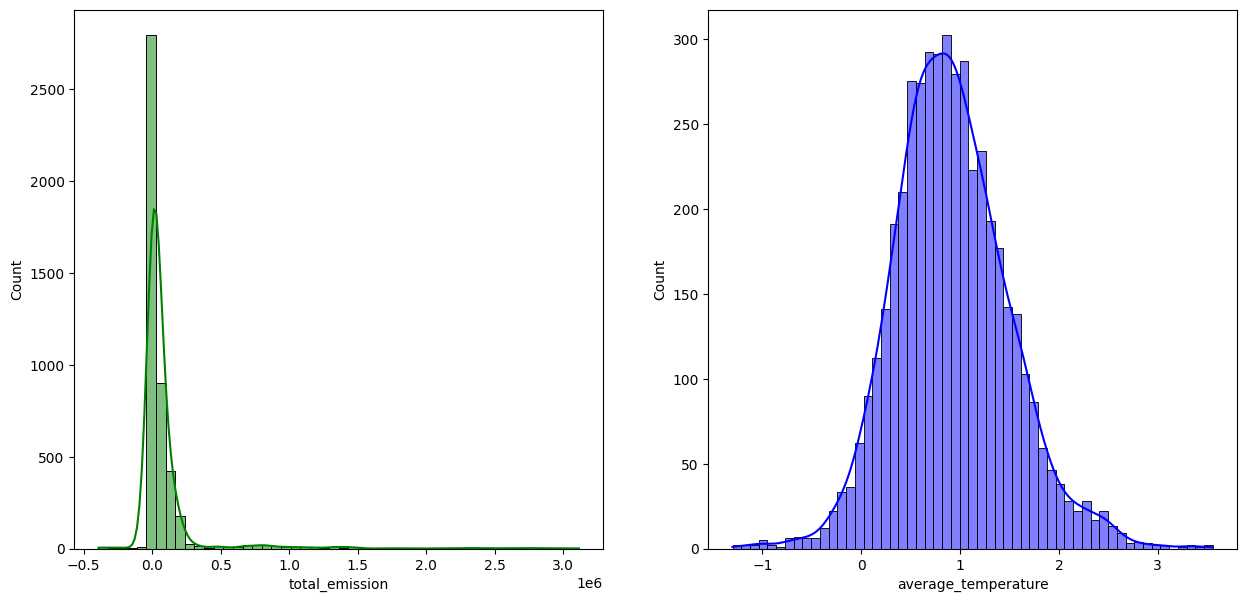

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_emission',bins=50,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_temperature',kde=True,color='b')
plt.show()

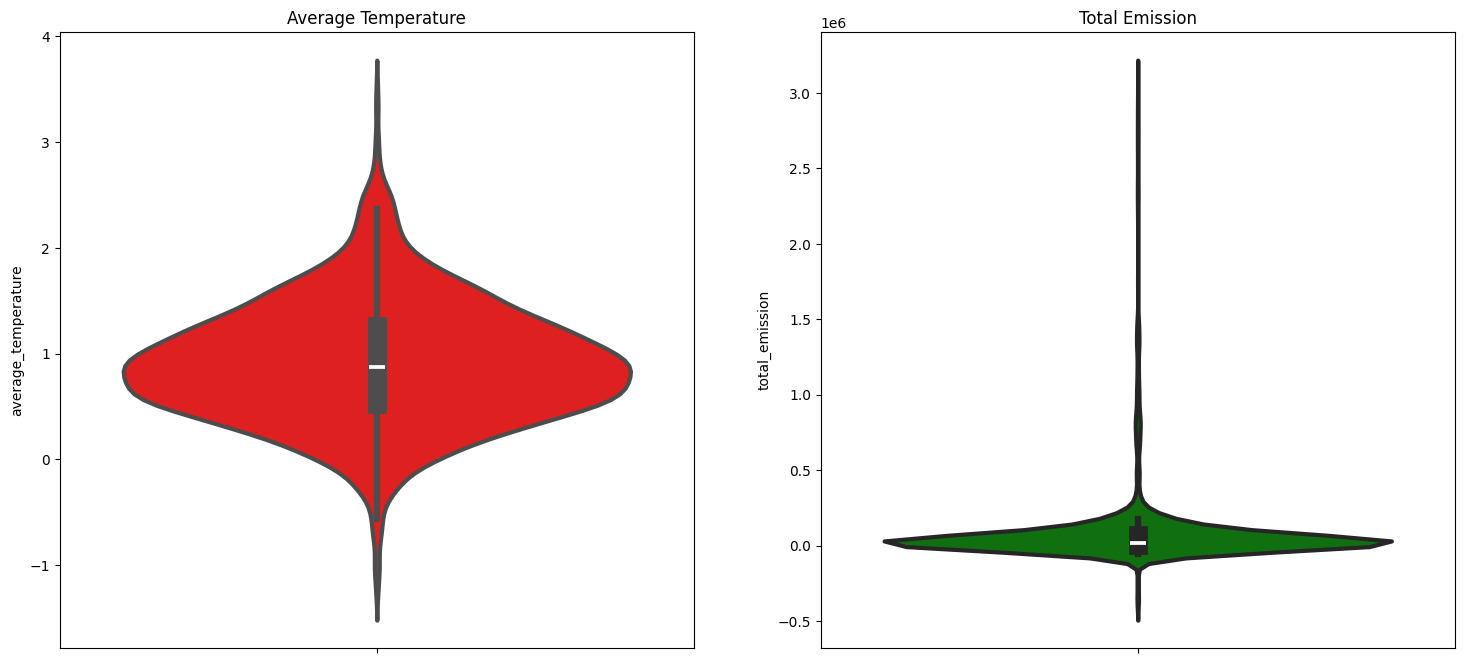

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.title('Average Temperature')
sns.violinplot(y='average_temperature',data=df,color='red',linewidth=3)
plt.subplot(122)
plt.title('Total Emission')
sns.violinplot(y='total_emission',data=df,color='green',linewidth=3)
plt.show()

#### 4.2 Total Global Emission and Average Global Temperature Trends over time

Text(0.5, 1.0, 'Global Warming')

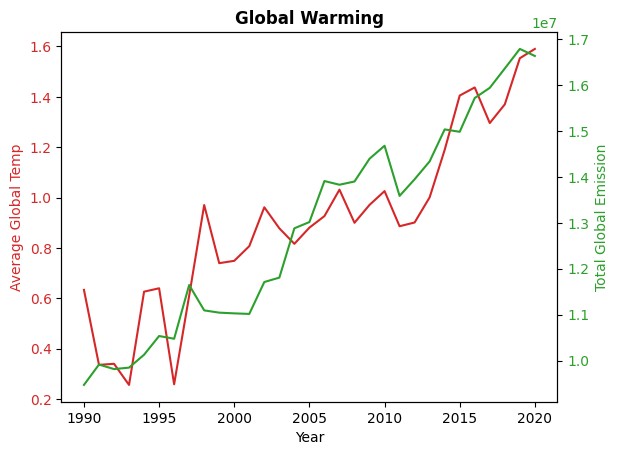

In [21]:
df_year = df.groupby('Year')
avg_temp = df_year.average_temperature.mean()
total_global_emission = df_year.total_emission.sum()
x = avg_temp.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Global Temp', color = color)
ax1.plot(x, avg_temp, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

# Adding Twin Axes to plot global emissions to the right
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Global Emission', color = color)
ax2.plot(x, total_global_emission, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
plt.title('Global Warming', fontweight ="bold")

#### 4.3 Feature Wise Visualization

#### 4.3.1 POPULATION TRENDS OVER TIME 

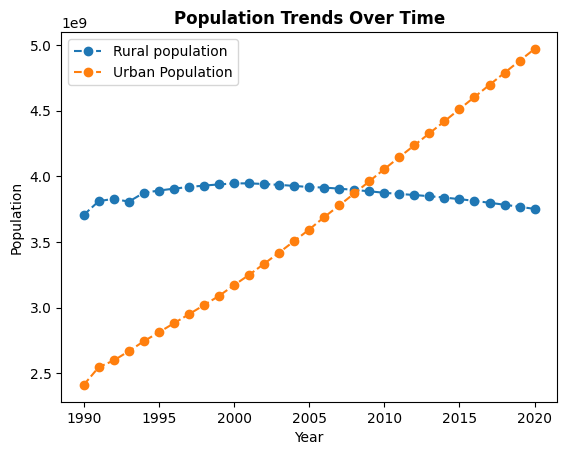

In [22]:
df_year = df.groupby('Year')
df_pop = df_year[['Rural population', 'Urban population']].sum()
df_pop.plot(marker='o', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends Over Time',fontweight="bold")
plt.legend(['Rural population', 'Urban Population'])
plt.show()

#### 4.3.2 VARIOUS EMISSIONS TRENDS OVER TIME 

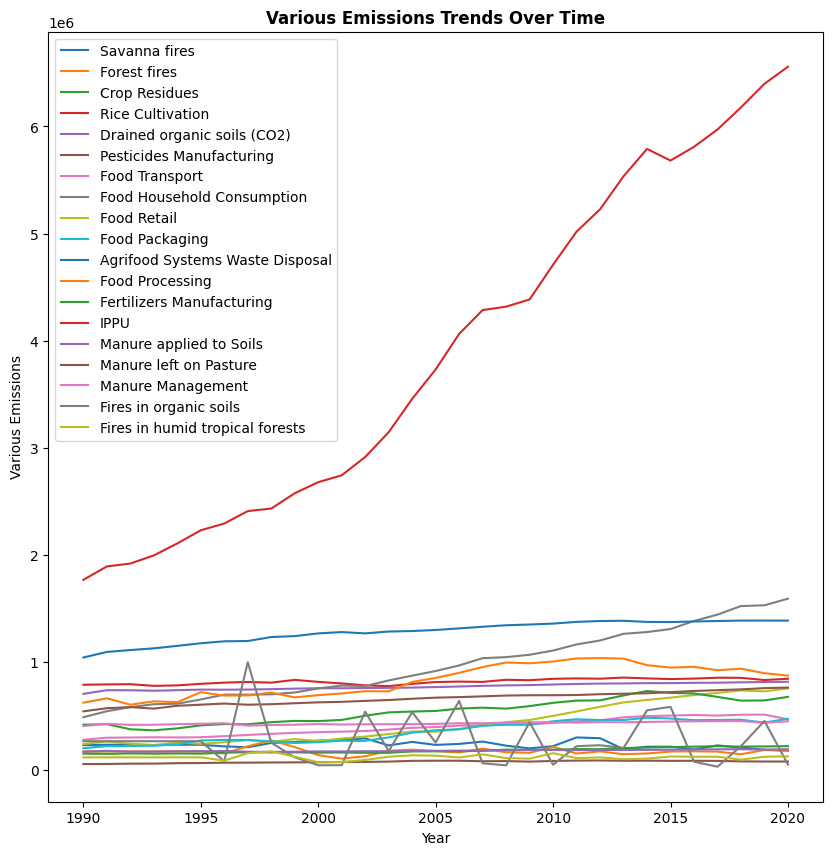

In [23]:
plt.figure(figsize=(10,10))
df_year = df.groupby('Year')
df_pop = df_year[['Savanna fires', 
                  'Forest fires', 
                  'Crop Residues',
                  'Rice Cultivation', 
                  'Drained organic soils (CO2)',
                  'Pesticides Manufacturing', 
                  'Food Transport', 
                  'Food Household Consumption', 
                  'Food Retail', 
                  'Food Packaging',
                  'Agrifood Systems Waste Disposal', 
                  'Food Processing',
                  'Fertilizers Manufacturing', 
                  'IPPU', 
                  'Manure applied to Soils',
                  'Manure left on Pasture', 
                  'Manure Management', 
                  'Fires in organic soils',
                  'Fires in humid tropical forests']].sum()
ax = plt.gca()
df_pop.plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Various Emissions')
plt.title('Various Emissions Trends Over Time',fontweight="bold")
plt.legend()
plt.show()

#### 4.3.3 FEATURES DISTRIBUTION

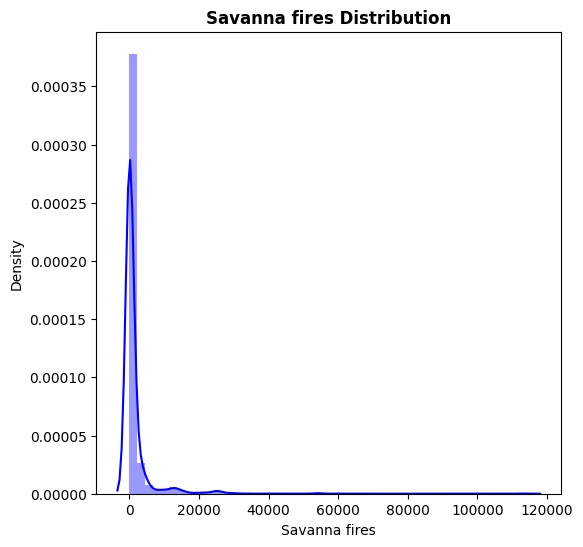

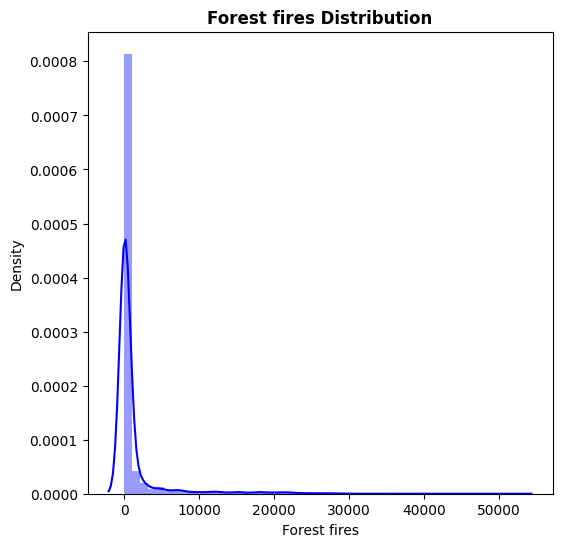

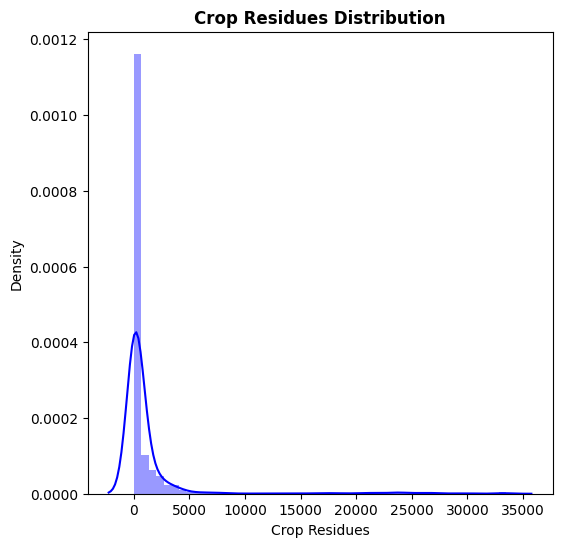

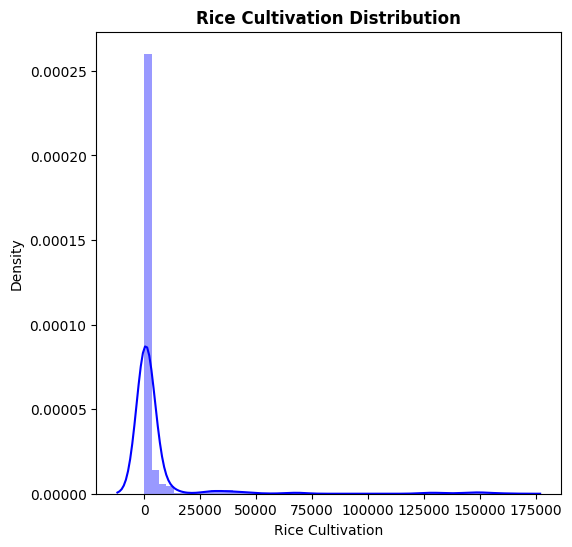

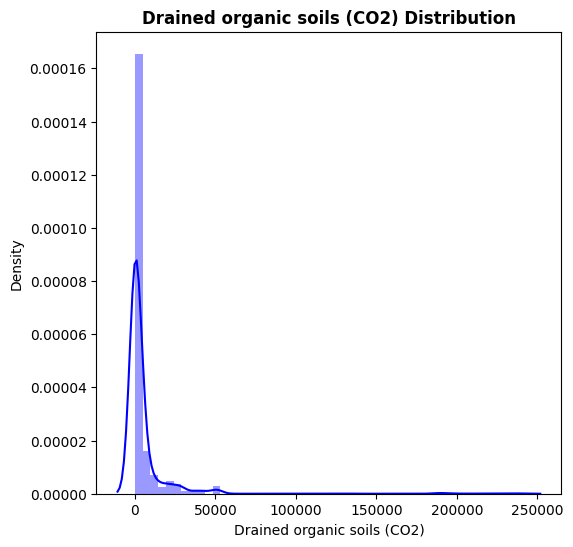

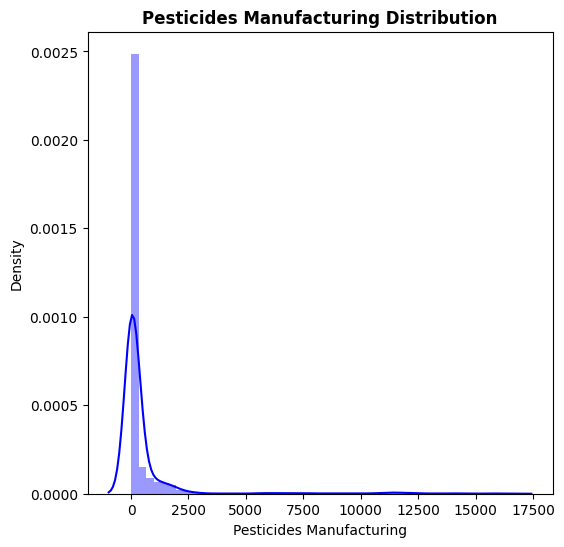

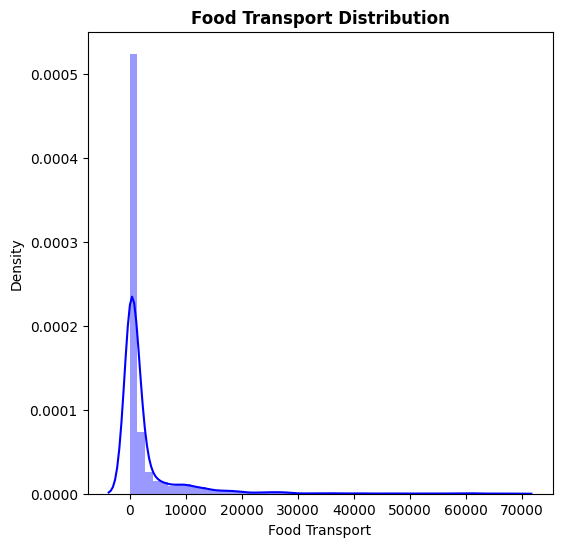

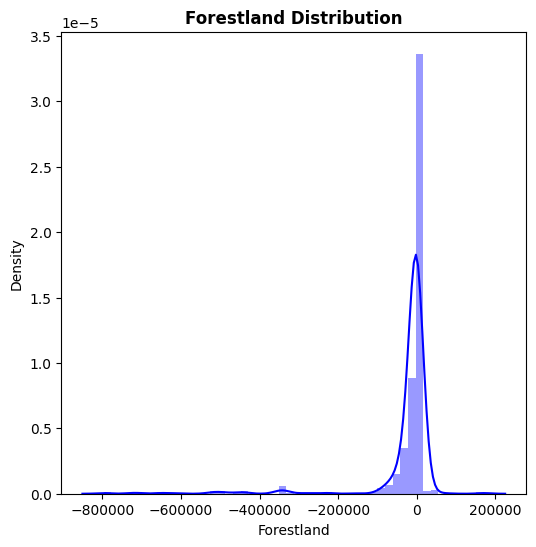

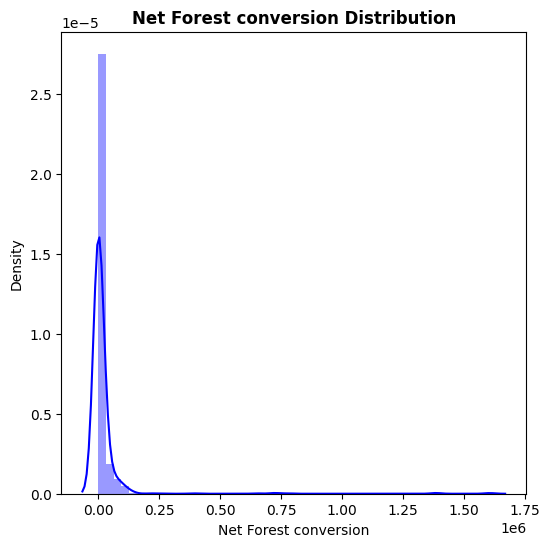

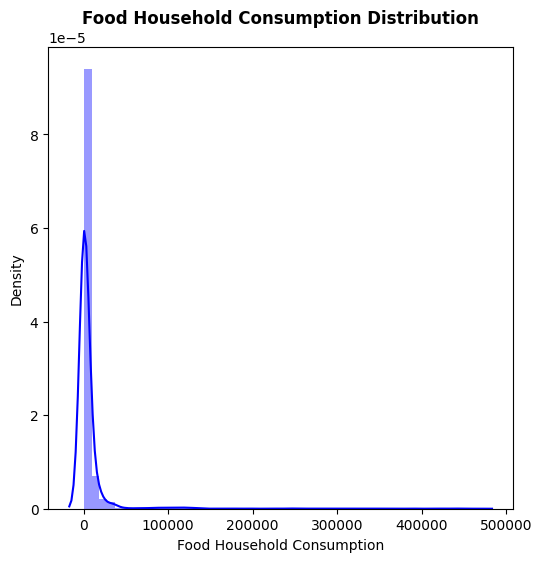

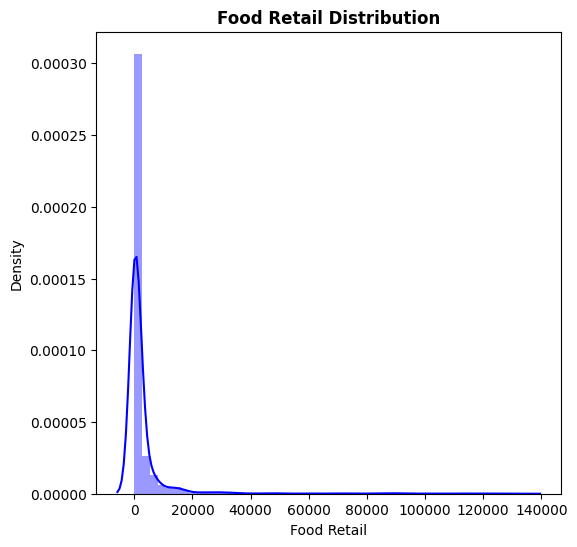

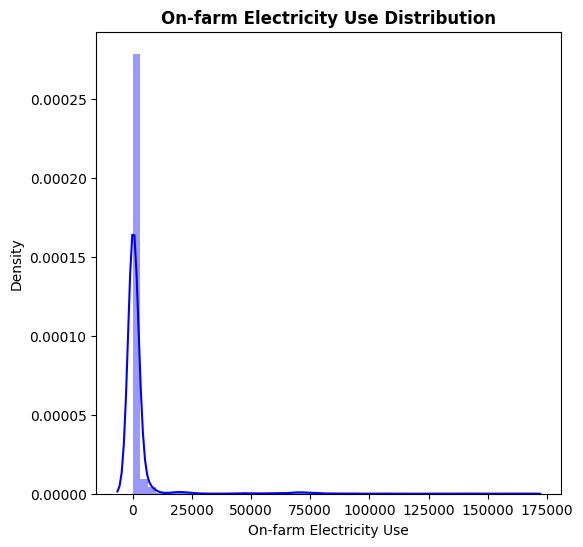

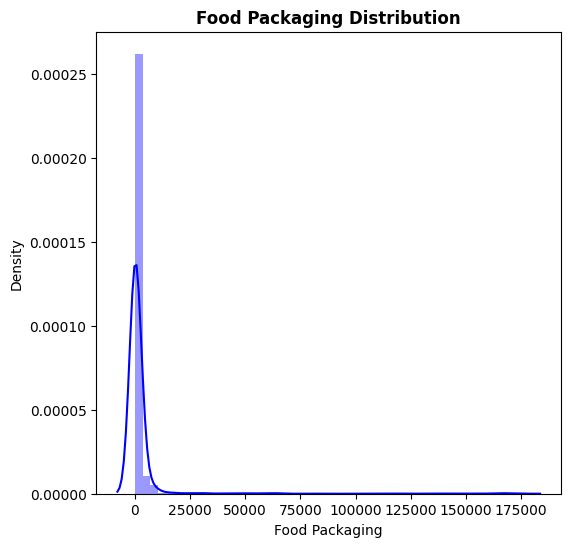

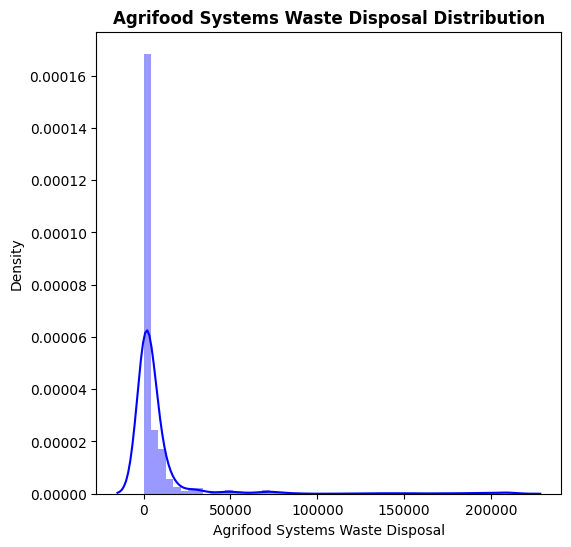

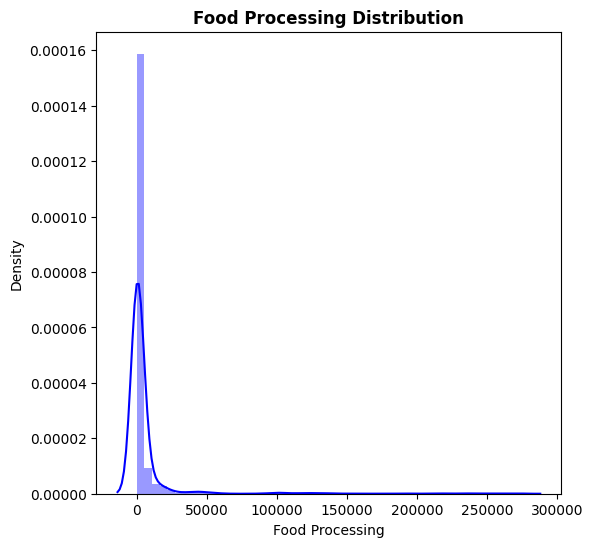

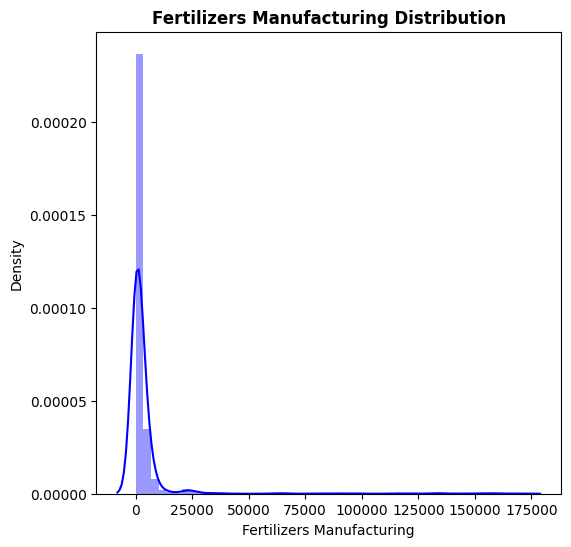

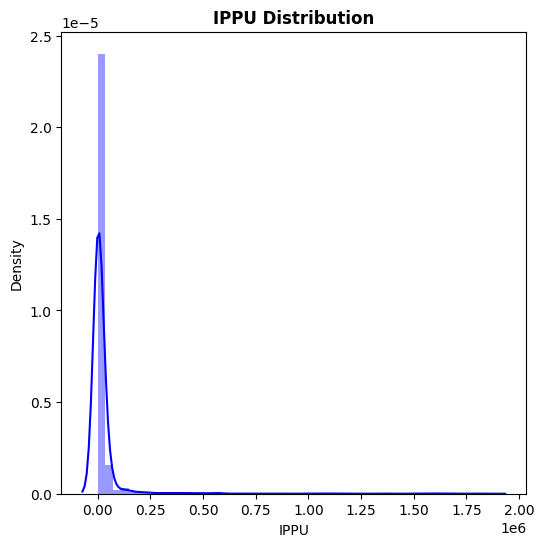

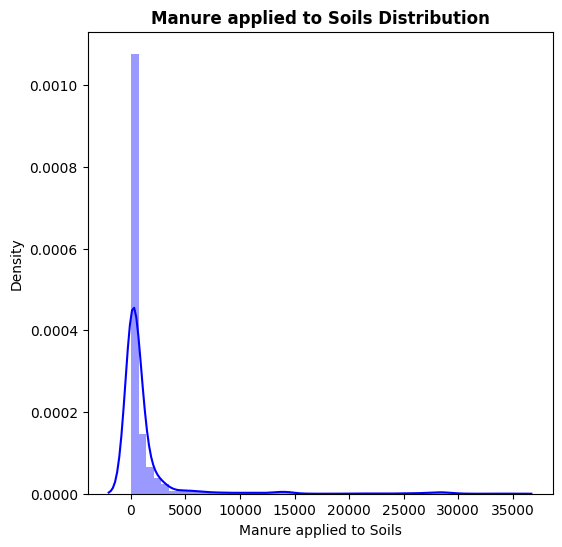

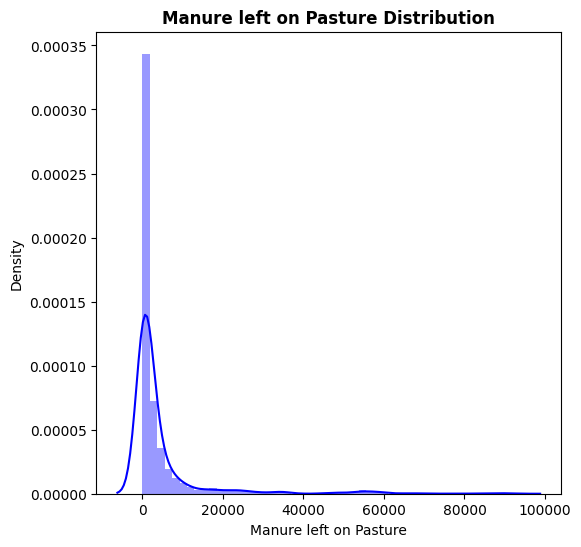

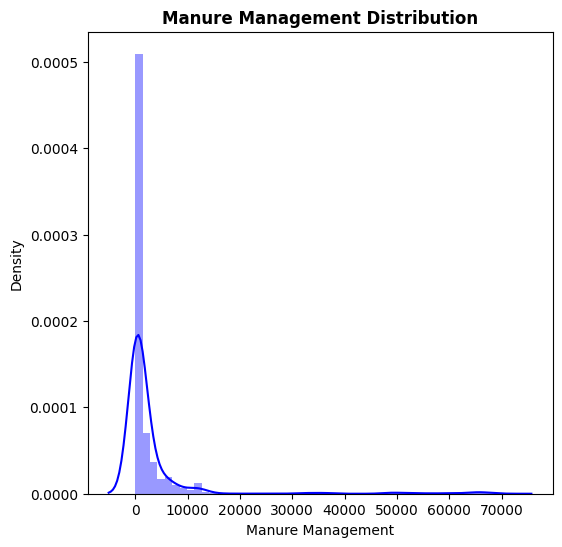

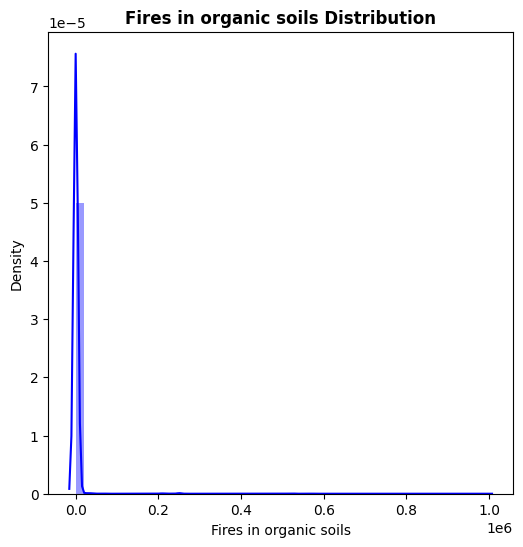

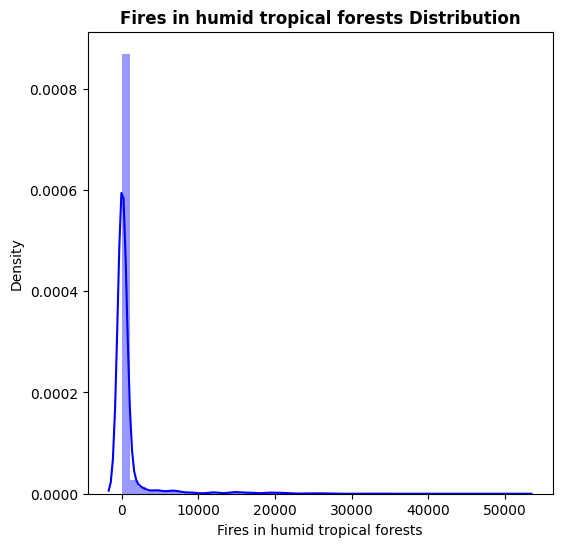

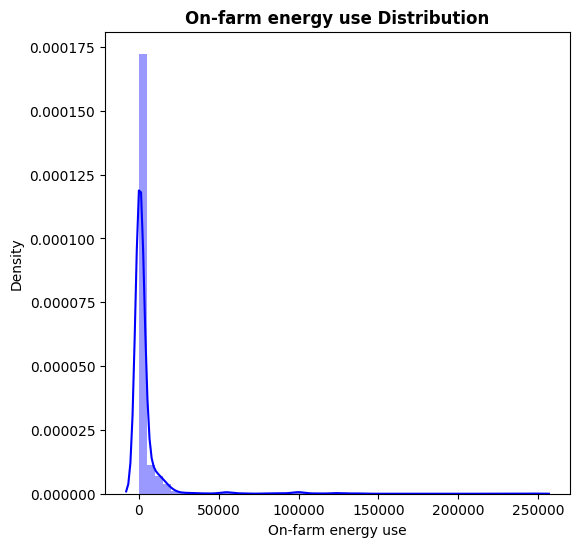

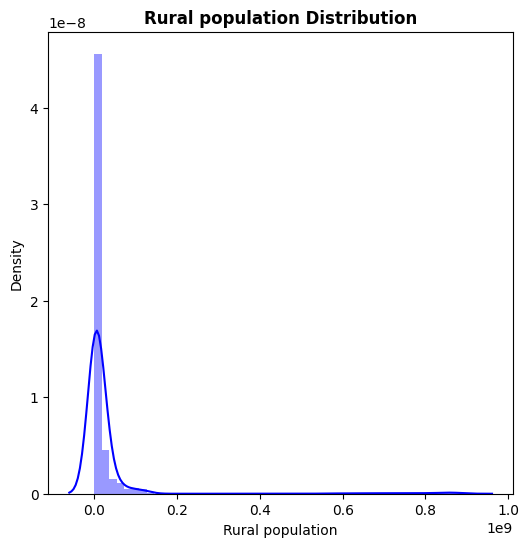

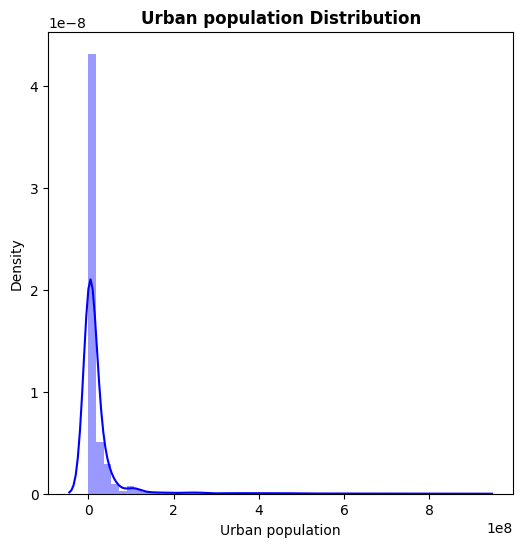

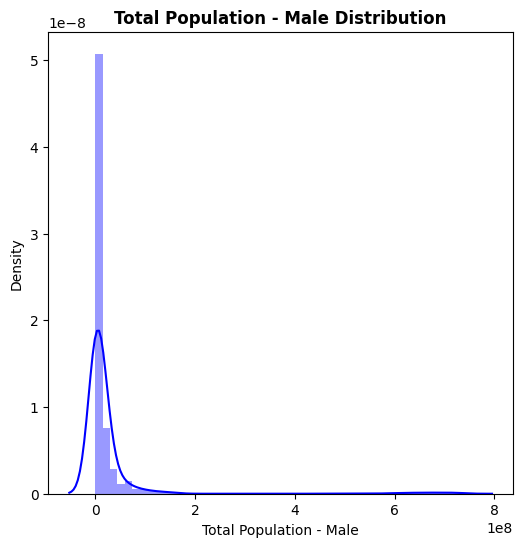

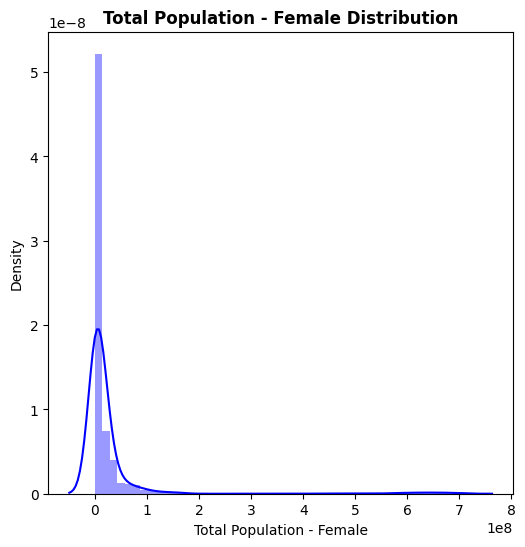

In [24]:
for feature in df.columns[2:-2]:
    plt.figure(figsize = (6,6))
    sns.distplot(df[feature],color = 'blue')
    plt.title(f"{feature} Distribution",fontweight='bold')
    plt.show()

#### 4.3.4 CHECKING OUTLIERS

In [25]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

features = df.columns.tolist()[2:-2] 

def plot_boxplots(area):
    display(Markdown(f"**Outliers Stats for {area}:**"))
    
    fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(30, 20))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.boxplot(data=df[df['Area'] == area], y=feature, ax=axes[i])
        axes[i].set_title(feature)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

area_dropdown = widgets.Dropdown(
    options=df['Area'].unique(),
    description='Select Area:',
    style={'description_width': 'initial'},
    layout={'width': 'max-content'}
)

interact(plot_boxplots, area=area_dropdown)

interactive(children=(Dropdown(description='Select Area:', layout=Layout(width='max-content'), options=('Alban…

<function __main__.plot_boxplots(area)>

``As we have noticed there are few outliers existing in each specific area features, so let just remove them.``

### 5. Outlier Removal

In [26]:
def outlier_removal(data):
    
    """
    This specific function basically remove outliers from each features based on specific area. 
    First of all, it filter the data of one area and find outliers and remove them and then concatenate that data to final data,
    then it repeats these steps again and again for every area.
    """
    
    print("Available features:", data.columns.tolist())
    print(" ")
    categorical_features = data.select_dtypes(include="object").columns.tolist()
    user_input = input("Enter feature names (separated by comma): ").strip()
    print(" ")
    features = [re.sub(r'[^a-zA-Z0-9_]', '', f.strip()) for f in user_input.split(",")]
    final_data = pd.DataFrame(columns=data.columns.tolist())
    
    for area in data['Area'].unique():
        area_data = data[data['Area'] == area]
        for feature in features:
            if (feature not in area_data.columns) or (feature in categorical_features):
                continue
            try: 
                Q1 = area_data[feature].quantile(0.25)
                Q3 = area_data[feature].quantile(0.75)
                IQR = Q3 - Q1
                upper_limit = Q3 + 1.5 * IQR
                lower_limit = Q1 - 1.5 * IQR
                area_data = area_data[(area_data[feature] >= lower_limit) & (area_data[feature] <= upper_limit)]
            except Exception as e:
                print(f"Error processing feature '{feature}' in area '{area}': {e}")
        print(f"{area}: {data[data['Area'] == area].shape[0] - area_data.shape[0]} rows dropped")
        final_data = pd.concat([final_data, area_data], axis=0)
    
    print("***************************************************")
    print(f'Total: {data.shape[0] - final_data.shape[0]} rows dropped.')
    final_data.reset_index(drop=True, inplace=True)
    return final_data

In [27]:
df.shape

(4546, 31)

In [28]:
filtered_df = outlier_removal(df)

Available features: ['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission', 'average_temperature']
 
Enter feature names (separated by comma): 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 

In [29]:
filtered_df.shape

(4227, 31)

### 6. Splitting Data to Features and Target (for further preprocessing)

In [30]:
X = filtered_df.drop(['average_temperature','total_emission'],axis=1)

In [31]:
y = filtered_df.total_emission

In [32]:
X.shape

(4227, 29)

In [33]:
y.shape

(4227,)

### 7. Label_Encoding and Normalization

In [34]:
X.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Albania  1990         5.5561        7.0253        59.2391   
1  Albania  1991         5.5561        7.0253        31.4625   
2  Albania  1992         5.5561        7.0253        29.9373   
3  Albania  1993         5.5561        7.0253        44.0550   
4  Albania  1994         5.5561        7.0253        42.4253   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0           23.5200                     110.5705                       2.0   
1            6.2720                     110.5705                       2.0   
2            1.8816                     110.5705                       2.0   
3            1.0976                     110.5705                       2.0   
4            0.0000                     110.5705                       3.0   

   Food Transport  Forestland  ...  Manure applied to Soils  \
0         46.9645     72.8581  ...                 196.6440   
1         47.9519     72.8581  ...                 194.1851   
2         40.5272     72.8581  ...                 187.3747   
3         57.6592     72.8581  ...                 198.8094   
4         72.4242     72.8581  ...                 260.3013   

   Manure left on Pasture  Manure Management  Fires in organic soils  \
0                383.3071           474.6951                     0.0   
1                394.0694           469.1415                     0.0   
2                400.0541           453.2180                     0.0   
3                426.4171           481.3836                     0.0   
4                546.0098           620.2991                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0            320.8805         2086075.0   
1                              0.0            195.1879         2073348.0   
2                              0.0            163.1332         2033508.0   
3                              0.0            126.8489         1983942.0   
4                              0.0             94.9545         1936056.0   

   Urban population  Total Population - Male  Total Population - Female  
0         1195379.0                1676902.0                  1618163.0  
1         1202083.0                1675168.0                  1626914.0  
2         1207079.0                1670550.0                  1633189.0  
3         1205641.0                1663515.0                  1637195.0  
4         1204539.0                1654796.0                  1639203.0  

[5 rows x 29 columns]

In [35]:
X.shape

(4227, 29)

In [36]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("LabelEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:
P = preprocessor.fit_transform(X)

In [38]:
P.shape

(4227, 29)

In [39]:
X = pd.DataFrame(data=P,columns = X.columns)

In [40]:
X.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
0   0.0   0.0      -0.254797     -0.306622      -0.285925         -0.260913   
1   0.0   1.0      -0.254797     -0.306622      -0.292522         -0.261686   
2   0.0   2.0      -0.254797     -0.306622      -0.292884         -0.261882   
3   0.0   3.0      -0.254797     -0.306622      -0.289531         -0.261917   
4   0.0   4.0      -0.254797     -0.306622      -0.289918         -0.261967   

   Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                    -0.266287                 -0.282670       -0.396609   
1                    -0.266287                 -0.282670       -0.396467   
2                    -0.266287                 -0.282670       -0.397534   
3                    -0.266287                 -0.282670       -0.395072   
4                    -0.266287                 -0.282116       -0.392951   

   Forestland  ...  Manure applied to Soils  Manure left on Pasture  \
0    0.265576  ...                -0.279588               -0.377470   
1    0.265576  ...                -0.280236               -0.376526   
2    0.265576  ...                -0.282028               -0.376001   
3    0.265576  ...                -0.279018               -0.373688   
4    0.265576  ...                -0.262831               -0.363198   

   Manure Management  Fires in organic soils  Fires in humid tropical forests  \
0          -0.277782               -0.067985                        -0.251936   
1          -0.278374               -0.067985                        -0.251936   
2          -0.280068               -0.067985                        -0.251936   
3          -0.277071               -0.067985                        -0.251936   
4          -0.262286               -0.067985                        -0.251936   

   On-farm energy use  Rural population  Urban population  \
0           -0.255666         -0.226930         -0.298854   
1           -0.264102         -0.227042         -0.298773   
2           -0.266254         -0.227395         -0.298713   
3           -0.268689         -0.227833         -0.298730   
4           -0.270830         -0.228257         -0.298743   

   Total Population - Male  Total Population - Female  
0                -0.263833                  -0.272589  
1                -0.263851                  -0.272494  
2                -0.263899                  -0.272426  
3                -0.263972                  -0.272382  
4                -0.264062                  -0.272360  

[5 rows x 29 columns]

In [41]:
# saving preprocessor model
with open('preprocessor.p', 'wb') as file:
    pickle.dump(preprocessor, file)

### 8. Features Selection

- Now, we can do some features selection on numeric features based on constant feature check, feature with high correlation with each other check, feature with low correlation with output check.

In [42]:
fs = Features_Selection(X,y,figsize=(40,40))

#### 8.1 Features Correlational Matrix

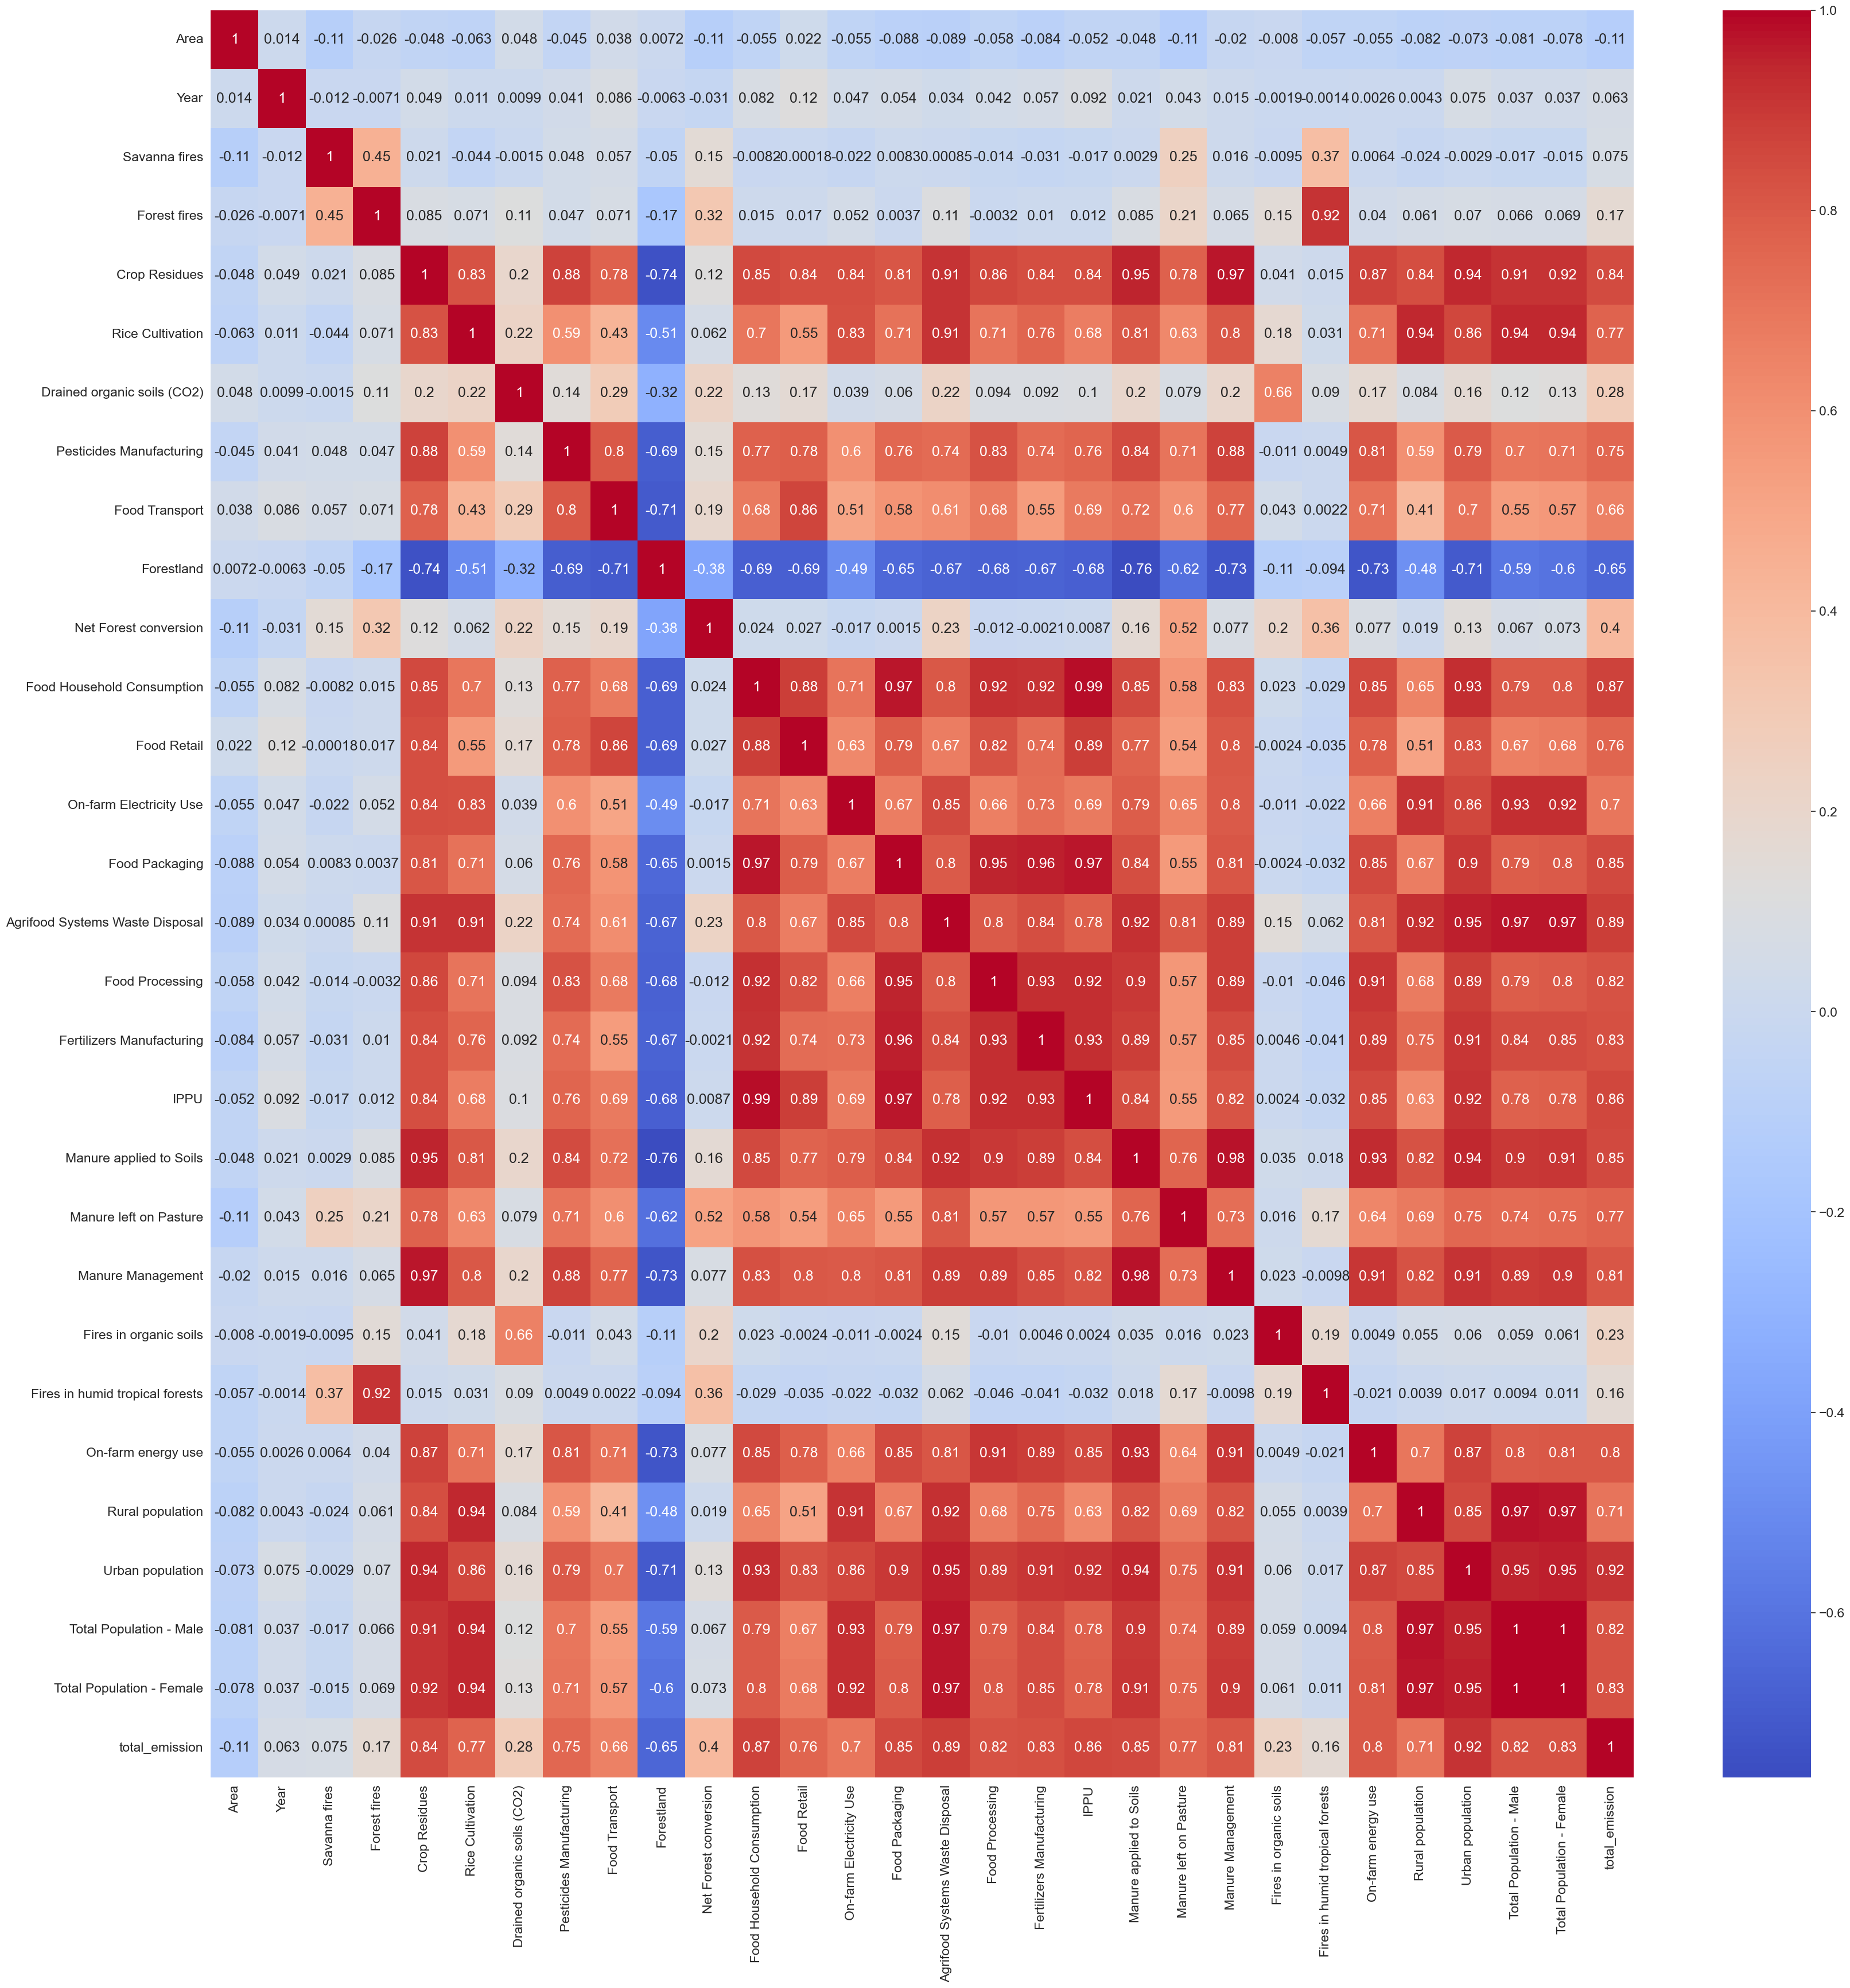

In [43]:
fs.corr_matrix_visual()
plt.show()

#### 8.2 Constant Features Selection

In [44]:
fs.const_features_selection(0.05)

Total Variable Features = 29
Total Constant Features = 0

All features have variance of more than 0.05.


#### 8.3 Filtering Features having strong Correlation with each other

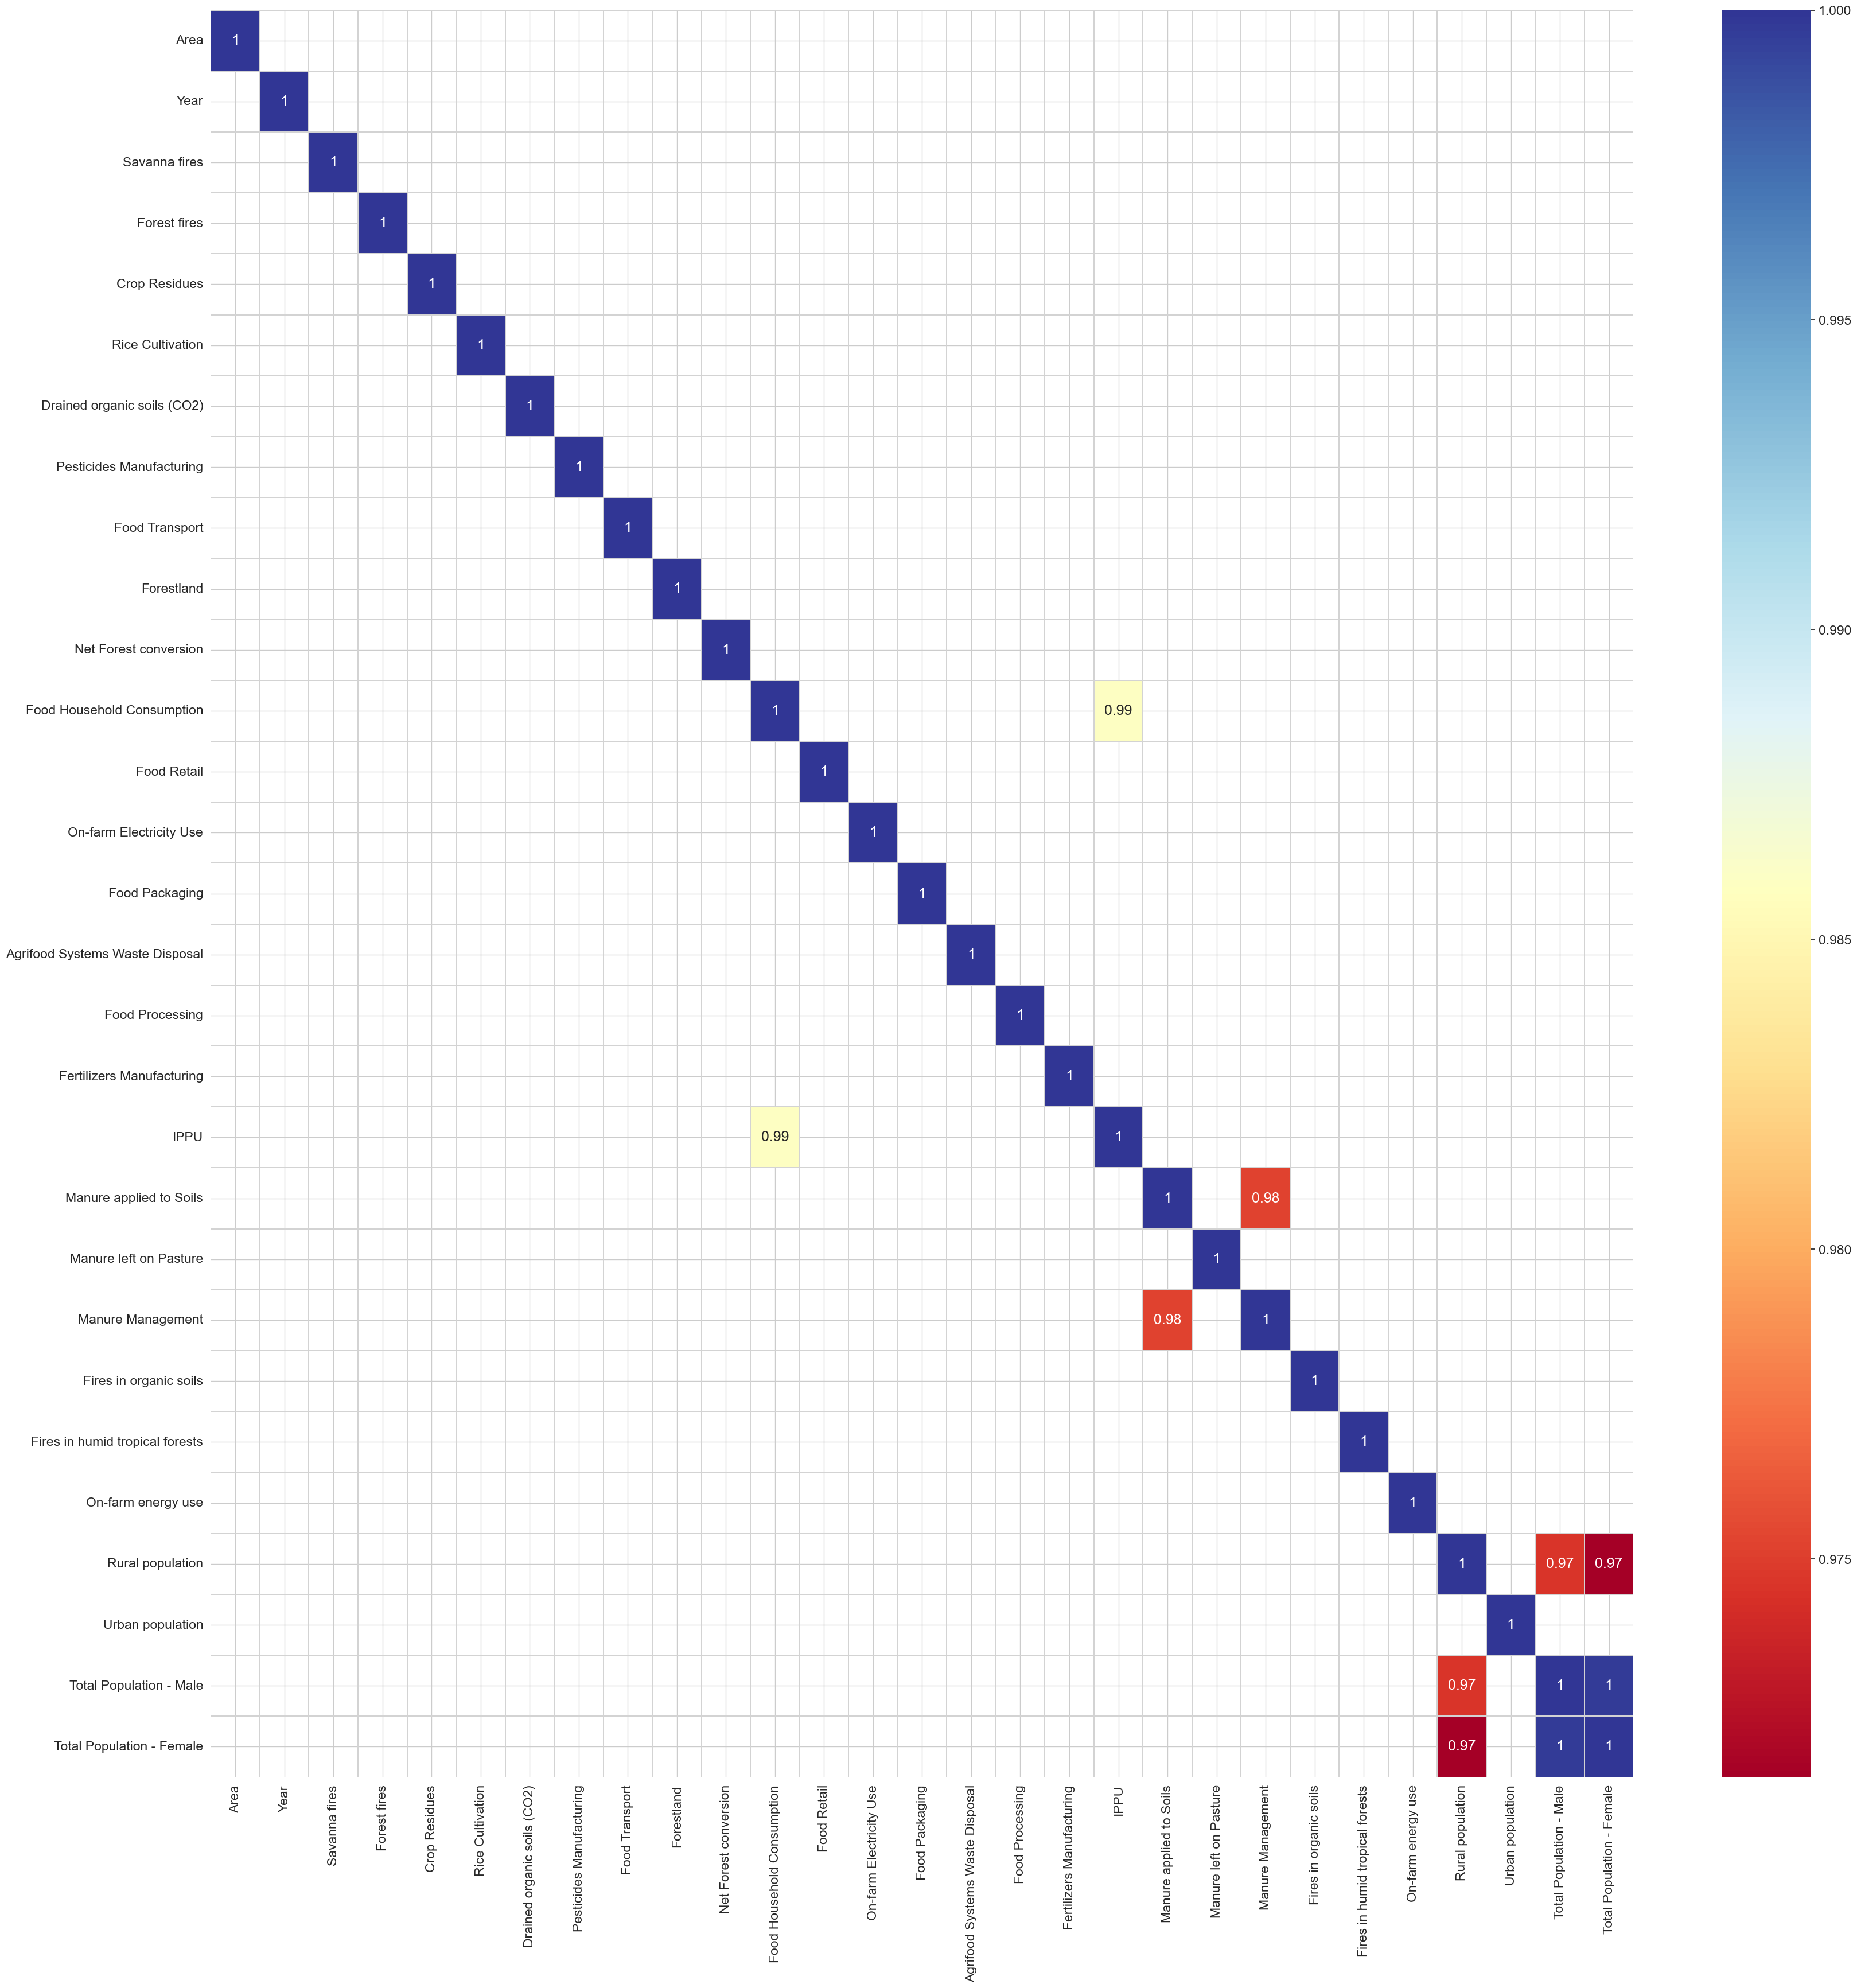

In [45]:
fs.features_corr_visual_filter(0.97)

In [46]:
fs.features_corr_filter(0.97)

{'Total Population - Male', 'Manure Management', 'Total Population - Female', 'IPPU'}
Do you want to drop the features with correlation above threshold 0.97 ? (y/n) y
Features Dropped!


#### 8.4 Filtering Features having less Correlation with Output

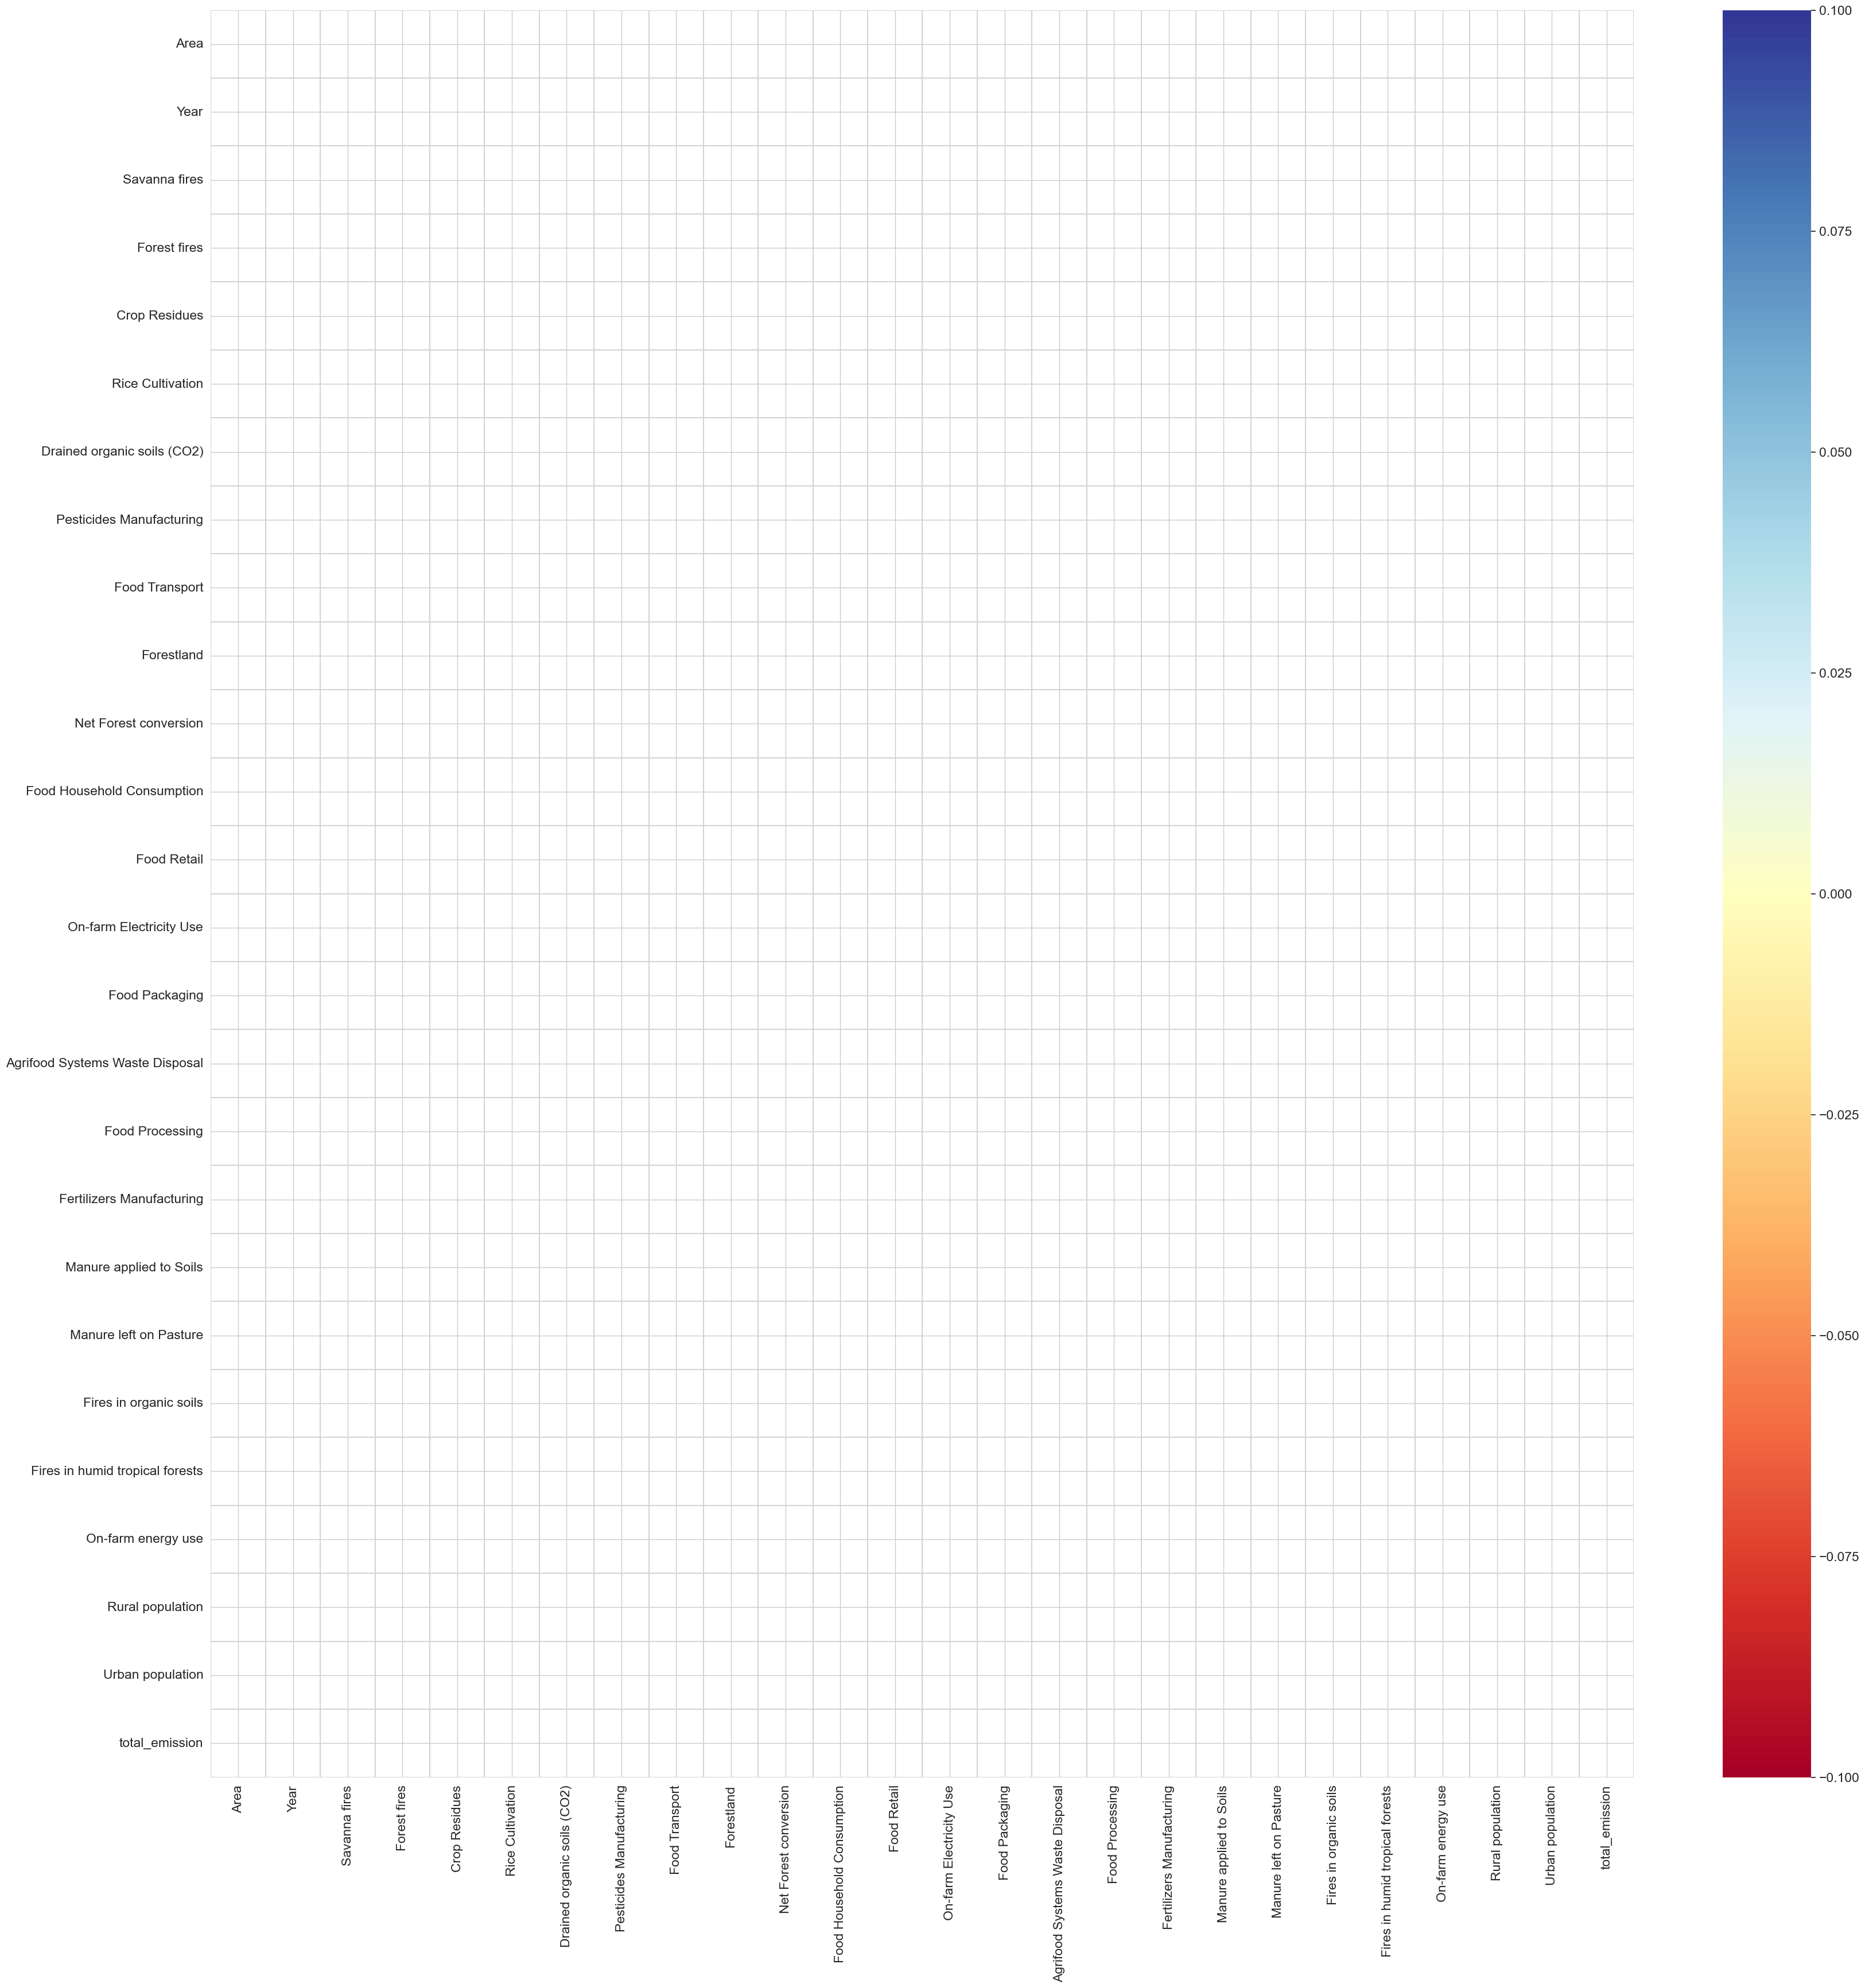

In [47]:
fs.features_corr_with_output_visual_filter(0.0)

In [48]:
fs.features_corr_with_output_filter(0.05)

All features have correlation of more than 0.05 with output.


### 9. Saving Preprocessed Data

In [49]:
preprocessed = pd.concat([X,y],axis =1)

In [50]:
preprocessed.shape

(4227, 26)

In [51]:
preprocessed.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
0   0.0   0.0      -0.254797     -0.306622      -0.285925         -0.260913   
1   0.0   1.0      -0.254797     -0.306622      -0.292522         -0.261686   
2   0.0   2.0      -0.254797     -0.306622      -0.292884         -0.261882   
3   0.0   3.0      -0.254797     -0.306622      -0.289531         -0.261917   
4   0.0   4.0      -0.254797     -0.306622      -0.289918         -0.261967   

   Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                    -0.266287                 -0.282670       -0.396609   
1                    -0.266287                 -0.282670       -0.396467   
2                    -0.266287                 -0.282670       -0.397534   
3                    -0.266287                 -0.282670       -0.395072   
4                    -0.266287                 -0.282116       -0.392951   

   Forestland  ...  Food Processing  Fertilizers Manufacturing  \
0    0.265576  ...         -0.23004                  -0.234906   
1    0.265576  ...         -0.23004                  -0.063810   
2    0.265576  ...         -0.23004                  -0.063810   
3    0.265576  ...         -0.23004                  -0.063810   
4    0.265576  ...         -0.23004                  -0.063810   

   Manure applied to Soils  Manure left on Pasture  Fires in organic soils  \
0                -0.279588               -0.377470               -0.067985   
1                -0.280236               -0.376526               -0.067985   
2                -0.282028               -0.376001               -0.067985   
3                -0.279018               -0.373688               -0.067985   
4                -0.262831               -0.363198               -0.067985   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                        -0.251936           -0.255666         -0.226930   
1                        -0.251936           -0.264102         -0.227042   
2                        -0.251936           -0.266254         -0.227395   
3                        -0.251936           -0.268689         -0.227833   
4                        -0.251936           -0.270830         -0.228257   

   Urban population  total_emission  
0         -0.298854     3475.291240  
1         -0.298773     5680.135772  
2         -0.298713     5221.131572  
3         -0.298730     5316.973272  
4         -0.298743     5564.287672  

[5 rows x 26 columns]

In [52]:
preprocessed.to_csv('preprocessed.csv',index = False)